### Read one final image to know what is each band

In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
import matplotlib.dates as mdates
import rasterio


In [182]:
# Labeling bands

band_labels = [
        '3_bands_model_chl_conc',
        'pixel_classif_flags',
        'rtoa_B1', 
        'rtoa_B2',
        'rtoa_B3',
        'rtoa_B4',
        'rtoa_B5',
        'rtoa_B6',
        'rtoa_B7',
        'rtoa_B8',
        'rtoa_B8A',
        'rtoa_B9',
        'rtoa_B10',
        'rtoa_B11',
        'rtoa_B12',
        'rpath_B1',
        'rpath_B2',
        'rpath_B3',
        'rpath_B4',
        'rpath_B5',
        'rpath_B6',
        'rpath_B7',
        'rpath_B8A',
        'rrs_B1',
        'rrs_B2',
        'rrs_B3',
        'rrs_B4',
        'rrs_B5',
        'rrs_B6',
        'rrs_B7',
        'rrs_B8A',
        'rhown_B1',
        'rhown_B2',
        'rhown_B3',
        'rhown_B4',
        'rhown_B5',
        'rhown_B6',
        'iop_apig',
        'iop_adet',
        'iop_agelb',
        'iop_bpart',
        'iop_bwit',
        'iop_adg',
        'iop_atot',
        'iop_btot',
        'kd489',
        'kdmin',
        'kd_z90max',
        'conc_tsm',
        'conc_chl',
        'unc_apig',
        'unc_adet',
        'unc_agelb',
        'unc_bpart',
        'unc_bwit',
        'unc_adg',
        'unc_atot',
        'unc_btot',
        'unc_tsm',
        'unc_chl',
        'unc_kd489',
        'unc_kdmin',
        'unc_kd_z90max',
        'c2rcc_flags',
        'MCI',
        'empirical_2_bands_equation1',
        'empirical_2_bands_equation2',
        'empirical_3_bands_equation1',
        'empirical_3_bands_equation3'
    ]
# Create a list with indices of each band label
band_indices = dict(zip(band_labels, range(1, len(band_labels)+1)))

#### Análise de uma imagem e suas bandas

In [4]:
# Open the .tif image file
with rasterio.open('tif_files_final/S2_MSIL1C_20221007T104931_samp_mask_C2RCC_mathbands.tif') as dataset:
    # # Get the number of bands in the image
    # num_bands = dataset.count
    
    # # Iterate over each band
    # for band in range(1, num_bands + 1):
    #     # Read the band data
    #     band_data = dataset.read(band)
        
    #     # Get the band name
    #     band_name = band_labels[band - 1]
        
    #     # Plot the band data
    #     plt.imshow(band_data, cmap='gray')
    #     plt.title(f'Band {band}: {band_name}')
    #     plt.colorbar()
    #     plt.show()

    print(dataset.read(38).mean())
    

0.059054542


### Análise das bandas e da variação da radiância após a correção

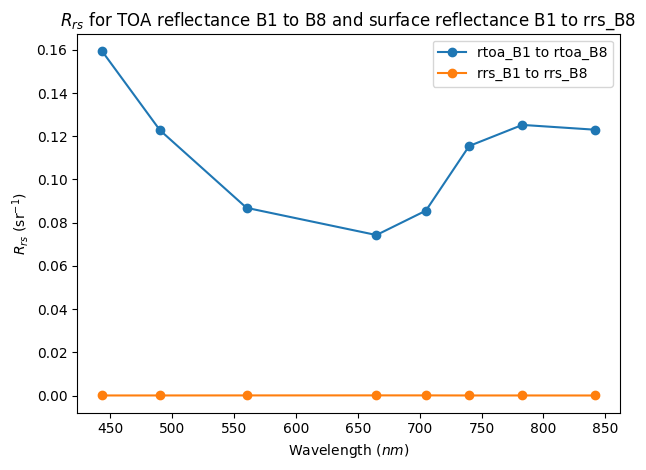

In [5]:
# Open the geotiff file
with rasterio.open('S2_MSIL1C_20230118T110401_samp_mask_C2RCC_mathbands.tif') as dataset:
    # Read the bands B1, B2, B3, B4, B5, B6, B7, and B8
    band1 = dataset.read(band_indices['rtoa_B1'])
    band2 = dataset.read(band_indices['rtoa_B2'])
    band3 = dataset.read(band_indices['rtoa_B3'])
    band4 = dataset.read(band_indices['rtoa_B4'])
    band5 = dataset.read(band_indices['rtoa_B5'])
    band6 = dataset.read(band_indices['rtoa_B6'])
    band7 = dataset.read(band_indices['rtoa_B7'])
    band8 = dataset.read(band_indices['rtoa_B8'])

    # Calculate the mean of pixel values for each band
    mean_band1 = band1.mean()
    mean_band2 = band2.mean()
    mean_band3 = band3.mean()
    mean_band4 = band4.mean()
    mean_band5 = band5.mean()
    mean_band6 = band6.mean()
    mean_band7 = band7.mean()
    mean_band8 = band8.mean()

    # Plot the mean values
    wavelengths = [443, 490, 560, 665, 705, 740, 783, 842]
    mean_values = [mean_band1, mean_band2, mean_band3, mean_band4, mean_band5, mean_band6, mean_band7, mean_band8]

    plt.plot(wavelengths, mean_values, marker='o', label='rtoa_B1 to rtoa_B8')
    
    # Read the bands rrs_B1 to rrs_B8
    rrs_band1 = dataset.read(band_indices['rrs_B1'])
    rrs_band2 = dataset.read(band_indices['rrs_B2'])
    rrs_band3 = dataset.read(band_indices['rrs_B3'])
    rrs_band4 = dataset.read(band_indices['rrs_B4'])
    rrs_band5 = dataset.read(band_indices['rrs_B5'])
    rrs_band6 = dataset.read(band_indices['rrs_B6'])
    rrs_band7 = dataset.read(band_indices['rrs_B7'])
    rrs_band8 = dataset.read(band_indices['rrs_B8A'])

    # Calculate the mean of pixel values for each rrs band
    mean_rrs_band1 = rrs_band1.mean()
    mean_rrs_band2 = rrs_band2.mean()
    mean_rrs_band3 = rrs_band3.mean()
    mean_rrs_band4 = rrs_band4.mean()
    mean_rrs_band5 = rrs_band5.mean()
    mean_rrs_band6 = rrs_band6.mean()
    mean_rrs_band7 = rrs_band7.mean()
    mean_rrs_band8 = rrs_band8.mean()

    # Plot the mean values for rrs bands
    mean_rrs_values = [mean_rrs_band1, mean_rrs_band2, mean_rrs_band3, mean_rrs_band4, mean_rrs_band5, mean_rrs_band6, mean_rrs_band7, mean_rrs_band8]
    
    plt.plot(wavelengths, mean_rrs_values, marker='o', label='rrs_B1 to rrs_B8')

    # # Read the bands rrs_B1 to rrs_B8
    # rrs_band1 = dataset.read(band_indices['rpath_B1'])
    # rrs_band2 = dataset.read(band_indices['rpath_B2'])
    # rrs_band3 = dataset.read(band_indices['rpath_B3'])
    # rrs_band4 = dataset.read(band_indices['rpath_B4'])
    # rrs_band5 = dataset.read(band_indices['rpath_B5'])
    # rrs_band6 = dataset.read(band_indices['rpath_B6'])
    # rrs_band7 = dataset.read(band_indices['rpath_B7'])
    # rrs_band8 = dataset.read(band_indices['rpath_B8A'])

    # # Calculate the mean of pixel values for each rrs band
    # mean_rpath_band1 = rrs_band1.mean()
    # mean_rpath_band2 = rrs_band2.mean()
    # mean_rpath_band3 = rrs_band3.mean()
    # mean_rpath_band4 = rrs_band4.mean()
    # mean_rpath_band5 = rrs_band5.mean()
    # mean_rpath_band6 = rrs_band6.mean()
    # mean_rpath_band7 = rrs_band7.mean()
    # mean_rpath_band8 = rrs_band8.mean()

    # # Plot the mean values for rrs bands
    # mean_rpath_values = [mean_rpath_band1, mean_rpath_band2, mean_rpath_band3, mean_rpath_band4, mean_rpath_band5, mean_rpath_band6, mean_rpath_band7, mean_rpath_band8]
    
    # plt.plot(wavelengths, mean_rpath_values, marker='o', label='rpath_B1 to rpath_B8')
    

    plt.xlabel('Wavelength ($nm$)')
    plt.ylabel('$R_{rs}$ (sr$^{-1}$)')
    plt.title('$R_{rs}$ for TOA reflectance B1 to B8 and surface reflectance B1 to rrs_B8')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Data processing

### Load and cleaning data

In [5]:
import pandas as pd

# Read the Excel file
excel_file = pd.ExcelFile('results_consolidate_for_pandas.xlsx')

# Get the names of all tabs in the Excel file
sheet_names = excel_file.sheet_names

# Create an empty dictionary to store the dataframes
dataframes = {}

# Iterate over each tab
for sheet_name in sheet_names:
    # Read the tab as a dataframe
    df = excel_file.parse(sheet_name)
    
    # Store the dataframe in the dictionary
    dataframes[sheet_name] = df

# Access the dataframes by their tab names
for sheet_name, df in dataframes.items():
    print(f"Dataframe for tab '{sheet_name}':")
    display(df)
    print()


Dataframe for tab 'results_initial':


Date  windows5x5_kd_z90max_mean  \
0  2022-10-07 10:49:31                   1.206965   
1  2022-10-22 10:50:09                   4.918787   
2  2022-11-01 10:51:09                   2.298946   
3  2022-11-04 11:01:29                   0.000000   
4  2023-01-18 11:04:01                   0.811337   
5  2023-02-07 11:02:21                   1.181622   
6  2023-02-09 10:51:59                        NaN   
7  2023-02-14 10:51:41                   3.099400   
8  2023-02-27 11:00:11                   0.857706   
9  2023-04-03 10:56:29                   1.425691   
10 2023-04-05 10:50:31                   7.666250   
11 2023-04-08 10:56:21                   2.594944   
12 2023-05-03 10:56:19                   6.349600   
13 2023-05-20 10:46:29                  10.982323   
14 2023-05-25 10:50:31                  18.878336   
15 2023-05-28 10:56:21                   3.948030   
16 2023-05-30 10:46:29                        NaN   
17 2023-06-02 10:56:29                   0.000000   
18 2023-06-04 10:46:21                  13.156485   
19 2023-06-07 10:56:21                   5.349170   
20 2023-06-14 10:50:31                  10.162378   
21 2023-08-21 10:56:29                   3.930713   
22 2023-09-02 10:46:31                  22.403719   
23 2023-09-07 10:46:29                  22.460041   
24 2023-09-10 10:56:29                   1.994525   
25 2023-09-15 10:57:01                   2.219262   
26 2023-09-25 10:58:01                   1.526349   

    windows5x5_3_bands_model_chl_conc_mean  \
0                                12.847613   
1                                 6.138085   
2                                 8.155785   
3                                 0.000000   
4                                18.216927   
5                                12.577086   
6                                      NaN   
7                                 6.484349   
8                                18.584301   
9                                12.075270   
10                                3.653183   
11                                7.328654   
12                                4.787822   
13                                2.642529   
14                                2.900240   
15                                7.130334   
16                                     NaN   
17                                0.000000   
18                                2.630239   
19                                5.666101   
20                                3.268753   
21                                6.254012   
22                                3.442007   
23                                3.090903   
24                                8.820812   
25                               10.035409   
26                               10.743733   

    windows5x5_empirical_2_bands_equation1_mean  \
0                                     22.033922   
1                                      8.341957   
2                                     14.995783   
3                                      0.000000   
4                                     29.984156   
5                                     21.283950   
6                                           NaN   
7                                     11.885307   
8                                     29.296751   
9                                     20.713058   
10                                     4.080029   
11                                    10.607657   
12                                     5.008048   
13                                     6.219435   
14                                     3.189835   
15                                     8.095046   
16                                          NaN   
17                                     0.000000   
18                                     5.725275   
19                                     6.541976   
20                                     5.814371   
21                                     7.929576   
22                                     2.646956   
23                  


Dataframe for tab 'results_final':


Date  conc_chl_mean_windows_3x3  conc_chl_sigma_windows_3x3  \
0  2022-10-07 10:49:31                  11.363131                    1.194454   
1  2022-10-22 10:50:09                        NaN                         NaN   
2  2022-11-01 10:51:09                   9.471119                    2.557038   
3  2022-11-04 11:01:29                        NaN                    0.000000   
4  2023-01-18 11:04:01                   5.915650                    4.918062   
5  2023-02-07 11:02:21                  11.409929                    1.973134   
6  2023-02-09 10:51:59                        NaN                         NaN   
7  2023-02-14 10:51:41                   5.278747                    2.397119   
8  2023-02-27 11:00:11                   6.899830                    2.421804   
9  2023-04-03 10:56:29                  13.913920                    3.389864   
10 2023-04-05 10:50:31                   1.681173                    0.369453   
11 2023-04-08 10:56:21                   8.845940                    5.476615   
12 2023-05-03 10:56:19                        NaN                         NaN   
13 2023-05-20 10:46:29                   0.809154                    0.209672   
14 2023-05-25 10:50:31                   0.665112                    0.144003   
15 2023-05-30 10:46:29                   6.164752                    3.611279   
16 2023-05-28 10:56:21                        NaN                         NaN   
17 2023-06-02 10:56:29                  16.235210                    1.877222   
18 2023-06-04 10:46:21                   0.750066                    0.134685   
19 2023-06-07 10:56:21                   6.508852                    2.893099   
20 2023-06-14 10:50:31                   0.730937                    0.176955   
21 2023-08-21 10:56:29                   5.423819                    1.116618   
22 2023-09-02 10:46:31                   0.635112                    0.349202   
23 2023-09-07 10:46:29                   0.534971                    0.282588   
24 2023-09-10 10:56:29                   9.208801                    1.819772   
25 2023-09-15 10:57:01                   9.119094                    2.814362   
26 2023-09-25 10:58:01                        NaN                         NaN   

    conc_chl_mean_windows_5x5  conc_chl_sigma_windows_5x5  conc_chl_mean  \
0                   11.394294                    2.075915        10.0543   
1                         NaN                         NaN         8.9381   
2                    9.333033                    4.237271         6.9454   
3                   13.798728                    2.446890         7.9442   
4                    6.500003                    5.882575         5.8767   
5                   11.999173                    3.076847        12.0182   
6                         NaN                         NaN            NaN   
7                    4.430862                    2.393104         2.8740   
8                    7.112814                    3.282846         8.8938   
9                   13.319674                    2.930308        10.2803   
10                   2.109381                    1.056433         2.0556   
11                   9.166418                    6.397438         7.9593   
12                        NaN                         NaN            NaN   
13                   0.779681                    0.220284         0.6171   
14                   0.651485                    0.120573         0.4611   
15                   5.942648                    4.397751         7.4886   
16                        NaN                         NaN            NaN   
17                  15.742447                    3.425295        10.5732   
18                   0.705684                    0.214326         0.6573   
19                   5.118840                    3.144121         6.2443   
20                   0.708931                    0.187503         0.7257   
21                   6.108286                    3.236762         7.0140   
2


Dataframe for tab 'results_validation':


Date  conc_chl_mean_windows_3x3  conc_chl_sigma_windows_3x3  \
0 2023-10-05                   9.784766                    2.393852   
1 2023-10-07                  10.364924                    3.342311   
2 2023-10-17                  12.719359                    3.550704   
3 2023-11-19                  10.231260                    3.785084   
4 2023-12-06                   0.225038                    0.146777   
5 2023-12-16                   0.984444                    0.892209   
6 2024-01-05                   7.446182                    3.353092   

   conc_chl_mean_windows_5x5  conc_chl_sigma_windows_5x5  conc_chl_mean  \
0                  10.021576                    1.982935         9.8346   
1                  13.159447                    3.875402        10.3247   
2                   9.634494                    5.101158         8.2507   
3                   8.836949                    4.869211         7.9150   
4                   0.208491                    0.149733         0.2348   
5                   0.628259                    0.760695         0.7228   
6                   5.843303                    3.610125         5.0567   

   conc_chl_sigma  
0          4.8119  
1          6.3304  
2          5.9364  
3          5.4839  
4          0.1915  
5          0.9470  
6          4.1353


Dataframe for tab 'data_loco_validation':


time  chlorophylle A
0    2023-10-04 00:16:19           41.46
1    2023-10-04 00:31:19           72.39
2    2023-10-04 00:46:19           45.35
3    2023-10-04 01:01:19           45.34
4    2023-10-04 01:16:19           34.19
...                  ...             ...
8497 2024-01-05 22:46:28            0.14
8498 2024-01-05 23:01:28            0.48
8499 2024-01-05 23:16:28            0.62
8500 2024-01-05 23:31:28            0.09
8501 2024-01-05 23:46:28            0.53

[8502 rows x 2 columns]


Dataframe for tab 'data_loco':


time  chlorophylle A
0     2022-09-30 09:31:00           10.18
1     2022-09-30 09:46:00           10.61
2     2022-09-30 10:01:00            9.56
3     2022-09-30 10:16:00            7.93
4     2022-09-30 10:31:00           12.47
...                   ...             ...
31923 2023-10-03 07:01:00           68.80
31924 2023-10-03 07:16:00           58.34
31925 2023-10-03 07:31:00           60.49
31926 2023-10-03 07:46:00           49.99
31927 2023-10-03 08:01:00           62.87

[31928 rows x 2 columns]


Dataframe for tab 'meteo':


Date  Temperature   Pressure       Ozone
0  2022-10-07 10:49:31       17.740  1002.9475  279.259583
1  2022-10-22 10:50:09       19.884   993.8275  261.562775
2  2022-11-01 10:51:09       16.368   998.8075  287.823151
3  2022-11-04 11:01:29       12.344   992.3275  287.823151
4  2023-01-18 11:04:01        4.968   982.7150  250.000000
5  2023-02-07 11:02:21        4.696  1016.4850  265.382355
6  2023-02-14 10:51:41        7.264  1011.1000  227.686096
7  2023-02-27 11:00:11        5.184  1005.6425  161.950439
8  2023-04-03 10:56:29        9.692  1006.4725  300.000000
9  2023-04-05 10:50:31       11.548  1001.8400  378.380219
10 2023-04-08 10:56:21       12.272  1004.5750  357.013184
11 2023-05-03 10:56:19       18.324  1001.2425  352.213623
12 2023-05-20 10:46:29       19.720   999.3150  350.569885
13 2023-05-25 10:50:31       18.668  1005.7775  344.975952
14 2023-05-28 10:56:21       23.728   998.7325  360.705872
15 2023-06-02 10:56:29       17.308   999.7550  335.737518
16 2023-06-04 10:46:21       23.308   999.5225  339.699921
17 2023-06-07 10:56:21       25.592   997.9875  357.505157
18 2023-06-14 10:50:31       26.600   995.8575  354.186310
19 2023-08-21 10:56:29       25.188  1004.0550  297.653030
20 2023-09-02 10:46:31       27.064  1001.0750  317.626312
21 2023-09-07 10:46:29       27.760   998.1875  271.778412
22 2023-09-10 10:56:29       31.116   997.5600  267.492920
23 2023-09-15 10:57:01       25.064   994.5700  287.311768
24 2023-09-25 10:58:01       21.652  1003.7325  258.814514


Dataframe for tab 'vimeo_data_sensor':


date      time  depth  totChl
0     19.09.2022  12:39:21   0.42   26.65
1     19.09.2022  12:39:24   0.41   25.90
2     19.09.2022  12:39:27   0.42   24.35
3     19.09.2022  12:39:30   0.44   25.74
4     19.09.2022  12:39:32   0.44   27.10
...          ...       ...    ...     ...
2104  12.06.2023  10:20:55   5.03   56.16
2105  12.06.2023  10:20:58   5.04   58.30
2106  12.06.2023  10:21:01   5.03   60.31
2107  12.06.2023  10:21:03   5.03   60.38
2108  12.06.2023  10:21:06   5.03   63.96

[2109 rows x 4 columns]


Dataframe for tab 'laboratory_data':


Date  Chla Conc  Secchi_m
0  2022-10-27      31.47      1.00
1  2022-11-17      27.85      1.90
2  2022-12-13       2.22      5.00
3  2023-01-04       1.14      5.20
4  2023-02-09       4.08      5.00
5  2023-03-13     122.03       NaN
6  2023-04-13       1.94       NaN
7  2023-06-12      10.47      2.60
8  2023-07-21      70.21      0.75
9  2023-08-24      11.42      1.20
10 2023-09-14      57.07      1.10
11 2023-10-04        NaN      0.90

In [6]:
# Read the Excel file
df_loco = dataframes['data_loco']

#Convert the 'time' column to datetime
df_loco['time'] = pd.to_datetime(df_loco['time'])

#Set the 'time' column as the index
df_loco.set_index('time', inplace=True)

# Create dataframe for sensor data
df_vimeo = dataframes['vimeo_data_sensor']

#Convert the 'date' column to datetime
df_vimeo['date'] = pd.to_datetime(df_vimeo['date'])

#Set the 'time' column as the index
df_vimeo.set_index('date', inplace=True)

# Create dataframe for laboratory data
df_datalab = dataframes['laboratory_data']

#Convert the 'Date' column to datetime
df_datalab['Date'] = pd.to_datetime(df_datalab['Date'])

#Set the 'Date' column as the index
df_datalab.set_index('Date', inplace=True)

# Create dataframe for vimeo data with depth between 1 and 2 meters
depth_between_1_and_2 = df_vimeo[(df_vimeo['depth'] >= 1.3) & (df_vimeo['depth'] <= 1.7)]


C:\Users\arthu\AppData\Local\Temp\ipykernel_22376\3427084913.py:14: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_vimeo['date'] = pd.to_datetime(df_vimeo['date'])


In [185]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
import matplotlib.dates as mdates

# Create a slider widget for selecting the time range
start_date_widget = widgets.DatePicker(description='Start Date', value=pd.to_datetime('2022-09-30'))
end_date_widget = widgets.DatePicker(description='End Date', value=pd.to_datetime('2023-10-30'))
# Define a function to update the plot based on the selected time range
def update_plot(start_date, end_date):
    filtered_df = df_loco.loc[start_date:end_date]
    filtered_df2 = df_datalab.loc[start_date:end_date]
    filtered_df3 = df_vimeo.loc[start_date:end_date]
    filtered_df5 = depth_between_1_and_2.loc[start_date:end_date]
    
    # Resample the data to daily frequency and calculate the mean for each day
    daily_mean1 = filtered_df['chlorophylle A'].resample('D').mean()
    daily_mean4 = filtered_df['chlorophylle A'].resample('D').median()
    daily_mean2 = filtered_df2['Chla Conc'].resample('D').mean()
    daily_mean3 = filtered_df3['totChl'].resample('D').mean()
    daily_mean5 = filtered_df5['totChl'].resample('D').mean()
    
    # Resample the data to daily frequency and calculate the mean for each day
    daily_mean_secchi = filtered_df2['Secchi_m'].resample('D').mean()
    
    # Create a figure with two subplots
    fig, ax1 = plt.subplots(figsize=(20, 10))
    
    # Plot chlorophylle-A concentration on the first y-axis
    ax1.plot(daily_mean1.index, daily_mean1, marker='o', label='Chlorophylle A - In Situ (Mean)')
    ax1.plot(daily_mean4.index, daily_mean4, marker='o', label='Chlorophylle A - In Situ (Median)')
    ax1.plot(daily_mean2.index, daily_mean2, marker='o', label='Chlorophylle A - Laboratory')
    ax1.plot(daily_mean3.index, daily_mean3, marker='o', label='Chlorophylle A - Vimeo all depths')
    ax1.plot(daily_mean5.index, daily_mean5, marker='o', label='Chlorophylle A - Vimeo between 1 and 2 meters depths')
    ax1.set_ylabel('Chlorophylle-A concentration ($mg.m^{-3}$)')
    ax1.set_ylim(0)
    ax1.set_title('Time series of chlorophylle-A concentration by different methods')
    ax1.legend()
    
    # # Create a second y-axis for Secchi depth
    # ax2 = ax1.twinx()
    
    # # Plot Secchi depth on the second y-axis
    # ax2.bar(daily_mean_secchi.index, daily_mean_secchi, alpha=0.2, color='blue', label='Secchi depth')
    # ax2.set_ylabel('Secchi depth (m)')
    # ax2.set_ylim(0, 6)
    # ax2.legend()
    
    # Format x-axis ticks as months (mm/yyyy)
    ax1.xaxis.set_major_locator(mdates.MonthLocator())
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
    
    plt.tight_layout()
    plt.show()

# Create an interactive output widget
output = widgets.interactive_output(update_plot, {'start_date': start_date_widget, 'end_date': end_date_widget})

# Display the widgets and the output
display(start_date_widget, end_date_widget, output)



DatePicker(value=Timestamp('2022-09-30 00:00:00'), description='Start Date', step=1)

DatePicker(value=Timestamp('2023-10-30 00:00:00'), description='End Date', step=1)

Output()

In [186]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
import matplotlib.dates as mdates

# Create a slider widget for selecting the time range
start_date_widget = widgets.DatePicker(description='Start Date', value=pd.to_datetime('2022-09-30'))
end_date_widget = widgets.DatePicker(description='End Date', value=pd.to_datetime('2023-10-30'))

# Define a function to update the plot based on the selected time range
def update_plot(start_date, end_date):
    filtered_df = df_loco.loc[start_date:end_date]
    filtered_df2 = df_datalab.loc[start_date:end_date]
    filtered_df3 = df_vimeo.loc[start_date:end_date]
    filtered_df5 = depth_between_1_and_2.loc[start_date:end_date]
    
    # Resample the data to daily frequency and calculate the mean for each day
    daily_mean1 = filtered_df['chlorophylle A'].resample('D').mean()
    daily_mean4 = filtered_df['chlorophylle A'].resample('D').median()
    daily_mean2 = filtered_df2['Chla Conc'].resample('D').mean()
    daily_mean3 = filtered_df3['totChl'].resample('D').mean()
    daily_mean5 = filtered_df5['totChl'].resample('D').mean()
    
    # Resample the data to daily frequency and calculate the mean for each day
    daily_mean_secchi = filtered_df2['Secchi_m'].resample('D').mean()
    
    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10), sharex=True)
    
    # Plot chlorophylle-A concentration on the first subplot
    daily_mean1.plot(kind='line', marker='o', label='Chlorophylle A - In Situ (Mean)', ax=ax1)
    daily_mean4.plot(kind='line', marker='o', label='Chlorophylle A - In Situ (Median)', ax=ax1)
    daily_mean2.plot(kind='line', marker='o', label='Chlorophylle A - Laboratory', ax=ax1)
    daily_mean3.plot(kind='line', marker='o', label='Chlorophylle A - Vimeo all depths', ax=ax1)
    daily_mean5.plot(kind='line', marker='o', label='Chlorophylle A - Vimeo between 1 and 2 meters depths', ax=ax1)
    ax1.set_ylabel('Chlorophylle-A concentration ($mg.m^{-3}$)')
    ax1.set_ylim(0)
    ax1.set_xlabel('Date')
    ax1.set_title('Time series of chlorophylle-A concentration by different methods')
    ax1.legend()
    
    # Plot Secchi depth on the second subplot
    ax2.bar(daily_mean_secchi.index, daily_mean_secchi, alpha=0.2, color='blue', label='Secchi depth')
    ax2.set_ylabel('Secchi depth (m)')
    ax2.set_xlabel('Date')
    ax2.set_ylim(0)
    ax2.set_title('Time series of Secchi depth')
    ax2.legend()
    
    # Format x-axis ticks as months (mm/yyyy)
    ax2.xaxis.set_major_locator(mdates.MonthLocator())
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
    

# Create an interactive output widget
output = widgets.interactive_output(update_plot, {'start_date': start_date_widget, 'end_date': end_date_widget})

# Display the widgets and the output
display(start_date_widget, end_date_widget, output)

DatePicker(value=Timestamp('2022-09-30 00:00:00'), description='Start Date', step=1)

DatePicker(value=Timestamp('2023-10-30 00:00:00'), description='End Date', step=1)

Output()

Analise dos dados meteorólogicos

In [187]:
df_meteo = dataframes['meteo']
df_meteo

Date  Temperature   Pressure       Ozone
0  2022-10-07 10:49:31       17.740  1002.9475  279.259583
1  2022-10-22 10:50:09       19.884   993.8275  261.562775
2  2022-11-01 10:51:09       16.368   998.8075  287.823151
3  2022-11-04 11:01:29       12.344   992.3275  287.823151
4  2023-01-18 11:04:01        4.968   982.7150  250.000000
5  2023-02-07 11:02:21        4.696  1016.4850  265.382355
6  2023-02-14 10:51:41        7.264  1011.1000  227.686096
7  2023-02-27 11:00:11        5.184  1005.6425  161.950439
8  2023-04-03 10:56:29        9.692  1006.4725  300.000000
9  2023-04-05 10:50:31       11.548  1001.8400  378.380219
10 2023-04-08 10:56:21       12.272  1004.5750  357.013184
11 2023-05-03 10:56:19       18.324  1001.2425  352.213623
12 2023-05-20 10:46:29       19.720   999.3150  350.569885
13 2023-05-25 10:50:31       18.668  1005.7775  344.975952
14 2023-05-28 10:56:21       23.728   998.7325  360.705872
15 2023-06-02 10:56:29       17.308   999.7550  335.737518
16 2023-06-04 10:46:21       23.308   999.5225  339.699921
17 2023-06-07 10:56:21       25.592   997.9875  357.505157
18 2023-06-14 10:50:31       26.600   995.8575  354.186310
19 2023-08-21 10:56:29       25.188  1004.0550  297.653030
20 2023-09-02 10:46:31       27.064  1001.0750  317.626312
21 2023-09-07 10:46:29       27.760   998.1875  271.778412
22 2023-09-10 10:56:29       31.116   997.5600  267.492920
23 2023-09-15 10:57:01       25.064   994.5700  287.311768
24 2023-09-25 10:58:01       21.652  1003.7325  258.814514

In [188]:
# Read the dataframe
df_meteo = dataframes['meteo']

#Convert the 'time' column to datetime
df_meteo['Date'] = pd.to_datetime(df_meteo['Date'])

#Set the 'time' column as the index
df_meteo.set_index('Date', inplace=True)

# Display the dataframe
df_meteo

Temperature   Pressure       Ozone
Date                                                   
2022-10-07 10:49:31       17.740  1002.9475  279.259583
2022-10-22 10:50:09       19.884   993.8275  261.562775
2022-11-01 10:51:09       16.368   998.8075  287.823151
2022-11-04 11:01:29       12.344   992.3275  287.823151
2023-01-18 11:04:01        4.968   982.7150  250.000000
2023-02-07 11:02:21        4.696  1016.4850  265.382355
2023-02-14 10:51:41        7.264  1011.1000  227.686096
2023-02-27 11:00:11        5.184  1005.6425  161.950439
2023-04-03 10:56:29        9.692  1006.4725  300.000000
2023-04-05 10:50:31       11.548  1001.8400  378.380219
2023-04-08 10:56:21       12.272  1004.5750  357.013184
2023-05-03 10:56:19       18.324  1001.2425  352.213623
2023-05-20 10:46:29       19.720   999.3150  350.569885
2023-05-25 10:50:31       18.668  1005.7775  344.975952
2023-05-28 10:56:21       23.728   998.7325  360.705872
2023-06-02 10:56:29       17.308   999.7550  335.737518
2023-06-04 10:46:21       23.308   999.5225  339.699921
2023-06-07 10:56:21       25.592   997.9875  357.505157
2023-06-14 10:50:31       26.600   995.8575  354.186310
2023-08-21 10:56:29       25.188  1004.0550  297.653030
2023-09-02 10:46:31       27.064  1001.0750  317.626312
2023-09-07 10:46:29       27.760   998.1875  271.778412
2023-09-10 10:56:29       31.116   997.5600  267.492920
2023-09-15 10:57:01       25.064   994.5700  287.311768
2023-09-25 10:58:01       21.652  1003.7325  258.814514

In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
import matplotlib.dates as mdates

# Create a slider widget for selecting the time range
start_date_widget = widgets.DatePicker(description='Start Date', value=pd.to_datetime('2022-10-01'))
end_date_widget = widgets.DatePicker(description='End Date', value=pd.to_datetime('2023-09-30'))

# Define a function to update the plot based on the selected time range
def update_plot(start_date, end_date):
    filtered_df = df_meteo.loc[start_date:end_date]
    
    # Resample the data to daily frequency and calculate the mean for each day
    temperature = filtered_df['Temperature'].resample('D').mean().dropna()
    ozone = filtered_df['Ozone'].resample('D').mean().dropna()
    pressure = filtered_df['Pressure'].resample('D').mean().dropna()

    fig, axes = plt.subplots(3, 1, figsize=(20, 15))
    
    axes[0].plot(temperature.index, temperature.values, marker='^', linestyle='solid', color='red', linewidth=2)
    axes[0].set_ylabel('Temperature ($^{\circ}C$)')
    axes[0].set_xlabel('Date')
    axes[0].set_title('Temperature')
    
    axes[1].plot(ozone,linestyle='solid',  marker='o', color='green', linewidth=2)
    axes[1].set_ylabel('Ozone ($DU$)')
    axes[1].set_xlabel('Date')
    axes[1].set_title('Ozone')
    
    axes[2].plot(pressure, linestyle='solid', marker='s', color='blue', linewidth=2)
    axes[2].set_ylabel('Air Pressure ($hPa$)')
    axes[2].set_xlabel('Date')
    axes[2].set_title('Air Pressure')
    
    # Format x-axis ticks as months (mm/yyyy)
    for ax in axes:
        ax.xaxis.set_major_locator(mdates.MonthLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
    
    plt.tight_layout()
    plt.show()
    plt.savefig('results_images/meteo.png')

# Create an interactive output widget
output = widgets.interactive_output(update_plot, {'start_date': start_date_widget, 'end_date': end_date_widget})

# Display the widgets and the output
display(start_date_widget, end_date_widget, output)



DatePicker(value=Timestamp('2022-10-01 00:00:00'), description='Start Date', step=1)

DatePicker(value=Timestamp('2023-09-30 00:00:00'), description='End Date', step=1)

Output()

#### Mean data of ozone and pressure for use in the report

In [15]:
ozone = df_meteo['Ozone'].resample('D').mean().dropna()
display(ozone)
print(ozone.mean())

Date
2022-10-07    279.259583
2022-10-22    261.562775
2022-11-01    287.823151
2022-11-04    287.823151
2023-01-18    250.000000
2023-02-07    265.382355
2023-02-14    227.686096
2023-02-27    161.950439
2023-04-03    300.000000
2023-04-05    378.380219
2023-04-08    357.013184
2023-05-03    352.213623
2023-05-20    350.569885
2023-05-25    344.975952
2023-05-28    360.705872
2023-06-02    335.737518
2023-06-04    339.699921
2023-06-07    357.505157
2023-06-14    354.186310
2023-08-21    297.653030
2023-09-02    317.626312
2023-09-07    271.778412
2023-09-10    267.492920
2023-09-15    287.311768
2023-09-25    258.814514
Name: Ozone, dtype: float64

302.12608589999996


In [16]:
pressure = df_meteo['Pressure'].resample('D').mean().dropna()
display(pressure)
print(pressure.mean())


Date
2022-10-07    1002.9475
2022-10-22     993.8275
2022-11-01     998.8075
2022-11-04     992.3275
2023-01-18     982.7150
2023-02-07    1016.4850
2023-02-14    1011.1000
2023-02-27    1005.6425
2023-04-03    1006.4725
2023-04-05    1001.8400
2023-04-08    1004.5750
2023-05-03    1001.2425
2023-05-20     999.3150
2023-05-25    1005.7775
2023-05-28     998.7325
2023-06-02     999.7550
2023-06-04     999.5225
2023-06-07     997.9875
2023-06-14     995.8575
2023-08-21    1004.0550
2023-09-02    1001.0750
2023-09-07     998.1875
2023-09-10     997.5600
2023-09-15     994.5700
2023-09-25    1003.7325
Name: Pressure, dtype: float64

1000.5644


### Reading all .tif files and plotting in subplot

In [190]:
import os
import rasterio
from rasterio.plot import show
import numpy as np
import matplotlib.pyplot as plt

directory = 'tif_subset_files/'

# List for storing the paths of the .tif files
arquivos_tif = [os.path.join(directory, arquivo) for arquivo in os.listdir(directory) if arquivo.endswith('.tif')]

arquivos_tif_dict = {}
for arquivo_tif in arquivos_tif:
    # Extract date from the name of the file
    date = arquivo_tif.split('_')[5]
    # Convert the date to datetime format
    date = pd.to_datetime(date, format='%Y%m%dT%H%M%S')
    # Add the file path to the dictionary
    arquivos_tif_dict[date] = arquivo_tif

# Sort the dictionary by its keys (the dates)
arquivos_tif_dict = dict(sorted(arquivos_tif_dict.items()))

# Number of columns in the plot
num_colunas = 3

# Calculate the number of lines in the plot
num_linhas = (len(arquivos_tif) + num_colunas - 1) // num_colunas

# Configuring subplots
fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(20, 5 * num_linhas))
fig.subplots_adjust(wspace=0.005, hspace=0.0005,)

def stretch(band, lower_percent=2, higher_percent=98):
    a = 0 # min value
    b = 255 # max value
    c = np.percentile(band, lower_percent)
    d = np.percentile(band, higher_percent)
    t = a + (band - c) * (b - a) / (d - c)
    t[t<a] = a
    t[t>b] = b
    return t

# Iterate over each .tif file
for i, (date, arquivo_tif) in enumerate(arquivos_tif_dict.items()):
    # Open the .tif file
    with rasterio.open(arquivo_tif) as src:
        # Reads Bands 4, 3, and 2 into a numpy array
        rgb = src.read([4, 3, 2])

        # Normalize the bands using histogram stretching
        for band in range(rgb.shape[0]):
            rgb[band] = stretch(rgb[band])

        # Position of the subplot
        linha = i // num_colunas
        coluna = i % num_colunas

        # Plot the RGB image on the subplot
        axs[linha, coluna].imshow(rgb.transpose((1, 2, 0)) / 255)  # Divide by 255 to normalize to 0-1
        axs[linha, coluna].set_title(f'RGB L1C image - {date.strftime("%d/%m/%Y")}')
        axs[linha, coluna].axis('off')
        
# Remove all axes from the subplots
for ax in axs.flat:
    ax.axis('off')

# Exibir a figura
plt.show()

KeyboardInterrupt: 

### Análise das bandas e da variação da radiância após a correção

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import os
import sys

In [ ]:
# Labeling bands

band_labels = [
        '3_bands_model_chl_conc',
        'pixel_classif_flags',
        'rtoa_B1', 
        'rtoa_B2',
        'rtoa_B3',
        'rtoa_B4',
        'rtoa_B5',
        'rtoa_B6',
        'rtoa_B7',
        'rtoa_B8',
        'rtoa_B8A',
        'rtoa_B9',
        'rtoa_B10',
        'rtoa_B11',
        'rtoa_B12',
        'rpath_B1',
        'rpath_B2',
        'rpath_B3',
        'rpath_B4',
        'rpath_B5',
        'rpath_B6',
        'rpath_B7',
        'rpath_B8A',
        'rrs_B1',
        'rrs_B2',
        'rrs_B3',
        'rrs_B4',
        'rrs_B5',
        'rrs_B6',
        'rrs_B7',
        'rrs_B8A',
        'rhown_B1',
        'rhown_B2',
        'rhown_B3',
        'rhown_B4',
        'rhown_B5',
        'rhown_B6',
        'iop_apig',
        'iop_adet',
        'iop_agelb',
        'iop_bpart',
        'iop_bwit',
        'iop_adg',
        'iop_atot',
        'iop_btot',
        'kd489',
        'kdmin',
        'kd_z90max',
        'conc_tsm',
        'conc_chl',
        'unc_apig',
        'unc_adet',
        'unc_agelb',
        'unc_bpart',
        'unc_bwit',
        'unc_adg',
        'unc_atot',
        'unc_btot',
        'unc_tsm',
        'unc_chl',
        'unc_kd489',
        'unc_kdmin',
        'unc_kd_z90max',
        'c2rcc_flags',
        'MCI',
        'empirical_2_bands_equation1',
        'empirical_2_bands_equation2',
        'empirical_3_bands_equation1',
        'empirical_3_bands_equation3'
    ]
# Create a list with indices of each band label
band_indices = dict(zip(band_labels, range(1, len(band_labels)+1)))

### Análise das bandas e da variação da radiância após a correção

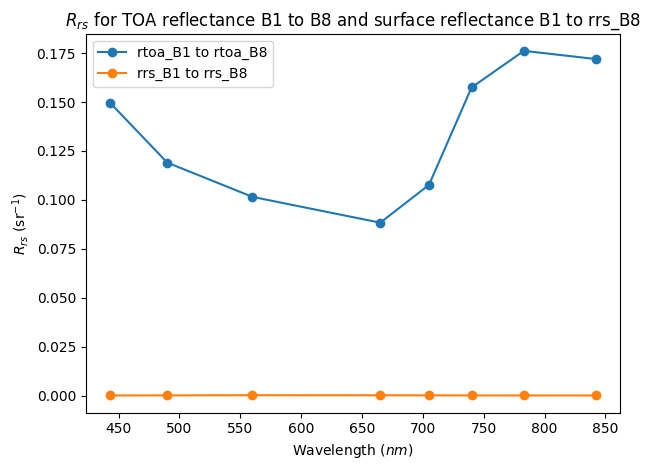

In [19]:
# Open the geotiff file
with rasterio.open('tif_files/S2_MSIL1C_20221007T104931_samp_mask_C2RCC_mathbands.tif') as dataset:
    # Read the bands B1, B2, B3, B4, B5, B6, B7, and B8
    band1 = dataset.read(band_indices['rtoa_B1'])
    band2 = dataset.read(band_indices['rtoa_B2'])
    band3 = dataset.read(band_indices['rtoa_B3'])
    band4 = dataset.read(band_indices['rtoa_B4'])
    band5 = dataset.read(band_indices['rtoa_B5'])
    band6 = dataset.read(band_indices['rtoa_B6'])
    band7 = dataset.read(band_indices['rtoa_B7'])
    band8 = dataset.read(band_indices['rtoa_B8'])

    # Calculate the mean of pixel values for each band
    mean_band1 = band1.mean()
    mean_band2 = band2.mean()
    mean_band3 = band3.mean()
    mean_band4 = band4.mean()
    mean_band5 = band5.mean()
    mean_band6 = band6.mean()
    mean_band7 = band7.mean()
    mean_band8 = band8.mean()

    # Plot the mean values
    wavelengths = [443, 490, 560, 665, 705, 740, 783, 842]
    mean_values = [mean_band1, mean_band2, mean_band3, mean_band4, mean_band5, mean_band6, mean_band7, mean_band8]

    plt.plot(wavelengths, mean_values, marker='o', label='rtoa_B1 to rtoa_B8')
    
    # Read the bands rrs_B1 to rrs_B8
    rpath_band1 = dataset.read(band_indices['rrs_B1'])
    rrs_band2 = dataset.read(band_indices['rrs_B2'])
    rrs_band3 = dataset.read(band_indices['rrs_B3'])
    rrs_band4 = dataset.read(band_indices['rrs_B4'])
    rrs_band5 = dataset.read(band_indices['rrs_B5'])
    rrs_band6 = dataset.read(band_indices['rrs_B6'])
    rrs_band7 = dataset.read(band_indices['rrs_B7'])
    rrs_band8 = dataset.read(band_indices['rrs_B8A'])

    # Calculate the mean of pixel values for each rrs band
    mean_rrs_band1 = rrs_band1.mean()
    mean_rrs_band2 = rrs_band2.mean()
    mean_rrs_band3 = rrs_band3.mean()
    mean_rrs_band4 = rrs_band4.mean()
    mean_rrs_band5 = rrs_band5.mean()
    mean_rrs_band6 = rrs_band6.mean()
    mean_rrs_band7 = rrs_band7.mean()
    mean_rrs_band8 = rrs_band8.mean()

    # Plot the mean values for rrs bands
    mean_rrs_values = [mean_rrs_band1, mean_rrs_band2, mean_rrs_band3, mean_rrs_band4, mean_rrs_band5, mean_rrs_band6, mean_rrs_band7, mean_rrs_band8]
    
    plt.plot(wavelengths, mean_rrs_values, marker='o', label='rrs_B1 to rrs_B8')

    # # Read the bands rrs_B1 to rrs_B8
    # rrs_band1 = dataset.read(band_indices['rpath_B1'])
    # rrs_band2 = dataset.read(band_indices['rpath_B2'])
    # rrs_band3 = dataset.read(band_indices['rpath_B3'])
    # rrs_band4 = dataset.read(band_indices['rpath_B4'])
    # rrs_band5 = dataset.read(band_indices['rpath_B5'])
    # rrs_band6 = dataset.read(band_indices['rpath_B6'])
    # rrs_band7 = dataset.read(band_indices['rpath_B7'])
    # rrs_band8 = dataset.read(band_indices['rpath_B8A'])

    # # Calculate the mean of pixel values for each rrs band
    # mean_rpath_band1 = rrs_band1.mean()
    # mean_rpath_band2 = rrs_band2.mean()
    # mean_rpath_band3 = rrs_band3.mean()
    # mean_rpath_band4 = rrs_band4.mean()
    # mean_rpath_band5 = rrs_band5.mean()
    # mean_rpath_band6 = rrs_band6.mean()
    # mean_rpath_band7 = rrs_band7.mean()
    # mean_rpath_band8 = rrs_band8.mean()

    # # Plot the mean values for rrs bands
    # mean_rpath_values = [mean_rpath_band1, mean_rpath_band2, mean_rpath_band3, mean_rpath_band4, mean_rpath_band5, mean_rpath_band6, mean_rpath_band7, mean_rpath_band8]
    
    # plt.plot(wavelengths, mean_rpath_values, marker='o', label='rpath_B1 to rpath_B8')
    

    plt.xlabel('Wavelength ($nm$)')
    plt.ylabel('$R_{rs}$ (sr$^{-1}$)')
    plt.title('$R_{rs}$ for TOA reflectance B1 to B8 and surface reflectance B1 to rrs_B8')
    plt.legend()

    plt.tight_layout()
    plt.show()

### Plot Spectral schema

Analysis of the reflectance values of the resampled L1C images in Subplots individually

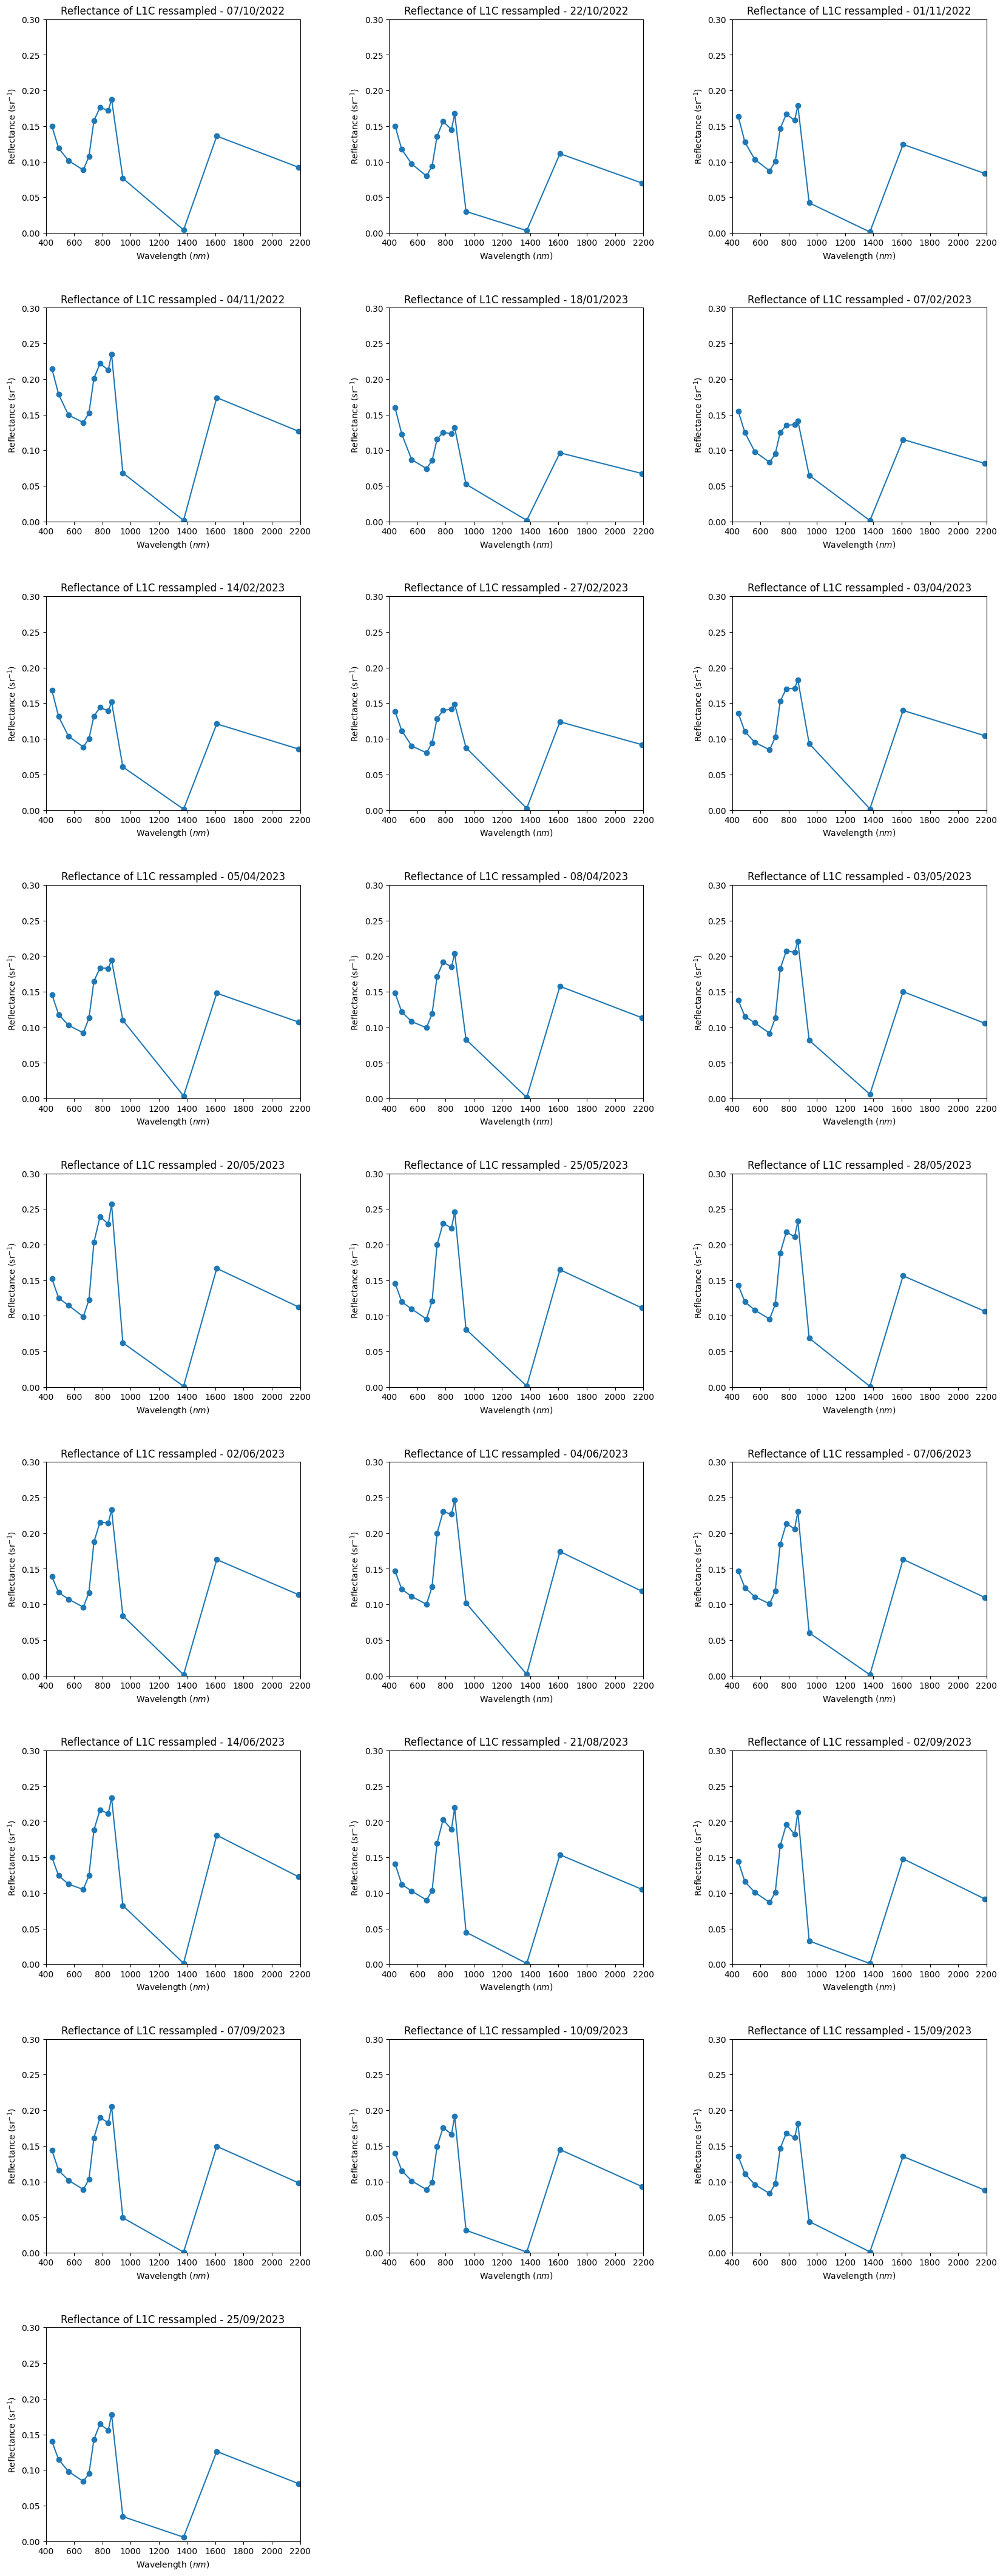

In [ ]:
import os
import rasterio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Diretório contendo os arquivos .tif
directory = 'tif_files/'

# List for storing the paths of the .tif files
arquivos_tif = [os.path.join(directory, arquivo) for arquivo in os.listdir(directory) if arquivo.endswith('.tif')]

arquivos_tif_dict = {}
for arquivo_tif in arquivos_tif:
    # Extract date from the name of the file
    date = arquivo_tif.split('_')[3]
    # Convert the date to datetime format
    date = pd.to_datetime(date, format='%Y%m%dT%H%M%S')
    # Add the file path to the dictionary
    arquivos_tif_dict[date] = arquivo_tif

# Sort the dictionary by its keys (the dates)
arquivos_tif_dict = dict(sorted(arquivos_tif_dict.items()))

# Number of columns in the plot
num_colunas = 3

# Calculate the number of lines in the plot
num_linhas = (len(arquivos_tif) + num_colunas - 1) // num_colunas

# Configuring subplots
fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(20, 6 * num_linhas))
fig.subplots_adjust(wspace=0.35, hspace=0.35)

# Lista de bandas para Rtoa
band_indices_new = { 'B1': band_indices['rtoa_B1'], 'B2': band_indices['rtoa_B2'], 'B3': band_indices['rtoa_B3'], 'B4': band_indices['rtoa_B4'], 'B5': band_indices['rtoa_B5'], \
                 'B6': band_indices['rtoa_B6'], 'B7': band_indices['rtoa_B7'], 'B8': band_indices['rtoa_B8'], 'B8A': band_indices['rtoa_B8A'], 'B9': band_indices['rtoa_B9'], \
                 'B10': band_indices['rtoa_B10'], 'B11': band_indices['rtoa_B11'], 'B12': band_indices['rtoa_B12'] }

# Initialize lists to store all reflectance values
all_rrs_values = []

# Iterate over each .tif file
for i, (date, arquivo_tif) in enumerate(arquivos_tif_dict.items()):
    # Open the .tif file
    with rasterio.open(arquivo_tif) as src:

        wavelengths = [443, 490, 560, 665, 705, 740, 783, 842, 865, 945, 1375, 1610, 2190]

        rrs_values = []
        for band_name, band_index in band_indices_new.items():
            rrs_band = src.read(band_index)
            rrs_band = rrs_band[(rrs_band != 0) & (~np.isnan(rrs_band))]
            mean_rrs_band = rrs_band.mean()
            rrs_values.append(mean_rrs_band)

        # Position of the subplot
        linha = i // num_colunas
        coluna = i % num_colunas

        axs[linha, coluna].plot(wavelengths, rrs_values, marker='o')
        axs[linha, coluna].set_xlabel('Wavelength ($nm$)')
        axs[linha, coluna].set_ylabel('Reflectance (sr$^{-1}$)')
        axs[linha, coluna].set_title(f'Reflectance of L1C ressampled - {date.strftime("%d/%m/%Y")}')


# Limiting the y-axis and x-axis
for ax in axs.flat:
    ax.set_ylim(0, 0.3)
    ax.set_xlim(400, 2200)

# Remove all axes from the empty subplots
for i in range(len(arquivos_tif), num_linhas * num_colunas):
    axs.flatten()[i].axis('off')

# Exibir a figura
plt.show()

Analysis of the reflectance values of the resampled L1C images in one plot

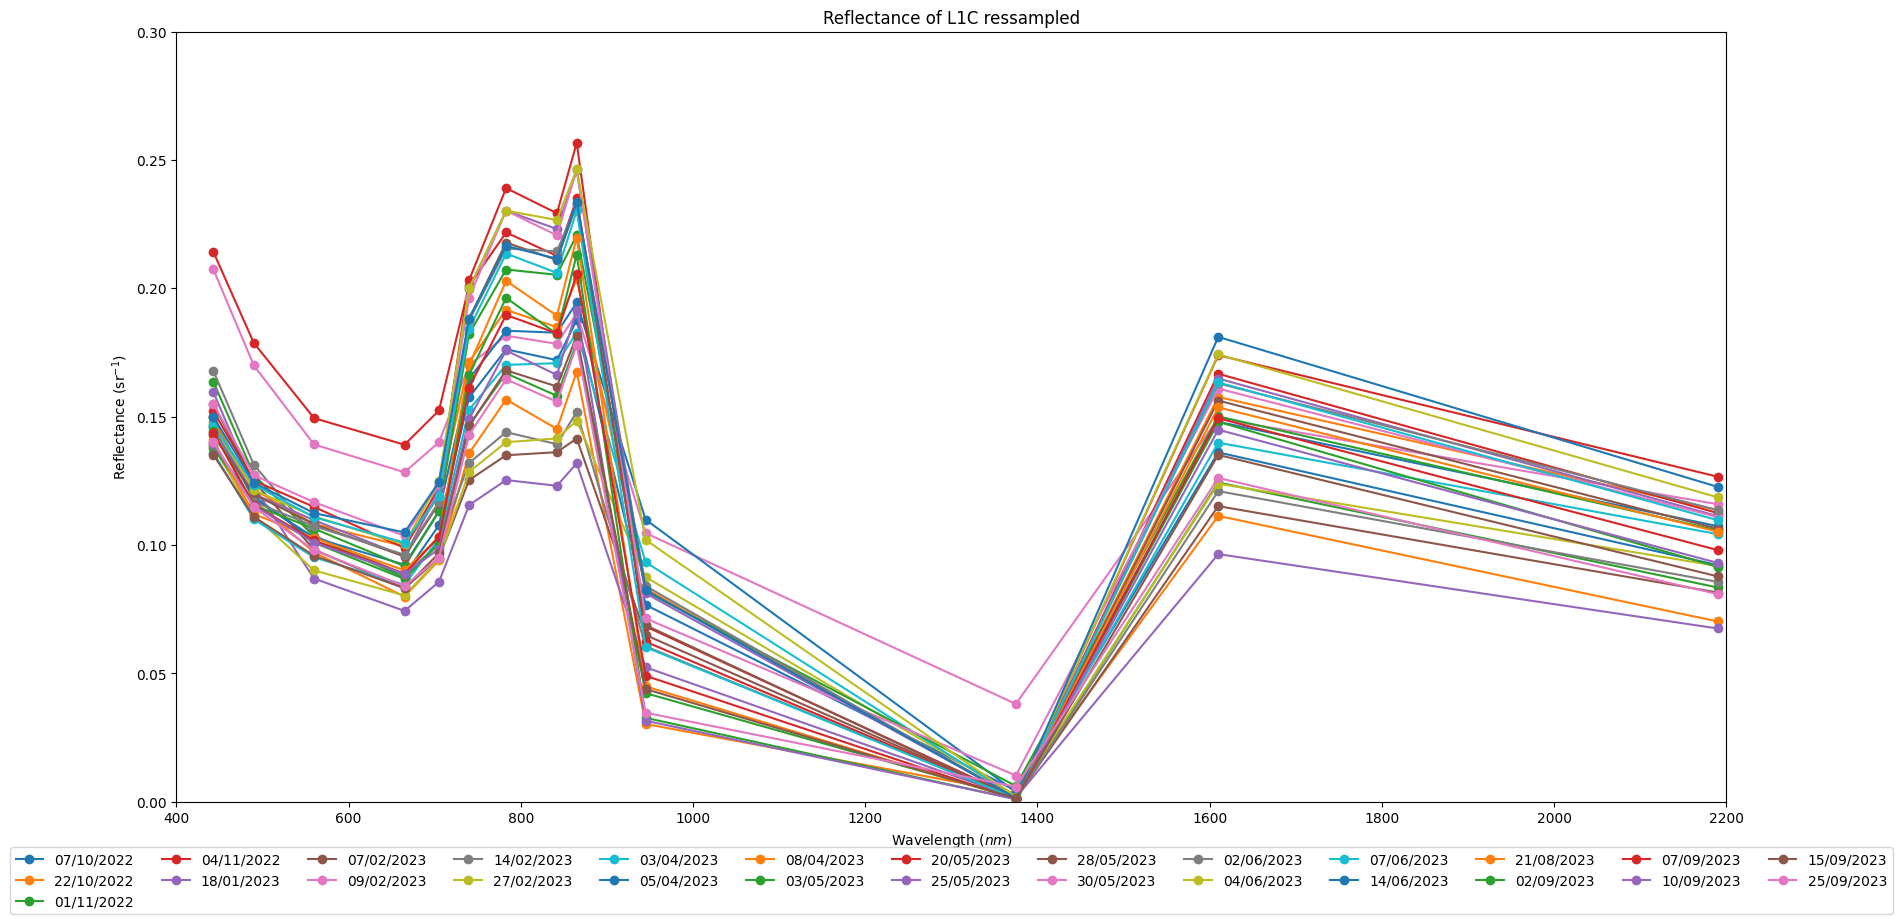

In [ ]:
import os
import rasterio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Diretório contendo os arquivos .tif
directory = 'tif_files_final/'

# List for storing the paths of the .tif files
arquivos_tif = [os.path.join(directory, arquivo) for arquivo in os.listdir(directory) if arquivo.endswith('.tif')]

arquivos_tif_dict = {}
for arquivo_tif in arquivos_tif:
    # Extract date from the name of the file
    date = arquivo_tif.split('_')[4]
    # Convert the date to datetime format
    date = pd.to_datetime(date, format='%Y%m%dT%H%M%S')
    # Add the file path to the dictionary
    arquivos_tif_dict[date] = arquivo_tif

# Sort the dictionary by its keys (the dates)
arquivos_tif_dict = dict(sorted(arquivos_tif_dict.items()))

# Configuring the single plot
fig, ax = plt.subplots(figsize=(20, 10))

# List of bands for Reflectance TOA
band_indices_new = { 'B1': band_indices['rtoa_B1'], 'B2': band_indices['rtoa_B2'], 'B3': band_indices['rtoa_B3'], 'B4': band_indices['rtoa_B4'], 'B5': band_indices['rtoa_B5'], \
                 'B6': band_indices['rtoa_B6'], 'B7': band_indices['rtoa_B7'], 'B8': band_indices['rtoa_B8'], 'B8A': band_indices['rtoa_B8A'], 'B9': band_indices['rtoa_B9'], \
                 'B10': band_indices['rtoa_B10'], 'B11': band_indices['rtoa_B11'], 'B12': band_indices['rtoa_B12'] }

# Initialize lists to store all reflectance values
all_rrs_values = []

# Iterate over each .tif file
for i, (date, arquivo_tif) in enumerate(arquivos_tif_dict.items()):
    # Open the .tif file
    with rasterio.open(arquivo_tif) as src:

        wavelengths = [443, 490, 560, 665, 705, 740, 783, 842, 865, 945, 1375, 1610, 2190]

        rrs_values = []
        for band_name, band_index in band_indices_new.items():
            rrs_band = src.read(band_index)
            rrs_band = rrs_band[(rrs_band != 0) & (~np.isnan(rrs_band))]
            mean_rrs_band = rrs_band.mean()
            rrs_values.append(mean_rrs_band)

        # Identify which band has the highest/minimum value - Help for the report
        # print(rrs_values[3], 'for ', date.strftime("%d/%m/%Y"))

    ax.plot(wavelengths, rrs_values, marker='o', label=f'{date.strftime("%d/%m/%Y")}')

# Set x-axis and y-axis labels
ax.set_xlabel('Wavelength ($nm$)')
ax.set_ylabel('Reflectance (sr$^{-1}$)')
ax.set_title('Reflectance of L1C ressampled')

# Set y-axis and x-axis limits
ax.set_ylim(0, 0.3)
ax.set_xlim(400, 2200)

# Place the legend below the plot
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=len(arquivos_tif_dict)/2)




# Exibir a figura
plt.show()

### Analyse masks - For the report

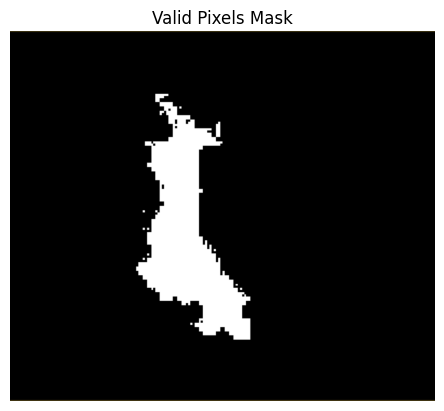

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read the PNG image
image_path = 'results_images\image of the mask.png'
image = mpimg.imread(image_path)

# Plot the image
plt.imshow(image)
plt.title('Valid Pixels Mask')
plt.axis('off')
plt.show()


### Analysing C2RCC outputs

In [ ]:
# Load the output indices again

# Labeling bands

band_labels = [
        '3_bands_model_chl_conc',
        'pixel_classif_flags',
        'rtoa_B1', 
        'rtoa_B2',
        'rtoa_B3',
        'rtoa_B4',
        'rtoa_B5',
        'rtoa_B6',
        'rtoa_B7',
        'rtoa_B8',
        'rtoa_B8A',
        'rtoa_B9',
        'rtoa_B10',
        'rtoa_B11',
        'rtoa_B12',
        'rpath_B1',
        'rpath_B2',
        'rpath_B3',
        'rpath_B4',
        'rpath_B5',
        'rpath_B6',
        'rpath_B7',
        'rpath_B8A',
        'rrs_B1',
        'rrs_B2',
        'rrs_B3',
        'rrs_B4',
        'rrs_B5',
        'rrs_B6',
        'rrs_B7',
        'rrs_B8A',
        'rhown_B1',
        'rhown_B2',
        'rhown_B3',
        'rhown_B4',
        'rhown_B5',
        'rhown_B6',
        'iop_apig',
        'iop_adet',
        'iop_agelb',
        'iop_bpart',
        'iop_bwit',
        'iop_adg',
        'iop_atot',
        'iop_btot',
        'kd489',
        'kdmin',
        'kd_z90max',
        'conc_tsm',
        'conc_chl',
        'unc_apig',
        'unc_adet',
        'unc_agelb',
        'unc_bpart',
        'unc_bwit',
        'unc_adg',
        'unc_atot',
        'unc_btot',
        'unc_tsm',
        'unc_chl',
        'unc_kd489',
        'unc_kdmin',
        'unc_kd_z90max',
        'c2rcc_flags',
        'MCI',
        'empirical_2_bands_equation1',
        'empirical_2_bands_equation2',
        'empirical_3_bands_equation1',
        'empirical_3_bands_equation3'
    ]
# Create a list with indices of each band label
band_indices = dict(zip(band_labels, range(1, len(band_labels)+1)))

Analise do Rrs para o pós C2RCC

C:\Users\arthu\AppData\Local\Temp\ipykernel_24268\110641712.py:47: RuntimeWarning: Mean of empty slice.
  mean_rrs_band = rrs_band.mean()


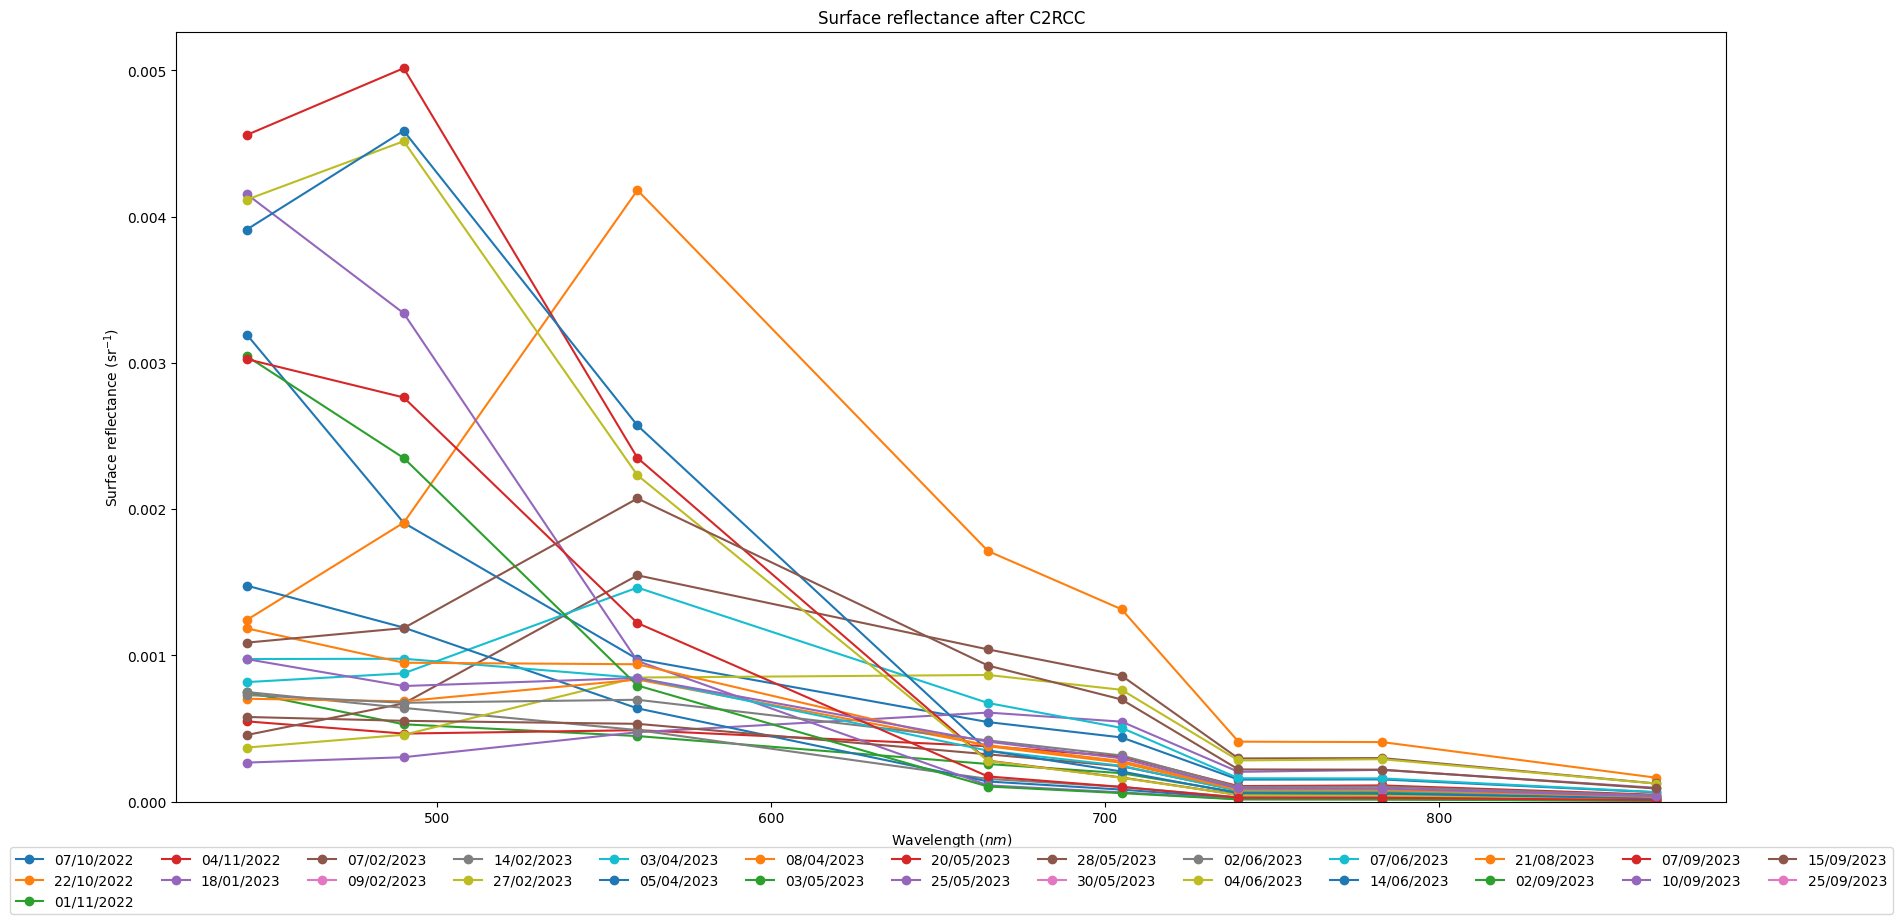

In [ ]:
import os
import rasterio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Diretório contendo os arquivos .tif
directory = 'tif_files_final/'

# List for storing the paths of the .tif files
arquivos_tif = [os.path.join(directory, arquivo) for arquivo in os.listdir(directory) if arquivo.endswith('.tif')]

arquivos_tif_dict = {}
for arquivo_tif in arquivos_tif:
    # Extract date from the name of the file
    date = arquivo_tif.split('_')[4]
    # Convert the date to datetime format
    date = pd.to_datetime(date, format='%Y%m%dT%H%M%S')
    # Add the file path to the dictionary
    arquivos_tif_dict[date] = arquivo_tif

# Sort the dictionary by its keys (the dates)
arquivos_tif_dict = dict(sorted(arquivos_tif_dict.items()))

# Configuring the single plot
fig, ax = plt.subplots(figsize=(20, 10))

# List of bands for Reflectance TOA
band_indices_new = { 'B1': band_indices['rrs_B1'], 'B2': band_indices['rrs_B2'], 'B3': band_indices['rrs_B3'], 'B4': band_indices['rrs_B4'], 'B5': band_indices['rrs_B5'], \
                 'B6': band_indices['rrs_B6'], 'B7': band_indices['rrs_B7'], 'B8A': band_indices['rrs_B8A']}

# Initialize lists to store all reflectance values
all_rrs_values = []

# Iterate over each .tif file
for i, (date, arquivo_tif) in enumerate(arquivos_tif_dict.items()):
    # Open the .tif file
    with rasterio.open(arquivo_tif) as src:

        wavelengths = [443, 490, 560, 665, 705, 740, 783,  865]
        std_rrs_band = []
        rrs_values = []

        for band_name, band_index in band_indices_new.items():
            rrs_band = src.read(band_index)
            rrs_band = rrs_band[(rrs_band != 0) & (~np.isnan(rrs_band))]
            mean_rrs_band = rrs_band.mean()
            std_rrs_band.append(rrs_band.std())  # Calculate the standard deviation
            rrs_values.append(mean_rrs_band)

        # Plot the standard deviation as error bars parameter yerr=std_rrs_band
        ax.errorbar(wavelengths, rrs_values, marker='o', label=f'{date.strftime("%d/%m/%Y")}')

# Set x-axis and y-axis labels
ax.set_xlabel('Wavelength ($nm$)')
ax.set_ylabel('Surface reflectance (sr$^{-1}$)')
ax.set_title('Surface reflectance after C2RCC')
ax.set_ylim(0)

# Place the legend below the plot
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=len(arquivos_tif_dict)/2)

# Display the figure
plt.show()

C:\Users\arthu\AppData\Local\Temp\ipykernel_24268\4105925117.py:47: RuntimeWarning: Mean of empty slice.
  mean_rrs_band = rrs_band.mean()


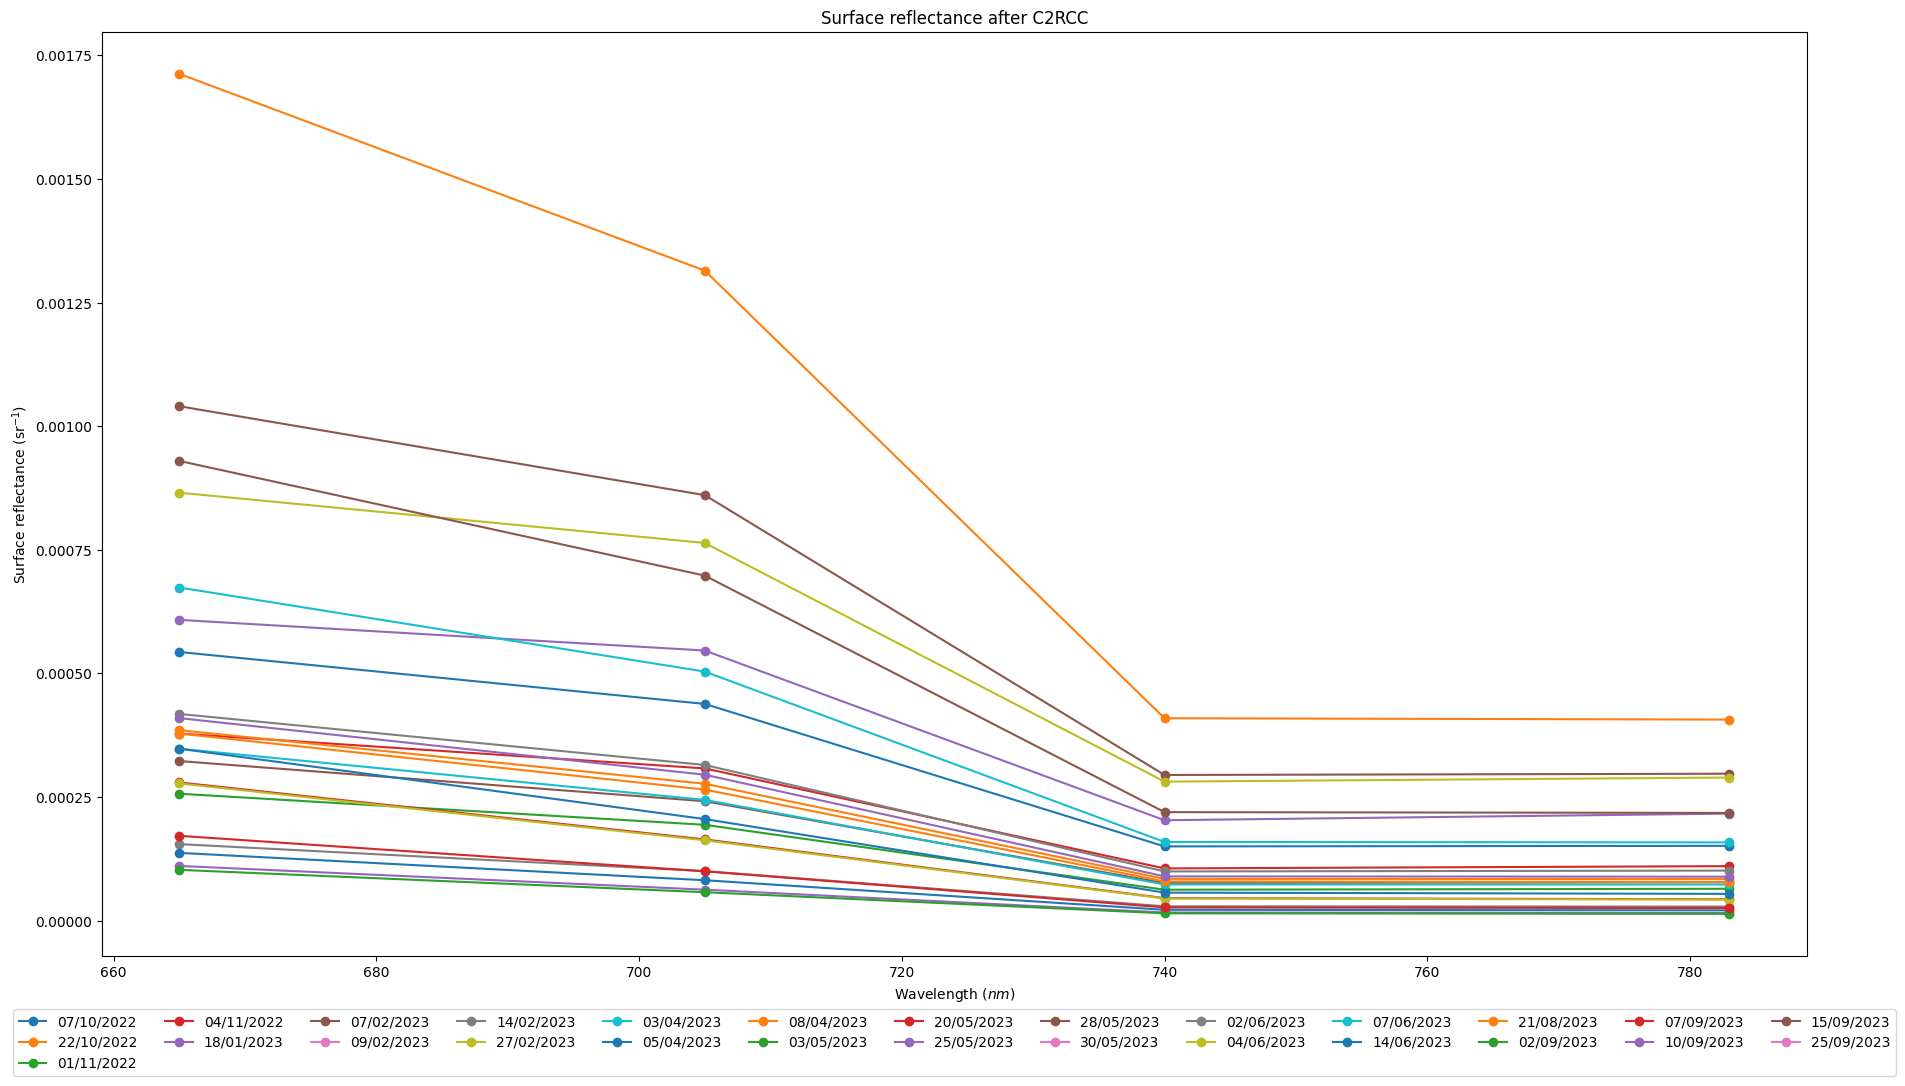

In [ ]:
import os
import rasterio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Diretório contendo os arquivos .tif
directory = 'tif_files_final/'

# List for storing the paths of the .tif files
arquivos_tif = [os.path.join(directory, arquivo) for arquivo in os.listdir(directory) if arquivo.endswith('.tif')]

arquivos_tif_dict = {}
for arquivo_tif in arquivos_tif:
    # Extract date from the name of the file
    date = arquivo_tif.split('_')[4]
    # Convert the date to datetime format
    date = pd.to_datetime(date, format='%Y%m%dT%H%M%S')
    # Add the file path to the dictionary
    arquivos_tif_dict[date] = arquivo_tif

# Sort the dictionary by its keys (the dates)
arquivos_tif_dict = dict(sorted(arquivos_tif_dict.items()))

# Configuring the single plot
fig, ax = plt.subplots(figsize=(22, 12))

# List of bands for Reflectance TOA
band_indices_new = { 'B4': band_indices['rrs_B4'], 'B5': band_indices['rrs_B5'], \
                 'B6': band_indices['rrs_B6'], 'B7': band_indices['rrs_B7']}

# Initialize lists to store all reflectance values
all_rrs_values = []

# Iterate over each .tif file
for i, (date, arquivo_tif) in enumerate(arquivos_tif_dict.items()):
    # Open the .tif file
    with rasterio.open(arquivo_tif) as src:

        wavelengths = [ 665, 705, 740, 783]
        std_rrs_band = []
        rrs_values = []

        for band_name, band_index in band_indices_new.items():
            rrs_band = src.read(band_index)
            rrs_band = rrs_band[(rrs_band != 0) & (~np.isnan(rrs_band))]
            mean_rrs_band = rrs_band.mean()
            std_rrs_band.append(rrs_band.std())  # Calculate the standard deviation
            rrs_values.append(mean_rrs_band)

        # Plot the standard deviation as error bars
        ax.errorbar(wavelengths, rrs_values, marker='o', label=f'{date.strftime("%d/%m/%Y")}')

# Set x-axis and y-axis labels
ax.set_xlabel('Wavelength ($nm$)')
ax.set_ylabel('Surface reflectance (sr$^{-1}$)')
ax.set_title('Surface reflectance after C2RCC')

# Place the legend below the plot
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=len(arquivos_tif_dict)/2)

# Display the figure
plt.show()

## Analysis using exported data from SNAP - C2RCC after adjusting

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
import matplotlib.dates as mdates
import rasterio

# Labeling bands

band_labels = [
        '3_bands_model_chl_conc',
        'pixel_classif_flags',
        'rtoa_B1', 
        'rtoa_B2',
        'rtoa_B3',
        'rtoa_B4',
        'rtoa_B5',
        'rtoa_B6',
        'rtoa_B7',
        'rtoa_B8',
        'rtoa_B8A',
        'rtoa_B9',
        'rtoa_B10',
        'rtoa_B11',
        'rtoa_B12',
        'rpath_B1',
        'rpath_B2',
        'rpath_B3',
        'rpath_B4',
        'rpath_B5',
        'rpath_B6',
        'rpath_B7',
        'rpath_B8A',
        'rrs_B1',
        'rrs_B2',
        'rrs_B3',
        'rrs_B4',
        'rrs_B5',
        'rrs_B6',
        'rrs_B7',
        'rrs_B8A',
        'rhown_B1',
        'rhown_B2',
        'rhown_B3',
        'rhown_B4',
        'rhown_B5',
        'rhown_B6',
        'iop_apig',
        'iop_adet',
        'iop_agelb',
        'iop_bpart',
        'iop_bwit',
        'iop_adg',
        'iop_atot',
        'iop_btot',
        'kd489',
        'kdmin',
        'kd_z90max',
        'conc_tsm',
        'conc_chl',
        'unc_apig',
        'unc_adet',
        'unc_agelb',
        'unc_bpart',
        'unc_bwit',
        'unc_adg',
        'unc_atot',
        'unc_btot',
        'unc_tsm',
        'unc_chl',
        'unc_kd489',
        'unc_kdmin',
        'unc_kd_z90max',
        'c2rcc_flags',
        'MCI',
        'empirical_2_bands_equation1',
        'empirical_2_bands_equation2',
        'empirical_3_bands_equation1',
        'empirical_3_bands_equation3'
    ]
# Create a list with indices of each band label
band_indices = dict(zip(band_labels, range(1, len(band_labels)+1)))

### Data processing

Load and clean data

In [ ]:
import pandas as pd

# Read the Excel file
excel_file = pd.ExcelFile('results_consolidate_for_pandas.xlsx')

# Get the names of all tabs in the Excel file
sheet_names = excel_file.sheet_names

# Create an empty dictionary to store the dataframes
dataframes = {}

# Iterate over each tab
for sheet_name in sheet_names:
    # Read the tab as a dataframe
    df = excel_file.parse(sheet_name)
    
    # Store the dataframe in the dictionary
    dataframes[sheet_name] = df

# Access the dataframes by their tab names
for sheet_name, df in dataframes.items():
    print(f"Dataframe for tab '{sheet_name}':")


Dataframe for tab 'results_initial':
Dataframe for tab 'results_final':
Dataframe for tab 'results_validation':
Dataframe for tab 'data_loco_validation':
Dataframe for tab 'data_loco':
Dataframe for tab 'meteo':
Dataframe for tab 'vimeo_data_sensor':
Dataframe for tab 'laboratory_data':


In [7]:
# Read the Excel files for final data results

# Reset df_c2rcc dataframe if exists
if 'df_c2rcc' in locals():
    del df_c2rcc

# Read the Excel file
df_c2rcc = dataframes['results_final']

# If column 'Date' exists
if 'Date' in df_c2rcc.columns:
    # Convert the 'Date' column to datetime
    df_c2rcc['Date'] = pd.to_datetime(df_c2rcc['Date'])
    # Set the 'Date' column as the index
    df_c2rcc.set_index('Date', inplace=True)


# If the row is completely empty, drop it and save the drop in other dataframe
df_c2rcc = df_c2rcc.dropna(how='all')

# Read the Excel file
df_loco = dataframes['data_loco']

if 'time' in df_loco.columns:
    df_loco.set_index('time', inplace=True)





In [ ]:

display(df_c2rcc)
display(df_loco)

conc_chl_mean_windows_3x3  conc_chl_sigma_windows_3x3  \
Date                                                                         
2022-10-07 10:49:31                  11.363131                    1.194454   
2022-10-22 10:50:09                        NaN                         NaN   
2022-11-01 10:51:09                   9.471119                    2.557038   
2022-11-04 11:01:29                        NaN                    0.000000   
2023-01-18 11:04:01                   5.915650                    4.918062   
2023-02-07 11:02:21                  11.409929                    1.973134   
2023-02-14 10:51:41                   5.278747                    2.397119   
2023-02-27 11:00:11                   6.899830                    2.421804   
2023-04-03 10:56:29                  13.913920                    3.389864   
2023-04-05 10:50:31                   1.681173                    0.369453   
2023-04-08 10:56:21                   8.845940                    5.476615   
2023-05-20 10:46:29                   0.809154                    0.209672   
2023-05-25 10:50:31                   0.665112                    0.144003   
2023-05-30 10:46:29                   6.164752                    3.611279   
2023-06-02 10:56:29                  16.235210                    1.877222   
2023-06-04 10:46:21                   0.750066                    0.134685   
2023-06-07 10:56:21                   6.508852                    2.893099   
2023-06-14 10:50:31                   0.730937                    0.176955   
2023-08-21 10:56:29                   5.423819                    1.116618   
2023-09-02 10:46:31                   0.635112                    0.349202   
2023-09-07 10:46:29                   0.534971                    0.282588   
2023-09-10 10:56:29                   9.208801                    1.819772   
2023-09-15 10:57:01                   9.119094                    2.814362   

                     conc_chl_mean_windows_5x5  conc_chl_sigma_windows_5x5  \
Date                                                                         
2022-10-07 10:49:31                  11.394294                    2.075915   
2022-10-22 10:50:09                        NaN                         NaN   
2022-11-01 10:51:09                   9.333033                    4.237271   
2022-11-04 11:01:29                  13.798728                    2.446890   
2023-01-18 11:04:01                   6.500003                    5.882575   
2023-02-07 11:02:21                  11.999173                    3.076847   
2023-02-14 10:51:41                   4.430862                    2.393104   
2023-02-27 11:00:11                   7.112814                    3.282846   
2023-04-03 10:56:29                  13.319674                    2.930308   
2023-04-05 10:50:31                   2.109381                    1.056433   
2023-04-08 10:56:21                   9.166418                    6.397438   
2023-05-20 10:46:29                   0.779681                    0.220284   
2023-05-25 10:50:31                   0.651485                    0.120573   
2023-05-30 10:46:29                   5.942648                    4.397751   
2023-06-02 10:56:29                  15.742447                    3.425295   
2023-06-04 10:46:21                   0.705684                    0.214326   
2023-06-07 10:56:21                   5.118840                    3.144121   
2023-06-14 10:50:31                   0.708931                    0.187503   
2023-08-21 10:56:29                   6.108286                    3.236762   
2023-09-02 10:46:31                   0.681935                    0.362955   
2023-09-07 10:46:29                   0.471866                    0.196976   
2023-09-10 10:56:29                  10.076584                    3.534795   
2023-09-15 10:57:01                  10.100758                    3.645483   

                     conc_chl_mean  conc_chl_sigma  
Date                                                
2022-10-07 10

chlorophylle A
time                               
2022-09-30 09:31:00           10.18
2022-09-30 09:46:00           10.61
2022-09-30 10:01:00            9.56
2022-09-30 10:16:00            7.93
2022-09-30 10:31:00           12.47
...                             ...
2023-10-03 07:01:00           68.80
2023-10-03 07:16:00           58.34
2023-10-03 07:31:00           60.49
2023-10-03 07:46:00           49.99
2023-10-03 08:01:00           62.87

[31928 rows x 1 columns]

In [ ]:
# If df_c2rcc and df_loco its not indexed by 'Date' and 'time' respectively, set the index
if df_c2rcc.index.name != 'Date':
    df_c2rcc.set_index('Date', inplace=True)
if df_loco.index.name != 'time':
    df_loco.set_index('time', inplace=True)


MergeError: can only asof on a key for left

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
import matplotlib.dates as mdates

# Create a slider widget for selecting the time range
start_date_widget = widgets.DatePicker(description='Start Date', value=pd.to_datetime('2022-09-30'))
end_date_widget = widgets.DatePicker(description='End Date', value=pd.to_datetime('2023-10-30'))
# Define a function to update the plot based on the selected time range
def update_plot(start_date, end_date):
    filtered_df = df_loco.loc[start_date:end_date]
    filtered_df2 = df_c2rcc.loc[start_date:end_date]
    
    # Reset index for filtered_df2
    filtered_df2.reset_index(inplace=True)

    dates_to_remove = ['2022-10-22 10:50:09', '2023-01-18 11:04:01', '2023-04-08 10:56:21', '2023-02-07 11:02:21']
    for date in dates_to_remove:
        filtered_df2 = filtered_df2.drop(filtered_df2[filtered_df2['Date'] == date].index)

    # Setting index again for filtered_df2
    filtered_df2.set_index('Date', inplace=True)

    # conc_chl_mean_windows_3x3	conc_chl_sigma_windows_3x3	conc_chl_mean_windows_5x5	conc_chl_sigma_windows_5x5	conc_chl_mean	conc_chl_sigma
  
    
    # Resample the data to daily frequency and calculate the mean for each day
    daily_mean1 = filtered_df['chlorophylle A'].resample('D').median()
    daily_mean2 = filtered_df2['conc_chl_mean_windows_3x3'].resample('D').mean()
    daily_mean3 = filtered_df2['conc_chl_mean_windows_5x5'].resample('D').mean()
    daily_mean4 = filtered_df2['conc_chl_mean'].resample('D').mean()

    # Resample the errors to daily frequency and calculate the mean for each day
    daily_mean1_unc = filtered_df['chlorophylle A'].resample('D').std()
    daily_mean2_unc = filtered_df2['conc_chl_sigma_windows_3x3'].resample('D').mean()
    daily_mean3_unc = filtered_df2['conc_chl_sigma_windows_5x5'].resample('D').mean()
    daily_mean4_unc = filtered_df2['conc_chl_sigma'].resample('D').mean()

    # Create a figure with two subplots
    fig, ax1 = plt.subplots(figsize=(20, 10))

    # Plot data and the errors
    ax1.errorbar(daily_mean1.index, daily_mean1, yerr=daily_mean1_unc, marker='o', label='Chlorophylle A - In Situ (Median)')
    ax1.errorbar(daily_mean2.index, daily_mean2, yerr=daily_mean2_unc, marker='o', label='Chlorophylle A - C2RCC (3x3)')
    ax1.errorbar(daily_mean3.index, daily_mean3, yerr=daily_mean3_unc, marker='o', label='Chlorophylle A - C2RCC (5x5)')
    ax1.errorbar(daily_mean4.index, daily_mean4, yerr=daily_mean4_unc, marker='o', label='Chlorophylle A - C2RCC (All pixels)')

    # Set the y-axis label
    ax1.set_ylabel('Chlorophylle-A concentration ($mg.m^{-3}$)', fontsize=17)
    ax1.set_xlabel('Date', fontsize=17)
    # Setting font size for values in axes
    ax1.tick_params(axis='both', which='major', labelsize=14)
    ax1.set_ylim(0)
    ax1.set_title('Time series of C2RCC chlorophylle-A concentration by different methods', fontsize=20)
    ax1.legend(fontsize=14)
    
    # Format x-axis ticks as months (mm/yyyy)
    ax1.xaxis.set_major_locator(mdates.MonthLocator())
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
    
    plt.tight_layout()
    plt.show()

# Create an interactive output widget
output = widgets.interactive_output(update_plot, {'start_date': start_date_widget, 'end_date': end_date_widget})

# Display the widgets and the output
display(start_date_widget, end_date_widget, output)


DatePicker(value=Timestamp('2022-09-30 00:00:00'), description='Start Date', step=1)

DatePicker(value=Timestamp('2023-10-30 00:00:00'), description='End Date', step=1)

Output()

### Calculating statistics for each metrics adjusting the in loco data by their lower and upper bounds

In [ ]:
### Calculating statistics for each metrics adjusting the in loco data by their lower and upper bounds
# Set to 'time' be the index if it is not
if df_loco.index.name != 'time':
    # Convert colum time in datetime
    df_loco['time'] = pd.to_datetime(df_loco['time'])
    df_loco.set_index('time', inplace=True)
    
teste = df_loco['chlorophylle A'].resample('D').std()
# Calculate upper_bound and lower_bound using quartiles of each day
upper_bound = df_loco['chlorophylle A'].resample('D').quantile(0.75) + 1.5 * teste
lower_bound = df_loco['chlorophylle A'].resample('D').quantile(0.25) - 1.5 * teste

# Transform lower_bound and upper_bound in one dataframe
upper_bound = pd.DataFrame(upper_bound)
lower_bound = pd.DataFrame(lower_bound)
upper_bound.reset_index(inplace=True)
lower_bound.reset_index(inplace=True)
# Rename the columns
upper_bound.columns = ['date', 'upper_bound']
lower_bound.columns = ['date', 'lower_bound']

bounds = pd.merge(upper_bound, lower_bound, on='date')

# Reset the index of in situ data if it is not the default index
if df_loco.index.name == 'time':
    df_loco.reset_index(inplace=True)

# Excract the date YYYY-MM-DD for df_loco['time']
df_loco['date'] = df_loco['time'].dt.date
df_loco['date'] = pd.to_datetime(df_loco['date'])

# Merge df_loco with bounds by date
df_loco = pd.merge(df_loco, bounds, on='date')

display(df_loco)

# Drop values in df_loco that aren't in the range of bounds
df_loco = df_loco[(df_loco['chlorophylle A'] >= df_loco['lower_bound']) & (df_loco['chlorophylle A'] <= df_loco['upper_bound'])]




time  chlorophylle A       date  upper_bound  lower_bound
0     2022-09-30 09:31:00           10.18 2022-09-30    13.415148     2.049852
1     2022-09-30 09:46:00           10.61 2022-09-30    13.415148     2.049852
2     2022-09-30 10:01:00            9.56 2022-09-30    13.415148     2.049852
3     2022-09-30 10:16:00            7.93 2022-09-30    13.415148     2.049852
4     2022-09-30 10:31:00           12.47 2022-09-30    13.415148     2.049852
...                   ...             ...        ...          ...          ...
31923 2023-10-03 07:01:00           68.80 2023-10-03    75.567690    44.902310
31924 2023-10-03 07:16:00           58.34 2023-10-03    75.567690    44.902310
31925 2023-10-03 07:31:00           60.49 2023-10-03    75.567690    44.902310
31926 2023-10-03 07:46:00           49.99 2023-10-03    75.567690    44.902310
31927 2023-10-03 08:01:00           62.87 2023-10-03    75.567690    44.902310

[31928 rows x 5 columns]

In [ ]:
from datetime import timedelta

# Remove column chlorophyllle A from c2rcc but only if exists
if 'chlorophylle A' in df_c2rcc.columns:
    df_c2rcc.drop(columns=['chlorophylle A'], inplace=True)

# Reset the index of c2rcc data if it is not the default index
if df_c2rcc.index.name == 'Date':
    df_c2rcc.reset_index(inplace=True)

# Reset the index of in situ data if it is not the default index
if df_loco.index.name == 'time':
    df_loco.reset_index(inplace=True)

# Create a new column with the closest value of chlorophyllle A from in situ data

def encontrar_valor_proximo(x, df, janela_temporal=2):
    data_alvo = x['Date']
    valor_alvo = x['conc_chl_mean']

    janela_superior = data_alvo + timedelta(days=janela_temporal)
    janela_inferior = data_alvo - timedelta(days=janela_temporal)

    dados_no_intervalo = df[(df['time'] >= janela_inferior) & (df['time'] <= janela_superior)]

    if not dados_no_intervalo.empty:
       
        # Calcular a diferença nos valores
        dados_no_intervalo['dif_values'] = abs(dados_no_intervalo['chlorophylle A'] - valor_alvo)
        
        linha_mais_proxima = dados_no_intervalo.loc[dados_no_intervalo['dif_values'].idxmin()]
        
        return linha_mais_proxima['chlorophylle A']
    else:
        return None

df_c2rcc['chlorophylle A - Adjusted'] = df_c2rcc.apply(lambda x: encontrar_valor_proximo(x,df_loco), axis=1)

# display the columns chlorophyllle A and conc_chl
display(df_c2rcc[['chlorophylle A - Adjusted', 'conc_chl_mean']])

C:\Users\arthu\AppData\Local\Temp\ipykernel_3500\2292732887.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c2rcc['chlorophylle A - Adjusted'] = df_c2rcc.apply(lambda x: encontrar_valor_proximo(x,df_loco), axis=1)


chlorophylle A - Adjusted  conc_chl_mean
0                       10.05        10.0543
1                        6.40         8.9381
2                        6.96         6.9454
3                        7.94         7.9442
4                        0.77         5.8767
5                       10.18        12.0182
6                        2.99         2.8740
7                        8.90         8.8938
8                        9.50        10.2803
9                        2.08         2.0556
10                       4.53         7.9593
11                       1.70         0.6171
12                       7.76         0.4611
13                       7.48         7.4886
14                      11.57        10.5732
15                       2.45         0.6573
16                       6.30         6.2443
17                       2.30         0.7257
18                       6.96         7.0140
19                       0.49         0.4775
20                       0.53         0.4451
21                       8.91         8.9122
22                       9.54         9.5504

#### Scatter plots and metrics for each extraction method

For conc_chl calculated for all the lake

Date  conc_chl_mean_windows_3x3  conc_chl_sigma_windows_3x3  \
0  2022-10-07 10:49:31                        NaN                         NaN   
1  2022-11-01 10:51:09                   9.471119                    2.557038   
2  2022-11-04 11:01:29                        NaN                    0.000000   
3  2023-02-14 10:51:41                   5.278747                    2.397119   
4  2023-02-27 11:00:11                   6.899830                    2.421804   
5  2023-04-03 10:56:29                  13.913920                    3.389864   
6  2023-04-05 10:50:31                   1.681173                    0.369453   
7  2023-05-20 10:46:29                   0.809154                    0.209672   
8  2023-05-25 10:50:31                   0.665112                    0.144003   
9  2023-05-30 10:46:29                   6.164752                    3.611279   
10 2023-06-02 10:56:29                  16.235210                    1.877222   
11 2023-06-04 10:46:21                   0.750066                    0.134685   
12 2023-06-07 10:56:21                   6.508852                    2.893099   
13 2023-06-14 10:50:31                   0.730937                    0.176955   
14 2023-08-21 10:56:29                   5.423819                    1.116618   
15 2023-09-02 10:46:31                   0.635112                    0.349202   
16 2023-09-07 10:46:29                   0.534971                    0.282588   
17 2023-09-10 10:56:29                   9.208801                    1.819772   
18 2023-09-15 10:57:01                   9.119094                    2.814362   

    conc_chl_mean_windows_5x5  conc_chl_sigma_windows_5x5  conc_chl_mean  \
0                         NaN                         NaN         6.2294   
1                    9.333033                    4.237271         6.9454   
2                   13.798728                    2.446890         7.9442   
3                    4.430862                    2.393104         2.8740   
4                    7.112814                    3.282846         8.8938   
5                   13.319674                    2.930308        10.2803   
6                    2.109381                    1.056433         2.0556   
7                    0.779681                    0.220284         0.6171   
8                    0.651485                    0.120573         0.4611   
9                    5.942648                    4.397751         7.4886   
10                  15.742447                    3.425295        10.5732   
11                   0.705684                    0.214326         0.6573   
12                   5.118840                    3.144121         6.2443   
13                   0.708931                    0.187503         0.7257   
14                   6.108286                    3.236762         7.0140   
15                   0.681935                    0.362955         0.4775   
16                   0.471866                    0.196976         0.4451   
17                  10.076584                    3.534795         8.9122   
18                  10.100758                    3.645483         9.5504   

    conc_chl_sigma  chlorophylle A - Adjusted  
0           6.4602                       7.08  
1           5.4899                       6.96  
2           6.1450                       7.94  
3           2.0489                       2.99  
4           5.6287                       8.90  
5           5.3384                       9.50  
6           1.7481                       2.08  
7           0.3481                       1.70  
8           0.4450                       7.76  
9           5.5569                       7.48  
10          6.5211                      11.57  
11          0.4244                       2.45  
12          5.2617                       6.30  
13          0.4831                       2.30  
14          4.9973                       6.96  
15          0.5391                       0.49  
16          0.6097                       0.53  
17          

chlorophylle A - Adjusted  conc_chl_mean                Date
0                        7.08         6.2294 2022-10-07 10:49:31
1                        6.96         6.9454 2022-11-01 10:51:09
2                        7.94         7.9442 2022-11-04 11:01:29
3                        2.99         2.8740 2023-02-14 10:51:41
4                        8.90         8.8938 2023-02-27 11:00:11
5                        9.50        10.2803 2023-04-03 10:56:29
6                        2.08         2.0556 2023-04-05 10:50:31
7                        1.70         0.6171 2023-05-20 10:46:29
8                        7.76         0.4611 2023-05-25 10:50:31
9                        7.48         7.4886 2023-05-30 10:46:29
10                      11.57        10.5732 2023-06-02 10:56:29
11                       2.45         0.6573 2023-06-04 10:46:21
12                       6.30         6.2443 2023-06-07 10:56:21
13                       2.30         0.7257 2023-06-14 10:50:31
14                       6.96         7.0140 2023-08-21 10:56:29
15                       0.49         0.4775 2023-09-02 10:46:31
16                       0.53         0.4451 2023-09-07 10:46:29
17                       8.91         8.9122 2023-09-10 10:56:29
18                       9.54         9.5504 2023-09-15 10:57:01

Intercept: [1.71778921]
Coefficient: [[0.80092129]]


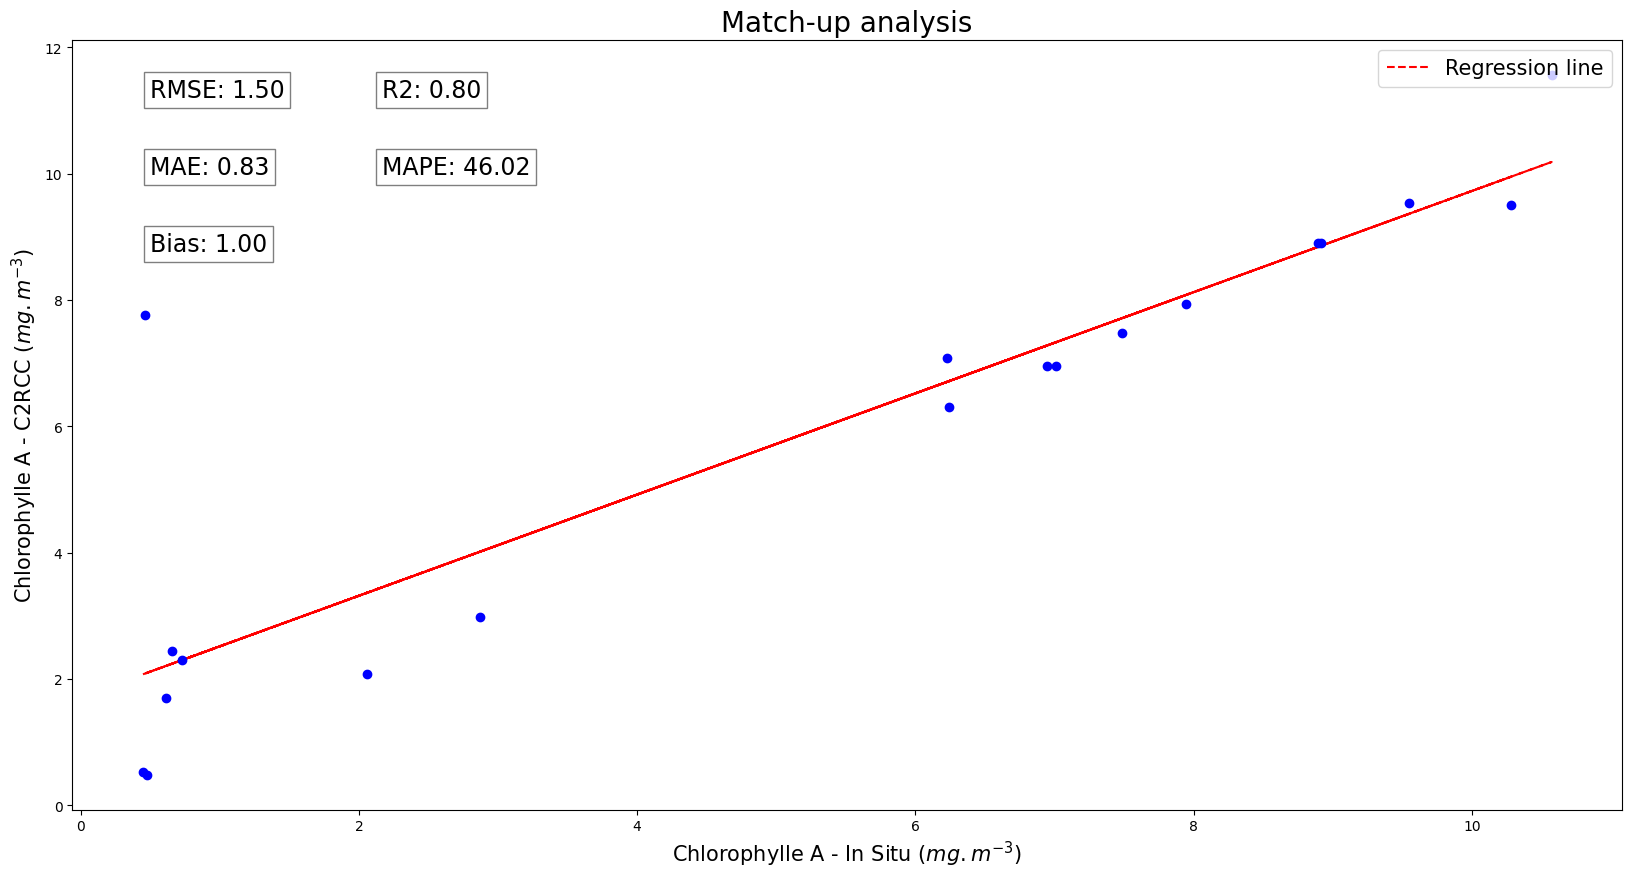

DatePicker(value=Timestamp('2022-09-30 00:00:00'), description='Start Date', step=1)

DatePicker(value=Timestamp('2023-10-30 00:00:00'), description='End Date', step=1)

Output()

In [13]:
# Calculate the regression between the two columns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr
import numpy as np

# Drop rows that have the dates: 2022-10-22 10:50:09, 2023-01-18 11:04:01, 2023-04-08 10:56:21
dates_to_remove = ['2022-10-22 10:50:09', '2023-01-18 11:04:01', '2023-04-08 10:56:21', '2023-02-07 11:02:21']
for date in dates_to_remove:
    df_c2rcc = df_c2rcc.drop(df_c2rcc[df_c2rcc['Date'] == date].index)

# Create a new dataframe with the columns chlorophyllle A and conc_chl
df_c2rcc2 = df_c2rcc[['chlorophylle A - Adjusted', 'conc_chl_mean', 'Date']].dropna()
display(df_c2rcc2)
# Create the linear regression model
model = LinearRegression()
model.fit(df_c2rcc2[['conc_chl_mean']], df_c2rcc2[['chlorophylle A - Adjusted']])

# Create columns with logaritmic in base 10 values of chlorophyllle A and conc_chl
df_c2rcc2['log_chlorophylle A - Adjusted'] = np.log10(df_c2rcc2['chlorophylle A - Adjusted'])
df_c2rcc2['log_conc_chl_mean'] = np.log10(df_c2rcc2['conc_chl_mean'])
model2 = LinearRegression()
model2.fit(df_c2rcc2[['log_conc_chl_mean']], df_c2rcc2[['log_chlorophylle A - Adjusted']])

print('Intercept:', model.intercept_)
print('Coefficient:', model.coef_)
# print('$$R^{2}$$:', model.score(df_c2rcc2[['conc_chl_mean']], df_c2rcc2[['chlorophylle A - Adjusted']]))
# print('RMSE:', mean_squared_error(df_c2rcc2[['chlorophylle A - Adjusted']], model.predict(df_c2rcc2[['conc_chl_mean']])) ** 0.5)
# print('MAE:', mean_absolute_error(df_c2rcc2[['chlorophylle A - Adjusted']], model.predict(df_c2rcc2[['conc_chl_mean']])))
# print('MAPE:', np.mean(np.abs((model.predict(df_c2rcc2[['conc_chl_mean']]) - df_c2rcc2[['chlorophylle A - Adjusted']]) / df_c2rcc2[['chlorophylle A - Adjusted']])) * 100)
# print('Bias:', 10 ** (np.mean(np.sum(model2.predict(df_c2rcc2[['log_conc_chl_mean']]).T - df_c2rcc2[['log_chlorophylle A - Adjusted']].values))))


# Plot the regression line
fig, ax = plt.subplots(figsize=(20, 10))
#Plot errors bars
ax.errorbar(df_c2rcc2['conc_chl_mean'], df_c2rcc2['chlorophylle A - Adjusted'], fmt='o', color='blue', ecolor='lightgray', elinewidth=3, capsize=0)
ax.plot(df_c2rcc2['conc_chl_mean'], model.predict(df_c2rcc2[['conc_chl_mean']]), ls='--', color='red', label='Regression line')

plt.xlabel('Chlorophylle A - In Situ ($mg.m^{-3}$)', fontsize=15)
plt.ylabel('Chlorophylle A - C2RCC ($mg.m^{-3}$)', fontsize=15)
# Text box with each metric value
ax.text(0.05, 0.95, f'RMSE: {mean_squared_error(df_c2rcc2[["chlorophylle A - Adjusted"]], model.predict(df_c2rcc2[["conc_chl_mean"]])) ** 0.5:.2f}', transform=ax.transAxes, fontsize=17, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax.text(0.20, 0.95, f'R2: {model.score(df_c2rcc2[["conc_chl_mean"]],df_c2rcc2[["chlorophylle A - Adjusted"]]):.2f}', transform=ax.transAxes, fontsize=17, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax.text(0.05, 0.85, f'MAE: {mean_absolute_error(df_c2rcc2[["chlorophylle A - Adjusted"]], model.predict(df_c2rcc2[["conc_chl_mean"]])):.2f}', transform=ax.transAxes, fontsize=17, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax.text(0.20, 0.85, f'MAPE: {np.mean(np.abs((model.predict(df_c2rcc2[["conc_chl_mean"]]) - df_c2rcc2[["chlorophylle A - Adjusted"]]) / df_c2rcc2[["chlorophylle A - Adjusted"]])) * 100:.2f}', transform=ax.transAxes, fontsize=17, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax.text(0.05, 0.75, f'Bias: {10 ** (np.mean(np.sum(model2.predict(df_c2rcc2[["log_conc_chl_mean"]]).T - df_c2rcc2[["log_chlorophylle A - Adjusted"]].values))):.2f}', transform=ax.transAxes, fontsize=17, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

plt.title('Match-up analysis', fontsize=20)
plt.legend(fontsize=15, loc='upper right')
plt.show()

# Plot the graphic comparing the values of chlorophyllle A and conc_chl

# Setting index for c2rcc and df_loco if its not
if df_c2rcc.index.name != 'Date':   
    df_c2rcc.set_index('Date', inplace=True)
if df_loco.index.name != 'time':
    df_loco.set_index('time', inplace=True)
    
# Create a slider widget for selecting the time range
start_date_widget = widgets.DatePicker(description='Start Date', value=pd.to_datetime('2022-09-30'))
end_date_widget = widgets.DatePicker(description='End Date', value=pd.to_datetime('2023-10-30'))
# Define a function to update the plot based on the selected time range
def update_plot(start_date, end_date):
    filtered_df = df_loco.loc[start_date:end_date]
    filtered_df2 = df_c2rcc.loc[start_date:end_date]

    # conc_chl_mean_windows_3x3	conc_chl_sigma_windows_3x3	conc_chl_mean_windows_5x5	conc_chl_sigma_windows_5x5	conc_chl_mean	conc_chl_sigma
  
    
    # Resample the data to daily frequency and calculate the mean for each day
    daily_mean1 = filtered_df['chlorophylle A'].resample('D').median()
    daily_mean2 = filtered_df2['chlorophylle A - Adjusted'].resample('D').mean()
    daily_mean3 = filtered_df2['conc_chl_mean'].resample('D').mean()

    # Resample the errors to daily frequency and calculate the mean for each day
    daily_mean1_unc = filtered_df['chlorophylle A'].resample('D').std()
    daily_mean3_unc = filtered_df2['conc_chl_sigma'].resample('D').mean()

    # Create a figure with two subplots
    fig, ax1 = plt.subplots(figsize=(20, 10))

    # Plot data and the errors
    ax1.errorbar(daily_mean1.index, daily_mean1, marker='o', label='Chlorophylle A - In Situ (Median)')
    ax1.errorbar(daily_mean2.index, daily_mean2, marker='o', label='Chlorophylle A - In situ adjusted')
    ax1.errorbar(daily_mean3.index, daily_mean3, yerr=daily_mean3_unc, marker='o', label='Chlorophylle A - C2RCC (All pixels)')

    # Set the y-axis label
    ax1.set_ylabel('Chlorophylle-A concentration ($mg.m^{-3}$)', fontsize=17)
    ax1.set_xlabel('Date', fontsize=17)
    # Setting font size for values in axes
    ax1.tick_params(axis='both', which='major', labelsize=14)
    ax1.set_ylim(0)
    ax1.set_title('Time series of C2RCC chlorophylle-A concentration by different methods', fontsize=20)
    ax1.legend(fontsize=14)
    
    # Format x-axis ticks as months (mm/yyyy)
    ax1.xaxis.set_major_locator(mdates.MonthLocator())
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
    
    plt.tight_layout()
    plt.show()

# Create an interactive output widget
output = widgets.interactive_output(update_plot, {'start_date': start_date_widget, 'end_date': end_date_widget})

# Display the widgets and the output
display(start_date_widget, end_date_widget, output)

# Reset index of df_c2rcc and df_loco
df_c2rcc.reset_index(inplace=True)
df_loco.reset_index(inplace=True)


Calculation for windows 5x5

Date  conc_chl_mean_windows_3x3  conc_chl_sigma_windows_3x3  \
0  2022-10-07 10:49:31                        NaN                         NaN   
1  2022-11-01 10:51:09                   9.471119                    2.557038   
2  2022-11-04 11:01:29                        NaN                    0.000000   
3  2023-02-14 10:51:41                   5.278747                    2.397119   
4  2023-02-27 11:00:11                   6.899830                    2.421804   
5  2023-04-03 10:56:29                  13.913920                    3.389864   
6  2023-04-05 10:50:31                   1.681173                    0.369453   
7  2023-05-20 10:46:29                   0.809154                    0.209672   
8  2023-05-25 10:50:31                   0.665112                    0.144003   
9  2023-05-30 10:46:29                   6.164752                    3.611279   
10 2023-06-02 10:56:29                  16.235210                    1.877222   
11 2023-06-04 10:46:21                   0.750066                    0.134685   
12 2023-06-07 10:56:21                   6.508852                    2.893099   
13 2023-06-14 10:50:31                   0.730937                    0.176955   
14 2023-08-21 10:56:29                   5.423819                    1.116618   
15 2023-09-02 10:46:31                   0.635112                    0.349202   
16 2023-09-07 10:46:29                   0.534971                    0.282588   
17 2023-09-10 10:56:29                   9.208801                    1.819772   
18 2023-09-15 10:57:01                   9.119094                    2.814362   

    conc_chl_mean_windows_5x5  conc_chl_sigma_windows_5x5  conc_chl_mean  \
0                         NaN                         NaN         6.2294   
1                    9.333033                    4.237271         6.9454   
2                   13.798728                    2.446890         7.9442   
3                    4.430862                    2.393104         2.8740   
4                    7.112814                    3.282846         8.8938   
5                   13.319674                    2.930308        10.2803   
6                    2.109381                    1.056433         2.0556   
7                    0.779681                    0.220284         0.6171   
8                    0.651485                    0.120573         0.4611   
9                    5.942648                    4.397751         7.4886   
10                  15.742447                    3.425295        10.5732   
11                   0.705684                    0.214326         0.6573   
12                   5.118840                    3.144121         6.2443   
13                   0.708931                    0.187503         0.7257   
14                   6.108286                    3.236762         7.0140   
15                   0.681935                    0.362955         0.4775   
16                   0.471866                    0.196976         0.4451   
17                  10.076584                    3.534795         8.9122   
18                  10.100758                    3.645483         9.5504   

    conc_chl_sigma  chlorophylle A - Adjusted  
0           6.4602                       7.08  
1           5.4899                       6.96  
2           6.1450                       7.94  
3           2.0489                       2.99  
4           5.6287                       8.90  
5           5.3384                       9.50  
6           1.7481                       2.08  
7           0.3481                       1.70  
8           0.4450                       7.76  
9           5.5569                       7.48  
10          6.5211                      11.57  
11          0.4244                       2.45  
12          5.2617                       6.30  
13          0.4831                       2.30  
14          4.9973                       6.96  
15          0.5391                       0.49  
16          0.6097                       0.53  
17          

Intercept: [2.26050837]
Coefficient: [[0.61672812]]


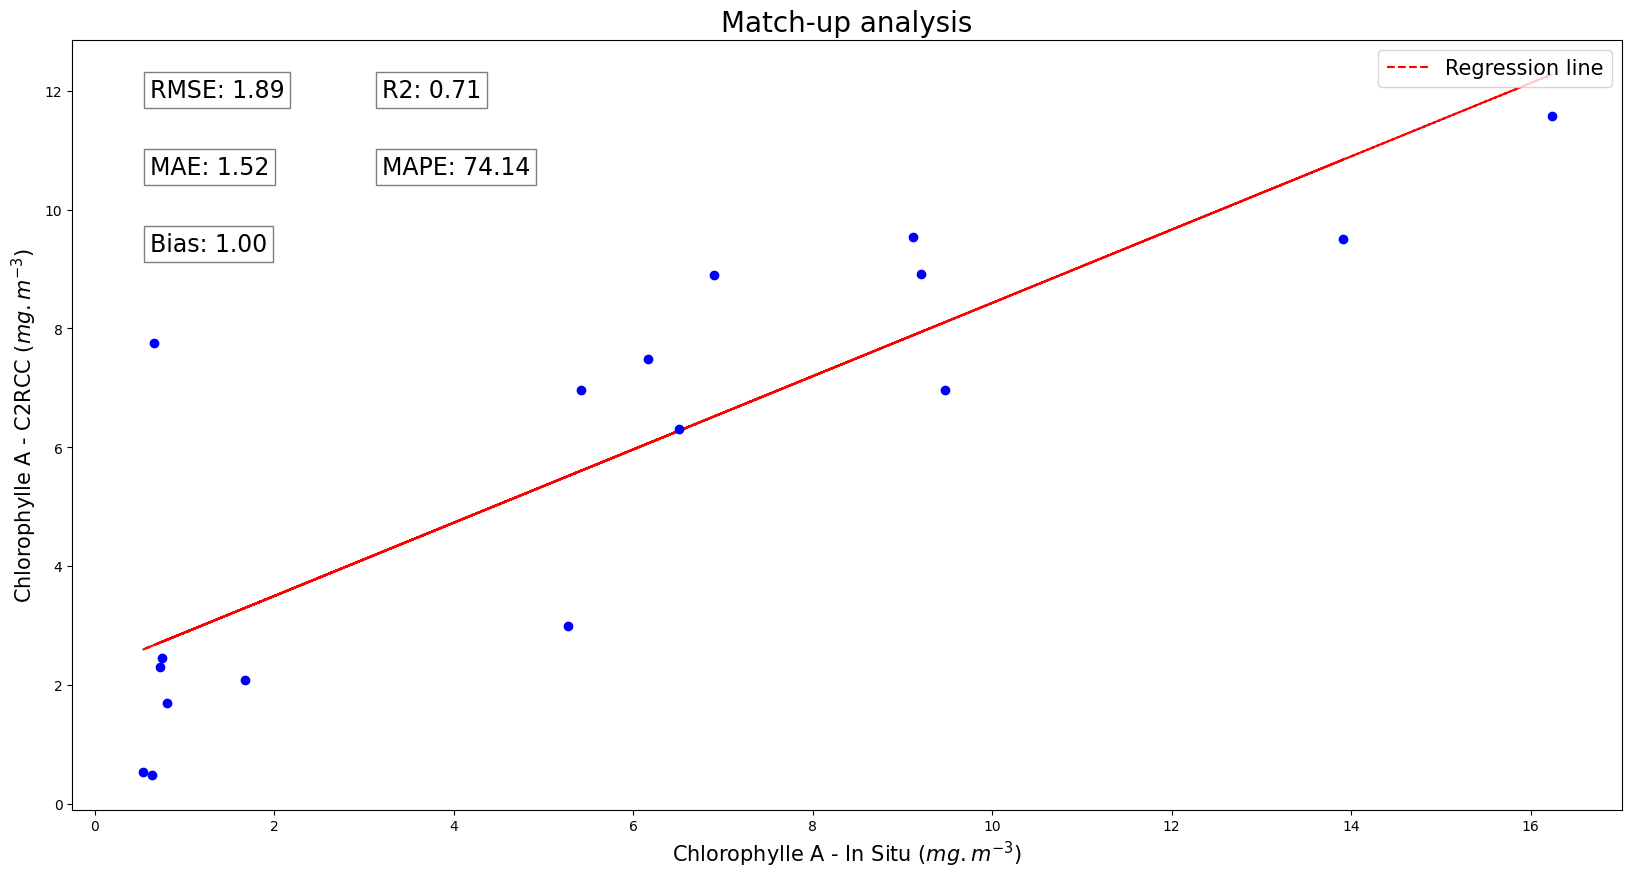

DatePicker(value=Timestamp('2022-09-30 00:00:00'), description='Start Date', step=1)

DatePicker(value=Timestamp('2023-10-30 00:00:00'), description='End Date', step=1)

Output()

In [127]:
# Calculate the regression between the two columns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr
import numpy as np

# Drop rows that have the dates: 2022-10-22 10:50:09, 2023-01-18 11:04:01, 2023-04-08 10:56:21
dates_to_remove = ['2022-10-22 10:50:09', '2023-01-18 11:04:01', '2023-04-08 10:56:21', '2023-02-07 11:02:21']
for date in dates_to_remove:
    df_c2rcc = df_c2rcc.drop(df_c2rcc[df_c2rcc['Date'] == date].index)
display(df_c2rcc)
# Create a new dataframe with the columns chlorophyllle A and conc_chl
df_c2rcc2 = df_c2rcc[['chlorophylle A - Adjusted', 'conc_chl_mean_windows_3x3']].dropna()

# Create the linear regression model
model = LinearRegression()
model.fit(df_c2rcc2[['conc_chl_mean_windows_3x3']], df_c2rcc2[['chlorophylle A - Adjusted']])

# Create columns with logaritmic in base 10 values of chlorophyllle A and conc_chl
df_c2rcc2['log_chlorophylle A - Adjusted'] = np.log10(df_c2rcc2['chlorophylle A - Adjusted'])
df_c2rcc2['log_conc_chl_mean'] = np.log10(df_c2rcc2['conc_chl_mean_windows_3x3'])
model2 = LinearRegression()
model2.fit(df_c2rcc2[['log_conc_chl_mean']], df_c2rcc2[['log_chlorophylle A - Adjusted']])

print('Intercept:', model.intercept_)
print('Coefficient:', model.coef_)
# print('$$R^{2}$$:', model.score(df_c2rcc2[['conc_chl_mean']], df_c2rcc2[['chlorophylle A - Adjusted']]))
# print('RMSE:', mean_squared_error(df_c2rcc2[['chlorophylle A - Adjusted']], model.predict(df_c2rcc2[['conc_chl_mean']])) ** 0.5)
# print('MAE:', mean_absolute_error(df_c2rcc2[['chlorophylle A - Adjusted']], model.predict(df_c2rcc2[['conc_chl_mean']])))
# print('MAPE:', np.mean(np.abs((model.predict(df_c2rcc2[['conc_chl_mean']]) - df_c2rcc2[['chlorophylle A - Adjusted']]) / df_c2rcc2[['chlorophylle A - Adjusted']])) * 100)
# print('Bias:', 10 ** (np.mean(np.sum(model2.predict(df_c2rcc2[['log_conc_chl_mean']]).T - df_c2rcc2[['log_chlorophylle A - Adjusted']].values))))


# Plot the regression line
fig, ax = plt.subplots(figsize=(20, 10))
#Plot errors bars
ax.errorbar(df_c2rcc2['conc_chl_mean_windows_3x3'], df_c2rcc2['chlorophylle A - Adjusted'], fmt='o', color='blue', ecolor='lightgray', elinewidth=3, capsize=0)
ax.plot(df_c2rcc2['conc_chl_mean_windows_3x3'], model.predict(df_c2rcc2[['conc_chl_mean_windows_3x3']]), ls='--', color='red', label='Regression line')

plt.xlabel('Chlorophylle A - In Situ ($mg.m^{-3}$)', fontsize=15)
plt.ylabel('Chlorophylle A - C2RCC ($mg.m^{-3}$)', fontsize=15)
# Text box with each metric value
ax.text(0.05, 0.95, f'RMSE: {mean_squared_error(df_c2rcc2[["chlorophylle A - Adjusted"]], model.predict(df_c2rcc2[["conc_chl_mean_windows_3x3"]])) ** 0.5:.2f}', transform=ax.transAxes, fontsize=17, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax.text(0.20, 0.95, f'R2: {model.score(df_c2rcc2[["conc_chl_mean_windows_3x3"]],df_c2rcc2[["chlorophylle A - Adjusted"]]):.2f}', transform=ax.transAxes, fontsize=17, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax.text(0.05, 0.85, f'MAE: {mean_absolute_error(df_c2rcc2[["chlorophylle A - Adjusted"]], model.predict(df_c2rcc2[["conc_chl_mean_windows_3x3"]])):.2f}', transform=ax.transAxes, fontsize=17, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax.text(0.20, 0.85, f'MAPE: {np.mean(np.abs((model.predict(df_c2rcc2[["conc_chl_mean_windows_3x3"]]) - df_c2rcc2[["chlorophylle A - Adjusted"]]) / df_c2rcc2[["chlorophylle A - Adjusted"]])) * 100:.2f}', transform=ax.transAxes, fontsize=17, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax.text(0.05, 0.75, f'Bias: {10 ** (np.mean(np.sum(model2.predict(df_c2rcc2[["log_conc_chl_mean"]]).T - df_c2rcc2[["log_chlorophylle A - Adjusted"]].values))):.2f}', transform=ax.transAxes, fontsize=17, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

plt.title('Match-up analysis', fontsize=20)
plt.legend(fontsize=15, loc='upper right')
plt.show()

# Plot the graphic comparing the values of chlorophyllle A and conc_chl

# Setting index for c2rcc and df_loco if its not
if df_c2rcc.index.name != 'Date':   
    df_c2rcc.set_index('Date', inplace=True)
if df_loco.index.name != 'time':
    df_loco.set_index('time', inplace=True)
    
# Create a slider widget for selecting the time range
start_date_widget = widgets.DatePicker(description='Start Date', value=pd.to_datetime('2022-09-30'))
end_date_widget = widgets.DatePicker(description='End Date', value=pd.to_datetime('2023-10-30'))
# Define a function to update the plot based on the selected time range
def update_plot(start_date, end_date):
    filtered_df = df_loco.loc[start_date:end_date]
    filtered_df2 = df_c2rcc.loc[start_date:end_date]

    # conc_chl_mean_windows_3x3	conc_chl_sigma_windows_3x3	conc_chl_mean_windows_5x5	conc_chl_sigma_windows_5x5	conc_chl_mean	conc_chl_sigma
  
    
    # Resample the data to daily frequency and calculate the mean for each day
    daily_mean1 = filtered_df['chlorophylle A'].resample('D').median()
    daily_mean2 = filtered_df2['chlorophylle A - Adjusted'].resample('D').mean()
    daily_mean3 = filtered_df2['conc_chl_mean_windows_3x3'].resample('D').mean()

    # Resample the errors to daily frequency and calculate the mean for each day
    daily_mean1_unc = filtered_df['chlorophylle A'].resample('D').std()
    daily_mean3_unc = filtered_df2['conc_chl_sigma_windows_3x3'].resample('D').mean()

    # Create a figure with two subplots
    fig, ax1 = plt.subplots(figsize=(20, 10))

    # Plot data and the errors
    ax1.errorbar(daily_mean1.index, daily_mean1, marker='o', label='Chlorophylle A - In Situ (Median)')
    ax1.errorbar(daily_mean2.index, daily_mean2, marker='o', label='Chlorophylle A - In situ adjusted')
    ax1.errorbar(daily_mean3.index, daily_mean3, yerr=daily_mean3_unc, marker='o', label='Chlorophylle A - C2RCC (3x3 window)')

    # Set the y-axis label
    ax1.set_ylabel('Chlorophylle-A concentration ($mg.m^{-3}$)', fontsize=17)
    ax1.set_xlabel('Date', fontsize=17)
    # Setting font size for values in axes
    ax1.tick_params(axis='both', which='major', labelsize=14)
    ax1.set_ylim(0)
    ax1.set_title('Time series of C2RCC chlorophylle-A concentration by different methods', fontsize=20)
    ax1.legend(fontsize=14)
    
    # Format x-axis ticks as months (mm/yyyy)
    ax1.xaxis.set_major_locator(mdates.MonthLocator())
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
    
    plt.tight_layout()
    plt.show()

# Create an interactive output widget
output = widgets.interactive_output(update_plot, {'start_date': start_date_widget, 'end_date': end_date_widget})

# Display the widgets and the output
display(start_date_widget, end_date_widget, output)

# Reset index of df_c2rcc and df_loco
df_c2rcc.reset_index(inplace=True)
df_loco.reset_index(inplace=True)


chlorophylle A - Adjusted  conc_chl_mean_windows_5x5
1                        6.96                   9.333033
2                        7.94                  13.798728
3                        2.99                   4.430862
4                        8.90                   7.112814
5                        9.50                  13.319674
6                        2.08                   2.109381
7                        1.70                   0.779681
8                        7.76                   0.651485
9                        7.48                   5.942648
10                      11.57                  15.742447
11                       2.45                   0.705684
12                       6.30                   5.118840
13                       2.30                   0.708931
14                       6.96                   6.108286
15                       0.49                   0.681935
16                       0.53                   0.471866
17                       8.91                  10.076584
18                       9.54                  10.100758

Intercept: [2.33421833]
Coefficient: [[0.58160235]]


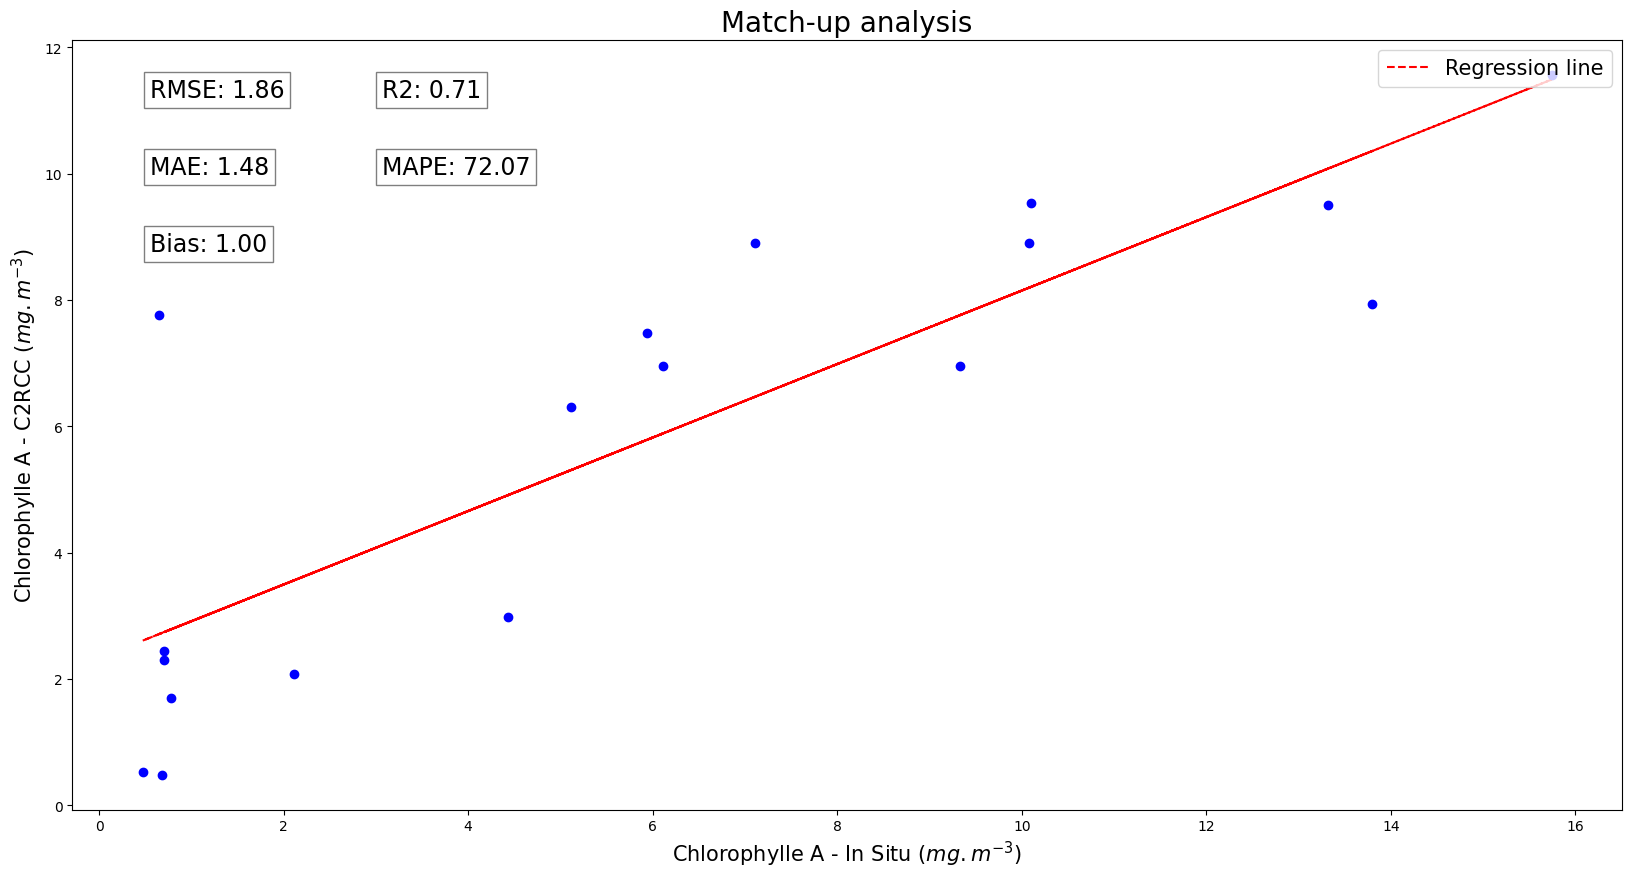

DatePicker(value=Timestamp('2022-09-30 00:00:00'), description='Start Date', step=1)

DatePicker(value=Timestamp('2023-10-30 00:00:00'), description='End Date', step=1)

Output()

In [129]:
# Calculate the regression between the two columns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr
import numpy as np

# Drop rows that have the dates: 2022-10-22 10:50:09, 2023-01-18 11:04:01, 2023-04-08 10:56:21
dates_to_remove = ['2022-10-22 10:50:09', '2023-01-18 11:04:01', '2023-04-08 10:56:21', '2023-02-07 11:02:21']
for date in dates_to_remove:
    df_c2rcc = df_c2rcc.drop(df_c2rcc[df_c2rcc['Date'] == date].index)

# Create a new dataframe with the columns chlorophyllle A and conc_chl
df_c2rcc2 = df_c2rcc[['chlorophylle A - Adjusted', 'conc_chl_mean_windows_5x5']].dropna()
display(df_c2rcc2)
# Create the linear regression model
model = LinearRegression()
model.fit(df_c2rcc2[['conc_chl_mean_windows_5x5']], df_c2rcc2[['chlorophylle A - Adjusted']])

# Create columns with logaritmic in base 10 values of chlorophyllle A and conc_chl
df_c2rcc2['log_chlorophylle A - Adjusted'] = np.log10(df_c2rcc2['chlorophylle A - Adjusted'])
df_c2rcc2['log_conc_chl_mean'] = np.log10(df_c2rcc2['conc_chl_mean_windows_5x5'])
model2 = LinearRegression()
model2.fit(df_c2rcc2[['log_conc_chl_mean']], df_c2rcc2[['log_chlorophylle A - Adjusted']])

print('Intercept:', model.intercept_)
print('Coefficient:', model.coef_)
# print('$$R^{2}$$:', model.score(df_c2rcc2[['conc_chl_mean']], df_c2rcc2[['chlorophylle A - Adjusted']]))
# print('RMSE:', mean_squared_error(df_c2rcc2[['chlorophylle A - Adjusted']], model.predict(df_c2rcc2[['conc_chl_mean']])) ** 0.5)
# print('MAE:', mean_absolute_error(df_c2rcc2[['chlorophylle A - Adjusted']], model.predict(df_c2rcc2[['conc_chl_mean']])))
# print('MAPE:', np.mean(np.abs((model.predict(df_c2rcc2[['conc_chl_mean']]) - df_c2rcc2[['chlorophylle A - Adjusted']]) / df_c2rcc2[['chlorophylle A - Adjusted']])) * 100)
# print('Bias:', 10 ** (np.mean(np.sum(model2.predict(df_c2rcc2[['log_conc_chl_mean']]).T - df_c2rcc2[['log_chlorophylle A - Adjusted']].values))))


# Plot the regression line
fig, ax = plt.subplots(figsize=(20, 10))
#Plot errors bars
ax.errorbar(df_c2rcc2['conc_chl_mean_windows_5x5'], df_c2rcc2['chlorophylle A - Adjusted'], fmt='o', color='blue', ecolor='lightgray', elinewidth=3, capsize=0)
ax.plot(df_c2rcc2['conc_chl_mean_windows_5x5'], model.predict(df_c2rcc2[['conc_chl_mean_windows_5x5']]), ls='--', color='red', label='Regression line')

plt.xlabel('Chlorophylle A - In Situ ($mg.m^{-3}$)', fontsize=15)
plt.ylabel('Chlorophylle A - C2RCC ($mg.m^{-3}$)', fontsize=15)
# Text box with each metric value
ax.text(0.05, 0.95, f'RMSE: {mean_squared_error(df_c2rcc2[["chlorophylle A - Adjusted"]], model.predict(df_c2rcc2[["conc_chl_mean_windows_5x5"]])) ** 0.5:.2f}', transform=ax.transAxes, fontsize=17, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax.text(0.20, 0.95, f'R2: {model.score(df_c2rcc2[["conc_chl_mean_windows_5x5"]],df_c2rcc2[["chlorophylle A - Adjusted"]]):.2f}', transform=ax.transAxes, fontsize=17, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax.text(0.05, 0.85, f'MAE: {mean_absolute_error(df_c2rcc2[["chlorophylle A - Adjusted"]], model.predict(df_c2rcc2[["conc_chl_mean_windows_5x5"]])):.2f}', transform=ax.transAxes, fontsize=17, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax.text(0.20, 0.85, f'MAPE: {np.mean(np.abs((model.predict(df_c2rcc2[["conc_chl_mean_windows_5x5"]]) - df_c2rcc2[["chlorophylle A - Adjusted"]]) / df_c2rcc2[["chlorophylle A - Adjusted"]])) * 100:.2f}', transform=ax.transAxes, fontsize=17, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax.text(0.05, 0.75, f'Bias: {10 ** (np.mean(np.sum(model2.predict(df_c2rcc2[["log_conc_chl_mean"]]).T - df_c2rcc2[["log_chlorophylle A - Adjusted"]].values))):.2f}', transform=ax.transAxes, fontsize=17, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

plt.title('Match-up analysis', fontsize=20)
plt.legend(fontsize=15, loc='upper right')
plt.show()

# Plot the graphic comparing the values of chlorophyllle A and conc_chl

# Setting index for c2rcc and df_loco if its not
if df_c2rcc.index.name != 'Date':   
    df_c2rcc.set_index('Date', inplace=True)
if df_loco.index.name != 'time':
    df_loco.set_index('time', inplace=True)
    
# Create a slider widget for selecting the time range
start_date_widget = widgets.DatePicker(description='Start Date', value=pd.to_datetime('2022-09-30'))
end_date_widget = widgets.DatePicker(description='End Date', value=pd.to_datetime('2023-10-30'))
# Define a function to update the plot based on the selected time range
def update_plot(start_date, end_date):
    filtered_df = df_loco.loc[start_date:end_date]
    filtered_df2 = df_c2rcc.loc[start_date:end_date]

    # conc_chl_mean_windows_3x3	conc_chl_sigma_windows_3x3	conc_chl_mean_windows_5x5	conc_chl_sigma_windows_5x5	conc_chl_mean	conc_chl_sigma
  
    
    # Resample the data to daily frequency and calculate the mean for each day
    daily_mean1 = filtered_df['chlorophylle A'].resample('D').median()
    daily_mean2 = filtered_df2['chlorophylle A - Adjusted'].resample('D').mean()
    daily_mean3 = filtered_df2['conc_chl_mean_windows_5x5'].resample('D').mean()

    # Resample the errors to daily frequency and calculate the mean for each day
    daily_mean1_unc = filtered_df['chlorophylle A'].resample('D').std()
    daily_mean3_unc = filtered_df2['conc_chl_sigma_windows_5x5'].resample('D').mean()

    # Create a figure with two subplots
    fig, ax1 = plt.subplots(figsize=(20, 10))

    # Plot data and the errors
    ax1.errorbar(daily_mean1.index, daily_mean1, marker='o', label='Chlorophylle A - In Situ (Median)')
    ax1.errorbar(daily_mean2.index, daily_mean2, marker='o', label='Chlorophylle A - In situ adjusted')
    ax1.errorbar(daily_mean3.index, daily_mean3, yerr=daily_mean3_unc, marker='o', label='Chlorophylle A - C2RCC (5x5 window)')

    # Set the y-axis label
    ax1.set_ylabel('Chlorophylle-A concentration ($mg.m^{-3}$)', fontsize=17)
    ax1.set_xlabel('Date', fontsize=17)
    # Setting font size for values in axes
    ax1.tick_params(axis='both', which='major', labelsize=14)
    ax1.set_ylim(0)
    ax1.set_title('Time series of C2RCC chlorophylle-A concentration by different methods', fontsize=20)
    ax1.legend(fontsize=14)
    
    # Format x-axis ticks as months (mm/yyyy)
    ax1.xaxis.set_major_locator(mdates.MonthLocator())
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
    
    plt.tight_layout()
    plt.show()

# Create an interactive output widget
output = widgets.interactive_output(update_plot, {'start_date': start_date_widget, 'end_date': end_date_widget})

# Display the widgets and the output
display(start_date_widget, end_date_widget, output)

# Reset index of df_c2rcc and df_loco
df_c2rcc.reset_index(inplace=True)
df_loco.reset_index(inplace=True)


In [107]:
df_c2rcc

Date  conc_chl_mean_windows_3x3  conc_chl_sigma_windows_3x3  \
0  2022-10-07 10:49:31                        NaN                         NaN   
1  2022-10-22 10:50:09                        NaN                         NaN   
2  2022-11-01 10:51:09                   9.471119                    2.557038   
3  2022-11-04 11:01:29                        NaN                    0.000000   
4  2023-01-18 11:04:01                   5.915650                    4.918062   
5  2023-02-07 11:02:21                  11.409929                    1.973134   
6  2023-02-14 10:51:41                   5.278747                    2.397119   
7  2023-02-27 11:00:11                   6.899830                    2.421804   
8  2023-04-03 10:56:29                  13.913920                    3.389864   
9  2023-04-05 10:50:31                   1.681173                    0.369453   
10 2023-04-08 10:56:21                   8.845940                    5.476615   
11 2023-05-20 10:46:29                   0.809154                    0.209672   
12 2023-05-25 10:50:31                   0.665112                    0.144003   
13 2023-05-30 10:46:29                   6.164752                    3.611279   
14 2023-06-02 10:56:29                  16.235210                    1.877222   
15 2023-06-04 10:46:21                   0.750066                    0.134685   
16 2023-06-07 10:56:21                   6.508852                    2.893099   
17 2023-06-14 10:50:31                   0.730937                    0.176955   
18 2023-08-21 10:56:29                   5.423819                    1.116618   
19 2023-09-02 10:46:31                   0.635112                    0.349202   
20 2023-09-07 10:46:29                   0.534971                    0.282588   
21 2023-09-10 10:56:29                   9.208801                    1.819772   
22 2023-09-15 10:57:01                   9.119094                    2.814362   

    conc_chl_mean_windows_5x5  conc_chl_sigma_windows_5x5  conc_chl_mean  \
0                         NaN                         NaN         6.2294   
1                         NaN                         NaN         8.9381   
2                    9.333033                    4.237271         6.9454   
3                   13.798728                    2.446890         7.9442   
4                    6.500003                    5.882575         5.8767   
5                   11.999173                    3.076847        12.0182   
6                    4.430862                    2.393104         2.8740   
7                    7.112814                    3.282846         8.8938   
8                   13.319674                    2.930308        10.2803   
9                    2.109381                    1.056433         2.0556   
10                   9.166418                    6.397438         7.9593   
11                   0.779681                    0.220284         0.6171   
12                   0.651485                    0.120573         0.4611   
13                   5.942648                    4.397751         7.4886   
14                  15.742447                    3.425295        10.5732   
15                   0.705684                    0.214326         0.6573   
16                   5.118840                    3.144121         6.2443   
17                   0.708931                    0.187503         0.7257   
18                   6.108286                    3.236762         7.0140   
19                   0.681935                    0.362955         0.4775   
20                   0.471866                    0.196976         0.4451   
21                  10.076584                    3.534795         8.9122   
22                  10.100758                    3.645483         9.5504   

    conc_chl_sigma  chlorophylle A - Adjusted  
0           6.4602                       7.08  
1           4.6267                       6.40  
2           5.4899                       6.96  
3           6.1450                       7.94  
4       

In [104]:
df_c2rcc[['chlorophylle A - Adjusted', 'conc_chl_mean']]

chlorophylle A - Adjusted  conc_chl_mean
Date                                                         
2022-10-07 10:49:31                       7.08         6.2294
2022-10-22 10:50:09                       6.40         8.9381
2022-11-01 10:51:09                       6.96         6.9454
2022-11-04 11:01:29                       7.94         7.9442
2023-01-18 11:04:01                       0.77         5.8767
2023-02-07 11:02:21                      10.18        12.0182
2023-02-14 10:51:41                       2.99         2.8740
2023-02-27 11:00:11                       8.90         8.8938
2023-04-03 10:56:29                       9.50        10.2803
2023-04-05 10:50:31                       2.08         2.0556
2023-04-08 10:56:21                       4.53         7.9593
2023-05-20 10:46:29                       1.70         0.6171
2023-05-25 10:50:31                       7.76         0.4611
2023-05-30 10:46:29                       7.48         7.4886
2023-06-02 10:56:29                      11.57        10.5732
2023-06-04 10:46:21                       2.45         0.6573
2023-06-07 10:56:21                       6.30         6.2443
2023-06-14 10:50:31                       2.30         0.7257
2023-08-21 10:56:29                       6.96         7.0140
2023-09-02 10:46:31                       0.49         0.4775
2023-09-07 10:46:29                       0.53         0.4451
2023-09-10 10:56:29                       8.91         8.9122
2023-09-15 10:57:01                       9.54         9.5504

Alguns dos valores estão bem deslocados (22/10/2022 10:50, 18/1/2023 11:04, 8/4/2023 10:56) - Remover das imagens

#### Consolidation of all Scatter plotsfor each extraction method

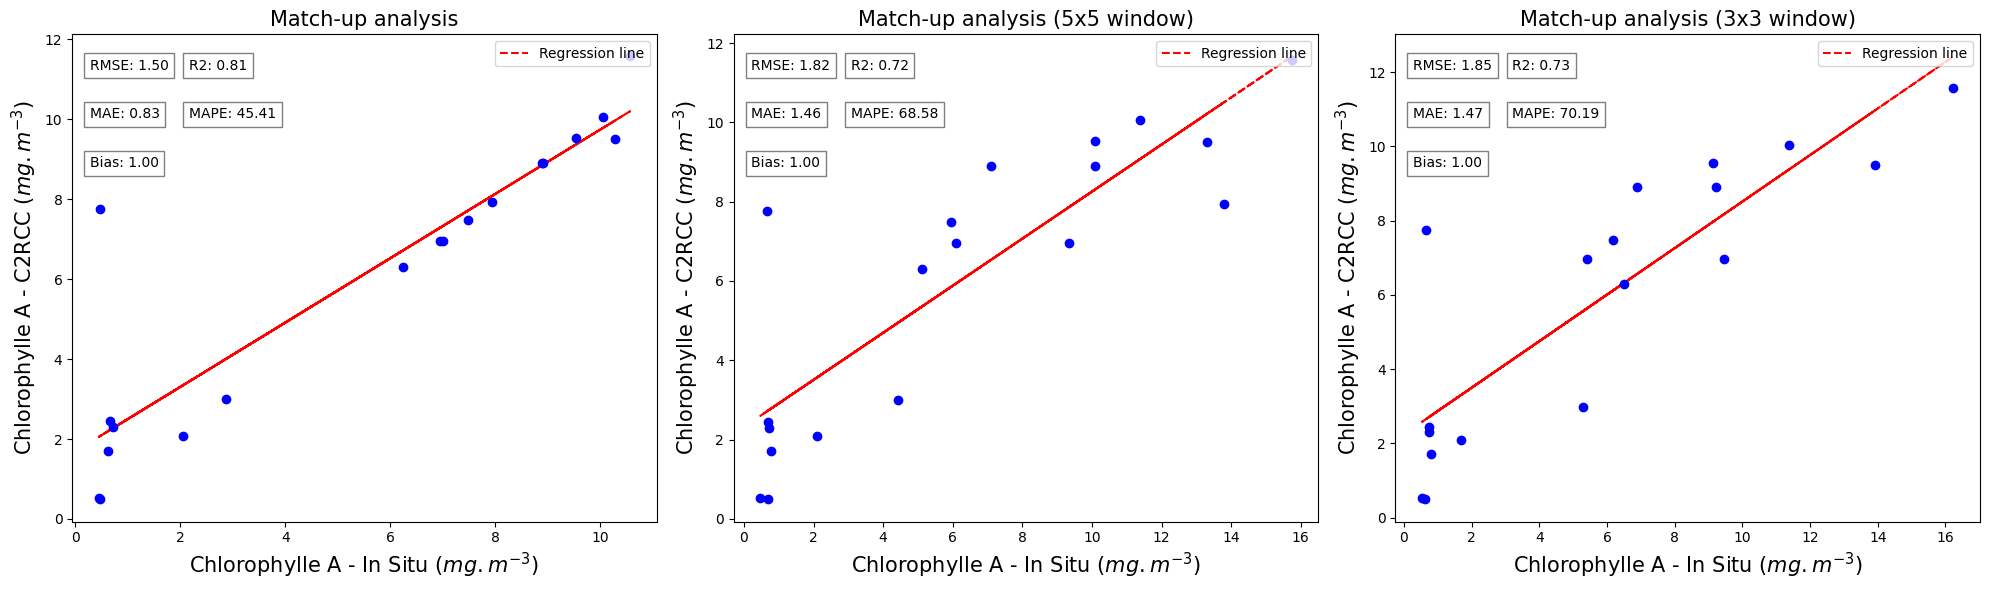

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming you have df_c2rcc dataframe available

# Drop rows that have the dates: 2022-10-22 10:50:09, 2023-01-18 11:04:01, 2023-04-08 10:56:21
dates_to_remove = ['2022-10-22 10:50:09', '2023-01-18 11:04:01', '2023-04-08 10:56:21', '2023-02-07 11:02:21']
for date in dates_to_remove:
    df_c2rcc = df_c2rcc.drop(df_c2rcc[df_c2rcc['Date'] == date].index)

# Plot 1
df_c2rcc2 = df_c2rcc[['chlorophylle A - Adjusted', 'conc_chl_mean', 'Date']].dropna()
model = LinearRegression()
model.fit(df_c2rcc2[['conc_chl_mean']], df_c2rcc2[['chlorophylle A - Adjusted']])
df_c2rcc2['log_chlorophylle A - Adjusted'] = np.log10(df_c2rcc2['chlorophylle A - Adjusted'])
df_c2rcc2['log_conc_chl_mean'] = np.log10(df_c2rcc2['conc_chl_mean'])
model2 = LinearRegression()
model2.fit(df_c2rcc2[['log_conc_chl_mean']], df_c2rcc2[['log_chlorophylle A - Adjusted']])
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
ax[0].errorbar(df_c2rcc2['conc_chl_mean'], df_c2rcc2['chlorophylle A - Adjusted'], fmt='o', color='blue', ecolor='lightgray', elinewidth=3, capsize=0)
ax[0].plot(df_c2rcc2['conc_chl_mean'], model.predict(df_c2rcc2[['conc_chl_mean']]), ls='--', color='red', label='Regression line')
ax[0].set_xlabel('Chlorophylle A - In Situ ($mg.m^{-3}$)', fontsize=15)
ax[0].set_ylabel('Chlorophylle A - C2RCC ($mg.m^{-3}$)', fontsize=15)
ax[0].text(0.03, 0.95, f'RMSE: {mean_squared_error(df_c2rcc2[["chlorophylle A - Adjusted"]], model.predict(df_c2rcc2[["conc_chl_mean"]])) ** 0.5:.2f}', transform=ax[0].transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax[0].text(0.20, 0.95, f'R2: {model.score(df_c2rcc2[["conc_chl_mean"]],df_c2rcc2[["chlorophylle A - Adjusted"]]):.2f}', transform=ax[0].transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax[0].text(0.03, 0.85, f'MAE: {mean_absolute_error(df_c2rcc2[["chlorophylle A - Adjusted"]], model.predict(df_c2rcc2[["conc_chl_mean"]])):.2f}', transform=ax[0].transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax[0].text(0.20, 0.85, f'MAPE: {np.mean(np.abs((model.predict(df_c2rcc2[["conc_chl_mean"]]) - df_c2rcc2[["chlorophylle A - Adjusted"]]) / df_c2rcc2[["chlorophylle A - Adjusted"]])) * 100:.2f}', transform=ax[0].transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax[0].text(0.03, 0.75, f'Bias: {10 ** (np.mean(np.sum(model2.predict(df_c2rcc2[["log_conc_chl_mean"]]).T - df_c2rcc2[["log_chlorophylle A - Adjusted"]].values))):.2f}', transform=ax[0].transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax[0].set_title('Match-up analysis', fontsize=15)
ax[0].legend(fontsize=10, loc='upper right')

# Plot 2
df_c2rcc2 = df_c2rcc[['chlorophylle A - Adjusted', 'conc_chl_mean_windows_5x5']].dropna()
model = LinearRegression()
model.fit(df_c2rcc2[['conc_chl_mean_windows_5x5']], df_c2rcc2[['chlorophylle A - Adjusted']])
df_c2rcc2['log_chlorophylle A - Adjusted'] = np.log10(df_c2rcc2['chlorophylle A - Adjusted'])
df_c2rcc2['log_conc_chl_mean'] = np.log10(df_c2rcc2['conc_chl_mean_windows_5x5'])
model2 = LinearRegression()
model2.fit(df_c2rcc2[['log_conc_chl_mean']], df_c2rcc2[['log_chlorophylle A - Adjusted']])
ax[1].errorbar(df_c2rcc2['conc_chl_mean_windows_5x5'], df_c2rcc2['chlorophylle A - Adjusted'], fmt='o', color='blue', ecolor='lightgray', elinewidth=3, capsize=0)
ax[1].plot(df_c2rcc2['conc_chl_mean_windows_5x5'], model.predict(df_c2rcc2[['conc_chl_mean_windows_5x5']]), ls='--', color='red', label='Regression line')
ax[1].set_xlabel('Chlorophylle A - In Situ ($mg.m^{-3}$)', fontsize=15)
ax[1].set_ylabel('Chlorophylle A - C2RCC ($mg.m^{-3}$)', fontsize=15)
ax[1].set_title('Match-up analysis (5x5 window)', fontsize=15)
ax[1].text(0.03, 0.95, f'RMSE: {mean_squared_error(df_c2rcc2[["chlorophylle A - Adjusted"]], model.predict(df_c2rcc2[["conc_chl_mean_windows_5x5"]])) ** 0.5:.2f}', transform=ax[1].transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax[1].text(0.20, 0.95, f'R2: {model.score(df_c2rcc2[["conc_chl_mean_windows_5x5"]],df_c2rcc2[["chlorophylle A - Adjusted"]]):.2f}', transform=ax[1].transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax[1].text(0.03, 0.85, f'MAE: {mean_absolute_error(df_c2rcc2[["chlorophylle A - Adjusted"]], model.predict(df_c2rcc2[["conc_chl_mean_windows_5x5"]])):.2f}', transform=ax[1].transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax[1].text(0.20, 0.85, f'MAPE: {np.mean(np.abs((model.predict(df_c2rcc2[["conc_chl_mean_windows_5x5"]]) - df_c2rcc2[["chlorophylle A - Adjusted"]]) / df_c2rcc2[["chlorophylle A - Adjusted"]])) * 100:.2f}', transform=ax[1].transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax[1].text(0.03, 0.75, f'Bias: {10 ** (np.mean(np.sum(model2.predict(df_c2rcc2[["log_conc_chl_mean"]]).T - df_c2rcc2[["log_chlorophylle A - Adjusted"]].values))):.2f}', transform=ax[1].transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax[1].legend(fontsize=10, loc='upper right')

# Plot 3
df_c2rcc2 = df_c2rcc[['chlorophylle A - Adjusted', 'conc_chl_mean_windows_3x3']].dropna()
model = LinearRegression()
model.fit(df_c2rcc2[['conc_chl_mean_windows_3x3']], df_c2rcc2[['chlorophylle A - Adjusted']])
df_c2rcc2['log_chlorophylle A - Adjusted'] = np.log10(df_c2rcc2['chlorophylle A - Adjusted'])
df_c2rcc2['log_conc_chl_mean'] = np.log10(df_c2rcc2['conc_chl_mean_windows_3x3'])
model2 = LinearRegression()
model2.fit(df_c2rcc2[['log_conc_chl_mean']], df_c2rcc2[['log_chlorophylle A - Adjusted']])
ax[2].errorbar(df_c2rcc2['conc_chl_mean_windows_3x3'], df_c2rcc2['chlorophylle A - Adjusted'], fmt='o', color='blue', ecolor='lightgray', elinewidth=3, capsize=0)
ax[2].plot(df_c2rcc2['conc_chl_mean_windows_3x3'], model.predict(df_c2rcc2[['conc_chl_mean_windows_3x3']]), ls='--', color='red', label='Regression line')
ax[2].set_xlabel('Chlorophylle A - In Situ ($mg.m^{-3}$)', fontsize=15)
ax[2].set_ylabel('Chlorophylle A - C2RCC ($mg.m^{-3}$)', fontsize=15)
ax[2].set_title('Match-up analysis (3x3 window)', fontsize=15)
ax[2].text(0.03, 0.95, f'RMSE: {mean_squared_error(df_c2rcc2[["chlorophylle A - Adjusted"]], model.predict(df_c2rcc2[["conc_chl_mean_windows_3x3"]])) ** 0.5:.2f}', transform=ax[2].transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax[2].text(0.20, 0.95, f'R2: {model.score(df_c2rcc2[["conc_chl_mean_windows_3x3"]],df_c2rcc2[["chlorophylle A - Adjusted"]]):.2f}', transform=ax[2].transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax[2].text(0.03, 0.85, f'MAE: {mean_absolute_error(df_c2rcc2[["chlorophylle A - Adjusted"]], model.predict(df_c2rcc2[["conc_chl_mean_windows_3x3"]])):.2f}', transform=ax[2].transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax[2].text(0.20, 0.85, f'MAPE: {np.mean(np.abs((model.predict(df_c2rcc2[["conc_chl_mean_windows_3x3"]]) - df_c2rcc2[["chlorophylle A - Adjusted"]]) / df_c2rcc2[["chlorophylle A - Adjusted"]])) * 100:.2f}', transform=ax[2].transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax[2].text(0.03, 0.75, f'Bias: {10 ** (np.mean(np.sum(model2.predict(df_c2rcc2[["log_conc_chl_mean"]]).T - df_c2rcc2[["log_chlorophylle A - Adjusted"]].values))):.2f}', transform=ax[2].transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax[2].legend(fontsize=10, loc='upper right')

plt.tight_layout()
plt.show()


Consolidating the metrics in one table

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Create a DataFrame to store the results
results_df_initial = pd.DataFrame(columns=['Metric'])

# Loop through the columns and perform the analysis
for column in ['conc_chl_mean',
               'conc_chl_mean_windows_3x3',
               'conc_chl_mean_windows_5x5'
               ]:
    
    # Cria o modelo de regressão linear
    model = LinearRegression()

    # Ajusta o modelo usando a coluna 'conc_chl' como variável independente e a coluna atual como variável dependente
    df_c2rcc2 = df_c2rcc[['chlorophylle A - Adjusted', column]].dropna()

    model.fit(df_c2rcc2[[column]], df_c2rcc2[['chlorophylle A - Adjusted']])
    
    # Create columns with logaritmic in base 10 values of chlorophyllle A and conc_chl
    df_c2rcc2['log_chlorophylle A - Adjusted'] = np.log10(df_c2rcc2['chlorophylle A - Adjusted'])
    df_c2rcc2[f'log_metric'] = np.log10(df_c2rcc2[column])
    model2 = LinearRegression()
    model2.fit(df_c2rcc2[['log_metric']], df_c2rcc2[['log_chlorophylle A - Adjusted']])

    # Prevê os valores usando o modelo
    predicted_values = model.predict(df_c2rcc2[[column]])

    # Cálculo do R²
    r2 = model.score(df_c2rcc2[[column]], df_c2rcc2[['chlorophylle A - Adjusted']])

    # Calculation of the Root Mean Square Error (RMSE)
    rmse = mean_squared_error(df_c2rcc2[['chlorophylle A - Adjusted']], predicted_values) ** 0.5

    # Calculation of the Mean Absolute Error (MAE)
    mae = mean_absolute_error(df_c2rcc2[['chlorophylle A - Adjusted']], predicted_values)
    
    # Calculation of the Mean Absolute Percentage Error (MAPE)
    mape = np.mean(np.abs((predicted_values- df_c2rcc2[['chlorophylle A - Adjusted']]) / df_c2rcc2[['chlorophylle A - Adjusted']])) * 100

    # Calculation of the Bias
    bias = 10 ** (np.mean(np.sum(model2.predict(df_c2rcc2[[f'log_metric']]).T - df_c2rcc2[['log_chlorophylle A - Adjusted']].values)))

    # Append the results to the DataFrame
    results_df_initial = pd.concat([results_df_initial, pd.DataFrame([[column, r2, rmse, mae, mape,bias]], columns=['Metric', 'R²', 'RMSE', 'MAE', 'MAPE', 'Bias'])], ignore_index=True)

# Display the results DataFrame
display(results_df_initial)

Metric        R²      RMSE       MAE       MAPE  Bias
0              conc_chl_mean  0.813126  1.502584  0.825835  45.405061   1.0
1  conc_chl_mean_windows_3x3  0.727956  1.846794  1.474195  70.186787   1.0
2  conc_chl_mean_windows_5x5  0.724541  1.824288  1.455351  68.582919   1.0

Plotting clorophyll-a concentration map based on TIF files

{Timestamp('2022-10-07 10:49:31'): 'tif_files_final/S2_MSIL1C_20221007T104931_samp_mask_C2RCC_mathbands.tif', Timestamp('2022-10-22 10:50:09'): 'tif_files_final/S2_MSIL1C_20221022T105009_samp_mask_C2RCC_mathbands.tif', Timestamp('2022-11-01 10:51:09'): 'tif_files_final/S2_MSIL1C_20221101T105109_samp_mask_C2RCC_mathbands.tif', Timestamp('2022-11-04 11:01:29'): 'tif_files_final/S2_MSIL1C_20221104T110129_samp_mask_C2RCC_mathbands.tif', Timestamp('2023-01-18 11:04:01'): 'tif_files_final/S2_MSIL1C_20230118T110401_samp_mask_C2RCC_mathbands.tif', Timestamp('2023-02-07 11:02:21'): 'tif_files_final/S2_MSIL1C_20230207T110221_samp_mask_C2RCC_mathbands.tif', Timestamp('2023-02-09 10:51:09'): 'tif_files_final/S2_MSIL1C_20230209T105109_samp_mask_C2RCC_mathbands.tif', Timestamp('2023-02-14 10:51:41'): 'tif_files_final/S2_MSIL1C_20230214T105141_samp_mask_C2RCC_mathbands.tif', Timestamp('2023-02-27 11:00:11'): 'tif_files_final/S2_MSIL1C_20230227T110011_samp_mask_C2RCC_mathbands.tif', Timestamp('2023-04

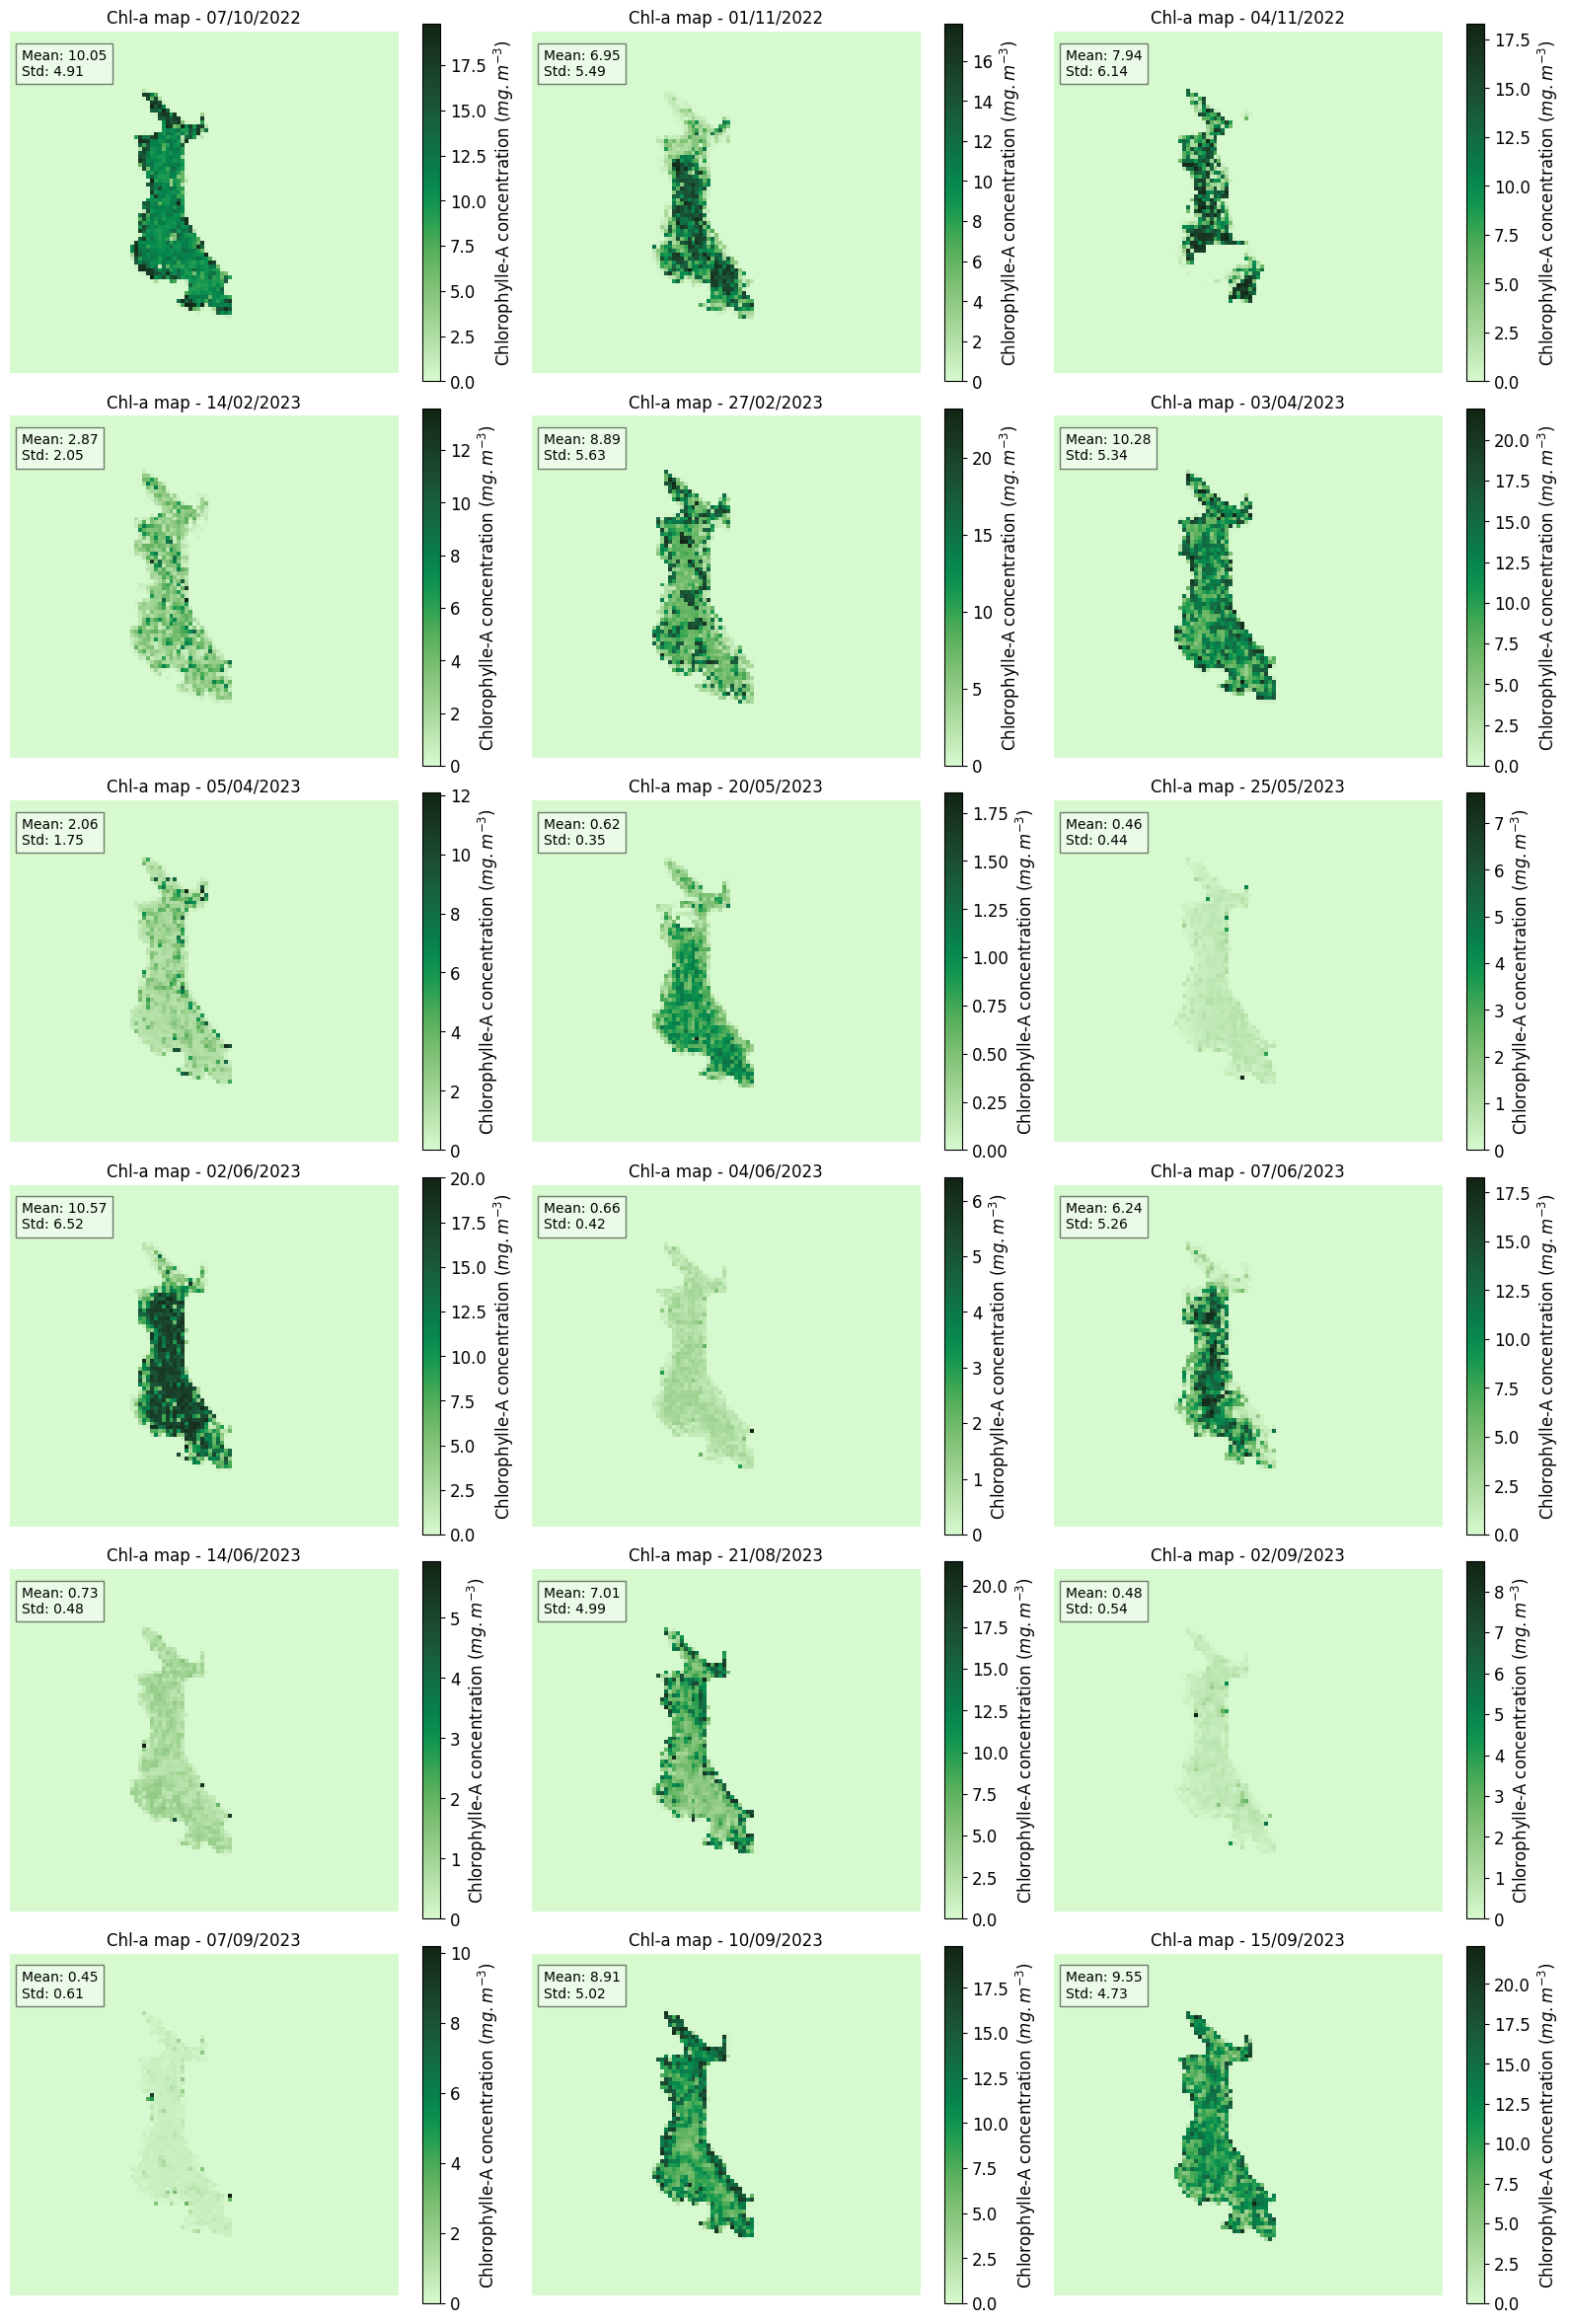

In [ ]:
# Drop rows that have the dates: 2022-10-22 10:50:09, 2023-01-18 11:04:01, 2023-04-08 10:56:21
dates_to_remove = ['2022-10-22 10:50:09', '2023-01-18 11:04:01', '2023-04-08 10:56:21', '2023-02-07 11:02:21', '2023-05-28 10:56:21']
# Convert dates_to_remove to datetime format
dates_to_remove = pd.to_datetime(dates_to_remove)

import os
import rasterio
from rasterio.plot import show
import numpy as np
import matplotlib.pyplot as plt
import cmocean
import cmocean.cm as cmo

directory = 'tif_files_final/'

# List for storing the paths of the .tif files
arquivos_tif = [os.path.join(directory, arquivo) for arquivo in os.listdir(directory) if arquivo.endswith('.tif')]

arquivos_tif_dict = {}
for arquivo_tif in arquivos_tif:
    # Extract date from the name of the file
    date = arquivo_tif.split('_')[4]
    # Convert the date to datetime format
    date = pd.to_datetime(date, format='%Y%m%dT%H%M%S')
    # Add the file path to the dictionary
    arquivos_tif_dict[date] = arquivo_tif

# Sort the dictionary by its keys (the dates)
arquivos_tif_dict = dict(sorted(arquivos_tif_dict.items()))
print(arquivos_tif_dict)

# Copy of the dictionary
arquivos_tif_dict_final = arquivos_tif_dict.copy()

# Read the band 50 of each .tif file, if the maximum value is 0, the image is removed from the dictionary
for date, arquivo_tif in arquivos_tif_dict.items():
    # Open the .tif file
    with rasterio.open(arquivo_tif) as src:
        # Reads Bands 4, 3, and 2 into a numpy array
        conc_chl = src.read(50)

        if conc_chl.max() == 0:
            del arquivos_tif_dict_final[date]
        elif date in dates_to_remove:
            del arquivos_tif_dict_final[date]
        

# Number of columns in the plot
num_colunas = 3

num_linhas = (len(arquivos_tif_dict_final) + num_colunas-1) // num_colunas

# Configuring subplots
fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(20, 5 * num_linhas))
fig.subplots_adjust(wspace=0.075, hspace=0.075,)

# Iterate over each .tif file
for i, (date, arquivo_tif) in enumerate(arquivos_tif_dict_final.items()):
    # Open the .tif file
    with rasterio.open(arquivo_tif) as src:
        # Reads Bands 4, 3, and 2 into a numpy array
        conc_chl = src.read(50)
        #Calculate mean of conc_chl desconsidering 0 values
        conc_chl_mean = conc_chl_mean = np.mean(conc_chl[conc_chl != 0 & ~np.isnan(conc_chl)])

        if conc_chl.max() == 0:
           continue

        # Position of the subplot
        linha = i // num_colunas
        coluna = i % num_colunas

        # Adding a color bar
        # Reading algae colormap (https://matplotlib.org/cmocean/) and ploting it
        
        algae = cmocean.cm.algae
        cbar = fig.colorbar(axs[linha, coluna].imshow(conc_chl, cmap=algae, interpolation = 'nearest'))
        cbar.ax.tick_params(labelsize=12)
        cbar.ax.set_ylabel('Chlorophylle-A concentration ($mg.m^{-3}$)', fontsize=12)
        axs[linha, coluna].set_title(f'Chl-a map - {date.strftime("%d/%m/%Y")}')
        axs[linha, coluna].text(0.03, 0.95, f'Mean: {conc_chl_mean:.2f}\nStd: {np.std(conc_chl[conc_chl != 0 & ~np.isnan(conc_chl)]):.2f}', transform=axs[linha, coluna].transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

        
# Remove all axes from the subplots
for ax in axs.flat:
    ax.axis('off')

# Exibir a figura
plt.show()

## Analysis using directly information from TIF files

In [1]:
# Load the output indices again

# Labeling bands

band_labels = [
        '3_bands_model_chl_conc',
        'pixel_classif_flags',
        'rtoa_B1', 
        'rtoa_B2',
        'rtoa_B3',
        'rtoa_B4',
        'rtoa_B5',
        'rtoa_B6',
        'rtoa_B7',
        'rtoa_B8',
        'rtoa_B8A',
        'rtoa_B9',
        'rtoa_B10',
        'rtoa_B11',
        'rtoa_B12',
        'rpath_B1',
        'rpath_B2',
        'rpath_B3',
        'rpath_B4',
        'rpath_B5',
        'rpath_B6',
        'rpath_B7',
        'rpath_B8A',
        'rrs_B1',
        'rrs_B2',
        'rrs_B3',
        'rrs_B4',
        'rrs_B5',
        'rrs_B6',
        'rrs_B7',
        'rrs_B8A',
        'rhown_B1',
        'rhown_B2',
        'rhown_B3',
        'rhown_B4',
        'rhown_B5',
        'rhown_B6',
        'iop_apig',
        'iop_adet',
        'iop_agelb',
        'iop_bpart',
        'iop_bwit',
        'iop_adg',
        'iop_atot',
        'iop_btot',
        'kd489',
        'kdmin',
        'kd_z90max',
        'conc_tsm',
        'conc_chl',
        'unc_apig',
        'unc_adet',
        'unc_agelb',
        'unc_bpart',
        'unc_bwit',
        'unc_adg',
        'unc_atot',
        'unc_btot',
        'unc_tsm',
        'unc_chl',
        'unc_kd489',
        'unc_kdmin',
        'unc_kd_z90max',
        'c2rcc_flags',
        'MCI',
        'empirical_2_bands_equation1',
        'empirical_2_bands_equation2',
        'empirical_3_bands_equation1',
        'empirical_3_bands_equation3'
    ]
# Create a list with indices of each band label
band_indices = dict(zip(band_labels, range(1, len(band_labels)+1)))

In [8]:
import os
import rasterio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Diretório contendo os arquivos .tif
directory = 'tif_files_final/'

# List for storing the paths of the .tif files
arquivos_tif = [os.path.join(directory, arquivo) for arquivo in os.listdir(directory) if arquivo.endswith('.tif')]

arquivos_tif_dict = {}
for arquivo_tif in arquivos_tif:
    # Extract date from the name of the file
    date = arquivo_tif.split('_')[4]
    # Convert the date to datetime format
    date = pd.to_datetime(date, format='%Y%m%dT%H%M%S')
    # Add the file path to the dictionary
    arquivos_tif_dict[date] = arquivo_tif

# Sort the dictionary by its keys (the dates)
arquivos_tif_dict = dict(sorted(arquivos_tif_dict.items()))

# Initialize an empty dataframe
df_c2rcc = pd.DataFrame()
# List of bands for Reflectance TOA
band_indices_new = {'conc_chl': band_indices['conc_chl'], 'unc_chl': band_indices['unc_chl'], 'Chlorophyll index 3-bands': band_indices['3_bands_model_chl_conc'], \
                    'Empirical 2-bands - Equation 1': band_indices['empirical_2_bands_equation1'], 'Empirical 2-bands - Equation 2': band_indices['empirical_2_bands_equation2'], \
                    'Empirical 3-bands - Equation 1': band_indices['empirical_3_bands_equation1'], 'Empirical 3-bands - Equation 3': band_indices['empirical_3_bands_equation3'], \
                    'Rrs_B4': band_indices['rrs_B4'], 'Rrs_B5': band_indices['rrs_B5'], \
                    'Rrs_B6': band_indices['rrs_B6'], 'Rrs_B7': band_indices['rrs_B7'], 'iop_apig': band_indices['iop_apig'], 'unc_apig': band_indices['unc_apig']}

# Iterate over each .tif file
for i, (date, arquivo_tif) in enumerate(arquivos_tif_dict.items()):
    # Open the .tif file
    with rasterio.open(arquivo_tif) as src:
        rrs_values = []
        for band_name, band_index in band_indices_new.items():
            rrs_band = src.read(band_index)
            rrs_band = rrs_band[(rrs_band != 0) & (~np.isnan(rrs_band))]

            # Classsification of the bands with no values
            if rrs_band.size == 0:
                rrs_values.append(np.nan)
                rrs_values.append(np.nan)
                continue
            
            # Testing filtering outliers
            # Filtering outliers quartile 1 and 3
            q1 = np.percentile(rrs_band, 25)
            q3 = np.percentile(rrs_band, 75)
            iqr = q3 - q1
            rrs_band = rrs_band[(rrs_band > q1 - 1.5 * iqr) & (rrs_band < q3 + 1.5 * iqr)]
    
            mean_rrs_band = rrs_band.mean()
            rrs_values.append(mean_rrs_band)
            
            # Testing with median
            #median_rrs_band = np.median(rrs_band)
            #rrs_values.append(median_rrs_band)

            if not band_name in ['conc_chl', 'unc_chl', 'iop_apig', 'unc_apig']:
                error_rrs_band = rrs_band.std()
                rrs_values.append(error_rrs_band)

        # Create a dictionary with the date and mean values of each band
        data = {'Date': date, 'conc_chl': rrs_values[0], 'unc_chl': rrs_values[1], 'Chlorophyll index 3-bands': rrs_values[2], \
                'unc_Chlorophyll index 3-bands':rrs_values[3], \
                'Empirical 2-bands - Equation 1': rrs_values[4], 'unc_Empirical 2-bands - Equation 1': rrs_values[5],\
                'Empirical 2-bands - Equation 2': rrs_values[6], 'unc_Empirical 2-bands - Equation 2': rrs_values[7], \
                'Empirical 3-bands - Equation 1': rrs_values[8], 'unc_Empirical 3-bands - Equation 1': rrs_values[9],\
                'Empirical 3-bands - Equation 3': rrs_values[10], 'unc_Empirical 3-bands - Equation 3': rrs_values[11], \
                'Rrs_B4':  rrs_values[12], 'unc_Rrs_B4':  rrs_values[13], \
                'Rrs_B5':  rrs_values[14], 'unc_Rrs_B5':  rrs_values[15], \
                'Rrs_B6':  rrs_values[16], 'unc_Rrs_B6':  rrs_values[17], \
                'Rrs_B7':  rrs_values[18], 'unc_Rrs_B7':  rrs_values[19], \
                'iop_apig':  rrs_values[20], 'unc_apig':  rrs_values[21]
                }
        
        # Append the dictionary as a new row to the dataframe
        df_c2rcc = pd.concat([df_c2rcc, pd.DataFrame(data, index=[0])], ignore_index=True)

# Remove the images that didn't pass the quality control
df_c2rcc.dropna(inplace=True)

df_c2rcc.head()

Date   conc_chl   unc_chl  Chlorophyll index 3-bands  \
0 2022-10-07 10:49:31  11.214553  2.909214                  12.541950   
1 2022-10-22 10:50:09   8.938086  2.195822                   9.295813   
2 2022-11-01 10:51:09   6.945407  1.769931                   8.123481   
3 2022-11-04 11:01:29   7.944211  2.124547                  10.625534   
4 2023-01-18 11:04:01   5.876657  1.898810                  17.030870   

   unc_Chlorophyll index 3-bands  Empirical 2-bands - Equation 1  \
0                       2.274960                       21.271889   
1                       3.489191                       12.535722   
2                       2.859937                       13.878401   
3                       4.529142                       17.908114   
4                       4.413559                       26.496967   

   unc_Empirical 2-bands - Equation 1  Empirical 2-bands - Equation 2  \
0                            3.743306                       13.549539   
1                            6.145957                        8.315886   
2                            6.154062                        8.364190   
3                            7.452090                       11.082954   
4                            6.497723                       17.306337   

   unc_Empirical 2-bands - Equation 2  Empirical 3-bands - Equation 1  ...  \
0                            2.257267                       15.727753  ...   
1                            4.550666                       13.465254  ...   
2                            4.167254                       13.062543  ...   
3                            5.099267                       14.501300  ...   
4                            3.385897                       18.053244  ...   

     Rrs_B4  unc_Rrs_B4    Rrs_B5  unc_Rrs_B5    Rrs_B6  unc_Rrs_B6    Rrs_B7  \
0  0.001109    0.000759  0.000908    0.000645  0.000312    0.000227  0.000313   
1  0.001702    0.001312  0.001305    0.001111  0.000406    0.000367  0.000404   
2  0.000222    0.000139  0.000168    0.000115  0.000054    0.000039  0.000056   
3  0.000336    0.000187  0.000273    0.000171  0.000092    0.000062  0.000097   
4  0.000549    0.000285  0.000485    0.000274  0.000176    0.000107  0.000191   

   unc_Rrs_B7  iop_apig  unc_apig  
0    0.000227  0.734191  0.122907  
1    0.000368  0.585942  0.089602  
2    0.000041  0.451235  0.071464  
3    0.000066  0.538964  0.090128  
4    0.000115  0.369674  0.075279  

[5 rows x 23 columns]

In [9]:
# Setting index for df_c2rcc and df_loco if its not
if df_c2rcc.index.name != 'Date':   
    df_c2rcc.set_index('Date', inplace=True)
if df_loco.index.name != 'time':
    df_loco.set_index('time', inplace=True)


import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
import matplotlib.dates as mdates

# Suponha que 'df' seja o seu DataFrame contendo os dados de clorofila

# Create a slider widget for selecting the time range
start_date_widget = widgets.DatePicker(description='Start Date', value=pd.to_datetime('2022-09-30'))
end_date_widget = widgets.DatePicker(description='End Date', value=pd.to_datetime('2023-10-30'))

# Define a function to update the plot based on the selected time range
def update_plot(start_date, end_date):
    filtered_df = df_loco.loc[start_date:end_date]
    filtered_df6 = df_c2rcc.loc[start_date:end_date]

    # Remove the dates that are bad for the analysis
    dates_to_remove = ['2023-02-07 11:02:21', '2023-04-03 10:56:29', '2023-04-08 10:56:21', '2023-05-25 10:50:31', '2023-05-30 10:46:29', '2023-08-21 10:56:29']
    filtered_df7 = filtered_df6[~filtered_df6.index.isin(dates_to_remove)]
    
    # Resample the data to daily frequency and calculate the mean for each day
    daily_mean1 = filtered_df['chlorophylle A'].resample('D').median()


    # Resample the data to daily frequency and calculate the mean for each day  
    daily_mean2= filtered_df7['conc_chl'].resample('D').mean().dropna()
    
    daily_mean3= filtered_df7['Chlorophyll index 3-bands'].resample('D').mean().dropna()
    daily_mean3_unc= filtered_df7['unc_Chlorophyll index 3-bands'].resample('D').mean().dropna()
    daily_mean4= filtered_df7['Empirical 2-bands - Equation 1'].resample('D').mean().dropna()
    daily_mean4_unc= filtered_df7['unc_Empirical 2-bands - Equation 1'].resample('D').mean().dropna()
    daily_mean5= filtered_df7['Empirical 2-bands - Equation 2'].resample('D').mean().dropna()
    daily_mean5_unc= filtered_df7['unc_Empirical 2-bands - Equation 2'].resample('D').mean().dropna()
    daily_mean6= filtered_df7['Empirical 3-bands - Equation 1'].resample('D').mean().dropna()
    daily_mean6_unc= filtered_df7['unc_Empirical 3-bands - Equation 1'].resample('D').mean().dropna()
    daily_mean7= filtered_df7['Empirical 3-bands - Equation 3'].resample('D').mean().dropna()
    daily_mean7_unc= filtered_df7['unc_Empirical 3-bands - Equation 3'].resample('D').mean().dropna()

    
    # Resample the data to daily frequency and calculate the mean for each day
   
    
    # Configuring the single plot
    fig, ax = plt.subplots(figsize=(20, 10))

    # Plotting the data with low transparency
    daily_mean1.plot(kind='line', marker='o', label='Chlorophylle A - In Situ (Median)', alpha=0.5)

    # Ploting data with bigger points
    ax.errorbar(daily_mean2.index, daily_mean2, yerr=daily_mean3_unc , ls= '', markersize = 7, marker='s', label='Analytical model (C2RCC)')
    ax.errorbar(daily_mean2.index, daily_mean3, yerr=daily_mean3_unc , ls= '', markersize = 7, marker='s', label='Chlorophyll index 3-bands')
    ax.errorbar(daily_mean2.index, daily_mean4, yerr=daily_mean4_unc , ls= '', markersize = 7, marker='s', label='Empirical 2-bands - Equation 1')
    ax.errorbar(daily_mean2.index, daily_mean5, yerr=daily_mean5_unc , ls= '', markersize = 7, marker='s', label='Empirical 2-bands - Equation 2')
    ax.errorbar(daily_mean2.index, daily_mean6, yerr=daily_mean6_unc , ls= '', markersize = 7, marker='s', label='Empirical 3-bands - Equation 1')
    ax.errorbar(daily_mean2.index, daily_mean7, yerr=daily_mean7_unc , ls= '', markersize = 7, marker='s', label='Empirical 3-bands - Equation 3')
    
    
    plt.ylabel('Chlorophylle-A concentration ($mg.m^{-3}$)')
    plt.xlabel('Date')
    plt.ylim(0)
    plt.title('Time series of chlorophylle-A concentration by different methods')
    plt.legend()
    
    # Format x-axis ticks as months (mm/yyyy)
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
    
    plt.show()

# Create an interactive output widget
output = widgets.interactive_output(update_plot, {'start_date': start_date_widget, 'end_date': end_date_widget})

# Display the widgets and the output
display(start_date_widget, end_date_widget, output)




DatePicker(value=Timestamp('2022-09-30 00:00:00'), description='Start Date', step=1)

DatePicker(value=Timestamp('2023-10-30 00:00:00'), description='End Date', step=1)

Output()

#### Fazendo o ajuste para as comparações de R^2 dos modelos previstos

In [10]:
from datetime import timedelta

# Remove column chlorophyllle A from c2rcc but only if exists
if 'chlorophylle A' in df_c2rcc.columns:
    df_c2rcc.drop(columns=['chlorophylle A'], inplace=True)

# Reset the index of c2rcc data if it is not the default index
if df_c2rcc.index.name == 'Date':
    df_c2rcc.reset_index(inplace=True)
# Remove the dates that are bad for the analysis
    
# Drop rows that have the dates: 2022-10-22 10:50:09, 2023-01-18 11:04:01, 2023-04-08 10:56:21
dates_to_remove = ['2022-10-22 10:50:09', '2023-01-18 11:04:01', '2023-04-08 10:56:21', '2023-02-07 11:02:21']
#dates_to_remove = ['2023-02-07 11:02:21', '2023-04-03 10:56:29', '2023-04-08 10:56:21', '2023-05-25 10:50:31', '2023-05-30 10:46:29', '2023-08-21 10:56:29']

df_c2rcc = df_c2rcc[~df_c2rcc['Date'].isin(dates_to_remove)]


# Reset the index of in situ data if it is not the default index
if df_loco.index.name == 'time':
    df_loco.reset_index(inplace=True)

# Create a new column with the closest value of chlorophyllle A from in situ data

def encontrar_valor_proximo(x, df, column = 'conc_chl', janela_temporal=2):
    data_alvo = x['Date']
    valor_alvo = x[column]

    janela_superior = data_alvo + timedelta(days=janela_temporal)
    janela_inferior = data_alvo - timedelta(days=janela_temporal)

    dados_no_intervalo = df[(df['time'] >= janela_inferior) & (df['time'] <= janela_superior)]

    if not dados_no_intervalo.empty:
       
        # Calcular a diferença nos valores
        dados_no_intervalo['dif_values'] = abs(dados_no_intervalo['chlorophylle A'] - valor_alvo)
        
        # Encontrar a linha com a menor diferença nos valores
        linha_mais_proxima = dados_no_intervalo.loc[dados_no_intervalo['dif_values'].idxmin()]
        
        return linha_mais_proxima['chlorophylle A']
    else:
        return None

df_c2rcc['chlorophylle A - Adjusted'] = df_c2rcc.apply(lambda x: encontrar_valor_proximo(x,df_loco, column = 'conc_chl'), axis=1)

First test - Comparing the firsts results (All columns without 'final' in the name) with the Chlorophylle A adjusted column (Column adjusted onyl considering conc_chl)

In [13]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Create a DataFrame to store the results
results_df_final = pd.DataFrame(columns=['Metric'])

# Loop through the columns and perform the analysis
for column in ['conc_chl',
       'Chlorophyll index 3-bands', 'Empirical 2-bands - Equation 1', 'Empirical 2-bands - Equation 2',
        'Empirical 3-bands - Equation 1', 'Empirical 3-bands - Equation 3']:
    
    # Cria o modelo de regressão linear
    model = LinearRegression()

    chl_column_adjusted = 'chlorophylle A - Adjusted'

    # Ajusta o modelo usando a coluna 'conc_chl' como variável independente e a coluna atual como variável dependente
    df_c2rcc2 = df_c2rcc[[chl_column_adjusted, column]].dropna()

    model.fit(df_c2rcc2[[column]], df_c2rcc2[[chl_column_adjusted]])
    
    ## Create columns with logaritmic in base 10 values of chlorophyllle A and conc_chl
    # df_c2rcc2['log_chlorophylle A - Adjusted'] = np.log10(df_c2rcc2['chlorophylle A - Adjusted']).dropna()
    # df_c2rcc2['log_metric'] = np.log10(df_c2rcc2[column]).dropna()
    # model2 = LinearRegression()
    # model2.fit(df_c2rcc2[['log_metric']], df_c2rcc2[['log_chlorophylle A - Adjusted']])

    # Prevê os valores usando o modelo
    predicted_values = model.predict(df_c2rcc2[[column]])

    # Cálculo do R²
    r2 = model.score(df_c2rcc2[[column]], df_c2rcc2[[chl_column_adjusted]])

    # Calculation of the Root Mean Square Error (RMSE)
    rmse = mean_squared_error(df_c2rcc2[[chl_column_adjusted]], predicted_values) ** 0.5

    # Calculation of the Mean Absolute Error (MAE)
    mae = mean_absolute_error(df_c2rcc2[[chl_column_adjusted]], predicted_values)
    
    # Calculation of the Mean Absolute Percentage Error (MAPE)
    mape = np.mean(np.abs((predicted_values- df_c2rcc2[[chl_column_adjusted]]) / df_c2rcc2[[chl_column_adjusted]])) * 100

    # # Calculation of the Bias
    # bias = 10 ** (np.mean(np.sum(model2.predict(df_c2rcc2[[f'log_metric']]).T - df_c2rcc2[['log_chlorophylle A - Adjusted']].values)))

    # Append the results to the DataFrame
    results_df_final= pd.concat([results_df_final, pd.DataFrame([[column, r2, rmse, mae, mape]], columns=['Metric', 'R²', 'RMSE', 'MAE', 'MAPE'])], ignore_index=True)

# Display the results DataFrame
display(results_df_final)

Metric        R²      RMSE       MAE       MAPE
0                        conc_chl  0.828716  1.517547  0.858415  47.647681
1       Chlorophyll index 3-bands  0.583226  2.367193  1.903884  97.164069
2  Empirical 2-bands - Equation 1  0.551004  2.456998  2.082231  92.718202
3  Empirical 2-bands - Equation 2  0.593210  2.338667  1.918042  85.916549
4  Empirical 3-bands - Equation 1  0.595876  2.330991  1.880248  91.596637
5  Empirical 3-bands - Equation 3  0.575215  2.389833  1.958803  95.998660

#### Trying fitting data

Fit data with initial values (Considering only chlorophylle A adjusted by conc_chl)

In [14]:
import scipy.optimize as opt

# Define the functions for each equation
def equation_1(X, a, b):
    rrs_B4, rrs_B5, rrs_B6 = X
    return a * ((1 / rrs_B4 - 1 / rrs_B5) / (1 / rrs_B6 - 1 / rrs_B5)) + b

def equation_2(X, a,b):
    rrs_B4, rrs_B6 = X
    return a * (rrs_B6 / rrs_B4) + b

def equation_3(X, a,b,c):
    rrs_B4, rrs_B5 = X
    return a * ((rrs_B5 / rrs_B4) ** 2) + b * (rrs_B5 / rrs_B4) + c

def equation_4(X, a,b):
    rrs_B4, rrs_B5, rrs_B6 = X
    return a * ((1 / rrs_B4 - 1 / rrs_B5) * rrs_B6) + b

def equation_5(X, a,b,c):
    rrs_B4, rrs_B5, rrs_B6 = X
    return a * (((1 / rrs_B4 - 1 / rrs_B5) * rrs_B6) ** 2) + b * ((1 / rrs_B4 - 1 / rrs_B5) * rrs_B6) + c

# Define the function for equation 7
def equation_6(iop_apig, a,b):
    return a * (iop_apig ** b)

# Define the initial values for the parameters
p1= 161.24, 28.04
p2= 136.3, -16.2
p3= 25.28, 14.85, -15.18
p4= 117.42, 23.174
p5= 315.5, 215.95, 25.66
p6= 14, 0.75

# Use non-linear least squares to fit the functions to the data
popt_1, pcov_1 = opt.curve_fit(equation_1, (df_c2rcc['Rrs_B4'],df_c2rcc['Rrs_B5'], df_c2rcc['Rrs_B6']), df_c2rcc['chlorophylle A - Adjusted'], p1)
popt_2, pcov_2 = opt.curve_fit(equation_2, (df_c2rcc['Rrs_B4'], df_c2rcc['Rrs_B6']) , df_c2rcc['chlorophylle A - Adjusted'], p2)
popt_3, pcov_3 = opt.curve_fit(equation_3, (df_c2rcc['Rrs_B4'], df_c2rcc['Rrs_B5']), df_c2rcc['chlorophylle A - Adjusted'], p3)
popt_4, pcov_4 = opt.curve_fit(equation_4, (df_c2rcc['Rrs_B4'], df_c2rcc['Rrs_B5'], df_c2rcc['Rrs_B6']), df_c2rcc['chlorophylle A - Adjusted'], p4)
popt_5, pcov_5 = opt.curve_fit(equation_5, (df_c2rcc['Rrs_B4'], df_c2rcc['Rrs_B5'], df_c2rcc['Rrs_B6']), df_c2rcc['chlorophylle A - Adjusted'], p5)
popt_6, pcov_6 = opt.curve_fit(equation_6, df_c2rcc['iop_apig'], df_c2rcc['chlorophylle A - Adjusted'], p6)

# Print the parameters
print("Equation 1:", popt_1)
print("Equation 2:", popt_2)
print("Equation 3:", popt_3)
print("Equation 4:", popt_4)
print("Equation 5:", popt_5)
print("Equation 6:", popt_6)

# Print pcov
print("pcov_1:", np.linalg.cond(pcov_1), np.diag(pcov_1))
print("pcov_2:", np.linalg.cond(pcov_2), np.diag(pcov_2))
print("pcov_3:", np.linalg.cond(pcov_3), np.diag(pcov_3))
print("pcov_4:", np.linalg.cond(pcov_4), np.diag(pcov_4))
print("pcov_5:", np.linalg.cond(pcov_5), np.diag(pcov_5))
print("pcov_6:", np.linalg.cond(pcov_6), np.diag(pcov_6))


popt_2 = [54.59130268, -31.12563482]

# Create new columns with the calculated values of chlorophyllle A
df_c2rcc['Chlorophyll index 3-bands adjusted'] = equation_1((df_c2rcc['Rrs_B4'], df_c2rcc['Rrs_B5'], df_c2rcc['Rrs_B6']), *popt_1)
df_c2rcc['Empirical 2-bands - Equation 1 adjusted'] = equation_2((df_c2rcc['Rrs_B4'], df_c2rcc['Rrs_B5']), *popt_2)
df_c2rcc['Empirical 2-bands - Equation 2 adjusted'] = equation_3((df_c2rcc['Rrs_B4'], df_c2rcc['Rrs_B5']), *popt_3)
df_c2rcc['Empirical 3-bands - Equation 1 adjusted'] = equation_4((df_c2rcc['Rrs_B4'], df_c2rcc['Rrs_B5'], df_c2rcc['Rrs_B6']), *popt_4)
df_c2rcc['Empirical 3-bands - Equation 3 adjusted'] = equation_5((df_c2rcc['Rrs_B4'], df_c2rcc['Rrs_B5'], df_c2rcc['Rrs_B6']), *popt_5)
df_c2rcc['conc_chl adjusted'] = equation_6(df_c2rcc['iop_apig'], *popt_6)




Equation 1: [115.73251976  21.11563113]
Equation 2: [54.59130268 -5.12563482]
Equation 3: [-79.22233091 139.67479691 -51.53274722]
Equation 4: [138.94043811  18.86483055]
Equation 5: [-2.44506904e+03 -2.87855183e+02  1.35455498e+00]
Equation 6: [11.67220166  0.48607533]
pcov_1: 1672.883650540604 [491.70366031   8.5839465 ]
pcov_2: 420.8631471430211 [131.04185267   5.87666915]
pcov_3: 70988.05155182206 [3648.55639803 7031.47319994  819.98979945]
pcov_4: 2340.656875340375 [684.76797163   6.07974618]
pcov_5: 5508687.89655347 [1.30183576e+06 4.02308958e+04 7.17858471e+01]
pcov_6: 230.38087700612132 [1.11870158 0.01113684]


In [15]:
# Setting index for df_c2rcc and df_loco if its not
if df_c2rcc.index.name != 'Date':   
    df_c2rcc.set_index('Date', inplace=True)
if df_loco.index.name != 'time':
    df_loco.set_index('time', inplace=True)


import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
import matplotlib.dates as mdates

# Suponha que 'df' seja o seu DataFrame contendo os dados de clorofila

# Create a slider widget for selecting the time range
start_date_widget = widgets.DatePicker(description='Start Date', value=pd.to_datetime('2022-09-30'))
end_date_widget = widgets.DatePicker(description='End Date', value=pd.to_datetime('2023-10-30'))

# Define a function to update the plot based on the selected time range
def update_plot(start_date, end_date):
    filtered_df = df_loco.loc[start_date:end_date]
    filtered_df6 = df_c2rcc.loc[start_date:end_date]

    # Remove the dates that are bad for the analysis
    dates_to_remove = ['2023-02-07 11:02:21', '2023-04-03 10:56:29', '2023-04-08 10:56:21', '2023-05-25 10:50:31', '2023-05-30 10:46:29', '2023-08-21 10:56:29']
    filtered_df7 = filtered_df6[~filtered_df6.index.isin(dates_to_remove)]
    
    # Resample the data to daily frequency and calculate the mean for each day
    daily_mean1 = filtered_df['chlorophylle A'].resample('D').median()


    # Resample the data to daily frequency and calculate the mean for each day  
    daily_mean2= filtered_df7['conc_chl adjusted'].resample('D').mean().dropna()
    
    daily_mean3= filtered_df7['Chlorophyll index 3-bands adjusted'].resample('D').mean().dropna()
    daily_mean3_unc= filtered_df7['unc_Chlorophyll index 3-bands'].resample('D').mean().dropna()
    daily_mean4= filtered_df7['Empirical 2-bands - Equation 1 adjusted'].resample('D').mean().dropna()
    daily_mean4_unc= filtered_df7['unc_Empirical 2-bands - Equation 1'].resample('D').mean().dropna()
    daily_mean5= filtered_df7['Empirical 2-bands - Equation 2 adjusted'].resample('D').mean().dropna()
    daily_mean5_unc= filtered_df7['unc_Empirical 2-bands - Equation 2'].resample('D').mean().dropna()
    daily_mean6= filtered_df7['Empirical 3-bands - Equation 1 adjusted'].resample('D').mean().dropna()
    daily_mean6_unc= filtered_df7['unc_Empirical 3-bands - Equation 1'].resample('D').mean().dropna()
    daily_mean7= filtered_df7['Empirical 3-bands - Equation 3 adjusted'].resample('D').mean().dropna()
    daily_mean7_unc= filtered_df7['unc_Empirical 3-bands - Equation 3'].resample('D').mean().dropna()

    
    # Resample the data to daily frequency and calculate the mean for each day
   
    
    # Configuring the single plot
    fig, ax = plt.subplots(figsize=(20, 10))

    # Plotting the data with low transparency
    daily_mean1.plot(kind='line', marker='o', label='Chlorophylle A - In Situ (Median)', alpha=0.5)

    # Ploting data with bigger points
    ax.errorbar(daily_mean2.index, daily_mean2, yerr=daily_mean3_unc , ls= '', markersize = 7, marker='s', label='Analytical model (C2RCC)')
    ax.errorbar(daily_mean2.index, daily_mean3, yerr=daily_mean3_unc , ls= '', markersize = 7, marker='s', label='Chlorophyll index 3-bands')
    ax.errorbar(daily_mean2.index, daily_mean4, yerr=daily_mean4_unc , ls= '', markersize = 7, marker='s', label='Empirical 2-bands - Equation 1')
    ax.errorbar(daily_mean2.index, daily_mean5, yerr=daily_mean5_unc , ls= '', markersize = 7, marker='s', label='Empirical 2-bands - Equation 2')
    ax.errorbar(daily_mean2.index, daily_mean6, yerr=daily_mean6_unc , ls= '', markersize = 7, marker='s', label='Empirical 3-bands - Equation 1')
    ax.errorbar(daily_mean2.index, daily_mean7, yerr=daily_mean7_unc , ls= '', markersize = 7, marker='s', label='Empirical 3-bands - Equation 3')
    
    
    plt.ylabel('Chlorophylle-A concentration ($mg.m^{-3}$)')
    plt.xlabel('Date')
    plt.ylim(0)
    plt.title('Time series of chlorophylle-A concentration by different methods')
    plt.legend()
    
    # Format x-axis ticks as months (mm/yyyy)
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
    
    plt.show()

# Create an interactive output widget
output = widgets.interactive_output(update_plot, {'start_date': start_date_widget, 'end_date': end_date_widget})

# Display the widgets anSecond test - Comparing the firsts results (All columns without 'final' in the name) with the Chlorophylle A adjusted column for each of them (Adjusting the value according the column)d the output
display(start_date_widget, end_date_widget, output)




DatePicker(value=Timestamp('2022-09-30 00:00:00'), description='Start Date', step=1)

DatePicker(value=Timestamp('2023-10-30 00:00:00'), description='End Date', step=1)

Output()

1. Fit data with chlorophyll A adjusted by each of first bio-optical model adjustment values

2. Second test - Comparing the firsts results (All columns without 'final' in the name) with the Chlorophylle A adjusted column for each of them (Adjusting the value according the column)

In [16]:
from datetime import timedelta

# Reset the index of c2rcc data if it is not the default index
if df_c2rcc.index.name == 'Date':
    df_c2rcc.reset_index(inplace=True)

# Reset the index of in situ data if it is not the default index
if df_loco.index.name == 'time':
    df_loco.reset_index(inplace=True)



df_c2rcc['chlorophylle A - Adjusted conc_chl'] = df_c2rcc.apply(lambda x: encontrar_valor_proximo(x,df_loco, column = 'conc_chl adjusted'), axis=1)
df_c2rcc['chlorophylle A - Adjusted Chlorophyll index 3-bands'] = df_c2rcc.apply(lambda x: encontrar_valor_proximo(x,df_loco, column = 'Chlorophyll index 3-bands adjusted'), axis=1)
df_c2rcc['chlorophylle A - Adjusted Empirical 2-bands - Equation 1'] = df_c2rcc.apply(lambda x: encontrar_valor_proximo(x,df_loco, column = 'Empirical 2-bands - Equation 1 adjusted'), axis=1)
df_c2rcc['chlorophylle A - Adjusted Empirical 2-bands - Equation 2'] = df_c2rcc.apply(lambda x: encontrar_valor_proximo(x,df_loco, column = 'Empirical 2-bands - Equation 2 adjusted'), axis=1)
df_c2rcc['chlorophylle A - Adjusted Empirical 3-bands - Equation 1'] = df_c2rcc.apply(lambda x: encontrar_valor_proximo(x,df_loco, column = 'Empirical 3-bands - Equation 1 adjusted'), axis=1)
df_c2rcc['chlorophylle A - Adjusted Empirical 3-bands - Equation 3'] = df_c2rcc.apply(lambda x: encontrar_valor_proximo(x,df_loco, column = 'Empirical 3-bands - Equation 3 adjusted'), axis=1)


# display the columns chlorophyllle A and conc_chl
display(df_c2rcc[['chlorophylle A - Adjusted', 'chlorophylle A - Adjusted conc_chl', 'chlorophylle A - Adjusted Chlorophyll index 3-bands', 'chlorophylle A - Adjusted Empirical 2-bands - Equation 1', 'chlorophylle A - Adjusted Empirical 2-bands - Equation 2', 'chlorophylle A - Adjusted Empirical 3-bands - Equation 1', 'chlorophylle A - Adjusted Empirical 3-bands - Equation 3']])


chlorophylle A - Adjusted  chlorophylle A - Adjusted conc_chl  \
0                       11.21                               10.05   
1                        6.96                                7.93   
2                        7.94                                8.64   
3                        2.68                                4.09   
4                        8.90                                9.04   
5                       10.72                                9.83   
6                        1.71                                2.97   
7                        1.70                                1.70   
8                        7.76                                7.76   
9                        7.47                                8.30   
10                      11.57                                9.31   
11                       2.45                                2.45   
12                       6.30                                7.27   
13                       2.30                                2.30   
14                       6.77                                7.29   
15                       0.43                                1.26   
16                       0.53                                1.13   
17                       8.91                                9.02   
18                       9.54                                9.42   

    chlorophylle A - Adjusted Chlorophyll index 3-bands  \
0                                               10.19     
1                                                7.70     
2                                               10.11     
3                                                4.71     
4                                               12.63     
5                                                7.34     
6                                                3.76     
7                                                2.71     
8                                                7.76     
9                                                6.88     
10                                               8.33     
11                                               2.76     
12                                               6.50     
13                                               2.78     
14                                               5.66     
15                                               3.18     
16                                               3.15     
17                                               6.74     
18                                               8.21     

    chlorophylle A - Adjusted Empirical 2-bands - Equation 1  \
0                                               13.59          
1                                               10.10          
2                                               13.31          
3                                                3.67          
4                                               16.69          
5                                                9.10          
6                                                1.71          
7                                                1.70          
8                                                7.76          
9                                                8.45          
10                                               9.31          
11                                               2.45          
12                                               7.04          
13                                               2.30          
14                                               5.17          
15                                               0.23          
16                                               0.53          
17                                               7.76          
18                                               9.63          

    chlorophylle A - Adjusted Empirical 2-bands - Equation 2  \
0                                                9.72          
1                                

In [17]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Create a DataFrame to store the results
results_df_final = pd.DataFrame(columns=['Metric'])

# Loop through the columns and perform the analysis
for column in ['conc_chl',
       'Chlorophyll index 3-bands', 'Empirical 2-bands - Equation 1', 'Empirical 2-bands - Equation 2',
        'Empirical 3-bands - Equation 1', 'Empirical 3-bands - Equation 3']:
    
    # Cria o modelo de regressão linear
    model = LinearRegression()

    chl_column_adjusted = 'chlorophylle A - Adjusted ' + column

    column = column + ' adjusted'

    # Ajusta o modelo usando a coluna 'conc_chl' como variável independente e a coluna atual como variável dependente
    df_c2rcc2 = df_c2rcc[[chl_column_adjusted, column]].dropna()

    model.fit(df_c2rcc2[[column]], df_c2rcc2[[chl_column_adjusted]])
    
    ## Create columns with logaritmic in base 10 values of chlorophyllle A and conc_chl
    # df_c2rcc2['log_chlorophylle A - Adjusted'] = np.log10(df_c2rcc2['chlorophylle A - Adjusted']).dropna()
    # df_c2rcc2['log_metric'] = np.log10(df_c2rcc2[column]).dropna()
    # model2 = LinearRegression()
    # model2.fit(df_c2rcc2[['log_metric']], df_c2rcc2[['log_chlorophylle A - Adjusted']])

    # Prevê os valores usando o modelo
    predicted_values = model.predict(df_c2rcc2[[column]])

    # Cálculo do R²
    r2 = model.score(df_c2rcc2[[column]], df_c2rcc2[[chl_column_adjusted]])

    # Calculation of the Root Mean Square Error (RMSE)
    rmse = mean_squared_error(df_c2rcc2[[chl_column_adjusted]], predicted_values) ** 0.5

    # Calculation of the Mean Absolute Error (MAE)
    mae = mean_absolute_error(df_c2rcc2[[chl_column_adjusted]], predicted_values)
    
    # Calculation of the Mean Absolute Percentage Error (MAPE)
    mape = np.mean(np.abs((predicted_values- df_c2rcc2[[chl_column_adjusted]]) / df_c2rcc2[[chl_column_adjusted]])) * 100

    # # Calculation of the Bias
    # bias = 10 ** (np.mean(np.sum(model2.predict(df_c2rcc2[[f'log_metric']]).T - df_c2rcc2[['log_chlorophylle A - Adjusted']].values)))

    # Append the results to the DataFrame
    results_df_final= pd.concat([results_df_final, pd.DataFrame([[column, r2, rmse, mae, mape]], columns=['Metric', 'R²', 'RMSE', 'MAE', 'MAPE'])], ignore_index=True)

# Display the results DataFrame
display(results_df_final)

Metric        R²      RMSE       MAE  \
0                        conc_chl adjusted  0.824062  1.348896  0.709638   
1       Chlorophyll index 3-bands adjusted  0.866567  1.026302  0.514362   
2  Empirical 2-bands - Equation 1 adjusted  0.864738  1.702908  0.966094   
3  Empirical 2-bands - Equation 2 adjusted  0.774515  1.324677  0.706649   
4  Empirical 3-bands - Equation 1 adjusted  0.853220  1.080628  0.549439   
5  Empirical 3-bands - Equation 3 adjusted  0.817895  1.246327  0.636884   

        MAPE  
0  22.866610  
1  10.386246  
2  53.703645  
3  17.803645  
4  11.156021  
5  15.837043

In [18]:
import scipy.optimize as opt

# Define the functions for each equation
def equation_1(X, a, b):
    rrs_B4, rrs_B5, rrs_B6 = X
    return a * ((1 / rrs_B4 - 1 / rrs_B5) / (1 / rrs_B6 - 1 / rrs_B5)) + b

def equation_2(X, a,b):
    rrs_B4, rrs_B6 = X
    return a * (rrs_B6 / rrs_B4) + b

def equation_3(X, a,b,c):
    rrs_B4, rrs_B5 = X
    return a * ((rrs_B5 / rrs_B4) ** 2) + b * (rrs_B5 / rrs_B4) + c

def equation_4(X, a,b):
    rrs_B4, rrs_B5, rrs_B6 = X
    return a * ((1 / rrs_B4 - 1 / rrs_B5) * rrs_B6) + b

def equation_5(X, a,b,c):
    rrs_B4, rrs_B5, rrs_B6 = X
    return a * (((1 / rrs_B4 - 1 / rrs_B5) * rrs_B6) ** 2) + b * ((1 / rrs_B4 - 1 / rrs_B5) * rrs_B6) + c

# Define the function for equation 7
def equation_6(iop_apig, a,b):
    return a * (iop_apig ** b)

# Define the initial values for the parameters
p1= popt_1[0], popt_1[1]
p2= popt_2[0], popt_2[1]
p3= popt_3[0], popt_3[1], popt_3[2]
p4= popt_4[0], popt_4[1]
p5= popt_5[0], popt_5[1], popt_5[2]
p6= popt_6[0], popt_6[1]

# Use non-linear least squares to fit the functions to the data
popt_1, pcov_1 = opt.curve_fit(equation_1, (df_c2rcc['Rrs_B4'],df_c2rcc['Rrs_B5'], df_c2rcc['Rrs_B6']), df_c2rcc['chlorophylle A - Adjusted Chlorophyll index 3-bands'], p1)
popt_2, pcov_2 = opt.curve_fit(equation_2, (df_c2rcc['Rrs_B4'], df_c2rcc['Rrs_B6']) , df_c2rcc['chlorophylle A - Adjusted Empirical 2-bands - Equation 1'], p2)
popt_3, pcov_3 = opt.curve_fit(equation_3, (df_c2rcc['Rrs_B4'], df_c2rcc['Rrs_B5']), df_c2rcc['chlorophylle A - Adjusted Empirical 2-bands - Equation 2'], p3)
popt_4, pcov_4 = opt.curve_fit(equation_4, (df_c2rcc['Rrs_B4'], df_c2rcc['Rrs_B5'], df_c2rcc['Rrs_B6']), df_c2rcc['chlorophylle A - Adjusted Empirical 3-bands - Equation 1'], p4)
popt_5, pcov_5 = opt.curve_fit(equation_5, (df_c2rcc['Rrs_B4'], df_c2rcc['Rrs_B5'], df_c2rcc['Rrs_B6']), df_c2rcc['chlorophylle A - Adjusted Empirical 3-bands - Equation 3'], p5)
popt_6, pcov_6 = opt.curve_fit(equation_6, df_c2rcc['iop_apig'], df_c2rcc['chlorophylle A - Adjusted conc_chl'], p6)

# Print the parameters
print("Equation 1:", popt_1)
print("Equation 2:", popt_2)
print("Equation 3:", popt_3)
print("Equation 4:", popt_4)
print("Equation 5:", popt_5)
print("Equation 6:", popt_6)

# Print pcov
print("pcov_1:", np.linalg.cond(pcov_1), np.diag(pcov_1))
print("pcov_2:", np.linalg.cond(pcov_2), np.diag(pcov_2))
print("pcov_3:", np.linalg.cond(pcov_3), np.diag(pcov_3))
print("pcov_4:", np.linalg.cond(pcov_4), np.diag(pcov_4))
print("pcov_5:", np.linalg.cond(pcov_5), np.diag(pcov_5))
print("pcov_6:", np.linalg.cond(pcov_6), np.diag(pcov_6))

# Need to adjust the scale of p_opt2 (see in the plot without this for understand)
popt_2 = [85.36018452, -55.68011838]

# Create new columns with the calculated values of chlorophyllle A
df_c2rcc['Chlorophyll index 3-bands adjusted final'] = equation_1((df_c2rcc['Rrs_B4'], df_c2rcc['Rrs_B5'], df_c2rcc['Rrs_B6']), *popt_1)
df_c2rcc['Empirical 2-bands - Equation 1 adjusted final'] = equation_2((df_c2rcc['Rrs_B4'], df_c2rcc['Rrs_B5']), *popt_2)
df_c2rcc['Empirical 2-bands - Equation 2 adjusted final'] = equation_3((df_c2rcc['Rrs_B4'], df_c2rcc['Rrs_B5']), *popt_3)
df_c2rcc['Empirical 3-bands - Equation 1 adjusted final'] = equation_4((df_c2rcc['Rrs_B4'], df_c2rcc['Rrs_B5'], df_c2rcc['Rrs_B6']), *popt_4)
df_c2rcc['Empirical 3-bands - Equation 3 adjusted final'] = equation_5((df_c2rcc['Rrs_B4'], df_c2rcc['Rrs_B5'], df_c2rcc['Rrs_B6']), *popt_5)
df_c2rcc['conc_chl adjusted final'] = equation_6(df_c2rcc['iop_apig'], *popt_6)




Equation 1: [105.2011707   20.02532527]
Equation 2: [ 85.36018452 -10.68011838]
Equation 3: [-30.36017958  67.19657119 -24.98989236]
Equation 4: [124.99380131  17.86588306]
Equation 5: [-1810.10686392  -194.82424675     4.60577554]
Equation 6: [10.64963773  0.3484265 ]
pcov_1: 1672.8837031543346 [100.24286366   1.74999587]
pcov_2: 420.8631348292535 [59.87912258  2.68532374]
pcov_3: 70988.01578116202 [1378.24949142 2656.15298561  309.75276763]
pcov_4: 2340.6568916098036 [158.10087371   1.40370639]
pcov_5: 5508686.818586907 [5.08868129e+05 1.57256556e+04 2.80600150e+01]
pcov_6: 273.75472373943217 [0.5084894  0.00353399]


In [ ]:
print(popt_1,'\n', popt_2,'\n', popt_3,'\n', popt_4,'\n', popt_5,'\n', popt_6)

In [19]:
# Setting index for df_c2rcc and df_loco if its not
if df_c2rcc.index.name != 'Date':   
    df_c2rcc.set_index('Date', inplace=True)
if df_loco.index.name != 'time':
    df_loco.set_index('time', inplace=True)


import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
import matplotlib.dates as mdates

# Suponha que 'df' seja o seu DataFrame contendo os dados de clorofila

# Create a slider widget for selecting the time range
start_date_widget = widgets.DatePicker(description='Start Date', value=pd.to_datetime('2022-10-1'))
end_date_widget = widgets.DatePicker(description='End Date', value=pd.to_datetime('2023-10-30'))

# Define a function to update the plot based on the selected time range
def update_plot(start_date, end_date):
    filtered_df = df_loco.loc[start_date:end_date]
    filtered_df6 = df_c2rcc.loc[start_date:end_date]

    # Remove the dates that are bad for the analysis
    dates_to_remove = ['2023-02-07 11:02:21', '2023-04-03 10:56:29', '2023-04-08 10:56:21', '2023-05-25 10:50:31', '2023-05-30 10:46:29', '2023-08-21 10:56:29']
    filtered_df7 = filtered_df6[~filtered_df6.index.isin(dates_to_remove)]
    
    # Resample the data to daily frequency and calculate the mean for each day
    daily_mean1 = filtered_df['chlorophylle A'].resample('D').median()
    daily_mean1_unc = filtered_df['chlorophylle A'].resample('D').std()


    # Resample the data to daily frequency and calculate the mean for each day  
    daily_mean2= filtered_df7['conc_chl adjusted'].resample('D').mean().dropna()
    
    daily_mean3= filtered_df7['Chlorophyll index 3-bands adjusted final'].resample('D').mean().dropna()
    daily_mean3_unc= filtered_df7['unc_Chlorophyll index 3-bands'].resample('D').mean().dropna()
    daily_mean4= filtered_df7['Empirical 2-bands - Equation 1 adjusted final'].resample('D').mean().dropna()
    daily_mean4_unc= filtered_df7['unc_Empirical 2-bands - Equation 1'].resample('D').mean().dropna()
    daily_mean5= filtered_df7['Empirical 2-bands - Equation 2 adjusted final'].resample('D').mean().dropna()
    daily_mean5_unc= filtered_df7['unc_Empirical 2-bands - Equation 2'].resample('D').mean().dropna()
    daily_mean6= filtered_df7['Empirical 3-bands - Equation 1 adjusted final'].resample('D').mean().dropna()
    daily_mean6_unc= filtered_df7['unc_Empirical 3-bands - Equation 1'].resample('D').mean().dropna()
    daily_mean7= filtered_df7['Empirical 3-bands - Equation 3 adjusted final'].resample('D').mean().dropna()
    daily_mean7_unc= filtered_df7['unc_Empirical 3-bands - Equation 3'].resample('D').mean().dropna()

    
    # Resample the data to daily frequency and calculate the mean for each day
   
    
    # Configuring the single plot
    fig, ax = plt.subplots(figsize=(20, 10))

    # Plotting the data with low transparency
    # daily_mean1.plot(kind='line', marker='o', label='Chlorophylle A - In Situ (Median)', alpha=0.5)
    ax.errorbar(daily_mean1.index, daily_mean1, yerr=daily_mean1_unc/2 , markersize = 7, marker='o', label='Chlorophylle A - In Situ (Median)', alpha=0.5)

    # Ploting data with bigger points
    ax.errorbar(daily_mean2.index, daily_mean2, yerr=daily_mean3_unc , ls= '', markersize = 7, marker='s', label='Analytical model (C2RCC)')
    ax.errorbar(daily_mean2.index, daily_mean3, yerr=daily_mean3_unc , ls= '', markersize = 7, marker='s', label='Chlorophyll index 3-bands final')
    ax.errorbar(daily_mean2.index, daily_mean4, yerr=daily_mean4_unc , ls= '', markersize = 7, marker='s', label='Empirical 2-bands - Equation 1 final')
    ax.errorbar(daily_mean2.index, daily_mean5, yerr=daily_mean5_unc , ls= '', markersize = 7, marker='s', label='Empirical 2-bands - Equation 2 final')
    ax.errorbar(daily_mean2.index, daily_mean6, yerr=daily_mean6_unc , ls= '', markersize = 7, marker='s', label='Empirical 3-bands - Equation 1 final')
    ax.errorbar(daily_mean2.index, daily_mean7, yerr=daily_mean7_unc , ls= '', markersize = 7, marker='s', label='Empirical 3-bands - Equation 3 final')
    
    
    plt.ylabel('Chlorophylle-A concentration ($mg.m^{-3}$)')
    plt.xlabel('Date')
    plt.ylim(0)
    plt.title('Time series of chlorophylle-A concentration by different methods')
    plt.legend()
    
    # Format x-axis ticks as months (mm/yyyy)
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
    
    plt.show()

# Create an interactive output widget
output = widgets.interactive_output(update_plot, {'start_date': start_date_widget, 'end_date': end_date_widget})

# Display the widgets and the output
display(start_date_widget, end_date_widget, output)




DatePicker(value=Timestamp('2022-10-01 00:00:00'), description='Start Date', step=1)

DatePicker(value=Timestamp('2023-10-30 00:00:00'), description='End Date', step=1)

Output()

Final test - Adjusting again the parameters considering the Chlorophyll A adjusted for each equation

In [20]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Create a DataFrame to store the results
results_df_final = pd.DataFrame(columns=['Metric'])

# Loop through the columns and perform the analysis
for column in ['conc_chl',
       'Chlorophyll index 3-bands', 'Empirical 2-bands - Equation 1', 'Empirical 2-bands - Equation 2',
        'Empirical 3-bands - Equation 1', 'Empirical 3-bands - Equation 3']:
    
    # Cria o modelo de regressão linear
    model = LinearRegression()

    chl_column_adjusted = 'chlorophylle A - Adjusted ' + column

    column = column + ' adjusted final'

    # Ajusta o modelo usando a coluna 'conc_chl' como variável independente e a coluna atual como variável dependente
    df_c2rcc2 = df_c2rcc[[chl_column_adjusted, column]].dropna()

    model.fit(df_c2rcc2[[column]], df_c2rcc2[[chl_column_adjusted]])
    
    ## Create columns with logaritmic in base 10 values of chlorophyllle A and conc_chl
    # df_c2rcc2['log_chlorophylle A - Adjusted'] = np.log10(df_c2rcc2['chlorophylle A - Adjusted']).dropna()
    # df_c2rcc2['log_metric'] = np.log10(df_c2rcc2[column]).dropna()
    # model2 = LinearRegression()
    # model2.fit(df_c2rcc2[['log_metric']], df_c2rcc2[['log_chlorophylle A - Adjusted']])

    # Prevê os valores usando o modelo
    predicted_values = model.predict(df_c2rcc2[[column]])

    # Cálculo do R²
    r2 = model.score(df_c2rcc2[[column]], df_c2rcc2[[chl_column_adjusted]])

    # Calculation of the Root Mean Square Error (RMSE)
    rmse = mean_squared_error(df_c2rcc2[[chl_column_adjusted]], predicted_values) ** 0.5

    # Calculation of the Mean Absolute Error (MAE)
    mae = mean_absolute_error(df_c2rcc2[[chl_column_adjusted]], predicted_values)
    
    # Calculation of the Mean Absolute Percentage Error (MAPE)
    mape = np.mean(np.abs((predicted_values- df_c2rcc2[[chl_column_adjusted]]) / df_c2rcc2[[chl_column_adjusted]])) * 100

    # # Calculation of the Bias
    # bias = 10 ** (np.mean(np.sum(model2.predict(df_c2rcc2[[f'log_metric']]).T - df_c2rcc2[['log_chlorophylle A - Adjusted']].values)))

    # Append the results to the DataFrame
    results_df_final= pd.concat([results_df_final, pd.DataFrame([[column, r2, rmse, mae, mape]], columns=['Metric', 'R²', 'RMSE', 'MAE', 'MAPE'])], ignore_index=True)

# Display the results DataFrame
display(results_df_final)

Metric        R²      RMSE  \
0                        conc_chl adjusted final  0.813198  1.389918   
1       Chlorophyll index 3-bands adjusted final  0.866567  1.026302   
2  Empirical 2-bands - Equation 1 adjusted final  0.864738  1.702908   
3  Empirical 2-bands - Equation 2 adjusted final  0.786533  1.288893   
4  Empirical 3-bands - Equation 1 adjusted final  0.853220  1.080628   
5  Empirical 3-bands - Equation 3 adjusted final  0.819912  1.239405   

        MAE       MAPE  
0  0.767469  23.029788  
1  0.514362  10.386246  
2  0.966094  53.703645  
3  0.712071  18.712683  
4  0.549439  11.156021  
5  0.641801  16.103612

See in a table each data

In [23]:
df_c2rcc.columns

Index(['conc_chl', 'unc_chl', 'Chlorophyll index 3-bands',
       'unc_Chlorophyll index 3-bands', 'Empirical 2-bands - Equation 1',
       'unc_Empirical 2-bands - Equation 1', 'Empirical 2-bands - Equation 2',
       'unc_Empirical 2-bands - Equation 2', 'Empirical 3-bands - Equation 1',
       'unc_Empirical 3-bands - Equation 1', 'Empirical 3-bands - Equation 3',
       'unc_Empirical 3-bands - Equation 3', 'Rrs_B4', 'unc_Rrs_B4', 'Rrs_B5',
       'unc_Rrs_B5', 'Rrs_B6', 'unc_Rrs_B6', 'Rrs_B7', 'unc_Rrs_B7',
       'iop_apig', 'unc_apig', 'chlorophylle A - Adjusted',
       'Chlorophyll index 3-bands adjusted',
       'Empirical 2-bands - Equation 1 adjusted',
       'Empirical 2-bands - Equation 2 adjusted',
       'Empirical 3-bands - Equation 1 adjusted',
       'Empirical 3-bands - Equation 3 adjusted', 'conc_chl adjusted',
       'chlorophylle A - Adjusted conc_chl',
       'chlorophylle A - Adjusted Chlorophyll index 3-bands',
       'chlorophylle A - Adjusted Empirical 2-ban

Plotting each scatter plot

0 0
0 1
1 0
1 1
2 0
2 1


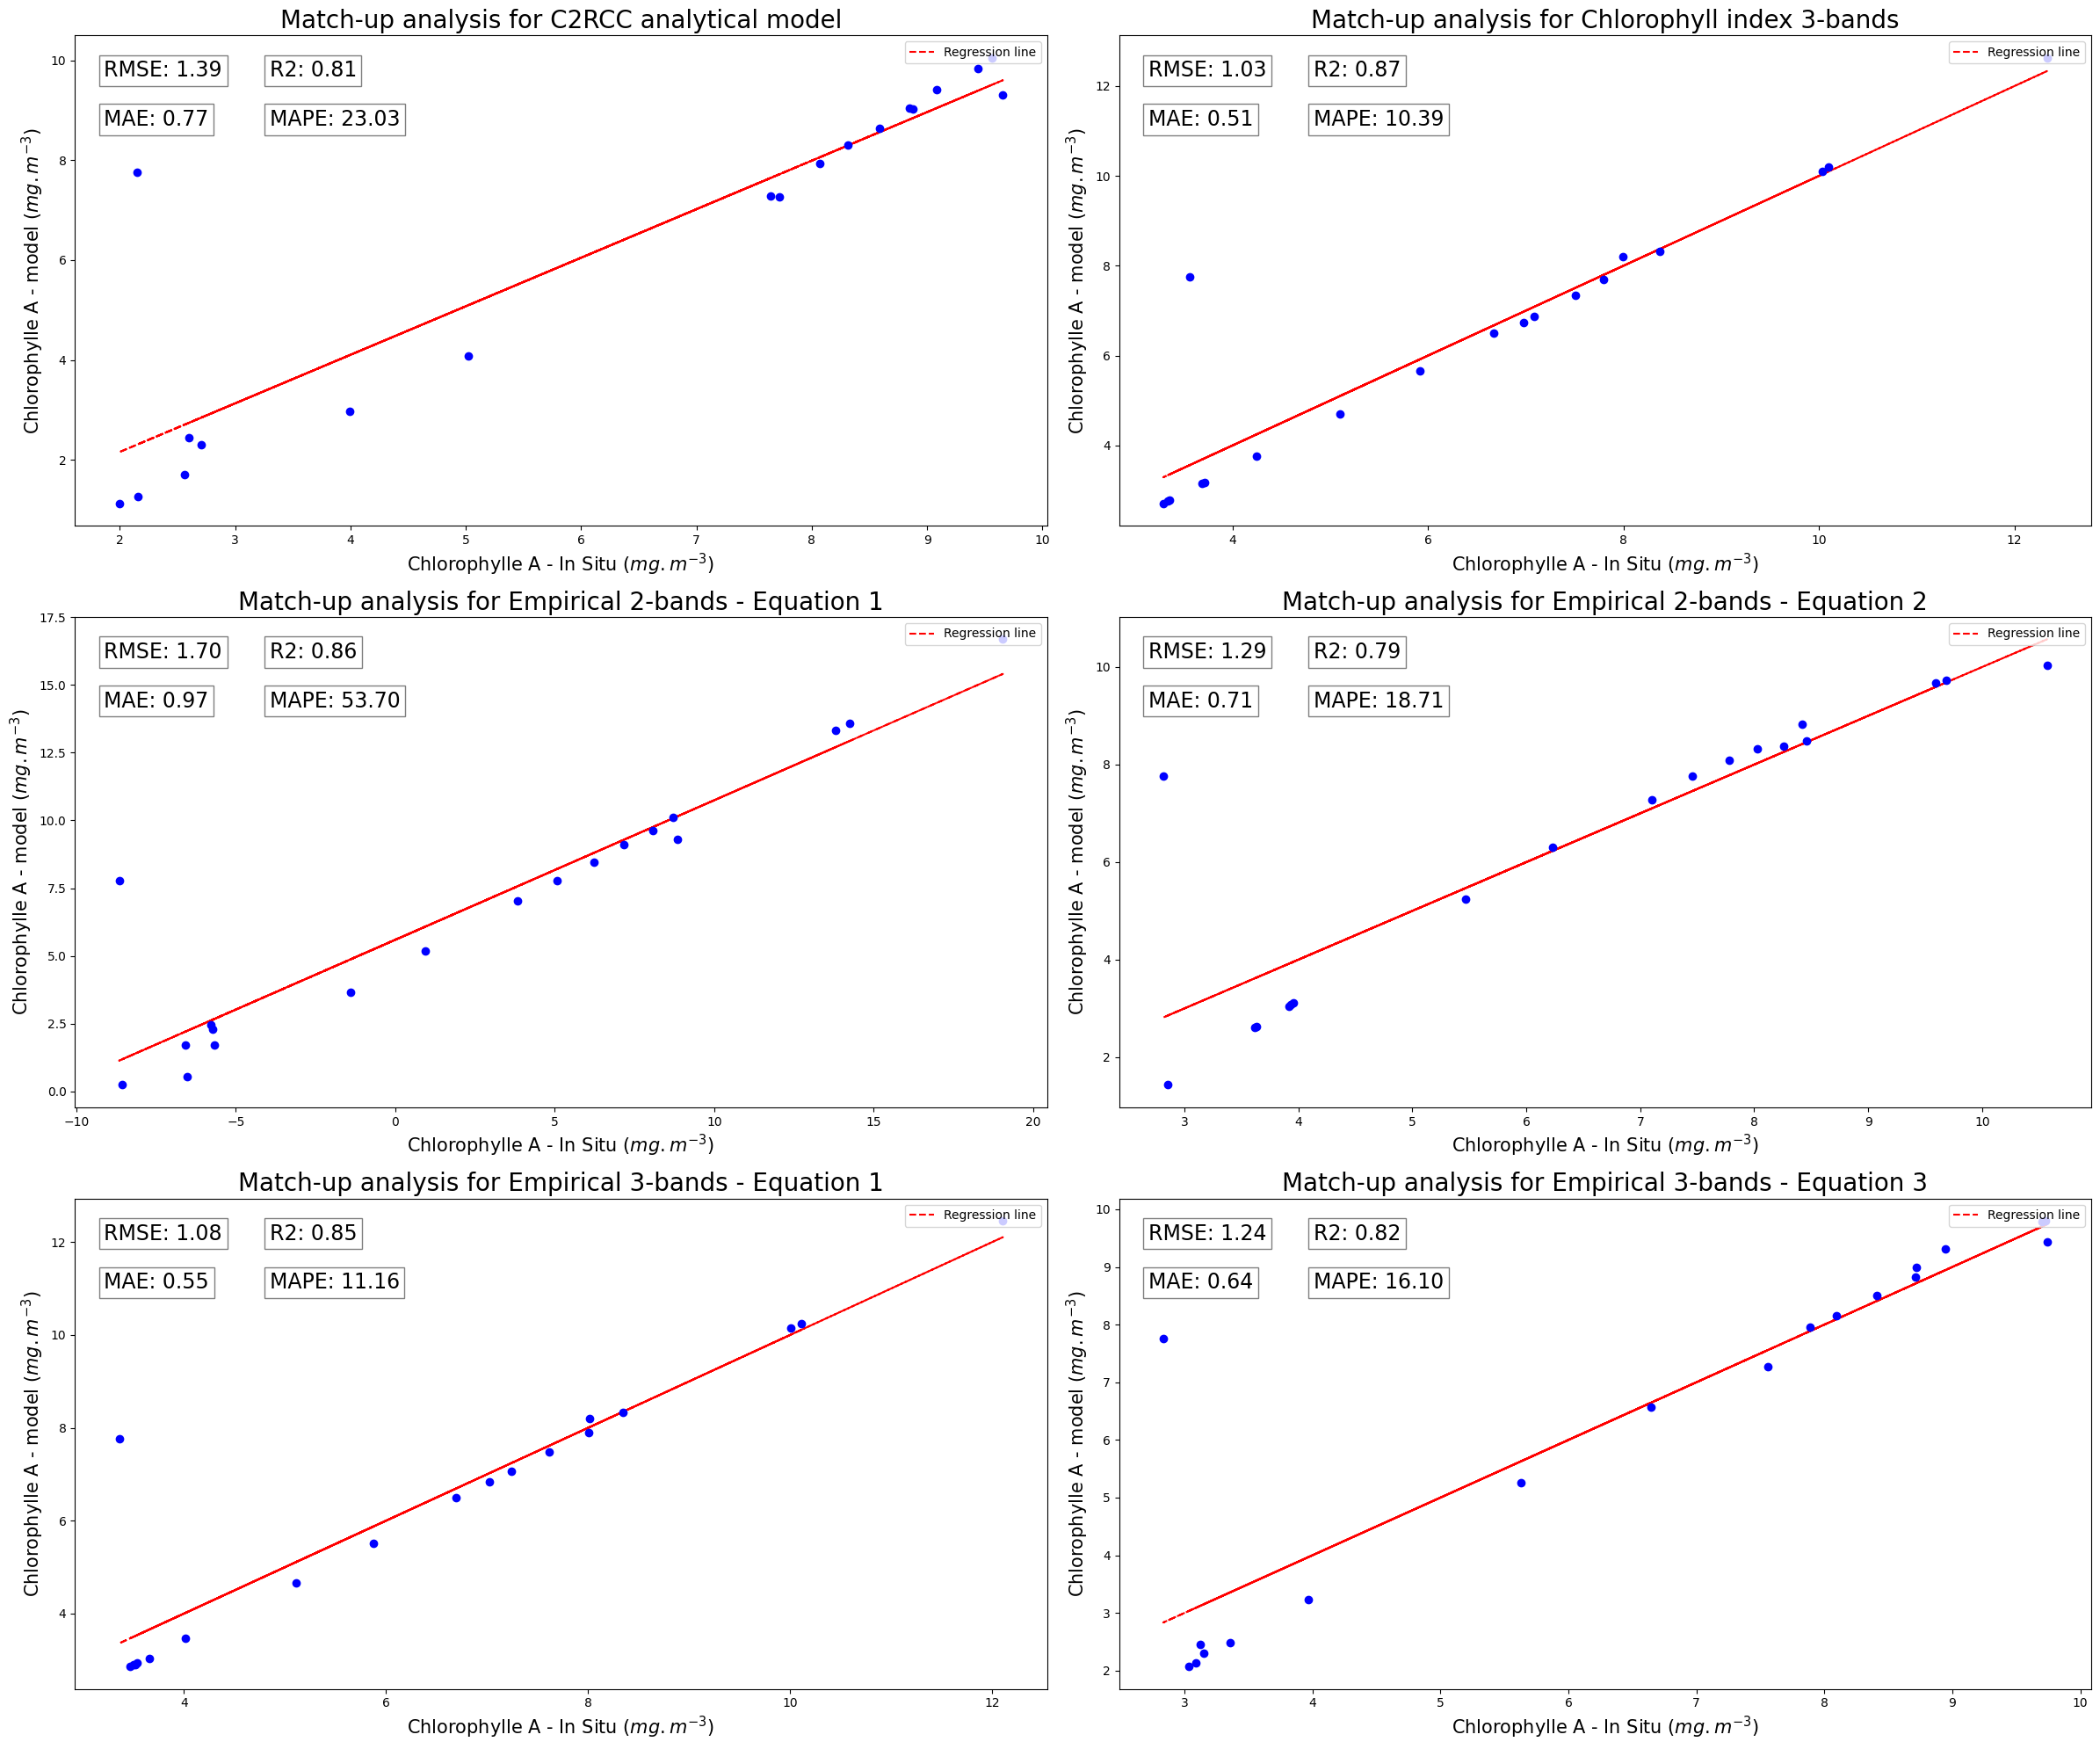

In [54]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Transforming the index of df_c2rcc into 'Date' again
if df_c2rcc.index.name == 'Date':
    df_c2rcc.reset_index(inplace=True)

fig, ax = plt.subplots(3, 2, figsize=(24,20))

i, j = 0, 0

# Loop through the columns and perform the analysis
for column in [ 'conc_chl', 'Chlorophyll index 3-bands', 'Empirical 2-bands - Equation 1', 'Empirical 2-bands - Equation 2',
        'Empirical 3-bands - Equation 1', 'Empirical 3-bands - Equation 3']:
    j = j + 1
    if j == 3:
        j = 1
        i = i + 1
    print(i, j-1)
    
    # Cria o modelo de regressão linear
    model = LinearRegression()

    chl_column_adjusted = 'chlorophylle A - Adjusted ' + column

    column = column + ' adjusted final'

    # Ajusta o modelo usando a coluna 'conc_chl' como variável independente e a coluna atual como variável dependente
    df_c2rcc2 = df_c2rcc[[chl_column_adjusted, column, 'Date']].dropna()
    model.fit(df_c2rcc2[[column]], df_c2rcc2[[chl_column_adjusted]])
    
    # # Create columns with logaritmic in base 10 values of chlorophyllle A and conc_chl
    # log_chla = 'log_' + chl_column_adjusted
    # log_column = 'log_' + column

    # df_c2rcc2[log_chla] = np.log10(df_c2rcc2[chl_column_adjusted]).dropna()
    # df_c2rcc2[log_column] = np.log10(df_c2rcc2[column]).dropna()
    # model2 = LinearRegression()
    # model2.fit(df_c2rcc2[[log_column]], df_c2rcc2[[log_chla]])


    ax[i, j -1].errorbar(df_c2rcc2[column], df_c2rcc2[chl_column_adjusted], fmt='o', color='blue', ecolor='lightgray', elinewidth=3, capsize=0)
    ax[i, j -1].plot(df_c2rcc2[column], model.predict(df_c2rcc2[[column]]), ls='--', color='red', label='Regression line')
    ax[i, j -1].set_xlabel('Chlorophylle A - In Situ ($mg.m^{-3}$)', fontsize=15)
    ax[i, j -1].set_ylabel('Chlorophylle A - model ($mg.m^{-3}$)', fontsize=15)
    ax[i, j -1].text(0.03, 0.95, f'RMSE: {mean_squared_error(df_c2rcc2[[chl_column_adjusted]], model.predict(df_c2rcc2[[column]])) ** 0.5:.2f}', transform=ax[i, j -1].transAxes, fontsize=17, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
    ax[i, j -1].text(0.20, 0.95, f'R2: {model.score(df_c2rcc2[[column]],df_c2rcc2[[chl_column_adjusted]]):.2f}', transform=ax[i, j -1].transAxes, fontsize=17, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
    ax[i, j -1].text(0.03, 0.85, f'MAE: {mean_absolute_error(df_c2rcc2[[chl_column_adjusted]], model.predict(df_c2rcc2[[column]])):.2f}', transform=ax[i, j -1].transAxes, fontsize=17, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
    ax[i, j -1].text(0.20, 0.85, f'MAPE: {np.mean(np.abs((model.predict(df_c2rcc2[[column]]) - df_c2rcc2[[chl_column_adjusted]]) / df_c2rcc2[[chl_column_adjusted]])) * 100:.2f}', transform=ax[i, j -1].transAxes, fontsize=17, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
    #ax[i, j -1].text(0.03, 0.75, f'Bias: {10 ** (np.mean(np.sum(model2.predict(df_c2rcc2[[log_column]]).T - df_c2rcc2[[log_chla]].values))):.2f}', transform=ax[i, j -1].transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
    if column == 'conc_chl adjusted final':
        ax[i, j -1].set_title('Match-up analysis for C2RCC analytical model', fontsize=20)
    else:
        ax[i, j -1].set_title('Match-up analysis for ' + column.replace(' adjusted final', ''), fontsize=20)
    ax[i, j -1].legend(fontsize=10, loc='upper right')

# hide axis without values
#ax[2, 1].axis('off')

plt.tight_layout()
plt.show()



In an attempt to improve the results, we can remove the images that had more noise in the visible spectrum:

Removal of the following dates: 04/11/2022, 08/04/2023, 28/05/2023, 02/06/2023, in addition to the date 09/02/2023 already removed by quality validation.

### Windows results - Ajustar depois com os dados obtidos pelo SNAP - TBD

In [ ]:
import os
import rasterio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Diretório contendo os arquivos .tif
directory = 'tif_files_final/'

# List for storing the paths of the .tif files
arquivos_tif = [os.path.join(directory, arquivo) for arquivo in os.listdir(directory) if arquivo.endswith('.tif')]

arquivos_tif_dict = {}
for arquivo_tif in arquivos_tif:
    # Extract date from the name of the file
    date = arquivo_tif.split('_')[4]
    # Convert the date to datetime format
    date = pd.to_datetime(date, format='%Y%m%dT%H%M%S')
    # Add the file path to the dictionary
    arquivos_tif_dict[date] = arquivo_tif

# Sort the dictionary by its keys (the dates)
arquivos_tif_dict = dict(sorted(arquivos_tif_dict.items()))

# Initialize an empty dataframe
df_windows_results = pd.DataFrame()
# List of bands for Reflectance TOA
band_indices_new = {'conc_chl': band_indices['conc_chl'], 'unc_chl': band_indices['unc_chl'], 'Chlorophyll index 3-bands': band_indices['3_bands_model_chl_conc'], \
                    'Empirical 2-bands - Equation 1': band_indices['empirical_2_bands_equation1'], 'Empirical 2-bands - Equation 2': band_indices['empirical_2_bands_equation2'], \
                    'Empirical 3-bands - Equation 1': band_indices['empirical_3_bands_equation1'], 'Empirical 3-bands - Equation 3': band_indices['empirical_3_bands_equation3'], \
                    'Rrs_B4': band_indices['rrs_B4'], 'Rrs_B5': band_indices['rrs_B5'], \
                    'Rrs_B6': band_indices['rrs_B6'], 'Rrs_B7': band_indices['rrs_B7']}

# Define the sensor location
sensor_latitude = 48.7744444
sensor_longitude = 2.4525

# Define the window size
window_size_3x3 = 3
window_size_5x5 = 5

# Iterate over each .tif file
for i, (date, arquivo_tif) in enumerate(arquivos_tif_dict.items()):
    # Open the .tif file
    with rasterio.open(arquivo_tif) as src:
        rrs_values = []
        for band_name, band_index in band_indices_new.items():
            rrs_band = src.read(band_index)
            rrs_band = rrs_band[(rrs_band != 0) & (~np.isnan(rrs_band))]

            # Classification of the bands with no values
            if rrs_band.size == 0:
                rrs_values.append(np.nan)
                rrs_values.append(np.nan)
                continue

            # Calculate the row and column indices of the sensor location
            col, row = src.index(sensor_longitude, sensor_latitude)

            # Extract the window around the sensor location
            window_3x3 = rrs_band[max(0, row - window_size_3x3):min(len(rrs_band), row + window_size_3x3 + 1)]
            window_5x5 = rrs_band[max(0, row - window_size_5x5):min(len(rrs_band), row + window_size_5x5 + 1)]

            # Calculate the mean values of the windows
            mean_rrs_band_3x3 = window_3x3.mean()
            mean_rrs_band_5x5 = window_5x5.mean()

            rrs_values.append(mean_rrs_band_3x3)
            rrs_values.append(mean_rrs_band_5x5)

            if not band_name in ['conc_chl', 'unc_chl']:
                error_rrs_band_3x3 = window_3x3.std()
                error_rrs_band_5x5 = window_5x5.std()

                rrs_values.append(error_rrs_band_3x3)
                rrs_values.append(error_rrs_band_5x5)

        # Create a dictionary with the date and mean values of each band
        data = {'Date': date, 'conc_chl': rrs_values[0], 'unc_chl': rrs_values[1], 'Chlorophyll index 3-bands': rrs_values[2], \
                'unc_Chlorophyll index 3-bands':rrs_values[3], \
                'Empirical 2-bands - Equation 1': rrs_values[4], 'unc_Empirical 2-bands - Equation 1': rrs_values[5],\
                'Empirical 2-bands - Equation 2': rrs_values[6], 'unc_Empirical 2-bands - Equation 2': rrs_values[7], \
                'Empirical 3-bands - Equation 1': rrs_values[8], 'unc_Empirical 3-bands - Equation 1': rrs_values[9],\
                'Empirical 3-bands - Equation 3': rrs_values[10], 'unc_Empirical 3-bands - Equation 3': rrs_values[11], \
                'Rrs_B4':  rrs_values[12], 'Rrs_B5':  rrs_values[13], \
                'Rrs_B6':  rrs_values[14], 'Rrs_B7':  rrs_values[15]
                }

        # Append the dictionary as a new row to the dataframe
        df_windows_results = pd.concat([df_windows_results, pd.DataFrame(data, index=[0])], ignore_index=True)

# Remove the images that didn't pass the quality control
df_windows_results.dropna(inplace=True)

# Print the dataframe
display(df_windows_results)


C:\Users\arthu\AppData\Local\Temp\ipykernel_16692\3784230140.py:65: RuntimeWarning: Mean of empty slice.
  mean_rrs_band_3x3 = window_3x3.mean()
c:\Users\arthu\anaconda3\envs\remote_sensing\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\arthu\AppData\Local\Temp\ipykernel_16692\3784230140.py:66: RuntimeWarning: Mean of empty slice.
  mean_rrs_band_5x5 = window_5x5.mean()
c:\Users\arthu\anaconda3\envs\remote_sensing\lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\arthu\anaconda3\envs\remote_sensing\lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\arthu\anaconda3\envs\remote_sensing\lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered

Empty DataFrame
Columns: [Date, conc_chl, unc_chl, Chlorophyll index 3-bands, unc_Chlorophyll index 3-bands, Empirical 2-bands - Equation 1, unc_Empirical 2-bands - Equation 1, Empirical 2-bands - Equation 2, unc_Empirical 2-bands - Equation 2, Empirical 3-bands - Equation 1, unc_Empirical 3-bands - Equation 1, Empirical 3-bands - Equation 3, unc_Empirical 3-bands - Equation 3, Rrs_B4, Rrs_B5, Rrs_B6, Rrs_B7]
Index: []

### Comparing the results of Copernicus Browser Scripts using L1C images

In [ ]:
import pandas as pd

consolitaded_df = pd.read_csv('C:/Users/arthu/Documents/GitHub/remote_sensing_lac_creteil/images_scripts_test/results_final_bands.csv')
consolitaded_df['date'] = pd.to_datetime(consolitaded_df['date'], format = '%Y-%m-%d')

#Set the 'time' column as the index
consolitaded_df.set_index('date', inplace=True)

# Merge with in loco data

consolitaded_df = pd.merge_asof(consolitaded_df, df_loco, right_index = True, left_index = True,  direction='nearest')

consolitaded_df.drop(columns=['Unnamed: 2'], inplace=True)
consolitaded_df.dropna(inplace=True)

# drop row max_error = 0
consolitaded_df = consolitaded_df[consolitaded_df['max_error'] != 0]

display(consolitaded_df)

name   Band  average  max_error  maximum  median   minimum  \
date                                                                      
2022-10-07  world  NDCIv   4.2149     0.0326   5.0689  4.3181  -27.5770   
2022-10-22  world  NDCIv   5.3311     0.0309   6.8928  5.3474  -24.0150   
2022-11-01  world  NDCIv   2.4357     0.0389   4.5806  2.6767  -34.2735   
2022-11-04  world  NDCIv   3.1827     0.0592   4.5652  3.3821  -54.5891   
2023-01-18  world  NDCIv   2.1816     0.0408   4.9125  2.4261  -35.8482   
2023-02-07  world  NDCIv   1.7387     0.0467   4.9316  2.0336  -41.8101   
2023-02-14  world  NDCIv   2.2270     0.0301   4.8071  2.4312  -25.2678   
2023-02-27  world  NDCIv   2.4194     0.0774   5.2490  2.9255  -72.2009   
2023-04-03  world  NDCIv   2.2807     0.0667   4.7394  2.7396  -61.9215   
2023-04-05  world  NDCIv   3.3561     0.0411   4.7152  3.6055  -36.3850   
2023-04-08  world  NDCIv   2.9291     0.0492   4.6132  3.3342  -44.5776   
2023-05-03  world  NDCIv   3.4456     0.0265   4.7160  3.9475  -21.7846   
2023-05-20  world  NDCIv   2.8426     0.0626   4.7019  3.2004  -57.8576   
2023-05-25  world  NDCIv   3.8176     0.0339   4.7338  4.0218  -29.1713   
2023-05-28  world  NDCIv   1.9704     0.0238   4.5431  3.6623  -19.2632   
2023-06-02  world  NDCIv   2.6136     0.0439   4.8569  3.4522  -39.0406   
2023-06-04  world  NDCIv   3.0860     0.0588   4.8091  3.3970  -54.0299   
2023-06-07  world  NDCIv   2.2754     0.0385   4.4794  2.9795  -33.9791   
2023-06-14  world  NDCIv   2.8836     0.0632   4.7455  3.1033  -58.4181   
2023-08-21  world  NDCIv   1.4785     0.0931   4.1236  1.8882  -89.0175   
2023-09-02  world  NDCIv   1.5415     0.1288   4.4821  1.9069 -124.2790   
2023-09-07  world  NDCIv   1.4865     0.1664   4.9178  1.7571 -161.4348   
2023-09-10  world  NDCIv   2.8475     0.0721   4.4078  3.1106  -67.6603   
2023-09-15  world  NDCIv   3.1224     0.1291   4.8760  3.3266 -124.2333   
2023-09-25  world  NDCIv   2.7825     0.0609   4.0494  3.0133  -56.8941   

            p80_threshold  p85_threshold  p90_threshold   sigma   total  \
date                                                                      
2022-10-07         4.4813         4.5140         4.5792  1.3213  2573.0   
2022-10-22         5.5329         5.5947         5.6565  0.7462  2575.0   
2022-11-01         3.1819         3.2984         3.4150  2.0557  2694.0   
2022-11-04         3.8553         3.9736         4.0919  1.9165  1308.0   
2023-01-18         3.1598         3.3636         3.5266  2.3364  2972.0   
2023-02-07         2.8282         2.9684         3.2489  2.7374  2991.0   
2023-02-14         2.9725         3.1530         3.3334  1.9438  2977.0   
2023-02-27         3.5451         3.6225         3.7774  3.6874  2941.0   
2023-04-03         3.2729         3.4062         3.6062  3.2354  2835.0   
2023-04-05         3.8932         3.9343         4.0165  2.0844  2576.0   
2023-04-08         3.6786         3.7769         3.8753  2.7051  1760.0   
2023-05-03         4.1065         4.1330         4.1860  2.7323   607.0   
2023-05-20         3.5758         3.7009         3.8260  3.2459  2155.0   
2023-05-25         4.2252         4.2591         4.2931  1.9600  1522.0   
2023-05-28         4.1384         4.2098         4.2812  4.5612   122.0   
2023-06-02         3.9789         4.0667         4.1984  4.2660   350.0   
2023-06-04         3.7500         3.8088         3.8677  2.4770  2398.0   
2023-06-07         3.5564         3.6718         3.8641  3.7895   573.0   
2023-06-14         3.4823         3.5454         3.6717  2.3887  2617.0   
2023-08-21         2.5402         2.7265         2.9127  3.7130  2422.0   
2023-09-02         2.4219         2.5507         2.6794  3.7291  2511.0   
2023-09-07         2.5888         2.7552         2.9215  4.6248  2606.0   
2023-09-10         3.4710         3.5430         3.6872  2.9397  2547.0   
2023-09-15         3.7140         3.8431         3.8431  3.1989  2690.0   
2023-09-25         3.4399         3.5

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Create a DataFrame to store the results
results_df_browser = pd.DataFrame(columns=['Metric'])

# Loop through the columns and perform the analysis
for column in ['average']:
    
    # Cria o modelo de regressão linear
    model = LinearRegression()

    # Ajusta o modelo usando a coluna 'conc_chl' como variável independente e a coluna atual como variável dependente
    model.fit(consolitaded_df[['chlorophylle A']], consolitaded_df[column])

    # Prevê os valores usando o modelo
    predicted_values = model.predict(consolitaded_df[['chlorophylle A']])

    # Cálculo do R²
    r2 = r2_score(consolitaded_df[column], predicted_values)

    # Cálculo do Mean Absolute Percentage Difference (MAPD)
    mapd = np.mean(np.abs((consolitaded_df[column] - predicted_values) / consolitaded_df[column])) * 100

    # Cálculo do Root Mean Square Deviation (RMSD)
    rmsd = np.sqrt(mean_squared_error(consolitaded_df[column], predicted_values))

    # Cálculo do Mean Relative Difference (MRD)
    mrd = np.mean((consolitaded_df[column] - predicted_values) / consolitaded_df[column]) * 100

    # Append the results to the DataFrame
    results_df_browser = pd.concat([results_df_browser, pd.DataFrame([[column, r2, mapd, rmsd, mrd]], columns=['Metric', 'R²', 'MAPD', 'RMSD', 'MRD'])], ignore_index=True)

# Display the results DataFrame
display(results_df_browser)

Metric        R²       MAPD      RMSD       MRD
0  average  0.088277  25.466039  0.829715 -9.028214

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
import matplotlib.dates as mdates

# Suponha que 'df' seja o seu DataFrame contendo os dados de clorofila

# Create a slider widget for selecting the time range
start_date_widget = widgets.DatePicker(description='Start Date', value=pd.to_datetime('2022-09-30'))
end_date_widget = widgets.DatePicker(description='End Date', value=pd.to_datetime('2023-10-30'))

# Define a function to update the plot based on the selected time range
def update_plot(start_date, end_date):
    filtered_df = df_loco.loc[start_date:end_date]
    filtered_df2 = df_datalab.loc[start_date:end_date]
    filtered_df3 = df_vimeo.loc[start_date:end_date]
    filtered_df5 = depth_between_1_and_2.loc[start_date:end_date]
    filtered_df6 = df_c2rcc.loc[start_date:end_date]
    filtered_df7 = consolitaded_df.loc[start_date:end_date]
    
    
    
    # Resample the data to daily frequency and calculate the mean for each day
    daily_mean1 = filtered_df['chlorophylle A'].resample('D').mean()
    daily_mean4 = filtered_df['chlorophylle A'].resample('D').median()
    daily_mean2 = filtered_df2['Chla Conc'].resample('D').mean()
    daily_mean3 = filtered_df3['totChl'].resample('D').mean()
    daily_mean5 = filtered_df5['totChl'].resample('D').mean()

    # Plotting the data
    daily_mean6 = filtered_df6['conc_chl'].resample('D').mean().dropna()
    daily_mean6_unc = filtered_df6['unc_chl'].resample('D').mean().dropna()

    daily_mean12= filtered_df7['average'].resample('D').mean().dropna()
    daily_mean12_unc = filtered_df7['sigma'].resample('D').mean().dropna()

    
    # Resample the data to daily frequency and calculate the mean for each day
   
    
    # Configuring the single plot
    fig, ax = plt.subplots(figsize=(20, 10))


    daily_mean4.plot(kind='line', marker='o', label='Chlorophylle A - In Situ (Median)')

    # Ploting conc_chl and use unc_chl as error
    ax.errorbar(daily_mean6.index, daily_mean6, yerr=daily_mean6_unc, ls = '--', marker='o', label='Chlorophylle A - C2RCC')
    ax.errorbar(daily_mean12.index, daily_mean12, yerr=daily_mean12_unc, ls= '-.', marker='o', label='NDVIv')

    
    plt.ylabel('Chlorophylle-A concentration ($mg.m^{-3}$)')
    plt.xlabel('Date')
    plt.ylim(0)
    plt.title('Time series of chlorophylle-A concentration by different methods')
    plt.legend()
    
    # Format x-axis ticks as months (mm/yyyy)
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
    
    plt.show()

# Create an interactive output widget
output = widgets.interactive_output(update_plot, {'start_date': start_date_widget, 'end_date': end_date_widget})

# Display the widgets and the output
display(start_date_widget, end_date_widget, output)

DatePicker(value=Timestamp('2022-09-30 00:00:00'), description='Start Date', step=1)

DatePicker(value=Timestamp('2023-10-30 00:00:00'), description='End Date', step=1)

Output()

### Trying to analyse L2A images plotted like Copernicus Browser - TBD

### Trying to adjust the parameters of the models

In [ ]:
"""

Models of calculation of chlorophyll concentration

1. 3_bands_model_chl_conc - 161.24*((1/ rrs_B4 - 1/ rrs_B5)/(1/ rrs_B6 - 1/ rrs_B5))+28.04
3. empirical_2_bands_equation1 - 136.3 * (rrs_B6/rrs_B4) - 16.2
4. empirical_2_bands_equation2 - 25.28*((rrs_B5/rrs_B4)*(rrs_B5/rrs_B4)) + 14.85 * (rrs_B5/rrs_B4) - 15.18
5. empirical_3_bands_equation1 - 117.42 * ((1/rrs_B4 - 1/rrs_B5))*rrs_B6 + 23.174
6. empirical_3_bands_equation3 - 315.5 * (((1/rrs_B4 - 1/rrs_B5))*rrs_B6)*(((1/rrs_B4 - 1/rrs_B5))*rrs_B6)+ 215.95 * ((1/rrs_B4 - 1/rrs_B5))*rrs_B6 + 25.66

"""

# Ordena ambos os DataFrames pelo índice (que agora é a coluna de datas 'time')
df_loco = df_loco.sort_index()
df_c2rcc = df_c2rcc.sort_index()

# Utiliza o método merge_asof para encontrar as datas mais próximas
result = pd.merge_asof(df_c2rcc, df_loco, right_index = True, left_index = True,  direction='nearest')


from scipy.optimize import curve_fit
import numpy as np

# Assuming df_c2rcc and df_loco DataFrames have been merged into 'result'

# Define the models
def three_bands_model_chl_conc(rrs_B4, rrs_B5, rrs_B6, a = 1, b = 1):
    return a * ((1/ rrs_B4 - 1/ rrs_B5)/(1/ rrs_B6 - 1/ rrs_B5)) + b

def empirical_2_bands_equation1(rrs_B6, rrs_B4, a, b):
    return a * (rrs_B6/rrs_B4) - b

def empirical_2_bands_equation2(rrs_B5, rrs_B4, a, b, c):
    return a*((rrs_B5/rrs_B4)*(rrs_B5/rrs_B4)) + b * (rrs_B5/rrs_B4) - c

def empirical_3_bands_equation1(rrs_B4, rrs_B5, rrs_B6, a, b):
    return a * ((1/rrs_B4 - 1/rrs_B5))*rrs_B6 + b

def empirical_3_bands_equation3(rrs_B4, rrs_B5, rrs_B6, a, b, c):
    return a * (((1/rrs_B4 - 1/rrs_B5))*rrs_B6)*(((1/rrs_B4 - 1/rrs_B5))*rrs_B6)+ b * ((1/rrs_B4 - 1/rrs_B5))*rrs_B6 + c

# Extract data
rrs_B4 = result['Rrs_B4']
rrs_B5 = result['Rrs_B5']
rrs_B6 = result['Rrs_B6']
chlorophylle_A = result['chlorophylle A']

# Fit the models
popt_three_bands, _ = curve_fit(three_bands_model_chl_conc, (rrs_B4, rrs_B5, rrs_B6), chlorophylle_A)
popt_empirical_2_bands_1, _ = curve_fit(empirical_2_bands_equation1, (rrs_B6, rrs_B4), chlorophylle_A)
popt_empirical_2_bands_2, _ = curve_fit(empirical_2_bands_equation2, (rrs_B5, rrs_B4), chlorophylle_A)
popt_empirical_3_bands_1, _ = curve_fit(empirical_3_bands_equation1, (rrs_B4, rrs_B5, rrs_B6), chlorophylle_A)
popt_empirical_3_bands_3, _ = curve_fit(empirical_3_bands_equation3, (rrs_B4, rrs_B5, rrs_B6), chlorophylle_A)

# Print the optimized parameters
print('Optimized parameters for three_bands_model_chl_conc:', popt_three_bands)
print('Optimized parameters for empirical_2_bands_equation1:', popt_empirical_2_bands_1)
print('Optimized parameters for empirical_2_bands_equation2:', popt_empirical_2_bands_2)
print('Optimized parameters for empirical_3_bands_equation1:', popt_empirical_3_bands_1)
print('Optimized parameters for empirical_3_bands_equation3:', popt_empirical_3_bands_3)

KeyError: 'chlorophylle A'

Plot graphics of each model

In [ ]:
# Labeling bands

band_labels = [
        '3_bands_model_chl_conc',
        'pixel_classif_flags',
        'rtoa_B1',
        'rtoa_B2',
        'rtoa_B3',
        'rtoa_B4',
        'rtoa_B5',
        'rtoa_B6',
        'rtoa_B7',
        'rtoa_B8',
        'rtoa_B8A',
        'rtoa_B9',
        'rtoa_B10',
        'rtoa_B11',
        'rtoa_B12',
        'rpath_B1',
        'rpath_B2',
        'rpath_B3',
        'rpath_B4',
        'rpath_B5',
        'rpath_B6',
        'rpath_B7',
        'rpath_B8A',
        'rrs_B1',
        'rrs_B2',
        'rrs_B3',
        'rrs_B4',
        'rrs_B5',
        'rrs_B6',
        'rrs_B7',
        'rrs_B8A',
        'rhown_B1',
        'rhown_B2',
        'rhown_B3',
        'rhown_B4',
        'rhown_B5',
        'rhown_B6',
        'iop_apig',
        'iop_adet',
        'iop_agelb',
        'iop_bpart',
        'iop_bwit',
        'iop_adg',
        'iop_atot',
        'iop_btot',
        'kd489',
        'kdmin',
        'kd_z90max',
        'conc_tsm',
        'conc_chl',
        'unc_apig',
        'unc_adet',
        'unc_agelb',
        'unc_bpart',
        'unc_bwit',
        'unc_adg',
        'unc_atot',
        'unc_btot',
        'unc_tsm',
        'unc_chl',
        'unc_kd489',
        'unc_kdmin',
        'unc_kd_z90max',
        'c2rcc_flags',
        'MCI',
        'empirical_2_bands_equation1',
        'empirical_2_bands_equation2',
        'empirical_3_bands_equation1',
        'empirical_3_bands_equation3'
    ]
# Create a list with indices of each band label
band_indices = dict(zip(band_labels, range(1, len(band_labels)+1)))




###  Plot the C2RCC data after processing

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
import matplotlib.dates as mdates

# Suponha que 'df' seja o seu DataFrame contendo os dados de clorofila

# Create a slider widget for selecting the time range
start_date_widget = widgets.DatePicker(description='Start Date', value=pd.to_datetime('2022-09-30'))
end_date_widget = widgets.DatePicker(description='End Date', value=pd.to_datetime('2023-10-30'))

# Define a function to update the plot based on the selected time range
def update_plot(start_date, end_date):
    filtered_df = df_loco.loc[start_date:end_date]
    filtered_df2 = df_datalab.loc[start_date:end_date]
    filtered_df3 = df_vimeo.loc[start_date:end_date]
    filtered_df5 = depth_between_1_and_2.loc[start_date:end_date]
    filtered_df6 = df_c2rcc.loc[start_date:end_date]
    
    
    
    # Resample the data to daily frequency and calculate the mean for each day
    daily_mean1 = filtered_df['chlorophylle A'].resample('D').mean()
    daily_mean4 = filtered_df['chlorophylle A'].resample('D').median()
    daily_mean2 = filtered_df2['Chla Conc'].resample('D').mean()
    daily_mean3 = filtered_df3['totChl'].resample('D').mean()
    daily_mean5 = filtered_df5['totChl'].resample('D').mean()

    # Plotting the data
    daily_mean6 = filtered_df6['conc_chl'].resample('D').mean().dropna()
    daily_mean6_unc = filtered_df6['unc_chl'].resample('D').mean().dropna()

    daily_mean7= filtered_df6['Chlorophyll index 3-bands'].resample('D').mean().dropna()
    daily_mean7_unc = filtered_df6['unc_Chlorophyll index 3-bands'].resample('D').mean().dropna()

    daily_mean8= filtered_df6['Empirical 2-bands - Equation 1'].resample('D').mean().dropna()
    daily_mean8_unc = filtered_df6['unc_Empirical 2-bands - Equation 1'].resample('D').mean().dropna()

    daily_mean9= filtered_df6['Empirical 2-bands - Equation 2'].resample('D').mean().dropna()
    daily_mean9_unc = filtered_df6['unc_Empirical 2-bands - Equation 2'].resample('D').mean().dropna()

    daily_mean10= filtered_df6['Empirical 3-bands - Equation 1'].resample('D').mean().dropna()
    daily_mean10_unc = filtered_df6['unc_Empirical 3-bands - Equation 1'].resample('D').mean().dropna()

    daily_mean11= filtered_df6['Empirical 3-bands - Equation 3'].resample('D').mean().dropna()
    daily_mean11_unc = filtered_df6['unc_Empirical 3-bands - Equation 3'].resample('D').mean().dropna()

    
    # Resample the data to daily frequency and calculate the mean for each day
    daily_mean_secchi = filtered_df2['Secchi_m'].resample('D').mean()
    

    
    # Resample the data to daily frequency and calculate the mean for each day
   
    
    # Configuring the single plot
    fig, ax = plt.subplots(figsize=(20, 10))

    # Hidden the other plots
    #daily_mean1.plot(kind='line', marker='o', label='Chlorophylle A - In Situ (Mean)')
    #daily_mean3.plot(kind='line', marker='o', label='Chlorophylle A - Vimeo all depths')
    #daily_mean5.plot(kind='line', marker='o', label='Chlorophylle A - Vimeo between 1 and 2 meters depths')

    daily_mean4.plot(kind='line', marker='o', alpha = 0.5, label='Chlorophylle A - In Situ (Median)')
    daily_mean2.plot(kind='line', marker='o', label='Chlorophylle A - Laboratory')

    # Ploting conc_chl and use unc_chl as error
    ax.errorbar(daily_mean6.index, daily_mean6, yerr=daily_mean6_unc, ls = '', markersize = 7, marker='s', label='Chlorophylle A - C2RCC') # Or ls ='--' for dashed lines
    
    #ax.errorbar(daily_mean7.index, daily_mean7, yerr=daily_mean7_unc, marker='o', label='Chlorophylle A - Chlorophyll index 3-bands')
    # ax.errorbar(daily_mean8.index, daily_mean8, yerr=daily_mean8_unc, marker='o', label='Chlorophylle A - Empirical 2-bands - Equation 1')
    # ax.errorbar(daily_mean9.index, daily_mean9, yerr=daily_mean9_unc, marker='o', label='Chlorophylle A - Empirical 2-bands - Equation 2')
    # ax.errorbar(daily_mean10.index, daily_mean10, yerr=daily_mean10_unc, marker='o', label='Chlorophylle A - Empirical 3-bands - Equation 1')
    # ax.errorbar(daily_mean11.index, daily_mean11, yerr=daily_mean11_unc, marker='o', label='Chlorophylle A - Empirical 3-bands - Equation 3')

    
    plt.ylabel('Chlorophylle-A concentration ($mg.m^{-3}$)')
    plt.xlabel('Date')
    plt.ylim(0)
    plt.title('Time series of chlorophylle-A concentration by different methods')
    plt.legend()

    
    # Create a second y-axis for Secchi depth
    ax2 = ax.twinx()
    
    # Plot Secchi depth on the second y-axis
    ax2.bar(daily_mean_secchi.index, daily_mean_secchi, alpha=0.2, color='blue', label='Secchi depth')
    ax2.set_ylabel('Secchi depth (m)')
    ax2.set_ylim(0, 6)
    ax2.legend()
    
    # Format x-axis ticks as months (mm/yyyy)
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
    
    plt.show()

# Create an interactive output widget
output = widgets.interactive_output(update_plot, {'start_date': start_date_widget, 'end_date': end_date_widget})

# Display the widgets and the output
display(start_date_widget, end_date_widget, output)

DatePicker(value=Timestamp('2022-09-30 00:00:00'), description='Start Date', step=1)

DatePicker(value=Timestamp('2023-10-30 00:00:00'), description='End Date', step=1)

Output()

### Análise do mês de maio a julho

In [ ]:
daily_mean6 = df_c2rcc['conc_chl'].resample('D').mean().dropna()
daily_mean6

Date
2022-10-07    12.639685
2022-10-22    11.492252
2022-11-01     8.879948
2022-11-04     9.507055
2023-01-18     7.477668
2023-02-07    16.193861
2023-02-14     2.370013
2023-02-27    11.119368
2023-04-03    14.697074
2023-04-05     1.058552
2023-04-08    11.075877
2023-05-03     2.716580
2023-05-20     0.293951
2023-05-25     0.176158
2023-05-28     9.378928
2023-05-30     0.147862
2023-06-02    14.173524
2023-06-04     0.312143
2023-06-07     7.381867
2023-06-14     0.347141
2023-08-21     8.389313
2023-09-02     0.176476
2023-09-07     0.143695
2023-09-10    12.387043
2023-09-15    13.140839
2023-09-25    23.802292
Name: conc_chl, dtype: float32

C:\Users\arthu\AppData\Local\Temp\ipykernel_16692\3224583764.py:49: RuntimeWarning: Mean of empty slice.
  mean_rrs_band = rrs_band.mean()
c:\Users\arthu\anaconda3\envs\remote_sensing\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\arthu\anaconda3\envs\remote_sensing\lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\arthu\anaconda3\envs\remote_sensing\lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\arthu\anaconda3\envs\remote_sensing\lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


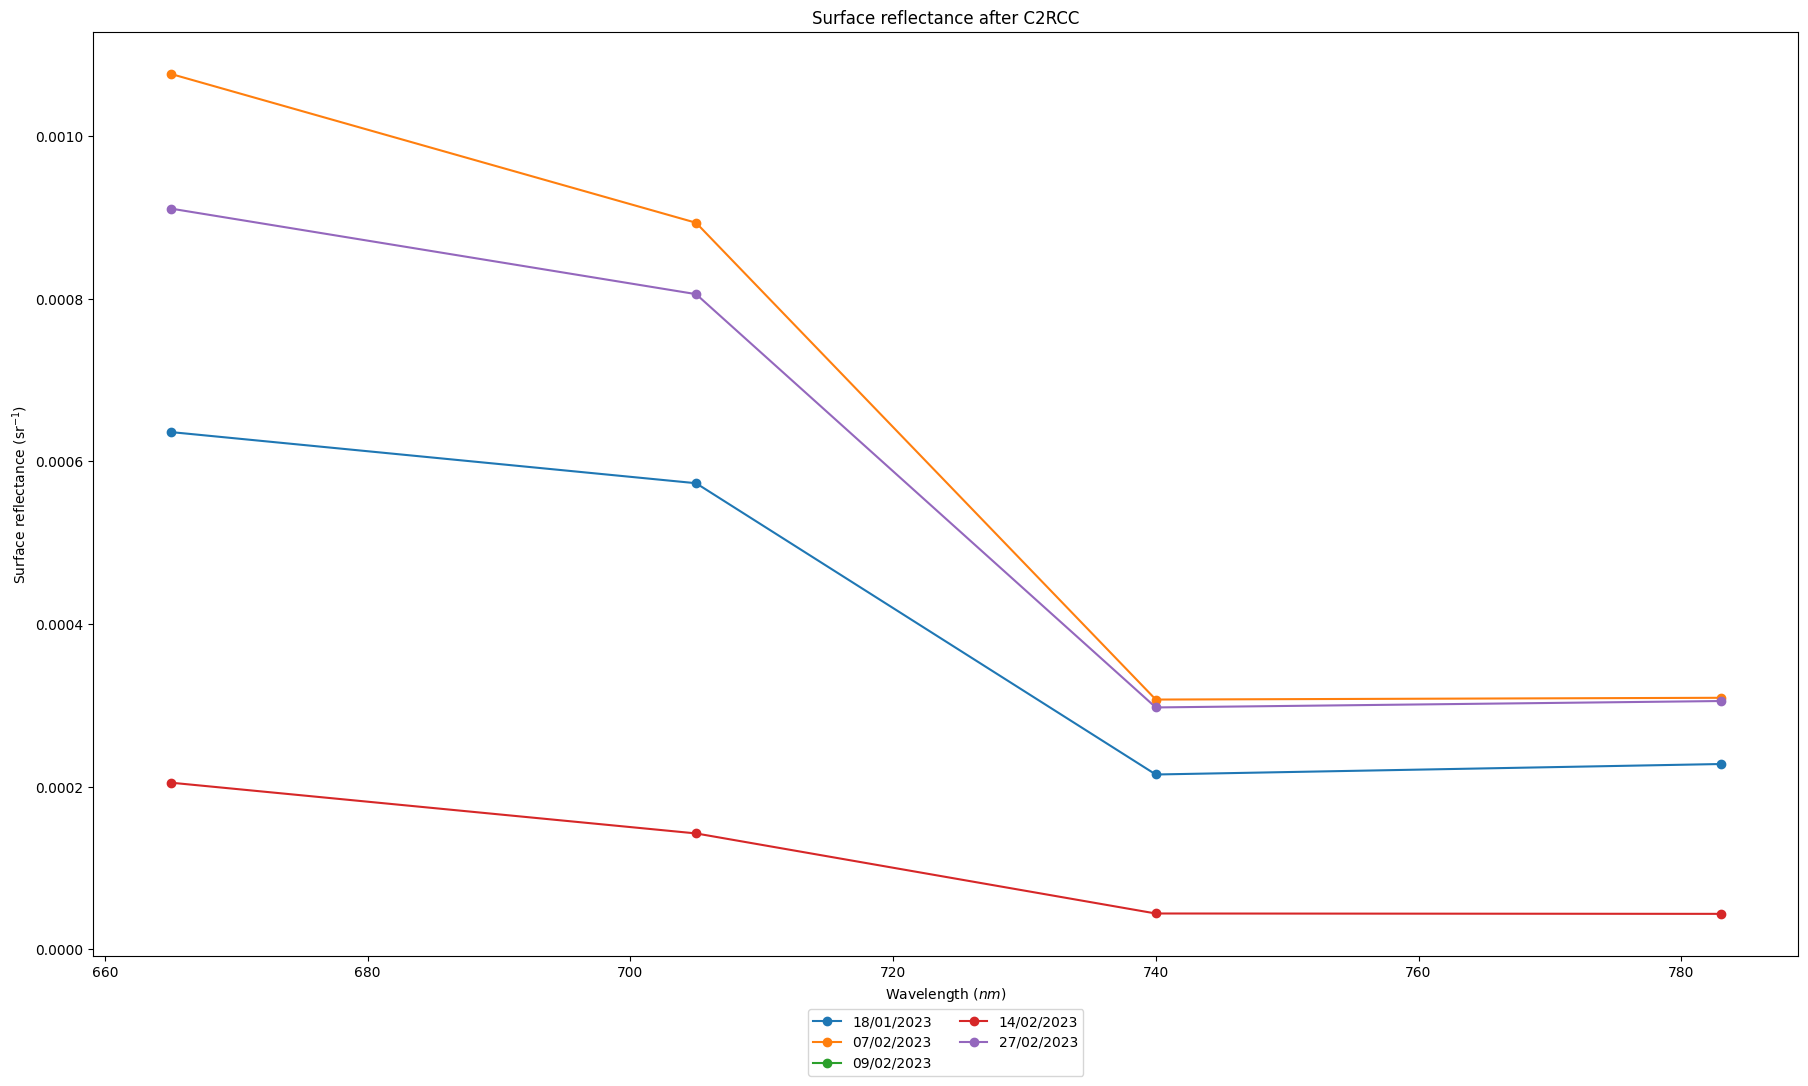

In [ ]:
import os
import rasterio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Diretório contendo os arquivos .tif
directory = 'tif_files_final/'

# List for storing the paths of the .tif files
arquivos_tif = [os.path.join(directory, arquivo) for arquivo in os.listdir(directory) if arquivo.endswith('.tif')]

arquivos_tif_dict = {}
for arquivo_tif in arquivos_tif:
    # Extract date from the name of the file
    date = arquivo_tif.split('_')[4]
    # Convert the date to datetime format
    date = pd.to_datetime(date, format='%Y%m%dT%H%M%S')
    # Add the file path to the dictionary
    arquivos_tif_dict[date] = arquivo_tif

# Sort the dictionary by its keys (the dates)
arquivos_tif_dict = dict(sorted(arquivos_tif_dict.items()))

arquivos_tif_dict = {date: arquivo_tif for date, arquivo_tif in arquivos_tif_dict.items() if date.year == 2023 and date.month in [1,2]}

# Configuring the single plot
fig, ax = plt.subplots(figsize=(22, 12))

# List of bands for Reflectance TOA
band_indices_new = { 'B4': band_indices['rrs_B4'], 'B5': band_indices['rrs_B5'], \
                 'B6': band_indices['rrs_B6'], 'B7': band_indices['rrs_B7']}

# Initialize lists to store all reflectance values
all_rrs_values = []

# Iterate over each .tif file
for i, (date, arquivo_tif) in enumerate(arquivos_tif_dict.items()):
    # Open the .tif file
    with rasterio.open(arquivo_tif) as src:

        wavelengths = [ 665, 705, 740, 783]
        std_rrs_band = []
        rrs_values = []

        for band_name, band_index in band_indices_new.items():
            rrs_band = src.read(band_index)
            rrs_band = rrs_band[(rrs_band != 0) & (~np.isnan(rrs_band))]
            mean_rrs_band = rrs_band.mean()
            std_rrs_band.append(rrs_band.std())  # Calculate the standard deviation
            rrs_values.append(mean_rrs_band)

        # Plot the standard deviation as error bars
        ax.errorbar(wavelengths, rrs_values, marker='o', label=f'{date.strftime("%d/%m/%Y")}')

# Set x-axis and y-axis labels
ax.set_xlabel('Wavelength ($nm$)')
ax.set_ylabel('Surface reflectance (sr$^{-1}$)')
ax.set_title('Surface reflectance after C2RCC')

# Place the legend below the plot
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=len(arquivos_tif_dict)/2)

# Display the figure
plt.show()

#### Explicações para a remoção das imagens:

25/05/2023 e 30/05/2023 tiverem efeitos que afetaram o sensor de captar corretamente os níveis de reflectância reais, sendo então excluidas da análise como outliers.

----- Obs: 22/10/2022 podemos ver que o lago ele está com grande presença de clorofila, que pode ser atestado no teste local, porém o sensor, como está mais na superfície, pega um valor subestimado.

As imagens do dia 07/02/2023, 03/04/2023, 08/04/2023 e 21/08/2023 devem ser excluidas devido ao ruído gerado pelo espalhamento.

As imagens no mês de fevereiro já sendo excluida a imagem 09/02/2023 pelos filtros do IdePix


In [ ]:
df_c2rcc

conc_chl   unc_chl  Chlorophyll index 3-bands  \
Date                                                                  
2022-10-07 10:49:31  12.639685  2.240423                  11.419353   
2022-10-22 10:50:09  11.492252  1.654627                   9.328502   
2022-11-01 10:51:09   8.879948  1.305668                   7.995057   
2022-11-04 11:01:29   9.507055  1.485688                  10.088268   
2023-01-18 11:04:01   7.477668  1.399750                  16.576378   
2023-02-07 11:02:21  16.193861  2.275436                  12.733088   
2023-02-14 10:51:41   2.370013  0.320445                   4.629401   
2023-02-27 11:00:11  11.119368  1.873018                  16.276752   
2023-04-03 10:56:29  14.697074  1.949671                   8.704678   
2023-04-05 10:50:31   1.058552  0.141695                   3.834559   
2023-04-08 10:56:21  11.075877  1.451406                   7.309266   
2023-05-03 10:56:19   2.716580  0.373806                   4.840333   
2023-05-20 10:46:29   0.293951  0.065208                   2.554587   
2023-05-25 10:50:31   0.176158  0.034392                   2.941451   
2023-05-28 10:56:21   9.378928  1.368726                   7.932487   
2023-05-30 10:46:29   0.147862  0.027871                   3.023278   
2023-06-02 10:56:29  14.173524  1.884064                   8.476077   
2023-06-04 10:46:21   0.312143  0.069768                   2.591301   
2023-06-07 10:56:21   7.381867  1.052221                   6.429389   
2023-06-14 10:50:31   0.347141  0.081420                   2.760934   
2023-08-21 10:56:29   8.389313  1.195017                   6.865088   
2023-09-02 10:46:31   0.176476  0.045876                   3.362806   
2023-09-07 10:46:29   0.143695  0.053905                   3.192818   
2023-09-10 10:56:29  12.387043  1.709955                   7.915624   
2023-09-15 10:57:01  13.140839  1.860664                   8.888843   
2023-09-25 10:58:01  23.802292  3.491299                  10.977239   

                     unc_Chlorophyll index 3-bands  \
Date                                                 
2022-10-07 10:49:31                       3.900975   
2022-10-22 10:50:09                       3.633259   
2022-11-01 10:51:09                       2.943731   
2022-11-04 11:01:29                       4.665496   
2023-01-18 11:04:01                       5.128100   
2023-02-07 11:02:21                       3.144849   
2023-02-14 10:51:41                       1.181029   
2023-02-27 11:00:11                       3.196611   
2023-04-03 10:56:29                       3.146333   
2023-04-05 10:50:31                       0.643721   
2023-04-08 10:56:21                       2.740230   
2023-05-03 10:56:19                       0.829959   
2023-05-20 10:46:29                       0.464870   
2023-05-25 10:50:31                       0.461381   
2023-05-28 10:56:21                       3.620760   
2023-05-30 10:46:29                       0.399177   
2023-06-02 10:56:29                       3.575107   
2023-06-04 10:46:21                       0.556707   
2023-06-07 10:56:21                       2.961071   
2023-06-14 10:50:31                       0.466089   
2023-08-21 10:56:29                       2.468511   
2023-09-02 10:46:31                       0.504054   
2023-09-07 10:46:29                       0.582012   
2023-09-10 10:56:29                       2.347098   
2023-09-15 10:57:01                       2.858923   
2023-09-25 10:58:01                       1.560608   

                     Empirical 2-bands - Equation 1  \
Date                                                  
2022-10-07 10:49:31                       21.211096   
2022-10-22 10:50:09                       12.450475   
2022-11-01 10:51:09                       13.525928   
2022-11-04 11:01:29                       16.756624   
2023-01-18 11:04:01                       26.537342   
2023-02-07 11:02:21                       21.000359   
2023-02-14 10:51:41                        6.803401   
2023-02-27 11:00:11      

In [ ]:
# Define the dates to be removed
dates_to_remove = ['2023-02-07 11:02:21', '2023-04-03 10:56:29', '2023-04-08 10:56:21', '2023-05-25 10:50:31', '2023-05-30 10:46:29', '2023-08-21 10:56:29']


# Tranform the dates to datetime format
dates_to_remove = [pd.to_datetime(date) for date in dates_to_remove]

# Remove the specified days from the dataframe, independent of the time
df_c2rcc_filtered = df_c2rcc[~df_c2rcc.index.isin(dates_to_remove)]

# Create a new DataFrame to store the results
results_df_filtered = pd.DataFrame(columns=['Metric'])

# Loop through the columns and perform the analysis
for column in ['conc_chl','Chlorophyll index 3-bands', 'Empirical 2-bands - Equation 1',
               'Empirical 2-bands - Equation 2', 'Empirical 3-bands - Equation 1',
               'Empirical 3-bands - Equation 3']:
    
    # Create the linear regression model
    model = LinearRegression()

    # Fit the model using the 'chlorophylle A' column as the independent variable and the current column as the dependent variable
    model.fit(df_c2rcc_filtered[['chlorophylle A']], df_c2rcc_filtered[column])

    # Predict the values using the model
    predicted_values = model.predict(df_c2rcc_filtered[['chlorophylle A']])

    # Calculate R-squared
    r2 = r2_score(df_c2rcc_filtered[column], predicted_values)

    # Calculate Mean Absolute Percentage Difference (MAPD)
    mapd = np.mean(np.abs((df_c2rcc_filtered[column] - predicted_values) / df_c2rcc_filtered[column])) * 100

    # Calculate Root Mean Square Deviation (RMSD)
    rmsd = np.sqrt(mean_squared_error(df_c2rcc_filtered[column], predicted_values))

    # Calculate Mean Relative Difference (MRD)
    mrd = np.mean((df_c2rcc_filtered[column] - predicted_values) / df_c2rcc_filtered[column]) * 100

    # Append the results to the DataFrame
    results_df_filtered = pd.concat([results_df_filtered, pd.DataFrame([[column, r2, mapd, rmsd, mrd]], columns=['Metric', 'R²', 'MAPD', 'RMSD', 'MRD'])], ignore_index=True)

# Display the results DataFrame
display(results_df_filtered)


Metric        R²        MAPD      RMSD         MRD
0                        conc_chl  0.228721  571.717736  5.697138 -542.555299
1       Chlorophyll index 3-bands  0.220273   49.728485  3.332213  -26.148756
2  Empirical 2-bands - Equation 1  0.199683   58.621964  5.839324  -33.050607
3  Empirical 2-bands - Equation 2  0.223511  104.171849  4.089622  -74.669384
4  Empirical 3-bands - Equation 1  0.224034   13.913410  2.064665   -2.599928
5  Empirical 3-bands - Equation 3  0.213900   28.884193  2.801079  -10.290123

In [ ]:
df_c2rcc_filtered

conc_chl   unc_chl  Chlorophyll index 3-bands  \
Date                                                                  
2022-10-07 10:49:31  12.639685  2.240423                  11.419353   
2022-11-01 10:51:09   8.879948  1.305668                   7.995057   
2022-11-04 11:01:29   9.507055  1.485688                  10.088268   
2023-02-14 10:51:41   2.370013  0.320445                   4.629401   
2023-02-27 11:00:11  11.119368  1.873018                  16.276752   
2023-04-05 10:50:31   1.058552  0.141695                   3.834559   
2023-05-03 10:56:19   2.716580  0.373806                   4.840333   
2023-05-20 10:46:29   0.293951  0.065208                   2.554587   
2023-05-28 10:56:21   9.378928  1.368726                   7.932487   
2023-06-04 10:46:21   0.312143  0.069768                   2.591301   
2023-06-07 10:56:21   7.381867  1.052221                   6.429389   
2023-06-14 10:50:31   0.347141  0.081420                   2.760934   
2023-09-02 10:46:31   0.176476  0.045876                   3.362806   
2023-09-07 10:46:29   0.143695  0.053905                   3.192818   
2023-09-10 10:56:29  12.387043  1.709955                   7.915624   
2023-09-15 10:57:01  13.140839  1.860664                   8.888843   
2023-09-25 10:58:01  23.802292  3.491299                  10.977239   

                     unc_Chlorophyll index 3-bands  \
Date                                                 
2022-10-07 10:49:31                       3.900975   
2022-11-01 10:51:09                       2.943731   
2022-11-04 11:01:29                       4.665496   
2023-02-14 10:51:41                       1.181029   
2023-02-27 11:00:11                       3.196611   
2023-04-05 10:50:31                       0.643721   
2023-05-03 10:56:19                       0.829959   
2023-05-20 10:46:29                       0.464870   
2023-05-28 10:56:21                       3.620760   
2023-06-04 10:46:21                       0.556707   
2023-06-07 10:56:21                       2.961071   
2023-06-14 10:50:31                       0.466089   
2023-09-02 10:46:31                       0.504054   
2023-09-07 10:46:29                       0.582012   
2023-09-10 10:56:29                       2.347098   
2023-09-15 10:57:01                       2.858923   
2023-09-25 10:58:01                       1.560608   

                     Empirical 2-bands - Equation 1  \
Date                                                  
2022-10-07 10:49:31                       21.211096   
2022-11-01 10:51:09                       13.525928   
2022-11-04 11:01:29                       16.756624   
2023-02-14 10:51:41                        6.803401   
2023-02-27 11:00:11                       26.359098   
2023-04-05 10:50:31                        3.846885   
2023-05-03 10:56:19                        5.311004   
2023-05-20 10:46:29                        5.610142   
2023-05-28 10:56:21                       12.732944   
2023-06-04 10:46:21                        5.625864   
2023-06-07 10:56:21                        9.751827   
2023-06-14 10:50:31                        5.916525   
2023-09-02 10:46:31                        3.063003   
2023-09-07 10:46:29                        4.149008   
2023-09-10 10:56:29                       11.767920   
2023-09-15 10:57:01                       13.651749   
2023-09-25 10:58:01                       17.195585   

                     unc_Empirical 2-bands - Equation 1  \
Date                                                      
2022-10-07 10:49:31                            4.916850   
2022-11-01 10:51:09                            6.521349   
2022-11-04 11:01:29                            8.203710   
2023-02-14 10:51:41                            4.246818   
2023-02-27 11:00:11                            5.251359   
2023-04-05 10:50:31                            1.444464   
2023-05-03 10:56:19                            0.642236   
2023-05-20 10:46:29                            1.106451   
2023-05-2

### Read data from SNAP statistics and analyse the C2RCC adjusted

In [ ]:
results_initial = dataframes['results_1']


#Convert the 'time' column to datetime
results_initial['Date'] = pd.to_datetime(results_initial['Date'])

#Set the 'time' column as the index
results_initial.set_index('Date', inplace=True)

# Display the dataframe
results_initial

windows5x5_kd_z90max_mean  \
Date                                             
2022-10-07 10:49:31                   1.206965   
2022-10-22 10:50:09                   4.918787   
2022-11-01 10:51:09                   2.298946   
2022-11-04 11:01:29                   0.000000   
2023-01-18 11:04:01                   0.811337   
2023-02-07 11:02:21                   1.181622   
2023-02-14 10:51:41                   3.099400   
2023-02-27 11:00:11                   0.857706   
2023-04-03 10:56:29                   1.425691   
2023-04-05 10:50:31                   7.666250   
2023-04-08 10:56:21                   2.594944   
2023-05-03 10:56:19                   6.349600   
2023-05-20 10:46:29                  10.982323   
2023-05-25 10:50:31                  18.878336   
2023-05-28 10:56:21                   3.948030   
2023-06-02 10:56:29                   0.000000   
2023-06-04 10:46:21                  13.156485   
2023-06-07 10:56:21                   5.349170   
2023-06-14 10:50:31                  10.162378   
2023-08-21 10:56:29                   3.930713   
2023-09-02 10:46:31                  22.403719   
2023-09-07 10:46:29                  22.460041   
2023-09-10 10:56:29                   1.994525   
2023-09-15 10:57:01                   2.219262   
2023-09-25 10:58:01                   1.526349   

                     windows5x5_3_bands_model_chl_conc_mean  \
Date                                                          
2022-10-07 10:49:31                               12.847613   
2022-10-22 10:50:09                                6.138085   
2022-11-01 10:51:09                                8.155785   
2022-11-04 11:01:29                                0.000000   
2023-01-18 11:04:01                               18.216927   
2023-02-07 11:02:21                               12.577086   
2023-02-14 10:51:41                                6.484349   
2023-02-27 11:00:11                               18.584301   
2023-04-03 10:56:29                               12.075270   
2023-04-05 10:50:31                                3.653183   
2023-04-08 10:56:21                                7.328654   
2023-05-03 10:56:19                                4.787822   
2023-05-20 10:46:29                                2.642529   
2023-05-25 10:50:31                                2.900240   
2023-05-28 10:56:21                                7.130334   
2023-06-02 10:56:29                                0.000000   
2023-06-04 10:46:21                                2.630239   
2023-06-07 10:56:21                                5.666101   
2023-06-14 10:50:31                                3.268753   
2023-08-21 10:56:29                                6.254012   
2023-09-02 10:46:31                                3.442007   
2023-09-07 10:46:29                                3.090903   
2023-09-10 10:56:29                                8.820812   
2023-09-15 10:57:01                               10.035409   
2023-09-25 10:58:01                               10.743733   

                     windows5x5_empirical_2_bands_equation1_mean  \
Date                                                               
2022-10-07 10:49:31                                    22.033922   
2022-10-22 10:50:09                                     8.341957   
2022-11-01 10:51:09                                    14.995783   
2022-11-04 11:01:29                                     0.000000   
2023-01-18 11:04:01                                    29.984156   
2023-02-07 11:02:21                                    21.283950   
2023-02-14 10:51:41                                    11.885307   
2023-02-27 11:00:11                                    29.296751   
2023-04-03 10:56:29                                    20.713058   
2023-04-05 10:50:31                                     4.080029   
2023-04-08 10:56:21                                    10.607657   
2023-05-03 10:56:19                                     5.008048   
2023-05-20 10:46

In [ ]:
results_initial.columns

Index(['windows5x5_kd_z90max_mean', 'windows5x5_3_bands_model_chl_conc_mean',
       'windows5x5_empirical_2_bands_equation1_mean',
       'windows5x5_empirical_2_bands_equation2_mean',
       'windows5x5_empirical_3_bands_equation1_mean',
       'windows5x5_empirical_3_bands_equation3_mean',
       'windows5x5_conc_chl_mean', 'windows3x3_3_bands_model_chl_conc_mean',
       'windows3x3_empirical_2_bands_equation1_mean',
       'windows3x3_empirical_2_bands_equation2_mean',
       'windows3x3_empirical_3_bands_equation1_mean',
       'windows3x3_empirical_3_bands_equation3_mean',
       'windows3x3_conc_chl_mean', '3_bands_model_chl_conc',
       'empirical_2_bands_equation1', 'empirical_2_bands_equation2',
       'empirical_3_bands_equation1', 'empirical_3_bands_equation3',
       'conc_chl', 'Chl (C2RCC Adjusted All Pix)', 'Chla without Oz (C2RCC)',
       'Chl (C2X-COMPLEX-Nets All Pix)', 'Chl in loco REAL'],
      dtype='object')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
import matplotlib.dates as mdates

# Suponha que 'df' seja o seu DataFrame contendo os dados de clorofila

# Create a slider widget for selecting the time range
start_date_widget = widgets.DatePicker(description='Start Date', value=pd.to_datetime('2022-09-30'))
end_date_widget = widgets.DatePicker(description='End Date', value=pd.to_datetime('2023-10-30'))

# Define a function to update the plot based on the selected time range
def update_plot(start_date, end_date):
    filtered_df = df_loco.loc[start_date:end_date]
    filtered_df2 = df_datalab.loc[start_date:end_date]
    filtered_df3 = df_vimeo.loc[start_date:end_date]
    filtered_df5 = depth_between_1_and_2.loc[start_date:end_date]
    filtered_df6 = df_c2rcc.loc[start_date:end_date]
    filtered_df7 = results_initial.loc[start_date:end_date]
    
    
    
    # Resample the data to daily frequency and calculate the mean for each day
    daily_mean1 = filtered_df['chlorophylle A'].resample('D').mean()
    daily_mean4 = filtered_df['chlorophylle A'].resample('D').median()
    daily_mean2 = filtered_df2['Chla Conc'].resample('D').mean()
    daily_mean3 = filtered_df3['totChl'].resample('D').mean()
    daily_mean5 = filtered_df5['totChl'].resample('D').mean()
    

    # Plotting the data
    daily_mean6 = filtered_df6['conc_chl'].resample('D').mean().dropna()
    daily_mean6_unc = filtered_df6['unc_chl'].resample('D').mean().dropna()

    daily_mean12= filtered_df7['Chl (C2RCC Adjusted All Pix)'].resample('D').mean().dropna()

    
    # Resample the data to daily frequency and calculate the mean for each day
   
    
    # Configuring the single plot
    fig, ax = plt.subplots(figsize=(20, 10))

    # Hidden the other plots
    #daily_mean1.plot(kind='line', marker='o', label='Chlorophylle A - In Situ (Mean)')
    #daily_mean3.plot(kind='line', marker='o', label='Chlorophylle A - Vimeo all depths')
    #daily_mean5.plot(kind='line', marker='o', label='Chlorophylle A - Vimeo between 1 and 2 meters depths')

    daily_mean4.plot(kind='line', marker='o', label='Chlorophylle A - In Situ (Median)')
    daily_mean2.plot(kind='line', marker='o', label='Chlorophylle A - Laboratory')

    # Ploting conc_chl and use unc_chl as error
    ax.errorbar(daily_mean6.index, daily_mean6, yerr=daily_mean6_unc, ls = '', marker='o', label='Chlorophylle A - C2RCC')
    ax.errorbar(daily_mean12.index, daily_mean12, marker='o', ls='', label='Chlorophylle A - C2RCC Adjusted')

    #ax.errorbar(daily_mean7.index, daily_mean7, yerr=daily_mean7_unc, marker='o', label='Chlorophylle A - Chlorophyll index 3-bands')
    # ax.errorbar(daily_mean8.index, daily_mean8, yerr=daily_mean8_unc, marker='o', label='Chlorophylle A - Empirical 2-bands - Equation 1')
    # ax.errorbar(daily_mean9.index, daily_mean9, yerr=daily_mean9_unc, marker='o', label='Chlorophylle A - Empirical 2-bands - Equation 2')
    # ax.errorbar(daily_mean10.index, daily_mean10, yerr=daily_mean10_unc, marker='o', label='Chlorophylle A - Empirical 3-bands - Equation 1')
    # ax.errorbar(daily_mean11.index, daily_mean11, yerr=daily_mean11_unc, marker='o', label='Chlorophylle A - Empirical 3-bands - Equation 3')

    
    plt.ylabel('Chlorophylle-A concentration ($mg.m^{-3}$)')
    plt.xlabel('Date')
    plt.ylim(0)
    plt.title('Time series of chlorophylle-A concentration by different methods')
    plt.legend()
    
    # Format x-axis ticks as months (mm/yyyy)
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
    
    plt.show()

# Create an interactive output widget
output = widgets.interactive_output(update_plot, {'start_date': start_date_widget, 'end_date': end_date_widget})

# Display the widgets and the output
display(start_date_widget, end_date_widget, output)

DatePicker(value=Timestamp('2022-09-30 00:00:00'), description='Start Date', step=1)

DatePicker(value=Timestamp('2023-10-30 00:00:00'), description='End Date', step=1)

Output()

And the results of the statistics

In [ ]:
# Merge with in loco data
results_initial = pd.merge_asof(results_initial, df_loco, right_index = True, left_index = True,  direction='nearest')

In [ ]:
results_initial = results_initial.drop(pd.to_datetime('2022-11-04 11:01:29'))
results_initial = results_initial.drop(pd.to_datetime('2023-06-02 10:56:29'))
results_initial

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Create a DataFrame to store the results
results_df_initial = pd.DataFrame(columns=['Metric'])

# Loop through the columns and perform the analysis
for column in ['windows5x5_3_bands_model_chl_conc_mean',
       'windows5x5_empirical_2_bands_equation1_mean',
       'windows5x5_empirical_2_bands_equation2_mean',
       'windows5x5_empirical_3_bands_equation1_mean',
       'windows5x5_empirical_3_bands_equation3_mean',
       'windows5x5_conc_chl_mean', 'windows3x3_3_bands_model_chl_conc_mean',
       'windows3x3_empirical_2_bands_equation1_mean',
       'windows3x3_empirical_2_bands_equation2_mean',
       'windows3x3_empirical_3_bands_equation1_mean',
       'windows3x3_empirical_3_bands_equation3_mean',
       'windows3x3_conc_chl_mean', '3_bands_model_chl_conc',
       'empirical_2_bands_equation1', 'empirical_2_bands_equation2',
       'empirical_3_bands_equation1', 'empirical_3_bands_equation3',
       'conc_chl', 'Chl (C2RCC Adjusted All Pix)']:
    
    # Cria o modelo de regressão linear
    model = LinearRegression()

    # Ajusta o modelo usando a coluna 'conc_chl' como variável independente e a coluna atual como variável dependente
    model.fit(results_initial[['chlorophylle A']], results_initial[column])

    # Prevê os valores usando o modelo
    predicted_values = model.predict(results_initial[['chlorophylle A']])

    # Cálculo do R²
    r2 = r2_score(results_initial[column], predicted_values)

    # Cálculo do Mean Absolute Percentage Difference (MAPD)
    mapd = np.mean(np.abs((results_initial[column] - predicted_values) / results_initial[column])) * 100

    # Cálculo do Root Mean Square Deviation (RMSD)
    rmsd = np.sqrt(mean_squared_error(results_initial[column], predicted_values))

    # Cálculo do Mean Relative Difference (MRD)
    mrd = np.mean((results_initial[column] - predicted_values) / results_initial[column]) * 100

    # Append the results to the DataFrame
    results_df_initial = pd.concat([results_df_initial, pd.DataFrame([[column, r2, mapd, rmsd, mrd]], columns=['Metric', 'R²', 'MAPD', 'RMSD', 'MRD'])], ignore_index=True)

# Display the results DataFrame
display(results_df_initial)

Metric        R²        MAPD  \
0        windows5x5_3_bands_model_chl_conc_mean  0.006807   65.571367   
1   windows5x5_empirical_2_bands_equation1_mean  0.006949   87.243799   
2   windows5x5_empirical_2_bands_equation2_mean  0.011280  184.919666   
3   windows5x5_empirical_3_bands_equation1_mean  0.008996   17.509842   
4   windows5x5_empirical_3_bands_equation3_mean  0.006578   38.205803   
5                      windows5x5_conc_chl_mean  0.033148  747.982603   
6        windows3x3_3_bands_model_chl_conc_mean  0.005303   64.887569   
7   windows3x3_empirical_2_bands_equation1_mean  0.006652   99.336945   
8   windows3x3_empirical_2_bands_equation2_mean  0.010033  253.236588   
9   windows3x3_empirical_3_bands_equation1_mean  0.007553   17.945496   
10  windows3x3_empirical_3_bands_equation3_mean  0.005358   38.924287   
11                     windows3x3_conc_chl_mean  0.018736  985.617181   
12                       3_bands_model_chl_conc  0.003390   67.318645   
13                  empirical_2_bands_equation1  0.003027   72.734042   
14                  empirical_2_bands_equation2  0.005421  141.699250   
15                  empirical_3_bands_equation1  0.004528   17.018561   
16                  empirical_3_bands_equation3  0.002915   37.092771   
17                                     conc_chl  0.033764  581.157679   
18                 Chl (C2RCC Adjusted All Pix)  0.041854  131.786831   

        RMSD         MRD  
0   4.569175  -40.671603  
1   7.985842  -58.900688  
2   5.418393 -153.704561  
3   2.732461   -4.285664  
4   3.870962  -17.301035  
5   7.789042 -717.570160  
6   4.552919  -39.459510  
7   8.204180  -69.558397  
8   5.539842 -220.485067  
9   2.750475   -4.361262  
10  3.885663  -17.552848  
11  8.386323 -951.940777  
12  4.291381  -40.972684  
13  7.063729  -45.751011  
14  4.966815 -110.110892  
15  2.547782   -3.899601  
16  3.576170  -16.015265  
17  7.007311 -545.261768  
18  3.178136  -99.759820

Plot all windows 5x5 algoritms vs chl_inloco

### Bio-optical models plotted after C2RCC

In [ ]:
# Comparing to mean

import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
import matplotlib.dates as mdates

# Suponha que 'df' seja o seu DataFrame contendo os dados de clorofila

# Create a slider widget for selecting the time range
start_date_widget = widgets.DatePicker(description='Start Date', value=pd.to_datetime('2022-09-30'))
end_date_widget = widgets.DatePicker(description='End Date', value=pd.to_datetime('2023-10-30'))

# Define a function to update the plot based on the selected time range
def update_plot(start_date, end_date):
    filtered_df = df_loco.loc[start_date:end_date]
    filtered_df2 = df_datalab.loc[start_date:end_date]
    filtered_df3 = df_vimeo.loc[start_date:end_date]
    filtered_df5 = depth_between_1_and_2.loc[start_date:end_date]
    filtered_df6 = df_c2rcc.loc[start_date:end_date]
    
    
    
    # Resample the data to daily frequency and calculate the mean for each day
    daily_mean1 = filtered_df['chlorophylle A'].resample('D').mean()
    daily_mean4 = filtered_df['chlorophylle A'].resample('D').median()
    daily_mean2 = filtered_df2['Chla Conc'].resample('D').mean()
    daily_mean3 = filtered_df3['totChl'].resample('D').mean()
    daily_mean5 = filtered_df5['totChl'].resample('D').mean()

    # Plotting the data
    daily_mean6 = filtered_df6['conc_chl'].resample('D').mean().dropna()
    daily_mean6_unc = filtered_df6['unc_chl'].resample('D').mean().dropna()

    daily_mean7= filtered_df6['Chlorophyll index 3-bands'].resample('D').mean().dropna()
    daily_mean7_unc = filtered_df6['unc_Chlorophyll index 3-bands'].resample('D').mean().dropna()

    daily_mean8= filtered_df6['Empirical 2-bands - Equation 1'].resample('D').mean().dropna()
    daily_mean8_unc = filtered_df6['unc_Empirical 2-bands - Equation 1'].resample('D').mean().dropna()

    daily_mean9= filtered_df6['Empirical 2-bands - Equation 2'].resample('D').mean().dropna()
    daily_mean9_unc = filtered_df6['unc_Empirical 2-bands - Equation 2'].resample('D').mean().dropna()

    daily_mean10= filtered_df6['Empirical 3-bands - Equation 1'].resample('D').mean().dropna()
    daily_mean10_unc = filtered_df6['unc_Empirical 3-bands - Equation 1'].resample('D').mean().dropna()

    daily_mean11= filtered_df6['Empirical 3-bands - Equation 3'].resample('D').mean().dropna()
    daily_mean11_unc = filtered_df6['unc_Empirical 3-bands - Equation 3'].resample('D').mean().dropna()

    
    # Resample the data to daily frequency and calculate the mean for each day
   
    
    # Configuring the single plot
    fig, ax = plt.subplots(figsize=(20, 10))

    # Hidden the other plots
    #daily_mean1.plot(kind='line', marker='o', label='Chlorophylle A - In Situ (Mean)')
    #daily_mean3.plot(kind='line', marker='o', label='Chlorophylle A - Vimeo all depths')
    #daily_mean5.plot(kind='line', marker='o', label='Chlorophylle A - Vimeo between 1 and 2 meters depths')

    daily_mean4.plot(kind='line', marker='o', label='Chlorophylle A - In Situ (Median)')
    #daily_mean2.plot(kind='line', marker='o', label='Chlorophylle A - Laboratory')

    # Ploting conc_chl and use unc_chl as error
    ax.errorbar(daily_mean6.index, daily_mean6, yerr=daily_mean6_unc, marker='o', label='Chlorophylle A - C2RCC')
    ax.errorbar(daily_mean7.index, daily_mean7, yerr=daily_mean7_unc, marker='o', label='Chlorophylle A - Chlorophyll index 3-bands')
    ax.errorbar(daily_mean8.index, daily_mean8, yerr=daily_mean8_unc, marker='o', label='Chlorophylle A - Empirical 2-bands - Equation 1')
    ax.errorbar(daily_mean9.index, daily_mean9, yerr=daily_mean9_unc, marker='o', label='Chlorophylle A - Empirical 2-bands - Equation 2')
    ax.errorbar(daily_mean10.index, daily_mean10, yerr=daily_mean10_unc, marker='o', label='Chlorophylle A - Empirical 3-bands - Equation 1')
    ax.errorbar(daily_mean11.index, daily_mean11, yerr=daily_mean11_unc, marker='o', label='Chlorophylle A - Empirical 3-bands - Equation 3')

    
    plt.ylabel('Chlorophylle-A concentration ($mg.m^{-3}$)')
    plt.xlabel('Date')
    plt.ylim(0)
    plt.title('Time series of chlorophylle-A concentration by different methods')
    plt.legend()
    
    # Format x-axis ticks as months (mm/yyyy)
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
    
    plt.show()

# Create an interactive output widget
output = widgets.interactive_output(update_plot, {'start_date': start_date_widget, 'end_date': end_date_widget})

# Display the widgets and the output
display(start_date_widget, end_date_widget, output)

DatePicker(value=Timestamp('2022-09-30 00:00:00'), description='Start Date', step=1)

DatePicker(value=Timestamp('2023-10-30 00:00:00'), description='End Date', step=1)

Output()

In [ ]:
# Comparing to mean

import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
import matplotlib.dates as mdates

# Suponha que 'df' seja o seu DataFrame contendo os dados de clorofila

# Create a slider widget for selecting the time range
start_date_widget = widgets.DatePicker(description='Start Date', value=pd.to_datetime('2022-09-30'))
end_date_widget = widgets.DatePicker(description='End Date', value=pd.to_datetime('2023-10-30'))

# Define a function to update the plot based on the selected time range
def update_plot(start_date, end_date):
    filtered_df = df_loco.loc[start_date:end_date]
    filtered_df2 = df_datalab.loc[start_date:end_date]
    filtered_df3 = df_vimeo.loc[start_date:end_date]
    filtered_df5 = depth_between_1_and_2.loc[start_date:end_date]
    filtered_df6 = df_c2rcc.loc[start_date:end_date]
    
    
    
    # Resample the data to daily frequency and calculate the mean for each day
    daily_mean1 = filtered_df['chlorophylle A'].resample('D').mean()
    daily_mean4 = filtered_df['chlorophylle A'].resample('D').median()
    daily_mean2 = filtered_df2['Chla Conc'].resample('D').mean()
    daily_mean3 = filtered_df3['totChl'].resample('D').mean()
    daily_mean5 = filtered_df5['totChl'].resample('D').mean()

    # Plotting the data
    daily_mean6 = filtered_df6['conc_chl'].resample('D').mean().dropna()
    daily_mean6_unc = filtered_df6['unc_chl'].resample('D').mean().dropna()

    daily_mean7= filtered_df6['Chlorophyll index 3-bands'].resample('D').mean().dropna()
    daily_mean7_unc = filtered_df6['unc_Chlorophyll index 3-bands'].resample('D').mean().dropna()

    daily_mean8= filtered_df6['Empirical 2-bands - Equation 1'].resample('D').mean().dropna()
    daily_mean8_unc = filtered_df6['unc_Empirical 2-bands - Equation 1'].resample('D').mean().dropna()

    daily_mean9= filtered_df6['Empirical 2-bands - Equation 2'].resample('D').mean().dropna()
    daily_mean9_unc = filtered_df6['unc_Empirical 2-bands - Equation 2'].resample('D').mean().dropna()

    daily_mean10= filtered_df6['Empirical 3-bands - Equation 1'].resample('D').mean().dropna()
    daily_mean10_unc = filtered_df6['unc_Empirical 3-bands - Equation 1'].resample('D').mean().dropna()

    daily_mean11= filtered_df6['Empirical 3-bands - Equation 3'].resample('D').mean().dropna()
    daily_mean11_unc = filtered_df6['unc_Empirical 3-bands - Equation 3'].resample('D').mean().dropna()

    
    # Resample the data to daily frequency and calculate the mean for each day
   
    
    # Configuring the single plot
    fig, ax = plt.subplots(figsize=(20, 10))

    # Hidden the other plots
    #daily_mean1.plot(kind='line', marker='o', label='Chlorophylle A - In Situ (Mean)')
    #daily_mean3.plot(kind='line', marker='o', label='Chlorophylle A - Vimeo all depths')
    #daily_mean5.plot(kind='line', marker='o', label='Chlorophylle A - Vimeo between 1 and 2 meters depths')

    daily_mean4.plot(kind='line', marker='o', label='Chlorophylle A - In Situ (Median)')
    daily_mean2.plot(kind='line', marker='o', label='Chlorophylle A - Laboratory')

    # Ploting conc_chl and use unc_chl as error
    ax.errorbar(daily_mean6.index, daily_mean6, yerr=daily_mean6_unc, marker='o', label='Chlorophylle A - C2RCC')
    # ax.errorbar(daily_mean7.index, daily_mean7, yerr=daily_mean7_unc, marker='o', label='Chlorophylle A - Chlorophyll index 3-bands')
    # ax.errorbar(daily_mean8.index, daily_mean8, yerr=daily_mean8_unc, marker='o', label='Chlorophylle A - Empirical 2-bands - Equation 1')
    # ax.errorbar(daily_mean9.index, daily_mean9, yerr=daily_mean9_unc, marker='o', label='Chlorophylle A - Empirical 2-bands - Equation 2')
    # ax.errorbar(daily_mean10.index, daily_mean10, yerr=daily_mean10_unc, marker='o', label='Chlorophylle A - Empirical 3-bands - Equation 1')
    # ax.errorbar(daily_mean11.index, daily_mean11, yerr=daily_mean11_unc, marker='o', label='Chlorophylle A - Empirical 3-bands - Equation 3')

    
    plt.ylabel('Chlorophylle-A concentration ($mg.m^{-3}$)')
    plt.xlabel('Date')
    plt.ylim(0)
    plt.title('Time series of chlorophylle-A concentration by different methods')
    plt.legend()
    
    # Format x-axis ticks as months (mm/yyyy)
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
    
    plt.show()

# Create an interactive output widget
output = widgets.interactive_output(update_plot, {'start_date': start_date_widget, 'end_date': end_date_widget})

# Display the widgets and the output
display(start_date_widget, end_date_widget, output)

DatePicker(value=Timestamp('2022-09-30 00:00:00'), description='Start Date', step=1)

DatePicker(value=Timestamp('2023-10-30 00:00:00'), description='End Date', step=1)

Output()

In [ ]:
# Plot the graph
fig, ax = plt.subplots(figsize=(50, 20))

# Iterate over each row in the dataframe
for index, row in df.iterrows():
    # Get the date and mean values of each band
    date = row['Date']
    band_values = row.drop('Date')
    
    # Plot the band values
    ax.plot(band_values.index, band_values.values, marker='o', label=f'{date.strftime("%d/%m/%Y")}')

# Set x-axis and y-axis labels
ax.set_xlabel('Band')
ax.set_ylabel('Mean Value')
ax.set_title('Mean Value of Each Band')

# Place the legend below the plot
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=len(df))

# Display the figure
plt.show()

In [ ]:
results_initial = dataframes['results_1']


#Convert the 'time' column to datetime
results_initial['Date'] = pd.to_datetime(results_initial['Date'])

#Set the 'time' column as the index
results_initial.set_index('Date', inplace=True)

# Display the dataframe
results_initial

windows5x5_kd_z90max_mean  \
Date                                             
2022-10-07 10:49:31                   1.206965   
2022-10-22 10:50:09                   4.918787   
2022-11-01 10:51:09                   2.298946   
2022-11-04 11:01:29                   0.000000   
2023-01-18 11:04:01                   0.811337   
2023-02-07 11:02:21                   1.181622   
2023-02-14 10:51:41                   3.099400   
2023-02-27 11:00:11                   0.857706   
2023-04-03 10:56:29                   1.425691   
2023-04-05 10:50:31                   7.666250   
2023-04-08 10:56:21                   2.594944   
2023-05-03 10:56:19                   6.349600   
2023-05-20 10:46:29                  10.982323   
2023-05-25 10:50:31                  18.878336   
2023-05-28 10:56:21                   3.948030   
2023-06-02 10:56:29                   0.000000   
2023-06-04 10:46:21                  13.156485   
2023-06-07 10:56:21                   5.349170   
2023-06-14 10:50:31                  10.162378   
2023-08-21 10:56:29                   3.930713   
2023-09-02 10:46:31                  22.403719   
2023-09-07 10:46:29                  22.460041   
2023-09-10 10:56:29                   1.994525   
2023-09-15 10:57:01                   2.219262   
2023-09-25 10:58:01                   1.526349   

                     windows5x5_3_bands_model_chl_conc_mean  \
Date                                                          
2022-10-07 10:49:31                               12.847613   
2022-10-22 10:50:09                                6.138085   
2022-11-01 10:51:09                                8.155785   
2022-11-04 11:01:29                                0.000000   
2023-01-18 11:04:01                               18.216927   
2023-02-07 11:02:21                               12.577086   
2023-02-14 10:51:41                                6.484349   
2023-02-27 11:00:11                               18.584301   
2023-04-03 10:56:29                               12.075270   
2023-04-05 10:50:31                                3.653183   
2023-04-08 10:56:21                                7.328654   
2023-05-03 10:56:19                                4.787822   
2023-05-20 10:46:29                                2.642529   
2023-05-25 10:50:31                                2.900240   
2023-05-28 10:56:21                                7.130334   
2023-06-02 10:56:29                                0.000000   
2023-06-04 10:46:21                                2.630239   
2023-06-07 10:56:21                                5.666101   
2023-06-14 10:50:31                                3.268753   
2023-08-21 10:56:29                                6.254012   
2023-09-02 10:46:31                                3.442007   
2023-09-07 10:46:29                                3.090903   
2023-09-10 10:56:29                                8.820812   
2023-09-15 10:57:01                               10.035409   
2023-09-25 10:58:01                               10.743733   

                     windows5x5_empirical_2_bands_equation1_mean  \
Date                                                               
2022-10-07 10:49:31                                    22.033922   
2022-10-22 10:50:09                                     8.341957   
2022-11-01 10:51:09                                    14.995783   
2022-11-04 11:01:29                                     0.000000   
2023-01-18 11:04:01                                    29.984156   
2023-02-07 11:02:21                                    21.283950   
2023-02-14 10:51:41                                    11.885307   
2023-02-27 11:00:11                                    29.296751   
2023-04-03 10:56:29                                    20.713058   
2023-04-05 10:50:31                                     4.080029   
2023-04-08 10:56:21                                    10.607657   
2023-05-03 10:56:19                                     5.008048   
2023-05-20 10:46

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
import matplotlib.dates as mdates

# Suponha que 'df' seja o seu DataFrame contendo os dados de clorofila

# Create a slider widget for selecting the time range
start_date_widget = widgets.DatePicker(description='Start Date', value=pd.to_datetime('2022-09-30'))
end_date_widget = widgets.DatePicker(description='End Date', value=pd.to_datetime('2023-10-30'))

# Define a function to update the plot based on the selected time range
def update_plot(start_date, end_date):
    filtered_df = df_loco.loc[start_date:end_date]
    filtered_df2 = df_datalab.loc[start_date:end_date]
    filtered_df3 = df_vimeo.loc[start_date:end_date]
    filtered_df5 = depth_between_1_and_2.loc[start_date:end_date]
    filtered_df6 = df_c2rcc.loc[start_date:end_date]
    filtered_df7 = consolitaded_df.loc[start_date:end_date]
    
    
    
    # Resample the data to daily frequency and calculate the mean for each day
    daily_mean1 = filtered_df['chlorophylle A'].resample('D').mean()
    daily_mean4 = filtered_df['chlorophylle A'].resample('D').median()
    daily_mean2 = filtered_df2['Chla Conc'].resample('D').mean()
    daily_mean3 = filtered_df3['totChl'].resample('D').mean()
    daily_mean5 = filtered_df5['totChl'].resample('D').mean()

    # Plotting the data
    daily_mean6 = filtered_df6['conc_chl'].resample('D').mean().dropna()
    daily_mean6_unc = filtered_df6['unc_chl'].resample('D').mean().dropna()

    daily_mean12= filtered_df7['average'].resample('D').mean().dropna()
    daily_mean12_unc = filtered_df7['sigma'].resample('D').mean().dropna()

    
    # Resample the data to daily frequency and calculate the mean for each day
   
    
    # Configuring the single plot
    fig, ax = plt.subplots(figsize=(20, 10))


    daily_mean4.plot(kind='line', marker='o', label='Chlorophylle A - In Situ (Median)')

    # Ploting conc_chl and use unc_chl as error
    ax.errorbar(daily_mean6.index, daily_mean6, yerr=daily_mean6_unc, marker='o', label='Chlorophylle A - C2RCC')
    ax.errorbar(daily_mean12.index, daily_mean12, yerr=daily_mean12_unc, marker='o', label='NDVIv')

    
    plt.ylabel('Chlorophylle-A concentration ($mg.m^{-3}$)')
    plt.xlabel('Date')
    plt.ylim(0)
    plt.title('Time series of chlorophylle-A concentration by different methods')
    plt.legend()
    
    # Format x-axis ticks as months (mm/yyyy)
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
    
    plt.show()

# Create an interactive output widget
output = widgets.interactive_output(update_plot, {'start_date': start_date_widget, 'end_date': end_date_widget})

# Display the widgets and the output
display(start_date_widget, end_date_widget, output)

DatePicker(value=Timestamp('2022-09-30 00:00:00'), description='Start Date', step=1)

DatePicker(value=Timestamp('2023-10-30 00:00:00'), description='End Date', step=1)

Output()

## Analysis of validation images

Done: Analysis for the empirical model of C2RCC

TBD: Analysis for all the others bio-optical models

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
import matplotlib.dates as mdates
import rasterio




In [123]:
# Labeling bands

band_labels = [
        '3_bands_model_chl_conc',
        'pixel_classif_flags',
        'rtoa_B1', 
        'rtoa_B2',
        'rtoa_B3',
        'rtoa_B4',
        'rtoa_B5',
        'rtoa_B6',
        'rtoa_B7',
        'rtoa_B8',
        'rtoa_B8A',
        'rtoa_B9',
        'rtoa_B10',
        'rtoa_B11',
        'rtoa_B12',
        'rpath_B1',
        'rpath_B2',
        'rpath_B3',
        'rpath_B4',
        'rpath_B5',
        'rpath_B6',
        'rpath_B7',
        'rpath_B8A',
        'rrs_B1',
        'rrs_B2',
        'rrs_B3',
        'rrs_B4',
        'rrs_B5',
        'rrs_B6',
        'rrs_B7',
        'rrs_B8A',
        'rhown_B1',
        'rhown_B2',
        'rhown_B3',
        'rhown_B4',
        'rhown_B5',
        'rhown_B6',
        'iop_apig',
        'iop_adet',
        'iop_agelb',
        'iop_bpart',
        'iop_bwit',
        'iop_adg',
        'iop_atot',
        'iop_btot',
        'kd489',
        'kdmin',
        'kd_z90max',
        'conc_tsm',
        'conc_chl',
        'unc_apig',
        'unc_adet',
        'unc_agelb',
        'unc_bpart',
        'unc_bwit',
        'unc_adg',
        'unc_atot',
        'unc_btot',
        'unc_tsm',
        'unc_chl',
        'unc_kd489',
        'unc_kdmin',
        'unc_kd_z90max',
        'c2rcc_flags',
        'MCI',
        'empirical_2_bands_equation1',
        'empirical_2_bands_equation2',
        'empirical_3_bands_equation1',
        'empirical_3_bands_equation3'
    ]
# Create a list with indices of each band label
band_indices = dict(zip(band_labels, range(1, len(band_labels)+1)))

In [207]:
dataset= rasterio.open('validation_images_tif/S2_MSIL1C_20231007T104829_samp_mask_C2RCC_mathbands.tif')
print(dataset.read(50))

# Calculate the mean values for band 50 desconsidering 0 values
mean_band_50 = dataset.read(50)
print(mean_band_50.mean())
mean_band_50 = mean_band_50[(mean_band_50 != 0) & (~np.isnan(mean_band_50))].mean()
print(mean_band_50)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
0.92688066
10.324746


In [ ]:
# Open the .tif image file

with rasterio.open('validation_images_tif/S2_MSIL1C_20231007T104829_samp_mask_C2RCC_mathbands.tif') as dataset:
    # Get the number of bands in the image
    num_bands = dataset.count
    
    # Iterate over each band
    for band in range(1, num_bands + 1):
        # Read the band data
        band_data = dataset.read(band)
        
        # Get the band name
        band_name = band_labels[band - 1]
        
        # Plot the band data
        plt.imshow(band_data, cmap='gray')
        plt.title(f'Band {band}: {band_name}')
        plt.colorbar()
        plt.show()

    print(dataset.read(0).mean())
    

# Data processing

### Load and cleaning data

In [ ]:
import pandas as pd

# Read the Excel file
excel_file = pd.ExcelFile('results_consolidate_for_pandas.xlsx')

# Get the names of all tabs in the Excel file
sheet_names = excel_file.sheet_names

# Create an empty dictionary to store the dataframes
dataframes = {}

# Iterate over each tab
for sheet_name in sheet_names:
    # Read the tab as a dataframe
    df = excel_file.parse(sheet_name)
    
    # Store the dataframe in the dictionary
    dataframes[sheet_name] = df

# Access the dataframes by their tab names
for sheet_name, df in dataframes.items():
    print(f"Dataframe for tab '{sheet_name}':")
    print()


Dataframe for tab 'results_initial':

Dataframe for tab 'results_final':

Dataframe for tab 'results_validation':

Dataframe for tab 'data_loco_validation':

Dataframe for tab 'data_loco':

Dataframe for tab 'meteo':

Dataframe for tab 'vimeo_data_sensor':

Dataframe for tab 'laboratory_data':



Plotting the data for the time stamp analised

In [55]:
# Read the Excel file
df_loco = dataframes['data_loco_validation']

#Convert the 'time' column to datetime
df_loco['time'] = pd.to_datetime(df_loco['time'])

#Set the 'time' column as the index
df_loco.set_index('time', inplace=True)

# Read the Excel file
df_c2rcc = dataframes['results_validation']

# Dropping the date because of Cirrus_Ambiguos mask:
dates_to_remove = ['2023-10-05']
df_c2rcc = df_c2rcc[~df_c2rcc['Date'].isin(dates_to_remove)]

#Convert the 'time' column to datetime
df_c2rcc['Date'] = pd.to_datetime(df_c2rcc['Date'])

#Set the 'time' column as the index
df_c2rcc.set_index('Date', inplace=True)

C:\Users\arthu\AppData\Local\Temp\ipykernel_22376\3245911120.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c2rcc['Date'] = pd.to_datetime(df_c2rcc['Date'])


In [56]:

display(df_c2rcc)

conc_chl_mean_windows_3x3  conc_chl_sigma_windows_3x3  \
Date                                                                
2023-10-07                  10.364924                    3.342311   
2023-10-17                  12.719359                    3.550704   
2023-11-19                  10.231260                    3.785084   
2023-12-06                   0.225038                    0.146777   
2023-12-16                   0.984444                    0.892209   
2024-01-05                   7.446182                    3.353092   

            conc_chl_mean_windows_5x5  conc_chl_sigma_windows_5x5  \
Date                                                                
2023-10-07                  13.159447                    3.875402   
2023-10-17                   9.634494                    5.101158   
2023-11-19                   8.836949                    4.869211   
2023-12-06                   0.208491                    0.149733   
2023-12-16                   0.628259                    0.760695   
2024-01-05                   5.843303                    3.610125   

            conc_chl_mean  conc_chl_sigma  
Date                                       
2023-10-07        10.3247          6.3304  
2023-10-17         8.2507          5.9364  
2023-11-19         7.9150          5.4839  
2023-12-06         0.2348          0.1915  
2023-12-16         0.7228          0.9470  
2024-01-05         5.0567          4.1353

### Plotting images

2023-10-05 10:59:11
2023-10-07 10:48:29
2023-10-17 10:49:39
2023-11-19 11:02:49
2023-12-06 10:53:39
2023-12-16 10:53:49
2024-01-05 10:53:39


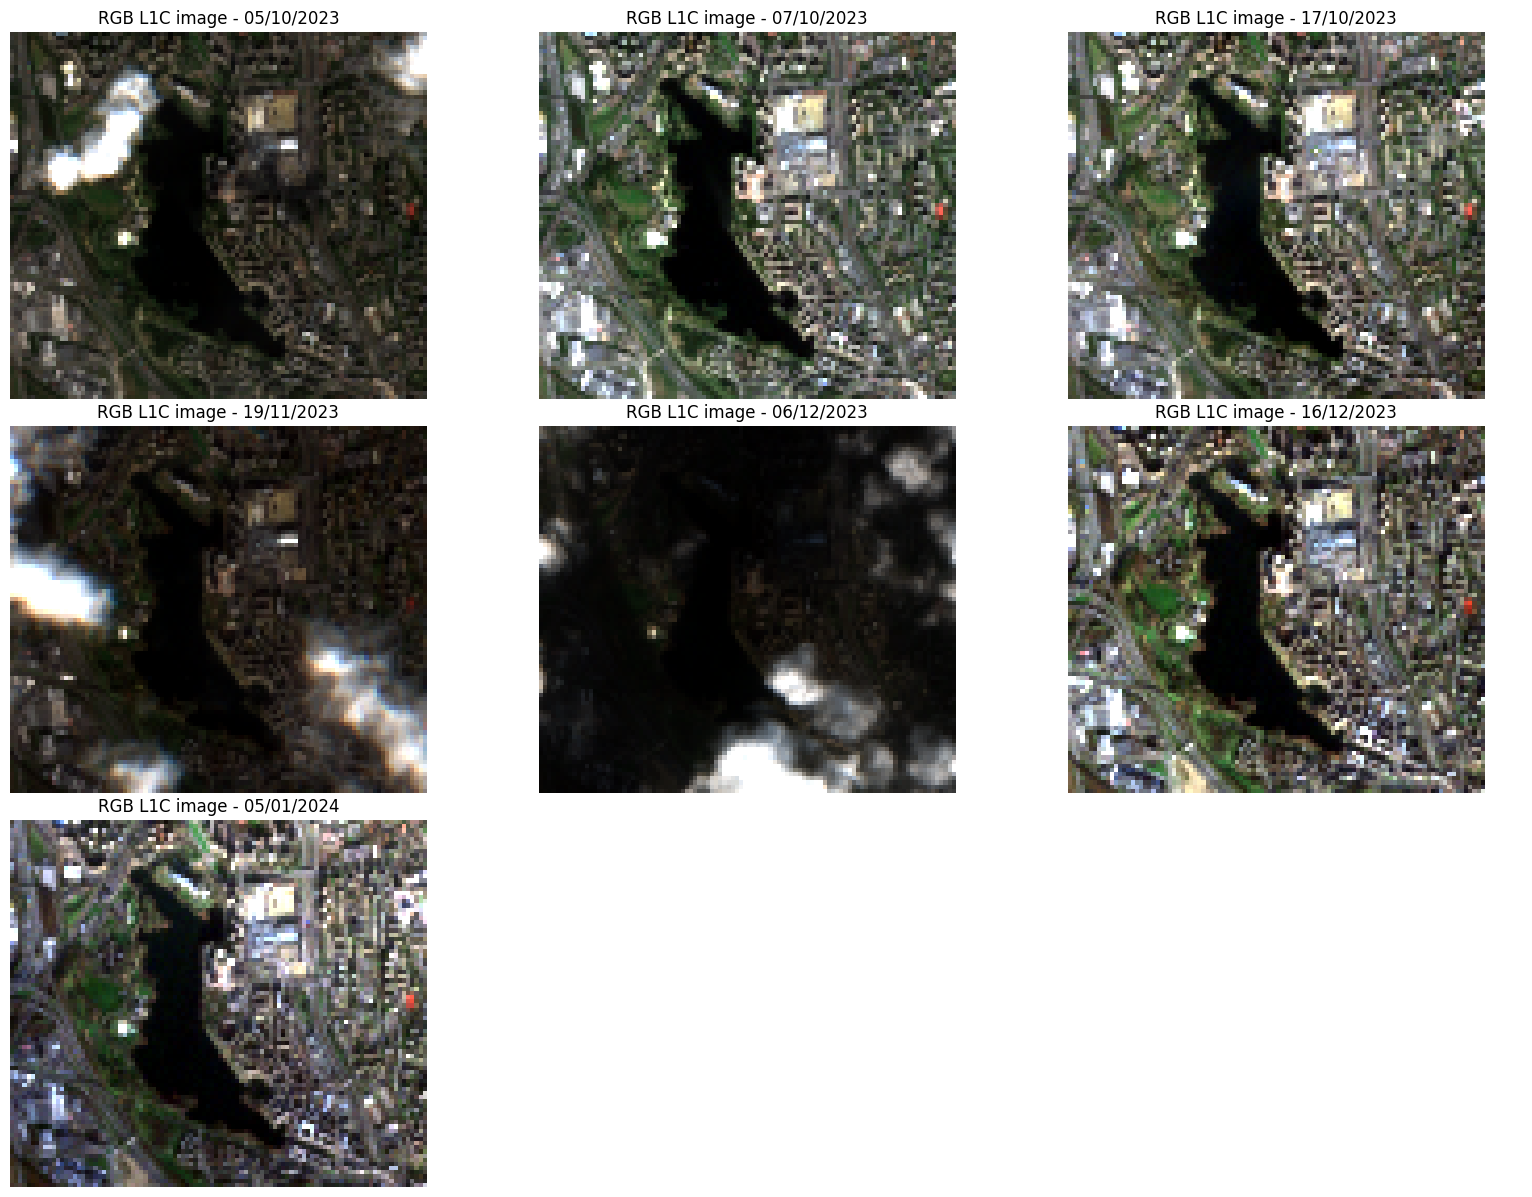

In [57]:
import os
import rasterio
from rasterio.plot import show
import numpy as np
import matplotlib.pyplot as plt

directory = 'validation_images_tif/'

# List for storing the paths of the .tif files
arquivos_tif = [os.path.join(directory, arquivo) for arquivo in os.listdir(directory) if arquivo.endswith('.tif')]

arquivos_tif_dict = {}
for arquivo_tif in arquivos_tif:
    # Extract date from the name of the file
    date = arquivo_tif.split('_')[4]
    # Convert the date to datetime format
    date = pd.to_datetime(date, format='%Y%m%dT%H%M%S')
    print(date)
    # Add the file path to the dictionary
    arquivos_tif_dict[date] = arquivo_tif

# Sort the dictionary by its keys (the dates)
arquivos_tif_dict = dict(sorted(arquivos_tif_dict.items()))

# Number of columns in the plot
num_colunas = 3

# Calculate the number of lines in the plot
num_linhas = (len(arquivos_tif) + num_colunas - 1) // num_colunas

# Configuring subplots
fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(20, 5 * num_linhas))
fig.subplots_adjust(wspace=0.075, hspace=0.075,)

def stretch(band, lower_percent=2, higher_percent=98):
    a = 0 # min value
    b = 255 # max value
    c = np.percentile(band, lower_percent)
    d = np.percentile(band, higher_percent)
    t = a + (band - c) * (b - a) / (d - c)
    t[t<a] = a
    t[t>b] = b
    return t

# Iterate over each .tif file
for i, (date, arquivo_tif) in enumerate(arquivos_tif_dict.items()):
    # Open the .tif file
    with rasterio.open(arquivo_tif) as src:
        # Reads Bands 4, 3, and 2 into a numpy array
        rgb = src.read([6, 5, 4])

        # Normalize the bands using histogram stretching
        for band in range(rgb.shape[0]):
            rgb[band] = stretch(rgb[band])

        # Position of the subplot
        linha = i // num_colunas
        coluna = i % num_colunas

        # Plot the RGB image on the subplot
        axs[linha, coluna].imshow(rgb.transpose((1, 2, 0)) / 255)  # Divide by 255 to normalize to 0-1
        axs[linha, coluna].set_title(f'RGB L1C image - {date.strftime("%d/%m/%Y")}')
        axs[linha, coluna].axis('off')
        
# Remove all axes from the subplots
for ax in axs.flat:
    ax.axis('off')

# Exibir a figura
plt.show()

### Plotting C2RCC graphic

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
import matplotlib.dates as mdates

# Create a slider widget for selecting the time range
start_date_widget = widgets.DatePicker(description='Start Date', value=pd.to_datetime('2023-10-01'))
end_date_widget = widgets.DatePicker(description='End Date', value=pd.to_datetime('2024-01-10'))
# Define a function to update the plot based on the selected time range
def update_plot(start_date, end_date):
    filtered_df = df_loco.loc[start_date:end_date]
    filtered_df2 = df_c2rcc.loc[start_date:end_date]

    # conc_chl_mean_windows_3x3	conc_chl_sigma_windows_3x3	conc_chl_mean_windows_5x5	conc_chl_sigma_windows_5x5	conc_chl_mean	conc_chl_sigma
  
    
    # Resample the data to daily frequency and calculate the mean for each day
    daily_mean1 = filtered_df['chlorophylle A'].resample('D').mean()
    daily_mean2 = filtered_df2['conc_chl_mean_windows_3x3'].resample('D').mean()
    daily_mean3 = filtered_df2['conc_chl_mean_windows_5x5'].resample('D').mean()
    daily_mean4 = filtered_df2['conc_chl_mean'].resample('D').mean()

    # Resample the errors to daily frequency and calculate the mean for each day
    daily_mean1_unc = filtered_df['chlorophylle A'].resample('D').std()
    daily_mean2_unc = filtered_df2['conc_chl_sigma_windows_3x3'].resample('D').mean()
    daily_mean3_unc = filtered_df2['conc_chl_sigma_windows_5x5'].resample('D').mean()
    daily_mean4_unc = filtered_df2['conc_chl_sigma'].resample('D').mean()

    # Create a figure with two subplots
    fig, ax1 = plt.subplots(figsize=(20, 10))

    # Plot data and the errors
    ax1.errorbar(daily_mean1.index, daily_mean1, yerr=daily_mean1_unc, marker='o', label='Chlorophylle A - In Situ (Mean)')
    ax1.errorbar(daily_mean2.index, daily_mean2, yerr=daily_mean2_unc, marker='o', label='Chlorophylle A - C2RCC (3x3)')
    ax1.errorbar(daily_mean3.index, daily_mean3, yerr=daily_mean3_unc, marker='o', label='Chlorophylle A - C2RCC (5x5)')
    ax1.errorbar(daily_mean4.index, daily_mean4, yerr=daily_mean4_unc, marker='o', label='Chlorophylle A - C2RCC (All pixels)')

    # Set the y-axis label
    ax1.set_ylabel('Chlorophylle-A concentration ($mg.m^{-3}$)', fontsize=17)
    ax1.set_xlabel('Date', fontsize=17)
    # Setting font size for values in axes
    ax1.tick_params(axis='both', which='major', labelsize=14)
    ax1.set_ylim(0)
    ax1.set_title('Time series of C2RCC chlorophylle-A concentration by different methods', fontsize=20)
    ax1.legend(fontsize=14)
    
    # Format x-axis ticks as months (mm/yyyy)
    ax1.xaxis.set_major_locator(mdates.MonthLocator())
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
    
    plt.tight_layout()
    plt.show()

# Create an interactive output widget
output = widgets.interactive_output(update_plot, {'start_date': start_date_widget, 'end_date': end_date_widget})

# Display the widgets and the output
display(start_date_widget, end_date_widget, output)



DatePicker(value=Timestamp('2023-10-01 00:00:00'), description='Start Date', step=1)

DatePicker(value=Timestamp('2024-01-10 00:00:00'), description='End Date', step=1)

Output()

### Calculating statistics for each metrics adjusting the in loco data by their lower and upper bounds

In [58]:
# Set to 'time' be the index if it is not
if df_loco.index.name != 'time':
    # Convert colum time in datetime
    df_loco['time'] = pd.to_datetime(df_loco['time'])
    df_loco.set_index('time', inplace=True)
    
teste = df_loco['chlorophylle A'].resample('D').std()
upper_bound = df_loco['chlorophylle A'].resample('D').mean() + df_loco['chlorophylle A'].resample('D').std()
lower_bound = df_loco['chlorophylle A'].resample('D').mean() - df_loco['chlorophylle A'].resample('D').std()


# Transform lower_bound and upper_bound in one dataframe
upper_bound = pd.DataFrame(upper_bound)
lower_bound = pd.DataFrame(lower_bound)
upper_bound.reset_index(inplace=True)
lower_bound.reset_index(inplace=True)
# Rename the columns
upper_bound.columns = ['date', 'upper_bound']
lower_bound.columns = ['date', 'lower_bound']

bounds = pd.merge(upper_bound, lower_bound, on='date')

# Reset the index of in situ data if it is not the default index
if df_loco.index.name == 'time':
    df_loco.reset_index(inplace=True)

# Excract the date YYYY-MM-DD for df_loco['time']
df_loco['date'] = df_loco['time'].dt.date
df_loco['date'] = pd.to_datetime(df_loco['date'])

# Merge df_loco with bounds by date
df_loco = pd.merge(df_loco, bounds, on='date')

display(df_loco)

# Drop values in df_loco that aren't in the range of bounds
df_loco = df_loco[(df_loco['chlorophylle A'] >= df_loco['lower_bound']) & (df_loco['chlorophylle A'] <= df_loco['upper_bound'])]



time  chlorophylle A       date  upper_bound  lower_bound
0    2023-10-04 00:16:19           41.46 2023-10-04    41.900073    22.372400
1    2023-10-04 00:31:19           72.39 2023-10-04    41.900073    22.372400
2    2023-10-04 00:46:19           45.35 2023-10-04    41.900073    22.372400
3    2023-10-04 01:01:19           45.34 2023-10-04    41.900073    22.372400
4    2023-10-04 01:16:19           34.19 2023-10-04    41.900073    22.372400
...                  ...             ...        ...          ...          ...
8497 2024-01-05 22:46:28            0.14 2024-01-05     2.498061     0.806314
8498 2024-01-05 23:01:28            0.48 2024-01-05     2.498061     0.806314
8499 2024-01-05 23:16:28            0.62 2024-01-05     2.498061     0.806314
8500 2024-01-05 23:31:28            0.09 2024-01-05     2.498061     0.806314
8501 2024-01-05 23:46:28            0.53 2024-01-05     2.498061     0.806314

[8502 rows x 5 columns]

Reseting index and calculating the nearest value for clorophyll A for each satellital data

In [61]:
from datetime import timedelta

# Remove column chlorophyllle A from c2rcc but only if exists
if 'chlorophylle A' in df_c2rcc.columns:
    df_c2rcc.drop(columns=['chlorophylle A'], inplace=True)

# Reset the index of c2rcc data if it is not the default index
if df_c2rcc.index.name == 'Date':
    df_c2rcc.reset_index(inplace=True)

# Reset the index of in situ data if it is not the default index
if df_loco.index.name == 'time':
    df_loco.reset_index(inplace=True)

# Create a new column with the closest value of chlorophyllle A from in situ data

def encontrar_valor_proximo(x, df, janela_temporal=0.3):
    data_alvo = x['Date']
    valor_alvo = x['conc_chl_mean']

    janela_superior = data_alvo + timedelta(days=janela_temporal)
    janela_inferior = data_alvo - timedelta(days=janela_temporal)

    dados_no_intervalo = df[(df['time'] >= janela_inferior) & (df['time'] <= janela_superior)]

    if not dados_no_intervalo.empty:
       
        # Calcular a diferença nos valores
        dados_no_intervalo['dif_values'] = abs(dados_no_intervalo['chlorophylle A'] - valor_alvo)
        
        linha_mais_proxima = dados_no_intervalo.loc[dados_no_intervalo['dif_values'].idxmin()]
        
        return linha_mais_proxima['chlorophylle A']
    else:
        return None

df_c2rcc['chlorophylle A - Adjusted'] = df_c2rcc.apply(lambda x: encontrar_valor_proximo(x,df_loco), axis=1)

# display the columns chlorophyllle A and conc_chl
display(df_c2rcc[['chlorophylle A - Adjusted', 'conc_chl_mean']])

C:\Users\arthu\AppData\Local\Temp\ipykernel_22376\19219927.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c2rcc['chlorophylle A - Adjusted'] = df_c2rcc.apply(lambda x: encontrar_valor_proximo(x,df_loco), axis=1)


chlorophylle A - Adjusted  conc_chl_mean
0                      12.09        10.3247
1                       7.34         8.2507
2                       5.81         7.9150
3                       0.82         0.2348
4                       0.27         0.7228
5                       2.46         5.0567

#### Calculation all methods scatter in one plot

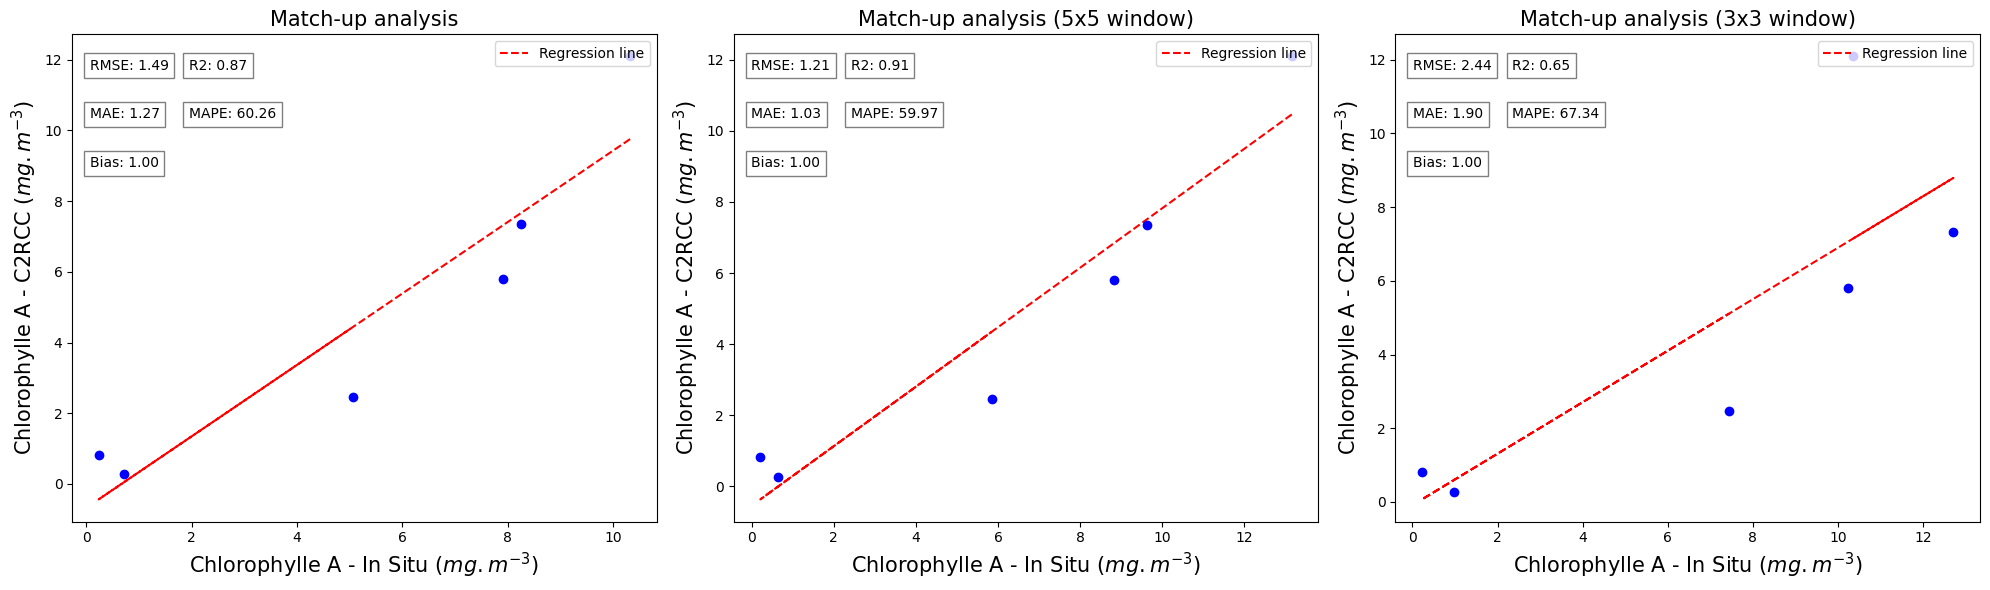

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming you have df_c2rcc dataframe available

# Plot 1
df_c2rcc2 = df_c2rcc[['chlorophylle A - Adjusted', 'conc_chl_mean', 'Date']].dropna()
model = LinearRegression()
model.fit(df_c2rcc2[['conc_chl_mean']], df_c2rcc2[['chlorophylle A - Adjusted']])
df_c2rcc2['log_chlorophylle A - Adjusted'] = np.log10(df_c2rcc2['chlorophylle A - Adjusted'])
df_c2rcc2['log_conc_chl_mean'] = np.log10(df_c2rcc2['conc_chl_mean'])
model2 = LinearRegression()
model2.fit(df_c2rcc2[['log_conc_chl_mean']], df_c2rcc2[['log_chlorophylle A - Adjusted']])
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
ax[0].errorbar(df_c2rcc2['conc_chl_mean'], df_c2rcc2['chlorophylle A - Adjusted'], fmt='o', color='blue', ecolor='lightgray', elinewidth=3, capsize=0)
ax[0].plot(df_c2rcc2['conc_chl_mean'], model.predict(df_c2rcc2[['conc_chl_mean']]), ls='--', color='red', label='Regression line')
ax[0].set_xlabel('Chlorophylle A - In Situ ($mg.m^{-3}$)', fontsize=15)
ax[0].set_ylabel('Chlorophylle A - C2RCC ($mg.m^{-3}$)', fontsize=15)
ax[0].text(0.03, 0.95, f'RMSE: {mean_squared_error(df_c2rcc2[["chlorophylle A - Adjusted"]], model.predict(df_c2rcc2[["conc_chl_mean"]])) ** 0.5:.2f}', transform=ax[0].transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax[0].text(0.20, 0.95, f'R2: {model.score(df_c2rcc2[["conc_chl_mean"]],df_c2rcc2[["chlorophylle A - Adjusted"]]):.2f}', transform=ax[0].transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax[0].text(0.03, 0.85, f'MAE: {mean_absolute_error(df_c2rcc2[["chlorophylle A - Adjusted"]], model.predict(df_c2rcc2[["conc_chl_mean"]])):.2f}', transform=ax[0].transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax[0].text(0.20, 0.85, f'MAPE: {np.mean(np.abs((model.predict(df_c2rcc2[["conc_chl_mean"]]) - df_c2rcc2[["chlorophylle A - Adjusted"]]) / df_c2rcc2[["chlorophylle A - Adjusted"]])) * 100:.2f}', transform=ax[0].transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax[0].text(0.03, 0.75, f'Bias: {10 ** (np.mean(np.sum(model2.predict(df_c2rcc2[["log_conc_chl_mean"]]).T - df_c2rcc2[["log_chlorophylle A - Adjusted"]].values))):.2f}', transform=ax[0].transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax[0].set_title('Match-up analysis', fontsize=15)
ax[0].legend(fontsize=10, loc='upper right')

# Plot 2
df_c2rcc2 = df_c2rcc[['chlorophylle A - Adjusted', 'conc_chl_mean_windows_5x5']].dropna()
model = LinearRegression()
model.fit(df_c2rcc2[['conc_chl_mean_windows_5x5']], df_c2rcc2[['chlorophylle A - Adjusted']])
df_c2rcc2['log_chlorophylle A - Adjusted'] = np.log10(df_c2rcc2['chlorophylle A - Adjusted'])
df_c2rcc2['log_conc_chl_mean'] = np.log10(df_c2rcc2['conc_chl_mean_windows_5x5'])
model2 = LinearRegression()
model2.fit(df_c2rcc2[['log_conc_chl_mean']], df_c2rcc2[['log_chlorophylle A - Adjusted']])
ax[1].errorbar(df_c2rcc2['conc_chl_mean_windows_5x5'], df_c2rcc2['chlorophylle A - Adjusted'], fmt='o', color='blue', ecolor='lightgray', elinewidth=3, capsize=0)
ax[1].plot(df_c2rcc2['conc_chl_mean_windows_5x5'], model.predict(df_c2rcc2[['conc_chl_mean_windows_5x5']]), ls='--', color='red', label='Regression line')
ax[1].set_xlabel('Chlorophylle A - In Situ ($mg.m^{-3}$)', fontsize=15)
ax[1].set_ylabel('Chlorophylle A - C2RCC ($mg.m^{-3}$)', fontsize=15)
ax[1].set_title('Match-up analysis (5x5 window)', fontsize=15)
ax[1].text(0.03, 0.95, f'RMSE: {mean_squared_error(df_c2rcc2[["chlorophylle A - Adjusted"]], model.predict(df_c2rcc2[["conc_chl_mean_windows_5x5"]])) ** 0.5:.2f}', transform=ax[1].transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax[1].text(0.20, 0.95, f'R2: {model.score(df_c2rcc2[["conc_chl_mean_windows_5x5"]],df_c2rcc2[["chlorophylle A - Adjusted"]]):.2f}', transform=ax[1].transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax[1].text(0.03, 0.85, f'MAE: {mean_absolute_error(df_c2rcc2[["chlorophylle A - Adjusted"]], model.predict(df_c2rcc2[["conc_chl_mean_windows_5x5"]])):.2f}', transform=ax[1].transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax[1].text(0.20, 0.85, f'MAPE: {np.mean(np.abs((model.predict(df_c2rcc2[["conc_chl_mean_windows_5x5"]]) - df_c2rcc2[["chlorophylle A - Adjusted"]]) / df_c2rcc2[["chlorophylle A - Adjusted"]])) * 100:.2f}', transform=ax[1].transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax[1].text(0.03, 0.75, f'Bias: {10 ** (np.mean(np.sum(model2.predict(df_c2rcc2[["log_conc_chl_mean"]]).T - df_c2rcc2[["log_chlorophylle A - Adjusted"]].values))):.2f}', transform=ax[1].transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax[1].legend(fontsize=10, loc='upper right')

# Plot 3
df_c2rcc2 = df_c2rcc[['chlorophylle A - Adjusted', 'conc_chl_mean_windows_3x3']].dropna()
model = LinearRegression()
model.fit(df_c2rcc2[['conc_chl_mean_windows_3x3']], df_c2rcc2[['chlorophylle A - Adjusted']])
df_c2rcc2['log_chlorophylle A - Adjusted'] = np.log10(df_c2rcc2['chlorophylle A - Adjusted'])
df_c2rcc2['log_conc_chl_mean'] = np.log10(df_c2rcc2['conc_chl_mean_windows_3x3'])
model2 = LinearRegression()
model2.fit(df_c2rcc2[['log_conc_chl_mean']], df_c2rcc2[['log_chlorophylle A - Adjusted']])
ax[2].errorbar(df_c2rcc2['conc_chl_mean_windows_3x3'], df_c2rcc2['chlorophylle A - Adjusted'], fmt='o', color='blue', ecolor='lightgray', elinewidth=3, capsize=0)
ax[2].plot(df_c2rcc2['conc_chl_mean_windows_3x3'], model.predict(df_c2rcc2[['conc_chl_mean_windows_3x3']]), ls='--', color='red', label='Regression line')
ax[2].set_xlabel('Chlorophylle A - In Situ ($mg.m^{-3}$)', fontsize=15)
ax[2].set_ylabel('Chlorophylle A - C2RCC ($mg.m^{-3}$)', fontsize=15)
ax[2].set_title('Match-up analysis (3x3 window)', fontsize=15)
ax[2].text(0.03, 0.95, f'RMSE: {mean_squared_error(df_c2rcc2[["chlorophylle A - Adjusted"]], model.predict(df_c2rcc2[["conc_chl_mean_windows_3x3"]])) ** 0.5:.2f}', transform=ax[2].transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax[2].text(0.20, 0.95, f'R2: {model.score(df_c2rcc2[["conc_chl_mean_windows_3x3"]],df_c2rcc2[["chlorophylle A - Adjusted"]]):.2f}', transform=ax[2].transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax[2].text(0.03, 0.85, f'MAE: {mean_absolute_error(df_c2rcc2[["chlorophylle A - Adjusted"]], model.predict(df_c2rcc2[["conc_chl_mean_windows_3x3"]])):.2f}', transform=ax[2].transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax[2].text(0.20, 0.85, f'MAPE: {np.mean(np.abs((model.predict(df_c2rcc2[["conc_chl_mean_windows_3x3"]]) - df_c2rcc2[["chlorophylle A - Adjusted"]]) / df_c2rcc2[["chlorophylle A - Adjusted"]])) * 100:.2f}', transform=ax[2].transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax[2].text(0.03, 0.75, f'Bias: {10 ** (np.mean(np.sum(model2.predict(df_c2rcc2[["log_conc_chl_mean"]]).T - df_c2rcc2[["log_chlorophylle A - Adjusted"]].values))):.2f}', transform=ax[2].transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax[2].legend(fontsize=10, loc='upper right')

plt.tight_layout()
plt.show()


#### Calculation Scatter plot for each method

For conc_chl calculated for all pixels

Intercept: [-0.67211537]
Coefficient: [[1.00978296]]
R2: 0.8696097963962148
RMSE: 1.4921364012486407
MAE: 1.267890603679171
MAPE: 60.26275215628435
Bias: 0.9999999999999986


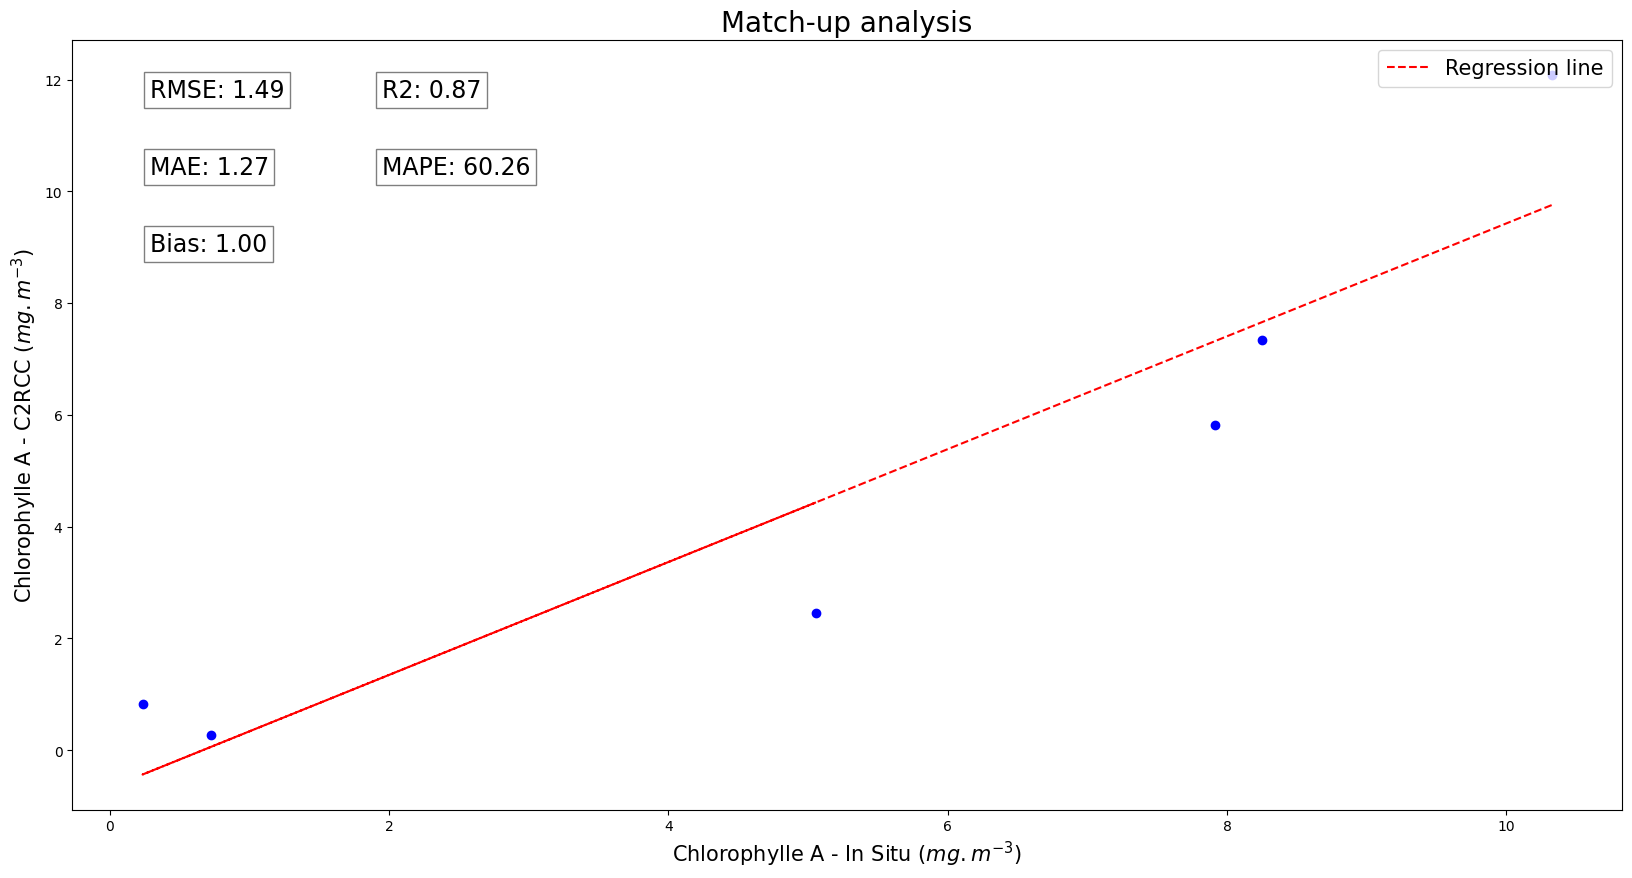

In [41]:
# Calculate the regression between the two columns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr
import numpy as np


# Create a new dataframe with the columns chlorophyllle A and conc_chl
df_c2rcc2 = df_c2rcc[['chlorophylle A - Adjusted', 'conc_chl_mean']].dropna()

# Create the linear regression model
model = LinearRegression()
model.fit(df_c2rcc2[['conc_chl_mean']], df_c2rcc2[['chlorophylle A - Adjusted']])

# Create columns with logaritmic in base 10 values of chlorophyllle A and conc_chl
df_c2rcc2['log_chlorophylle A - Adjusted'] = np.log10(df_c2rcc2['chlorophylle A - Adjusted'])
df_c2rcc2['log_conc_chl_mean'] = np.log10(df_c2rcc2['conc_chl_mean'])
model2 = LinearRegression()
model2.fit(df_c2rcc2[['log_conc_chl_mean']], df_c2rcc2[['log_chlorophylle A - Adjusted']])

print('Intercept:', model.intercept_)
print('Coefficient:', model.coef_)
print('R2:', model.score(df_c2rcc2[['conc_chl_mean']], df_c2rcc2[['chlorophylle A - Adjusted']]))
print('RMSE:', mean_squared_error(df_c2rcc2[['chlorophylle A - Adjusted']], model.predict(df_c2rcc2[['conc_chl_mean']])) ** 0.5)
print('MAE:', mean_absolute_error(df_c2rcc2[['chlorophylle A - Adjusted']], model.predict(df_c2rcc2[['conc_chl_mean']])))
print('MAPE:', np.mean(np.abs((model.predict(df_c2rcc2[['conc_chl_mean']]) - df_c2rcc2[['chlorophylle A - Adjusted']]) / df_c2rcc2[['chlorophylle A - Adjusted']])) * 100)
print('Bias:', 10 ** (np.mean(np.sum(model2.predict(df_c2rcc2[['log_conc_chl_mean']]).T - df_c2rcc2[['log_chlorophylle A - Adjusted']].values))))


# Plot the regression line
fig, ax = plt.subplots(figsize=(20, 10))
#Plot errors bars
ax.errorbar(df_c2rcc2['conc_chl_mean'], df_c2rcc2['chlorophylle A - Adjusted'], fmt='o', color='blue', ecolor='lightgray', elinewidth=3, capsize=0)
ax.plot(df_c2rcc2['conc_chl_mean'], model.predict(df_c2rcc2[['conc_chl_mean']]), ls='--', color='red', label='Regression line')

plt.xlabel('Chlorophylle A - In Situ ($mg.m^{-3}$)', fontsize=15)
plt.ylabel('Chlorophylle A - C2RCC ($mg.m^{-3}$)', fontsize=15)
# Text box with each metric value
ax.text(0.05, 0.95, f'RMSE: {mean_squared_error(df_c2rcc2[["chlorophylle A - Adjusted"]], model.predict(df_c2rcc2[["conc_chl_mean"]])) ** 0.5:.2f}', transform=ax.transAxes, fontsize=17, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax.text(0.20, 0.95, f'R2: {model.score(df_c2rcc2[["conc_chl_mean"]],df_c2rcc2[["chlorophylle A - Adjusted"]]):.2f}', transform=ax.transAxes, fontsize=17, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax.text(0.05, 0.85, f'MAE: {mean_absolute_error(df_c2rcc2[["chlorophylle A - Adjusted"]], model.predict(df_c2rcc2[["conc_chl_mean"]])):.2f}', transform=ax.transAxes, fontsize=17, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax.text(0.20, 0.85, f'MAPE: {np.mean(np.abs((model.predict(df_c2rcc2[["conc_chl_mean"]]) - df_c2rcc2[["chlorophylle A - Adjusted"]]) / df_c2rcc2[["chlorophylle A - Adjusted"]])) * 100:.2f}', transform=ax.transAxes, fontsize=17, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax.text(0.05, 0.75, f'Bias: {10 ** (np.mean(np.sum(model2.predict(df_c2rcc2[["log_conc_chl_mean"]]).T - df_c2rcc2[["log_chlorophylle A - Adjusted"]].values))):.2f}', transform=ax.transAxes, fontsize=17, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

plt.title('Match-up analysis', fontsize=20)
plt.legend(fontsize=15, loc='upper right')
plt.show()

For conc_chl calculated for 3x3 windows

Intercept: [-0.08599035]
Coefficient: [[0.69823921]]
R2: 0.6507987720030985
RMSE: 2.4418777894473505
MAE: 1.8958846613913287
MAPE: 67.34473395005392
Bias: 0.9999999999999999


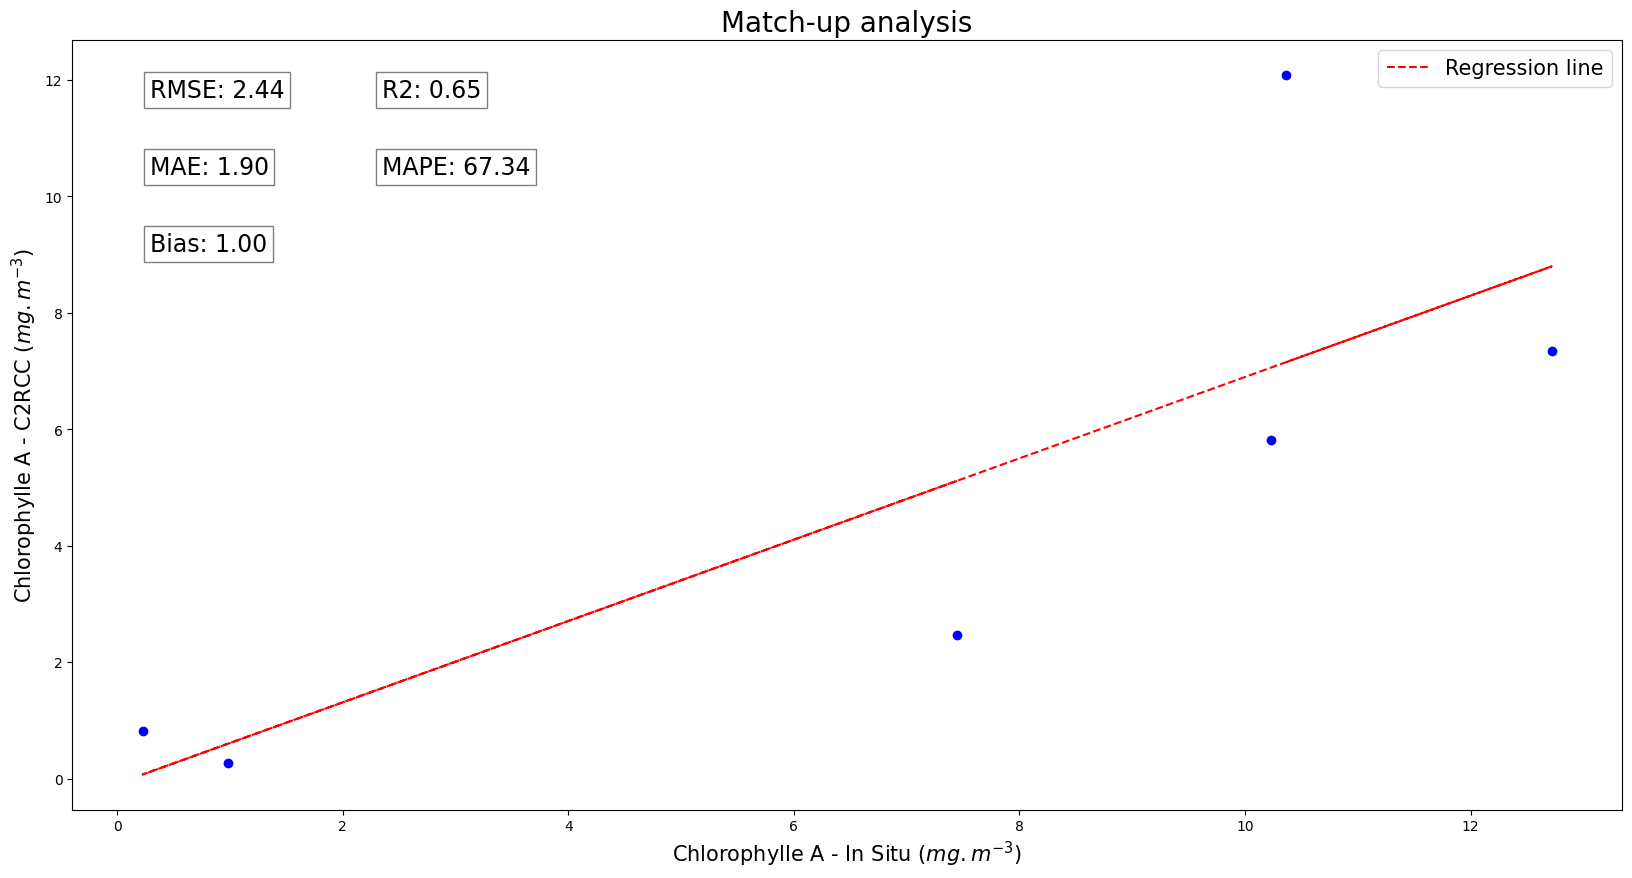

In [30]:
# Calculate the regression between the two columns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr
import numpy as np

# Create a new dataframe with the columns chlorophyllle A and conc_chl
df_c2rcc2 = df_c2rcc[['chlorophylle A - Adjusted', 'conc_chl_mean_windows_3x3']].dropna()

# Create the linear regression model
model = LinearRegression()
model.fit(df_c2rcc2[['conc_chl_mean_windows_3x3']], df_c2rcc2[['chlorophylle A - Adjusted']])

# Create columns with logaritmic in base 10 values of chlorophyllle A and conc_chl
df_c2rcc2['log_chlorophylle A - Adjusted'] = np.log10(df_c2rcc2['chlorophylle A - Adjusted'])
df_c2rcc2['log_conc_chl_mean'] = np.log10(df_c2rcc2['conc_chl_mean_windows_3x3'])
model2 = LinearRegression()
model2.fit(df_c2rcc2[['log_conc_chl_mean']], df_c2rcc2[['log_chlorophylle A - Adjusted']])

print('Intercept:', model.intercept_)
print('Coefficient:', model.coef_)
print('R2:', model.score(df_c2rcc2[['conc_chl_mean_windows_3x3']], df_c2rcc2[['chlorophylle A - Adjusted']]))
print('RMSE:', mean_squared_error(df_c2rcc2[['chlorophylle A - Adjusted']], model.predict(df_c2rcc2[['conc_chl_mean_windows_3x3']])) ** 0.5)
print('MAE:', mean_absolute_error(df_c2rcc2[['chlorophylle A - Adjusted']], model.predict(df_c2rcc2[['conc_chl_mean_windows_3x3']])))
print('MAPE:', np.mean(np.abs((model.predict(df_c2rcc2[['conc_chl_mean_windows_3x3']]) - df_c2rcc2[['chlorophylle A - Adjusted']]) / df_c2rcc2[['chlorophylle A - Adjusted']])) * 100)
print('Bias:', 10 ** (np.mean(np.sum(model2.predict(df_c2rcc2[['log_conc_chl_mean']]).T - df_c2rcc2[['log_chlorophylle A - Adjusted']].values))))


# Plot the regression line
fig, ax = plt.subplots(figsize=(20, 10))
#Plot errors bars
ax.errorbar(df_c2rcc2['conc_chl_mean_windows_3x3'], df_c2rcc2['chlorophylle A - Adjusted'], fmt='o', color='blue', ecolor='lightgray', elinewidth=3, capsize=0)
ax.plot(df_c2rcc2['conc_chl_mean_windows_3x3'], model.predict(df_c2rcc2[['conc_chl_mean_windows_3x3']]), ls='--', color='red', label='Regression line')

plt.xlabel('Chlorophylle A - In Situ ($mg.m^{-3}$)', fontsize=15)
plt.ylabel('Chlorophylle A - C2RCC ($mg.m^{-3}$)', fontsize=15)
# Text box with each metric value
ax.text(0.05, 0.95, f'RMSE: {mean_squared_error(df_c2rcc2[["chlorophylle A - Adjusted"]], model.predict(df_c2rcc2[["conc_chl_mean_windows_3x3"]])) ** 0.5:.2f}', transform=ax.transAxes, fontsize=17, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax.text(0.20, 0.95, f'R2: {model.score(df_c2rcc2[["conc_chl_mean_windows_3x3"]],df_c2rcc2[["chlorophylle A - Adjusted"]]):.2f}', transform=ax.transAxes, fontsize=17, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax.text(0.05, 0.85, f'MAE: {mean_absolute_error(df_c2rcc2[["chlorophylle A - Adjusted"]], model.predict(df_c2rcc2[["conc_chl_mean_windows_3x3"]])):.2f}', transform=ax.transAxes, fontsize=17, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax.text(0.20, 0.85, f'MAPE: {np.mean(np.abs((model.predict(df_c2rcc2[["conc_chl_mean_windows_3x3"]]) - df_c2rcc2[["chlorophylle A - Adjusted"]]) / df_c2rcc2[["chlorophylle A - Adjusted"]])) * 100:.2f}', transform=ax.transAxes, fontsize=17, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax.text(0.05, 0.75, f'Bias: {10 ** (np.mean(np.sum(model2.predict(df_c2rcc2[["log_conc_chl_mean"]]).T - df_c2rcc2[["log_chlorophylle A - Adjusted"]].values))):.2f}', transform=ax.transAxes, fontsize=17, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

plt.title('Match-up analysis', fontsize=20)
plt.legend(fontsize=15, loc='upper right')
plt.show()

For conc_chl calculated for 5x5 windows

Intercept: [-0.53873318]
Coefficient: [[0.83585516]]
R2: 0.9141056069893798
RMSE: 1.21106778280064
MAE: 1.0324688252412386
MAPE: 59.97313986119135
Bias: 1.0000000000000027


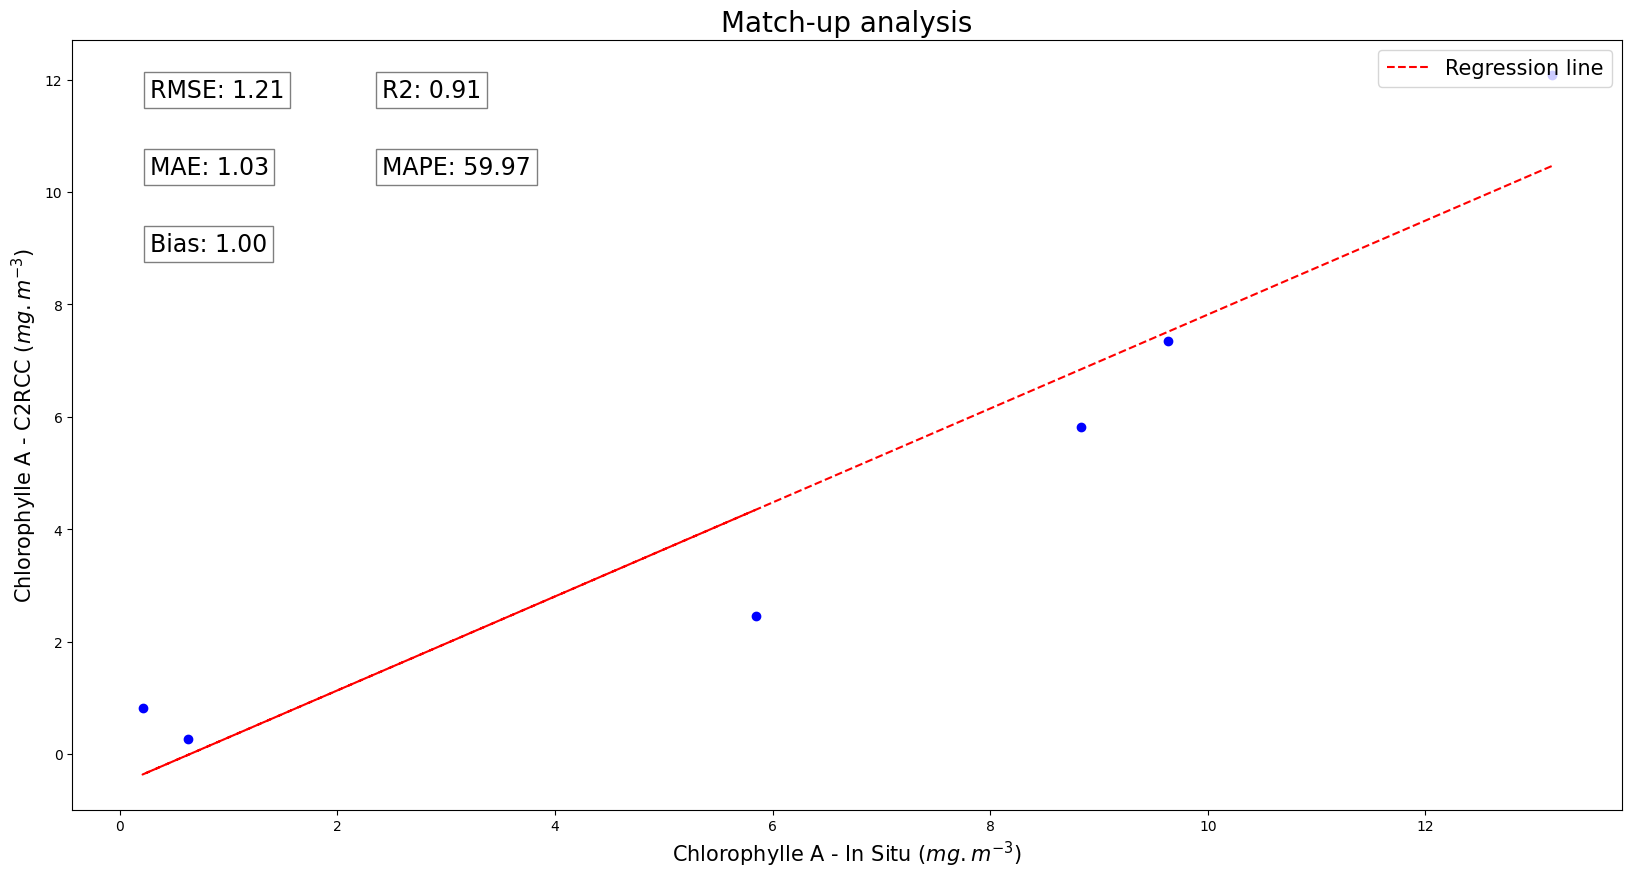

In [31]:
# Calculate the regression between the two columns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr
import numpy as np

# Create a new dataframe with the columns chlorophyllle A and conc_chl
df_c2rcc2 = df_c2rcc[['chlorophylle A - Adjusted', 'conc_chl_mean_windows_5x5']].dropna()

# Create the linear regression model
model = LinearRegression()
model.fit(df_c2rcc2[['conc_chl_mean_windows_5x5']], df_c2rcc2[['chlorophylle A - Adjusted']])

# Create columns with logaritmic in base 10 values of chlorophyllle A and conc_chl
df_c2rcc2['log_chlorophylle A - Adjusted'] = np.log10(df_c2rcc2['chlorophylle A - Adjusted'])
df_c2rcc2['log_conc_chl_mean'] = np.log10(df_c2rcc2['conc_chl_mean_windows_5x5'])
model2 = LinearRegression()
model2.fit(df_c2rcc2[['log_conc_chl_mean']], df_c2rcc2[['log_chlorophylle A - Adjusted']])

print('Intercept:', model.intercept_)
print('Coefficient:', model.coef_)
print('R2:', model.score(df_c2rcc2[['conc_chl_mean_windows_5x5']], df_c2rcc2[['chlorophylle A - Adjusted']]))
print('RMSE:', mean_squared_error(df_c2rcc2[['chlorophylle A - Adjusted']], model.predict(df_c2rcc2[['conc_chl_mean_windows_5x5']])) ** 0.5)
print('MAE:', mean_absolute_error(df_c2rcc2[['chlorophylle A - Adjusted']], model.predict(df_c2rcc2[['conc_chl_mean_windows_5x5']])))
print('MAPE:', np.mean(np.abs((model.predict(df_c2rcc2[['conc_chl_mean_windows_5x5']]) - df_c2rcc2[['chlorophylle A - Adjusted']]) / df_c2rcc2[['chlorophylle A - Adjusted']])) * 100)
print('Bias:', 10 ** (np.mean(np.sum(model2.predict(df_c2rcc2[['log_conc_chl_mean']]).T - df_c2rcc2[['log_chlorophylle A - Adjusted']].values))))


# Plot the regression line
fig, ax = plt.subplots(figsize=(20, 10))
#Plot errors bars
ax.errorbar(df_c2rcc2['conc_chl_mean_windows_5x5'], df_c2rcc2['chlorophylle A - Adjusted'], fmt='o', color='blue', ecolor='lightgray', elinewidth=3, capsize=0)
ax.plot(df_c2rcc2['conc_chl_mean_windows_5x5'], model.predict(df_c2rcc2[['conc_chl_mean_windows_5x5']]), ls='--', color='red', label='Regression line')

plt.xlabel('Chlorophylle A - In Situ ($mg.m^{-3}$)', fontsize=15)
plt.ylabel('Chlorophylle A - C2RCC ($mg.m^{-3}$)', fontsize=15)
# Text box with each metric value
ax.text(0.05, 0.95, f'RMSE: {mean_squared_error(df_c2rcc2[["chlorophylle A - Adjusted"]], model.predict(df_c2rcc2[["conc_chl_mean_windows_5x5"]])) ** 0.5:.2f}', transform=ax.transAxes, fontsize=17, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax.text(0.20, 0.95, f'R2: {model.score(df_c2rcc2[["conc_chl_mean_windows_5x5"]],df_c2rcc2[["chlorophylle A - Adjusted"]]):.2f}', transform=ax.transAxes, fontsize=17, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax.text(0.05, 0.85, f'MAE: {mean_absolute_error(df_c2rcc2[["chlorophylle A - Adjusted"]], model.predict(df_c2rcc2[["conc_chl_mean_windows_5x5"]])):.2f}', transform=ax.transAxes, fontsize=17, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax.text(0.20, 0.85, f'MAPE: {np.mean(np.abs((model.predict(df_c2rcc2[["conc_chl_mean_windows_5x5"]]) - df_c2rcc2[["chlorophylle A - Adjusted"]]) / df_c2rcc2[["chlorophylle A - Adjusted"]])) * 100:.2f}', transform=ax.transAxes, fontsize=17, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax.text(0.05, 0.75, f'Bias: {10 ** (np.mean(np.sum(model2.predict(df_c2rcc2[["log_conc_chl_mean"]]).T - df_c2rcc2[["log_chlorophylle A - Adjusted"]].values))):.2f}', transform=ax.transAxes, fontsize=17, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

plt.title('Match-up analysis', fontsize=20)
plt.legend(fontsize=15, loc='upper right')
plt.show()

#### Analysis whithout the adjust by uncertain for conc_chl for all pixels

In [32]:
# Merge the chrlorophylle A column from in situ data to c2rcc data
df_c2rcc = pd.merge_asof(df_c2rcc, df_loco[['time', 'chlorophylle A']], left_on='Date', right_on='time', direction='nearest')

Intercept: [-0.63908585]
Coefficient: [[0.93200414]]
R2: 0.6478514569409136
RMSE: 2.6221847572073664
MAE: 2.2507024000327527
MAPE: 75.50379693158771
Bias: 1.0000000000000016


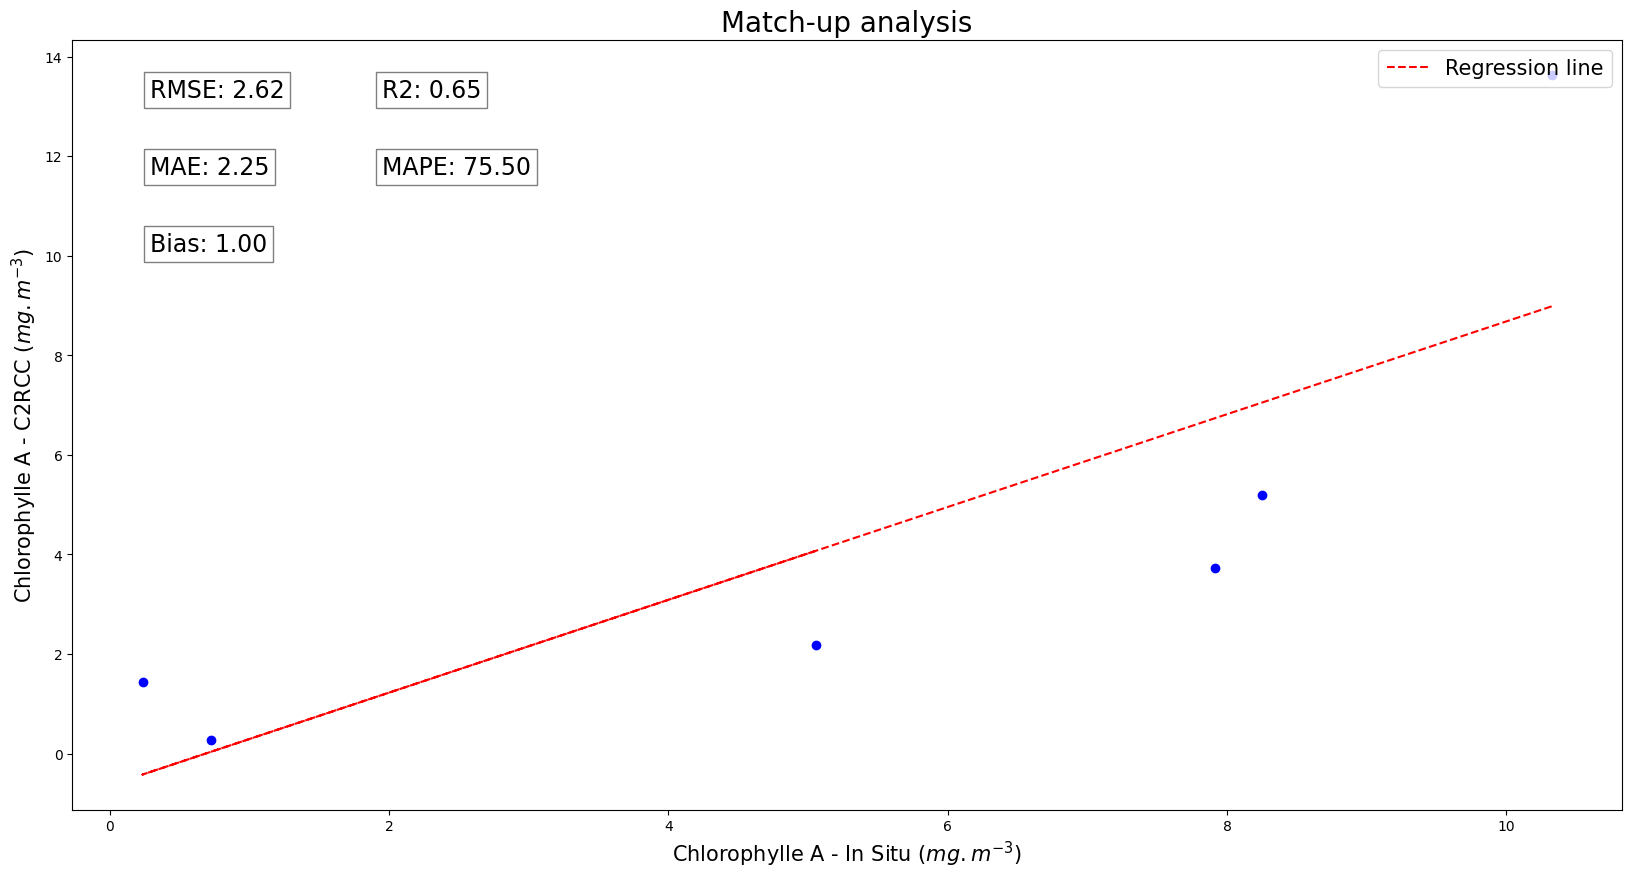

In [33]:
# Calculate the regression between the two columns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr
import numpy as np

# Create a new dataframe with the columns chlorophyllle A and conc_chl
df_c2rcc2 = df_c2rcc[['chlorophylle A', 'conc_chl_mean']].dropna()

# Create the linear regression model
model = LinearRegression()
model.fit(df_c2rcc2[['conc_chl_mean']], df_c2rcc2[['chlorophylle A']])

# Create columns with logaritmic in base 10 values of chlorophyllle A and conc_chl
df_c2rcc2['log_chlorophylle A'] = np.log10(df_c2rcc2['chlorophylle A'])
df_c2rcc2['log_conc_chl_mean'] = np.log10(df_c2rcc2['conc_chl_mean'])
df_c2rcc2 = df_c2rcc2.dropna()
model2 = LinearRegression()
model2.fit(df_c2rcc2[['log_conc_chl_mean']], df_c2rcc2[['log_chlorophylle A']])

print('Intercept:', model.intercept_)
print('Coefficient:', model.coef_)
print('R2:', model.score(df_c2rcc2[['conc_chl_mean']], df_c2rcc2[['chlorophylle A']]))
print('RMSE:', mean_squared_error(df_c2rcc2[['chlorophylle A']], model.predict(df_c2rcc2[['conc_chl_mean']])) ** 0.5)
print('MAE:', mean_absolute_error(df_c2rcc2[['chlorophylle A']], model.predict(df_c2rcc2[['conc_chl_mean']])))
print('MAPE:', np.mean(np.abs((model.predict(df_c2rcc2[['conc_chl_mean']]) - df_c2rcc2[['chlorophylle A']]) / df_c2rcc2[['chlorophylle A']])) * 100)
print('Bias:', 10 ** (np.mean(np.sum(model2.predict(df_c2rcc2[['log_conc_chl_mean']]).T - df_c2rcc2[['log_chlorophylle A']].values))))


# Plot the regression line
fig, ax = plt.subplots(figsize=(20, 10))
#Plot errors bars
ax.errorbar(df_c2rcc2['conc_chl_mean'], df_c2rcc2['chlorophylle A'], fmt='o', color='blue', ecolor='lightgray', elinewidth=3, capsize=0)
ax.plot(df_c2rcc2['conc_chl_mean'], model.predict(df_c2rcc2[['conc_chl_mean']]), ls='--', color='red', label='Regression line')

plt.xlabel('Chlorophylle A - In Situ ($mg.m^{-3}$)', fontsize=15)
plt.ylabel('Chlorophylle A - C2RCC ($mg.m^{-3}$)', fontsize=15)
# Text box with each metric value
ax.text(0.05, 0.95, f'RMSE: {mean_squared_error(df_c2rcc2[["chlorophylle A"]], model.predict(df_c2rcc2[["conc_chl_mean"]])) ** 0.5:.2f}', transform=ax.transAxes, fontsize=17, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax.text(0.20, 0.95, f'R2: {model.score(df_c2rcc2[["conc_chl_mean"]],df_c2rcc2[["chlorophylle A"]]):.2f}', transform=ax.transAxes, fontsize=17, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax.text(0.05, 0.85, f'MAE: {mean_absolute_error(df_c2rcc2[["chlorophylle A"]], model.predict(df_c2rcc2[["conc_chl_mean"]])):.2f}', transform=ax.transAxes, fontsize=17, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax.text(0.20, 0.85, f'MAPE: {np.mean(np.abs((model.predict(df_c2rcc2[["conc_chl_mean"]]) - df_c2rcc2[["chlorophylle A"]]) / df_c2rcc2[["chlorophylle A"]])) * 100:.2f}', transform=ax.transAxes, fontsize=17, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax.text(0.05, 0.75, f'Bias: {10 ** (np.mean(np.sum(model2.predict(df_c2rcc2[["log_conc_chl_mean"]]).T - df_c2rcc2[["log_chlorophylle A"]].values))):.2f}', transform=ax.transAxes, fontsize=17, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

plt.title('Match-up analysis', fontsize=20)
plt.legend(fontsize=15, loc='upper right')
plt.show()

### Plotting the table for the statistics after adjusting

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Create a DataFrame to store the results
results_df_initial = pd.DataFrame(columns=['Metric'])

# Loop through the columns and perform the analysis
for column in ['conc_chl_mean',
               'conc_chl_mean_windows_3x3',
               'conc_chl_mean_windows_5x5'
               ]:
    
    # Cria o modelo de regressão linear
    model = LinearRegression()

    # Ajusta o modelo usando a coluna 'conc_chl' como variável independente e a coluna atual como variável dependente
    model.fit(df_c2rcc[[column]], df_c2rcc[['chlorophylle A - Adjusted']])
    
    # Create columns with logaritmic in base 10 values of chlorophyllle A and conc_chl
    df_c2rcc['log_chlorophylle A - Adjusted'] = np.log10(df_c2rcc['chlorophylle A - Adjusted'])
    df_c2rcc[f'log_metric'] = np.log10(df_c2rcc[column])
    model2 = LinearRegression()
    model2.fit(df_c2rcc[['log_metric']], df_c2rcc[['log_chlorophylle A - Adjusted']])

    # Prevê os valores usando o modelo
    predicted_values = model.predict(df_c2rcc[[column]])

    # Cálculo do R²
    r2 = model.score(df_c2rcc[[column]], df_c2rcc[['chlorophylle A - Adjusted']])

    # Calculation of the Root Mean Square Error (RMSE)
    rmse = mean_squared_error(df_c2rcc[['chlorophylle A - Adjusted']], model.predict(df_c2rcc[[column]])) ** 0.5

    # Calculation of the Mean Absolute Error (MAE)
    mae = mean_absolute_error(df_c2rcc[['chlorophylle A - Adjusted']], model.predict(df_c2rcc[[column]]))
    
    # Calculation of the Mean Absolute Percentage Error (MAPE)
    mape = np.mean(np.abs((model.predict(df_c2rcc[[column]]) - df_c2rcc[['chlorophylle A - Adjusted']]) / df_c2rcc[['chlorophylle A - Adjusted']])) * 100

    # Calculation of the Bias
    bias = 10 ** (np.mean(np.sum(model2.predict(df_c2rcc[[f'log_metric']]).T - df_c2rcc[['log_chlorophylle A - Adjusted']].values)))

    # Append the results to the DataFrame
    results_df_initial = pd.concat([results_df_initial, pd.DataFrame([[column, r2, rmse, mae, mape,bias]], columns=['Metric', 'R²', 'RMSE', 'MAE', 'MAPE', 'Bias'])], ignore_index=True)

# Display the results DataFrame
display(results_df_initial)

C:\Users\arthu\AppData\Local\Temp\ipykernel_3500\3487618915.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c2rcc['log_chlorophylle A - Adjusted'] = np.log10(df_c2rcc['chlorophylle A - Adjusted'])
C:\Users\arthu\AppData\Local\Temp\ipykernel_3500\3487618915.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c2rcc[f'log_metric'] = np.log10(df_c2rcc[column])
C:\Users\arthu\AppData\Local\Temp\ipykernel_3500\3487618915.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

Metric        R²      RMSE       MAE       MAPE  Bias
0              conc_chl_mean  0.869610  1.492136  1.267891  60.262752   1.0
1  conc_chl_mean_windows_3x3  0.650799  2.441878  1.895885  67.344734   1.0
2  conc_chl_mean_windows_5x5  0.914106  1.211068  1.032469  59.973140   1.0

Making heat map for each image for conc_chl_mean

{Timestamp('2023-10-05 10:59:11'): 'validation_images_tif/S2_MSIL1C_20231005T105911_samp_mask_C2RCC_mathbands.tif', Timestamp('2023-10-07 10:48:29'): 'validation_images_tif/S2_MSIL1C_20231007T104829_samp_mask_C2RCC_mathbands.tif', Timestamp('2023-10-17 10:49:39'): 'validation_images_tif/S2_MSIL1C_20231017T104939_samp_mask_C2RCC_mathbands.tif', Timestamp('2023-11-19 11:02:49'): 'validation_images_tif/S2_MSIL1C_20231119T110249_samp_mask_C2RCC_mathbands.tif', Timestamp('2023-12-06 10:53:39'): 'validation_images_tif/S2_MSIL1C_20231206T105339_samp_mask_C2RCC_mathbands.tif', Timestamp('2023-12-16 10:53:49'): 'validation_images_tif/S2_MSIL1C_20231216T105349_samp_mask_C2RCC_mathbands.tif', Timestamp('2024-01-05 10:53:39'): 'validation_images_tif/S2_MSIL1C_20240105T105339_samp_mask_C2RCC_mathbands.tif'}


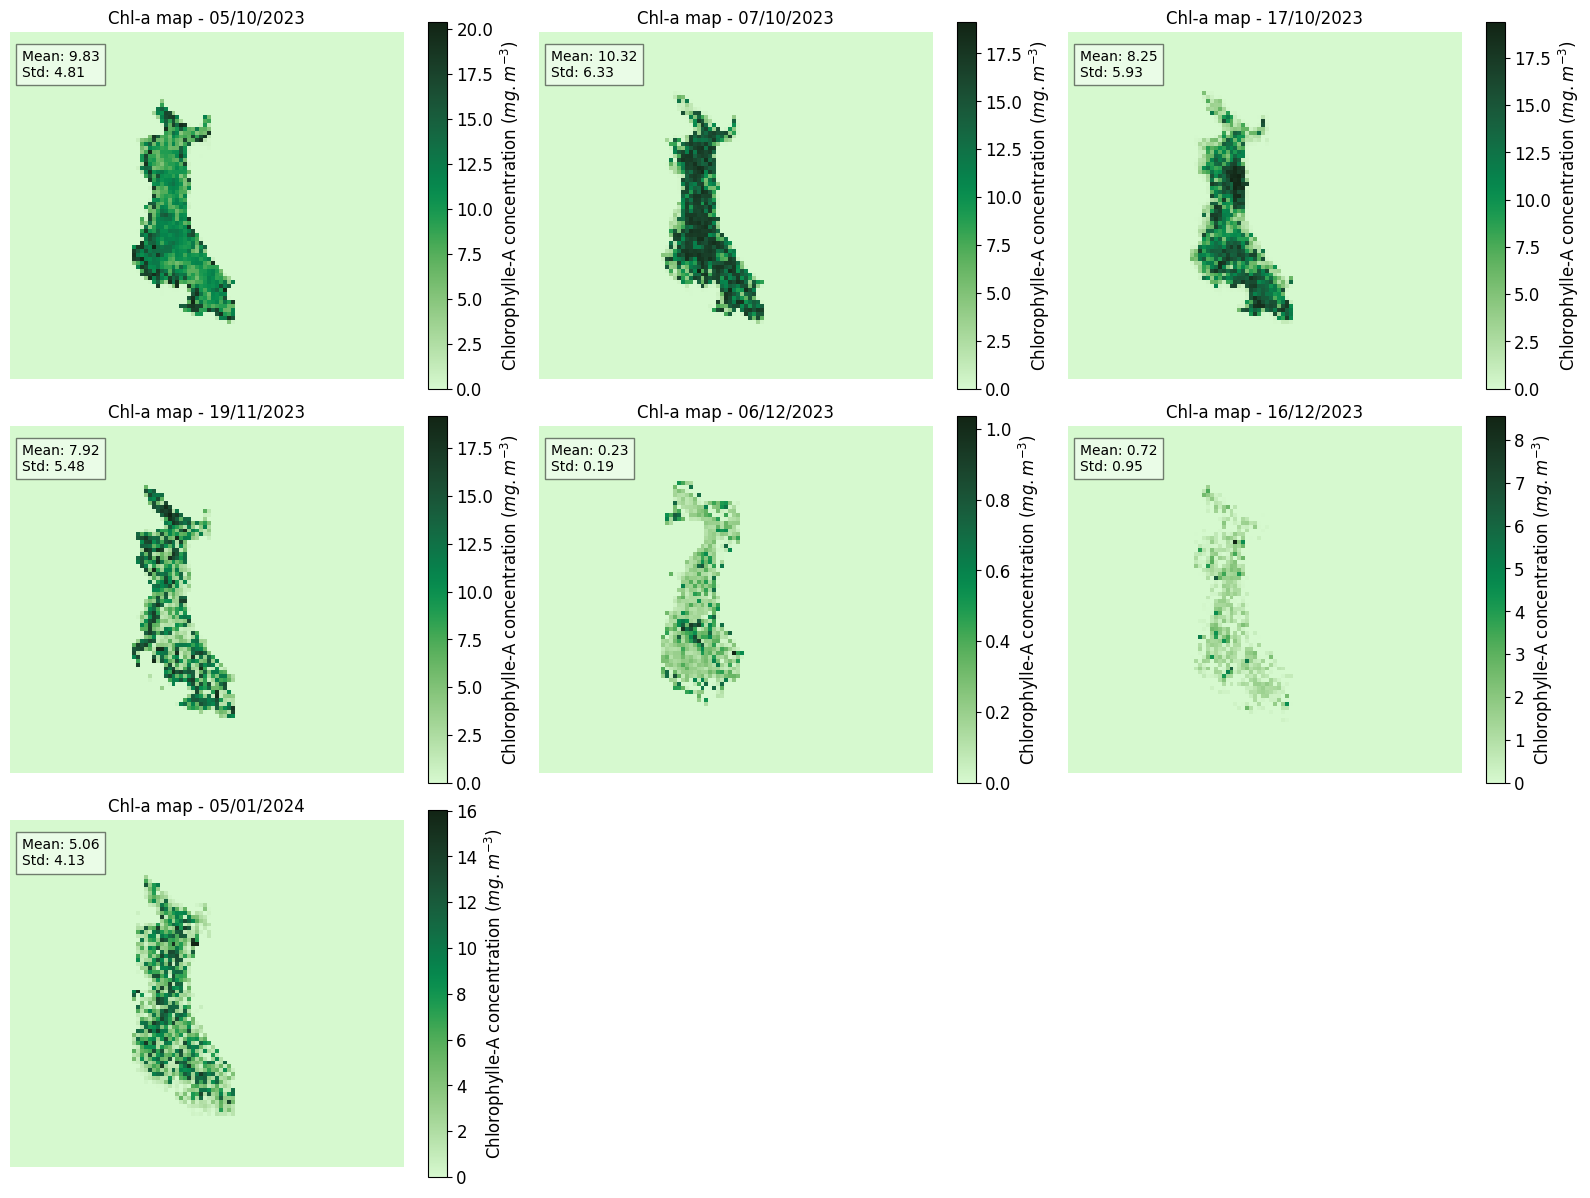

In [ ]:


import os
import rasterio
from rasterio.plot import show
import numpy as np
import matplotlib.pyplot as plt
import cmocean
import cmocean.cm as cmo

directory = 'validation_images_tif/'

# List for storing the paths of the .tif files
arquivos_tif = [os.path.join(directory, arquivo) for arquivo in os.listdir(directory) if arquivo.endswith('.tif')]

arquivos_tif_dict = {}
for arquivo_tif in arquivos_tif:
    # Extract date from the name of the file
    date = arquivo_tif.split('_')[4]
    # Convert the date to datetime format
    date = pd.to_datetime(date, format='%Y%m%dT%H%M%S')
    # Add the file path to the dictionary
    arquivos_tif_dict[date] = arquivo_tif

# Sort the dictionary by its keys (the dates)
arquivos_tif_dict = dict(sorted(arquivos_tif_dict.items()))
print(arquivos_tif_dict)

# Copy of the dictionary
arquivos_tif_dict_final = arquivos_tif_dict.copy()

# Read the band 50 of each .tif file, if the maximum value is 0, the image is removed from the dictionary
for date, arquivo_tif in arquivos_tif_dict.items():
    # Open the .tif file
    with rasterio.open(arquivo_tif) as src:
        # Reads Bands 4, 3, and 2 into a numpy array
        conc_chl = src.read(50)

        if conc_chl.max() == 0:
            del arquivos_tif_dict_final[date]
        elif date in dates_to_remove:
            del arquivos_tif_dict_final[date]
        

# Number of columns in the plot
num_colunas = 3

num_linhas = (len(arquivos_tif_dict_final) + num_colunas-1) // num_colunas

# Configuring subplots
fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(20, 5 * num_linhas))
fig.subplots_adjust(wspace=0.075, hspace=0.075,)

# Iterate over each .tif file
for i, (date, arquivo_tif) in enumerate(arquivos_tif_dict_final.items()):
    # Open the .tif file
    with rasterio.open(arquivo_tif) as src:
        # Reads Bands 4, 3, and 2 into a numpy array
        conc_chl = src.read(50)
        #Calculate mean of conc_chl desconsidering 0 values
        conc_chl_mean = conc_chl_mean = np.mean(conc_chl[conc_chl != 0 & ~np.isnan(conc_chl)])

        if conc_chl.max() == 0:
           continue

        # Position of the subplot
        linha = i // num_colunas
        coluna = i % num_colunas

        # Adding a color bar
        # Reading algae colormap (https://matplotlib.org/cmocean/) and ploting it
        
        algae = cmocean.cm.algae
        cbar = fig.colorbar(axs[linha, coluna].imshow(conc_chl, cmap=algae, interpolation = 'nearest'))
        cbar.ax.tick_params(labelsize=12)
        cbar.ax.set_ylabel('Chlorophylle-A concentration ($mg.m^{-3}$)', fontsize=12)
        axs[linha, coluna].set_title(f'Chl-a map - {date.strftime("%d/%m/%Y")}')
        axs[linha, coluna].text(0.03, 0.95, f'Mean: {conc_chl_mean:.2f}\nStd: {np.std(conc_chl[conc_chl != 0 & ~np.isnan(conc_chl)]):.2f}', transform=axs[linha, coluna].transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

        
# Remove all axes from the subplots
for ax in axs.flat:
    ax.axis('off')

# Exibir a figura
plt.show()

## Validation for other bio-optical models

In [102]:
import os
import rasterio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Diretório contendo os arquivos .tif
directory = 'validation_images_tif/'

# List for storing the paths of the .tif files
arquivos_tif = [os.path.join(directory, arquivo) for arquivo in os.listdir(directory) if arquivo.endswith('.tif')]

arquivos_tif_dict = {}
for arquivo_tif in arquivos_tif:
    # Extract date from the name of the file
    date = arquivo_tif.split('_')[4]
    # Convert the date to datetime format
    date = pd.to_datetime(date, format='%Y%m%dT%H%M%S')
    # Add the file path to the dictionary
    arquivos_tif_dict[date] = arquivo_tif

# Sort the dictionary by its keys (the dates)
arquivos_tif_dict = dict(sorted(arquivos_tif_dict.items()))

# Initialize an empty dataframe
df_c2rcc = pd.DataFrame()
# List of bands for Reflectance TOA
band_indices_new = {'conc_chl': band_indices['conc_chl'], 'unc_chl': band_indices['unc_chl'], 'Chlorophyll index 3-bands': band_indices['3_bands_model_chl_conc'], \
                    'Empirical 2-bands - Equation 1': band_indices['empirical_2_bands_equation1'], 'Empirical 2-bands - Equation 2': band_indices['empirical_2_bands_equation2'], \
                    'Empirical 3-bands - Equation 1': band_indices['empirical_3_bands_equation1'], 'Empirical 3-bands - Equation 3': band_indices['empirical_3_bands_equation3'], \
                    'Rrs_B4': band_indices['rrs_B4'], 'Rrs_B5': band_indices['rrs_B5'], \
                    'Rrs_B6': band_indices['rrs_B6'], 'Rrs_B7': band_indices['rrs_B7'], 'iop_apig': band_indices['iop_apig'], 'unc_apig': band_indices['unc_apig']}

# Iterate over each .tif file
for i, (date, arquivo_tif) in enumerate(arquivos_tif_dict.items()):
    # Open the .tif file
    with rasterio.open(arquivo_tif) as src:
        rrs_values = []
        for band_name, band_index in band_indices_new.items():
            rrs_band = src.read(band_index)
            rrs_band = rrs_band[(rrs_band != 0) & (~np.isnan(rrs_band))]

            # Classsification of the bands with no values
            if rrs_band.size == 0:
                rrs_values.append(np.nan)
                rrs_values.append(np.nan)
                continue
            
            # Testing filtering outliers
            # Filtering outliers quartile 1 and 3
            q1 = np.percentile(rrs_band, 25)
            q3 = np.percentile(rrs_band, 75)
            iqr = q3 - q1
            rrs_band = rrs_band[(rrs_band > q1 - 1.5 * iqr) & (rrs_band < q3 + 1.5 * iqr)]
    
            mean_rrs_band = rrs_band.mean()
            rrs_values.append(mean_rrs_band)
            
            # Testing with median
            #median_rrs_band = np.median(rrs_band)
            #rrs_values.append(median_rrs_band)

            if not band_name in ['conc_chl', 'unc_chl', 'iop_apig', 'unc_apig']:
                error_rrs_band = rrs_band.std()
                rrs_values.append(error_rrs_band)

        # Create a dictionary with the date and mean values of each band
        data = {'Date': date, 'conc_chl': rrs_values[0], 'unc_chl': rrs_values[1], 'Chlorophyll index 3-bands': rrs_values[2], \
                'unc_Chlorophyll index 3-bands':rrs_values[3], \
                'Empirical 2-bands - Equation 1': rrs_values[4], 'unc_Empirical 2-bands - Equation 1': rrs_values[5],\
                'Empirical 2-bands - Equation 2': rrs_values[6], 'unc_Empirical 2-bands - Equation 2': rrs_values[7], \
                'Empirical 3-bands - Equation 1': rrs_values[8], 'unc_Empirical 3-bands - Equation 1': rrs_values[9],\
                'Empirical 3-bands - Equation 3': rrs_values[10], 'unc_Empirical 3-bands - Equation 3': rrs_values[11], \
                'Rrs_B4':  rrs_values[12], 'unc_Rrs_B4':  rrs_values[13], \
                'Rrs_B5':  rrs_values[14], 'unc_Rrs_B5':  rrs_values[15], \
                'Rrs_B6':  rrs_values[16], 'unc_Rrs_B6':  rrs_values[17], \
                'Rrs_B7':  rrs_values[18], 'unc_Rrs_B7':  rrs_values[19], \
                'iop_apig':  rrs_values[20], 'unc_apig':  rrs_values[21]
                }
        
        # Append the dictionary as a new row to the dataframe
        df_c2rcc = pd.concat([df_c2rcc, pd.DataFrame(data, index=[0])], ignore_index=True)

# Remove the images that didn't pass the quality control
df_c2rcc.dropna(inplace=True)

dates_to_remove = ['2023-10-05 10:59:11']
df_c2rcc = df_c2rcc[~df_c2rcc['Date'].isin(dates_to_remove)]


# Indexing the dataframe by date
df_c2rcc.set_index('Date', inplace=True)

df_c2rcc['Empirical 2-bands - Equation 1'] = df_c2rcc['Empirical 2-bands - Equation 1'] + 45

# Display the dataframe
display(df_c2rcc)

conc_chl   unc_chl  Chlorophyll index 3-bands  \
Date                                                                  
2023-10-07 10:48:29  10.324746  2.572421                   8.033365   
2023-10-17 10:49:39   8.250731  2.076347                   7.425392   
2023-11-19 11:02:49   7.915023  2.290471                  10.772162   
2023-12-06 10:53:39   0.203560  0.052125                   4.313193   
2023-12-16 10:53:49   0.612736  0.285029                   4.416546   
2024-01-05 10:53:39   5.056719  1.365964                   6.493340   

                     unc_Chlorophyll index 3-bands  \
Date                                                 
2023-10-07 10:48:29                       2.153723   
2023-10-17 10:49:39                       2.012004   
2023-11-19 11:02:49                       1.535185   
2023-12-06 10:53:39                       0.260292   
2023-12-16 10:53:49                       0.605408   
2024-01-05 10:53:39                       1.830299   

                     Empirical 2-bands - Equation 1  \
Date                                                  
2023-10-07 10:48:29                       10.454304   
2023-10-17 10:49:39                        8.482819   
2023-11-19 11:02:49                       14.496250   
2023-12-06 10:53:39                        0.400570   
2023-12-16 10:53:49                        5.143215   
2024-01-05 10:53:39                        8.554516   

                     unc_Empirical 2-bands - Equation 1  \
Date                                                      
2023-10-07 10:48:29                            2.696042   
2023-10-17 10:49:39                            4.029007   
2023-11-19 11:02:49                            2.789118   
2023-12-06 10:53:39                            0.301441   
2023-12-16 10:53:49                            2.582909   
2024-01-05 10:53:39                            3.953073   

                     Empirical 2-bands - Equation 2  \
Date                                                  
2023-10-07 10:48:29                        8.706839   
2023-10-17 10:49:39                        8.010365   
2023-11-19 11:02:49                       10.017662   
2023-12-06 10:53:39                        2.241442   
2023-12-16 10:53:49                        5.356285   
2024-01-05 10:53:39                        7.242851   

                     unc_Empirical 2-bands - Equation 2  \
Date                                                      
2023-10-07 10:48:29                            1.065300   
2023-10-17 10:49:39                            1.670839   
2023-11-19 11:02:49                            0.656551   
2023-12-06 10:53:39                            0.156404   
2023-12-16 10:53:49                            1.518014   
2024-01-05 10:53:39                            1.959193   

                     Empirical 3-bands - Equation 1  \
Date                                                  
2023-10-07 10:48:29                        8.008698   
2023-10-17 10:49:39                        7.438888   
2023-11-19 11:02:49                       10.758511   
2023-12-06 10:53:39                        3.786624   
2023-12-16 10:53:49                        4.731956   
2024-01-05 10:53:39                        6.795234   

                     unc_Empirical 3-bands - Equation 1  ...    Rrs_B4  \
Date                                                     ...             
2023-10-07 10:48:29                            2.218201  ...  0.000290   
2023-10-17 10:49:39                            2.124954  ...  0.000223   
2023-11-19 11:02:49                            1.430890  ...  0.000476   
2023-12-06 10:53:39                            0.122403  ...  0.000048   
2023-12-16 10:53:49                            0.905939  ...  0.000082   
2024-01-05 10:53:39                            1.976087  ...  0.000218   

                     unc_Rrs_B4    Rrs_B5  unc_Rrs_B5    Rrs_B6    unc_Rrs_B6  \
Date                                                                         

In [103]:
# Set index for df_loco if not already set
if not df_loco.index.name == 'time':
    df_loco.set_index('time', inplace=True)

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
import matplotlib.dates as mdates

# Create a slider widget for selecting the time range
start_date_widget = widgets.DatePicker(description='Start Date', value=pd.to_datetime('2023-10-01'))
end_date_widget = widgets.DatePicker(description='End Date', value=pd.to_datetime('2024-01-10'))
# Define a function to update the plot based on the selected time range
def update_plot(start_date, end_date):
    filtered_df = df_loco.loc[start_date:end_date]
    filtered_df2 = df_c2rcc.loc[start_date:end_date]

    # Resample the data to daily frequency and calculate the mean for each day
    daily_mean1 = filtered_df['chlorophylle A'].resample('D').mean()
    daily_mean2 = filtered_df2['conc_chl'].resample('D').mean()
    daily_mean3 = filtered_df2['Chlorophyll index 3-bands'].resample('D').mean()
    daily_mean4 = filtered_df2['Empirical 2-bands - Equation 1'].resample('D').mean()
    daily_mean5 = filtered_df2['Empirical 2-bands - Equation 2'].resample('D').mean()
    daily_mean6 = filtered_df2['Empirical 3-bands - Equation 1'].resample('D').mean()
    daily_mean7 = filtered_df2['Empirical 3-bands - Equation 3'].resample('D').mean()

    # Resample the errors to daily frequency and calculate the mean for each day
    daily_mean1_unc = filtered_df['chlorophylle A'].resample('D').std()
    daily_mean2_unc = filtered_df2['unc_chl'].resample('D').mean()
    daily_mean3_unc = filtered_df2['unc_Chlorophyll index 3-bands'].resample('D').mean()
    daily_mean4_unc = filtered_df2['unc_Empirical 2-bands - Equation 1'].resample('D').mean()
    daily_mean5_unc = filtered_df2['unc_Empirical 2-bands - Equation 2'].resample('D').mean()
    daily_mean6_unc = filtered_df2['unc_Empirical 3-bands - Equation 1'].resample('D').mean()
    daily_mean7_unc = filtered_df2['unc_Empirical 3-bands - Equation 3'].resample('D').mean()
    # Create a figure with two subplots
    fig, ax1 = plt.subplots(figsize=(20, 10))

    # Plot data and the errors
    ax1.errorbar(daily_mean1.index, daily_mean1, yerr=daily_mean1_unc, marker='o', label='Chlorophylle A - In Situ (Mean)')
    ax1.errorbar(daily_mean2.index, daily_mean2, yerr=daily_mean2_unc, marker='o', label='Chlorophylle A - C2RCC')
    ax1.errorbar(daily_mean3.index, daily_mean3, yerr=daily_mean3_unc, marker='o', label='Chlorophyll index 3-bands')
    ax1.errorbar(daily_mean4.index, daily_mean4, yerr=daily_mean4_unc, marker='o', label='Empirical 2-bands - Equation 1')
    ax1.errorbar(daily_mean5.index, daily_mean5, yerr=daily_mean5_unc, marker='o', label='Empirical 2-bands - Equation 2')
    ax1.errorbar(daily_mean6.index, daily_mean6, yerr=daily_mean6_unc, marker='o', label='Empirical 3-bands - Equation 1')
    ax1.errorbar(daily_mean7.index, daily_mean7, yerr=daily_mean7_unc, marker='o', label='Empirical 3-bands - Equation 3')
    # Set the y-axis label
    ax1.set_ylabel('Chlorophylle-A concentration ($mg.m^{-3}$)', fontsize=17)
    ax1.set_xlabel('Date', fontsize=17)
    # Setting font size for values in axes
    ax1.tick_params(axis='both', which='major', labelsize=14)
    ax1.set_ylim(0)
    ax1.set_title('Time series of C2RCC chlorophylle-A concentration by different methods', fontsize=20)
    ax1.legend(fontsize=14)
    
    # Format x-axis ticks as months (mm/yyyy)
    ax1.xaxis.set_major_locator(mdates.MonthLocator())
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
    
    plt.tight_layout()
    plt.show()

# Create an interactive output widget
output = widgets.interactive_output(update_plot, {'start_date': start_date_widget, 'end_date': end_date_widget})

# Display the widgets and the output
display(start_date_widget, end_date_widget, output)



DatePicker(value=Timestamp('2023-10-01 00:00:00'), description='Start Date', step=1)

DatePicker(value=Timestamp('2024-01-10 00:00:00'), description='End Date', step=1)

Output()

Plotting the statistics


In [101]:
df_c2rcc

Date   conc_chl   unc_chl  Chlorophyll index 3-bands  \
1 2023-10-07 10:48:29  10.324746  2.572421                   8.033365   
2 2023-10-17 10:49:39   8.250731  2.076347                   7.425392   
3 2023-11-19 11:02:49   7.915023  2.290471                  10.772162   
4 2023-12-06 10:53:39   0.203560  0.052125                   4.313193   
5 2023-12-16 10:53:49   0.612736  0.285029                   4.416546   
6 2024-01-05 10:53:39   5.056719  1.365964                   6.493340   

   unc_Chlorophyll index 3-bands  Empirical 2-bands - Equation 1  \
1                       2.153723                       10.454304   
2                       2.012004                        8.482819   
3                       1.535185                       14.496250   
4                       0.260292                        0.400570   
5                       0.605408                        5.143215   
6                       1.830299                        8.554516   

   unc_Empirical 2-bands - Equation 1  Empirical 2-bands - Equation 2  \
1                            2.696042                        8.706839   
2                            4.029007                        8.010365   
3                            2.789118                       10.017662   
4                            0.301441                        2.241442   
5                            2.582909                        5.356285   
6                            3.953073                        7.242851   

   unc_Empirical 2-bands - Equation 2  Empirical 3-bands - Equation 1  ...  \
1                            1.065300                        8.008698  ...   
2                            1.670839                        7.438888  ...   
3                            0.656551                       10.758511  ...   
4                            0.156404                        3.786624  ...   
5                            1.518014                        4.731956  ...   
6                            1.959193                        6.795234  ...   

     Rrs_B7    unc_Rrs_B7  iop_apig  unc_apig  \
1  0.000077  4.282486e-05  0.732656  0.113849   
2  0.000058  3.446477e-05  0.557162  0.087485   
3  0.000148  7.333346e-05  0.521021  0.095364   
4  0.000006  7.966683e-07  0.003758  0.000593   
5  0.000015  7.501451e-06  0.018264  0.006451   
6  0.000053  3.783166e-05  0.294015  0.050175   

   chlorophylle A - Adjusted conc_chl  \
1                               11.58   
2                                8.20   
3                                6.11   
4                                0.82   
5                                0.65   
6                                2.49   

   chlorophylle A - Adjusted Chlorophyll index 3-bands  \
1                                              11.58     
2                                               7.34     
3                                               6.11     
4                                               2.83     
5                                               1.30     
6                                               2.49     

   chlorophylle A - Adjusted Empirical 2-bands - Equation 1  \
1                                              11.58          
2                                               8.20          
3                                               6.11          
4                                               0.82          
5                                               1.30          
6                                               2.49          

   chlorophylle A - Adjusted Empirical 2-bands - Equation 2  \
1                                              11.58          
2                                               8.17          
3                                               6.11          
4                                               2.24          
5                                               1.30          
6                                               2.49          

   chlorophylle A - Adjusted Empirical 3-bands

In [105]:
from datetime import timedelta

# Remove column chlorophyllle A from c2rcc but only if exists
if 'chlorophylle A' in df_c2rcc.columns:
    df_c2rcc.drop(columns=['chlorophylle A'], inplace=True)

# Reset the index of c2rcc data if it is not the default index
if df_c2rcc.index.name == 'Date':
    df_c2rcc.reset_index(inplace=True)
# Remove the dates that are bad for the analysis

# Dropping the date because of Cirrus_Ambiguos mask:
dates_to_remove = ['2023-10-05 10:59:11']
df_c2rcc = df_c2rcc[~df_c2rcc['Date'].isin(dates_to_remove)]

#Convert the 'time' column to datetime
df_c2rcc['Date'] = pd.to_datetime(df_c2rcc['Date'])

# Reset the index of in situ data if it is not the default index
if df_loco.index.name == 'time':
    df_loco.reset_index(inplace=True)

def encontrar_valor_proximo(x, df, column = 'conc_chl', janela_temporal=1):
    data_alvo = x['Date']
    valor_alvo = x[column]

    janela_superior = data_alvo + timedelta(days=janela_temporal)
    janela_inferior = data_alvo - timedelta(days=janela_temporal)

    dados_no_intervalo = df[(df['time'] >= janela_inferior) & (df['time'] <= janela_superior)]

    if not dados_no_intervalo.empty:
       
        # Calcular a diferença nos valores
        dados_no_intervalo['dif_values'] = abs(dados_no_intervalo['chlorophylle A'] - valor_alvo)
        
        # Encontrar a linha com a menor diferença nos valores
        linha_mais_proxima = dados_no_intervalo.loc[dados_no_intervalo['dif_values'].idxmin()]
        
        return linha_mais_proxima['chlorophylle A']
    else:
        return None


df_c2rcc['chlorophylle A - Adjusted conc_chl'] = df_c2rcc.apply(lambda x: encontrar_valor_proximo(x,df_loco, column = 'conc_chl'), axis=1)
df_c2rcc['chlorophylle A - Adjusted Chlorophyll index 3-bands'] = df_c2rcc.apply(lambda x: encontrar_valor_proximo(x,df_loco, column = 'Chlorophyll index 3-bands'), axis=1)
df_c2rcc['chlorophylle A - Adjusted Empirical 2-bands - Equation 1'] = df_c2rcc.apply(lambda x: encontrar_valor_proximo(x,df_loco, column = 'Empirical 2-bands - Equation 1'), axis=1)
df_c2rcc['chlorophylle A - Adjusted Empirical 2-bands - Equation 2'] = df_c2rcc.apply(lambda x: encontrar_valor_proximo(x,df_loco, column = 'Empirical 2-bands - Equation 2'), axis=1)
df_c2rcc['chlorophylle A - Adjusted Empirical 3-bands - Equation 1'] = df_c2rcc.apply(lambda x: encontrar_valor_proximo(x,df_loco, column = 'Empirical 3-bands - Equation 1'), axis=1)
df_c2rcc['chlorophylle A - Adjusted Empirical 3-bands - Equation 3'] = df_c2rcc.apply(lambda x: encontrar_valor_proximo(x,df_loco, column = 'Empirical 3-bands - Equation 3'), axis=1)



In [82]:
df_c2rcc

Date   conc_chl   unc_chl  Chlorophyll index 3-bands  \
1 2023-10-07 10:48:29  10.324746  2.572421                   9.660132   
2 2023-10-17 10:49:39   8.250731  2.076347                   8.728302   
3 2023-11-19 11:02:49   7.915023  2.290471                  13.857840   
4 2023-12-06 10:53:39   0.203560  0.052125                   3.958289   
5 2023-12-16 10:53:49   0.612736  0.285029                   4.116696   
6 2024-01-05 10:53:39   5.056719  1.365964                   7.299761   

   unc_Chlorophyll index 3-bands  Empirical 2-bands - Equation 1  \
1                       3.300975                       17.546663   
2                       3.083764                       14.398673   
3                       2.352952                       24.000704   
4                       0.398945                        1.493236   
5                       0.927899                        9.066113   
6                       2.805268                       14.513152   

   unc_Empirical 2-bands - Equation 1  Empirical 2-bands - Equation 2  \
1                            4.304941                       11.087920   
2                            6.433371                        8.837431   
3                            4.453561                       15.081416   
4                            0.481330                       -0.033163   
5                            4.124293                        4.486464   
6                            6.312122                        8.296986   

   unc_Empirical 2-bands - Equation 2  Empirical 3-bands - Equation 1  ...  \
1                            3.036493                       13.914097  ...   
2                            4.445776                       13.378813  ...   
3                            2.458813                       16.497288  ...   
4                            0.190385                        9.947850  ...   
5                            2.494907                       10.835901  ...   
6                            4.002617                       12.774159  ...   

     Rrs_B7    unc_Rrs_B7  iop_apig  unc_apig  chlorophylle A - Adjusted  \
1  0.000077  4.282486e-05  0.732656  0.113849                      10.12   
2  0.000058  3.446477e-05  0.557162  0.087485                       8.25   
3  0.000148  7.333346e-05  0.521021  0.095364                       6.11   
4  0.000006  7.966683e-07  0.003758  0.000593                       0.69   
5  0.000015  7.501451e-06  0.018264  0.006451                       0.61   
6  0.000053  3.783166e-05  0.294015  0.050175                       2.51   

   chlorophylle A - Adjusted Chlorophyll index 3-bands  \
1                                              10.00     
2                                               8.61     
3                                               6.11     
4                                               2.97     
5                                               1.31     
6                                               2.51     

   chlorophylle A - Adjusted Empirical 2-bands - Equation 1  \
1                                              17.53          
2                                               8.96          
3                                               6.11          
4                                               1.50          
5                                               1.31          
6                                               2.51          

   chlorophylle A - Adjusted Empirical 2-bands - Equation 2  \
1                                              11.09          
2                                               8.91          
3                                               6.11          
4                                               0.69          
5                                               1.31          
6                                               2.51          

   chlorophylle A - Adjusted Empirical 3-bands - Equation 1  \
1                                              13.95          
2                  

0 0
0 1
1 0
1 1
2 0
2 1


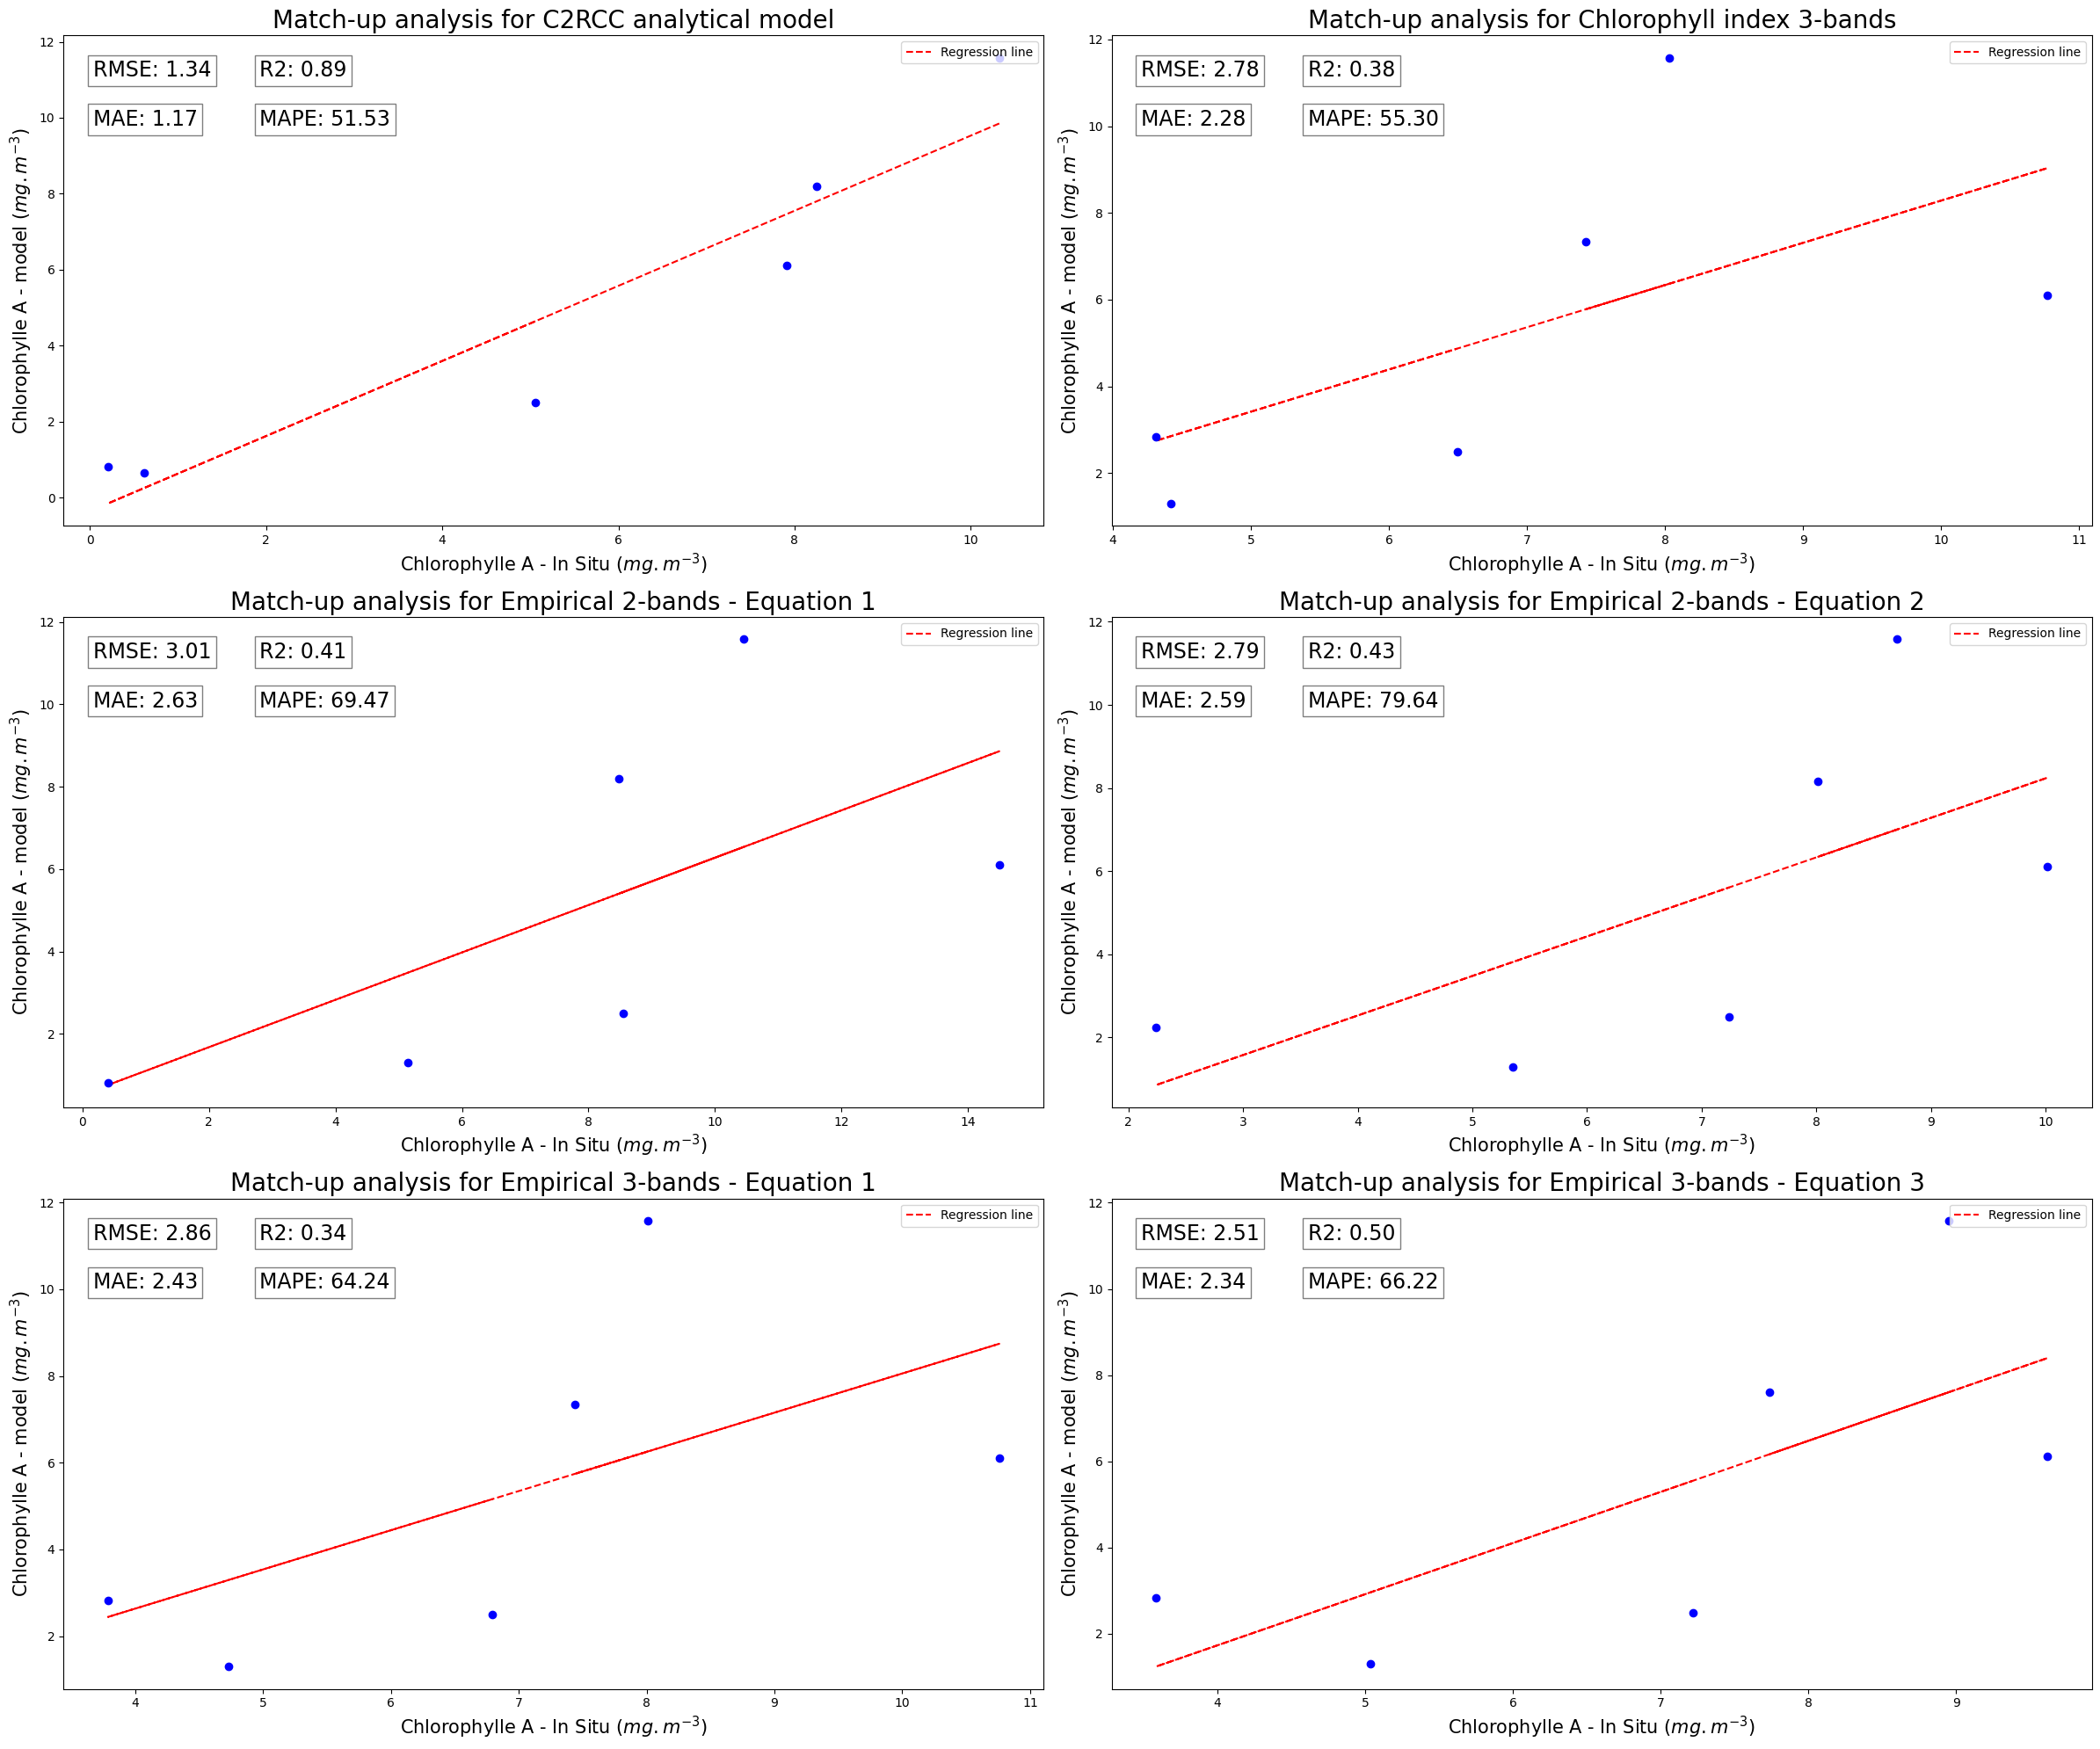

In [107]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Transforming the index of df_c2rcc into 'Date' again
if df_c2rcc.index.name == 'Date':
    df_c2rcc.reset_index(inplace=True)

fig, ax = plt.subplots(3, 2, figsize=(24,20))

i, j = 0, 0

# Loop through the columns and perform the analysis
for column in [ 'conc_chl', 'Chlorophyll index 3-bands', 'Empirical 2-bands - Equation 1', 'Empirical 2-bands - Equation 2',
        'Empirical 3-bands - Equation 1', 'Empirical 3-bands - Equation 3']:
    j = j + 1
    if j == 3:
        j = 1
        i = i + 1
    print(i, j-1)
    
    # Cria o modelo de regressão linear
    model = LinearRegression()

    chl_column_adjusted = 'chlorophylle A - Adjusted ' + column

    # Ajusta o modelo usando a coluna 'conc_chl' como variável independente e a coluna atual como variável dependente
    df_c2rcc2 = df_c2rcc[[chl_column_adjusted, column, 'Date']].dropna()
    model.fit(df_c2rcc2[[column]], df_c2rcc2[[chl_column_adjusted]])

    ax[i, j -1].errorbar(df_c2rcc2[column], df_c2rcc2[chl_column_adjusted], fmt='o', color='blue', ecolor='lightgray', elinewidth=3, capsize=0)
    ax[i, j -1].plot(df_c2rcc2[column], model.predict(df_c2rcc2[[column]]), ls='--', color='red', label='Regression line')
    ax[i, j -1].set_xlabel('Chlorophylle A - In Situ ($mg.m^{-3}$)', fontsize=15)
    ax[i, j -1].set_ylabel('Chlorophylle A - model ($mg.m^{-3}$)', fontsize=15)
    ax[i, j -1].text(0.03, 0.95, f'RMSE: {mean_squared_error(df_c2rcc2[[chl_column_adjusted]], model.predict(df_c2rcc2[[column]])) ** 0.5:.2f}', transform=ax[i, j -1].transAxes, fontsize=17, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
    ax[i, j -1].text(0.20, 0.95, f'R2: {model.score(df_c2rcc2[[column]],df_c2rcc2[[chl_column_adjusted]]):.2f}', transform=ax[i, j -1].transAxes, fontsize=17, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
    ax[i, j -1].text(0.03, 0.85, f'MAE: {mean_absolute_error(df_c2rcc2[[chl_column_adjusted]], model.predict(df_c2rcc2[[column]])):.2f}', transform=ax[i, j -1].transAxes, fontsize=17, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
    ax[i, j -1].text(0.20, 0.85, f'MAPE: {np.mean(np.abs((model.predict(df_c2rcc2[[column]]) - df_c2rcc2[[chl_column_adjusted]]) / df_c2rcc2[[chl_column_adjusted]])) * 100:.2f}', transform=ax[i, j -1].transAxes, fontsize=17, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
    #ax[i, j -1].text(0.03, 0.75, f'Bias: {10 ** (np.mean(np.sum(model2.predict(df_c2rcc2[[log_column]]).T - df_c2rcc2[[log_chla]].values))):.2f}', transform=ax[i, j -1].transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
    if column == 'conc_chl':
        ax[i, j -1].set_title('Match-up analysis for C2RCC analytical model', fontsize=20)
    else:
        ax[i, j -1].set_title('Match-up analysis for ' + column.replace(' adjusted final', ''), fontsize=20)
    ax[i, j -1].legend(fontsize=10, loc='upper right')

# hide axis without values
#ax[2, 1].axis('off')

plt.tight_layout()
plt.show()

